In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [3]:
pd.read_csv("../input/VariableDefinitions.csv")

Variable Definitions                                         Unnamed: 1
0                  country                         Country interviewee is in.
1                     year                           Year survey was done in.
2                 uniqueid             Unique identifier for each interviewee
3            location_type                     Type of location: Rural, Urban
4         cellphone_access  If interviewee has access to a cellphone: Yes, No
5           household_size               Number of people living in one house
6        age_of_respondent                         The age of the interviewee
7     gender_of_respondent                Gender of interviewee: Male, Female
8   relationship_with_head  The interviewee’s relationship with the head o...
9           marital_status  The martial status of the interviewee: Married...
10         education_level  Highest level of education: No formal educatio...
11                job_type  Type of job interviewee has: Farming and Fishi...

In [4]:
train = pd.read_csv("../input/Train_v2.csv")
test = pd.read_csv("../input/Test_v2.csv")

In [5]:
train.head()

country  year    uniqueid bank_account location_type cellphone_access  \
0   Kenya  2018  uniqueid_1          Yes         Rural              Yes   
1   Kenya  2018  uniqueid_2           No         Rural               No   
2   Kenya  2018  uniqueid_3          Yes         Urban              Yes   
3   Kenya  2018  uniqueid_4           No         Rural              Yes   
4   Kenya  2018  uniqueid_5           No         Urban               No   

   household_size  age_of_respondent gender_of_respondent  \
0               3                 24               Female   
1               5                 70               Female   
2               5                 26                 Male   
3               5                 34               Female   
4               8                 26                 Male   

  relationship_with_head           marital_status  \
0                 Spouse  Married/Living together   
1      Head of Household                  Widowed   
2         Other relative     Single/Never Married   
3      Head of Household  Married/Living together   
4                  Child     Single/Never Married   

                   education_level                   job_type  
0              Secondary education              Self employed  
1              No formal education       Government Dependent  
2  Vocational/Specialised training              Self employed  
3                Primary education  Formally employed Private  
4                Primary education        Informally employed

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [7]:
train.describe()

year  household_size  age_of_respondent
count  23524.000000    23524.000000       23524.000000
mean    2016.975939        3.797483          38.805220
std        0.847371        2.227613          16.520569
min     2016.000000        1.000000          16.000000
25%     2016.000000        2.000000          26.000000
50%     2017.000000        3.000000          35.000000
75%     2018.000000        5.000000          49.000000
max     2018.000000       21.000000         100.000000

In [8]:
test.describe()

year  household_size  age_of_respondent
count  10086.000000    10086.000000       10086.000000
mean    2016.975907        3.778802          38.308348
std        0.847356        2.212721          16.270053
min     2016.000000        1.000000          16.000000
25%     2016.000000        2.000000          26.000000
50%     2017.000000        3.000000          35.000000
75%     2018.000000        5.000000          48.000000
max     2018.000000       20.000000         100.000000

In [9]:
train.country.unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

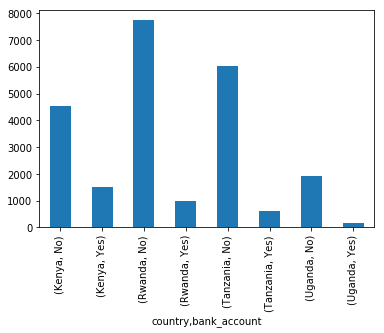

In [10]:
train.groupby(["country","bank_account"])["year"].count().plot(kind="bar")

In [11]:
fig,(ax1,ax2) = plt.subplots(1,2)
train.groupby(["country"])["year"].count().plot(kind="bar",ax=ax1)
test.groupby(["country"])["year"].count().plot(kind="bar",ax=ax2)

In [12]:
train.year.unique()

array([2018, 2016, 2017])

In [13]:
train.uniqueid.nunique()

8735

In [14]:
train.groupby("country")["uniqueid"].nunique().sum()

23524

In [15]:
train.bank_account.unique()

array(['Yes', 'No'], dtype=object)

In [16]:
train.location_type.unique()

array(['Rural', 'Urban'], dtype=object)

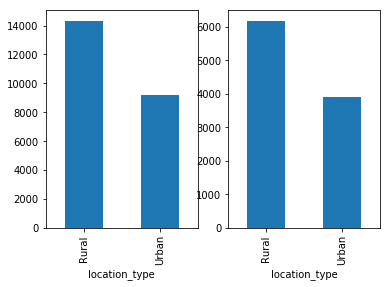

In [17]:
fig,(ax1,ax2) = plt.subplots(1,2)
train.groupby(["location_type"])["year"].count().plot(kind="bar",ax=ax1)
test.groupby(["location_type"])["year"].count().plot(kind="bar",ax=ax2)

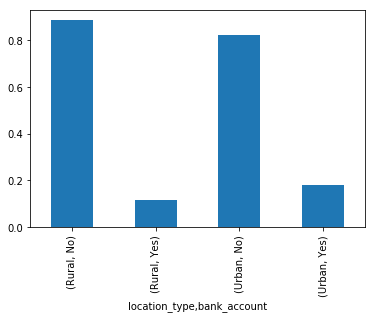

In [18]:
(train.groupby(["location_type","bank_account"])["year"].count() / train.groupby(["location_type"])["year"].count()).plot(kind="bar")

In [19]:
train.cellphone_access.unique()

array(['Yes', 'No'], dtype=object)

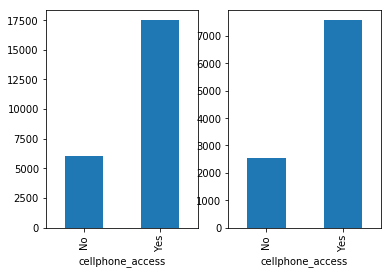

In [20]:
fig,(ax1,ax2) = plt.subplots(1,2)
train.groupby(["cellphone_access"])["year"].count().plot(kind="bar",ax=ax1)
test.groupby(["cellphone_access"])["year"].count().plot(kind="bar",ax=ax2)

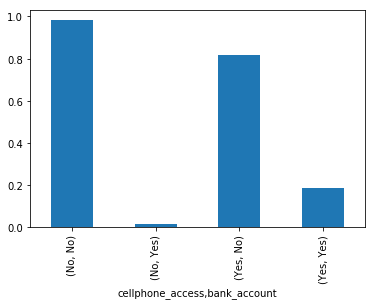

In [21]:
(train.groupby(["cellphone_access","bank_account"])["year"].count() / train.groupby(["cellphone_access"])["year"].count()).plot(kind="bar")

In [22]:
train.household_size.unique()

array([ 3,  5,  8,  7,  1,  6,  4, 10,  2, 11,  9, 12, 16, 15, 13, 14, 21,
       18, 17, 20])

In [23]:
test.household_size.unique()

array([ 3,  7,  6,  4,  1,  5,  2,  9, 10, 11,  8, 12, 13, 16, 15, 14, 18,
       20])

In [24]:
train.sort_values(by="household_size").groupby(["household_size"])["country"].count().plot(kind="bar")

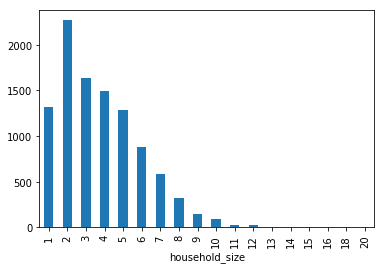

In [25]:
test.sort_values(by="household_size").groupby(["household_size"])["country"].count().plot(kind="bar")

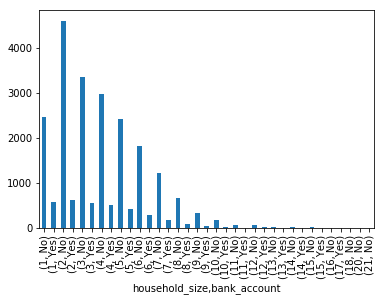

In [26]:
train.sort_values(by="household_size").groupby(["household_size","bank_account"])["country"].count().plot(kind="bar")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc9939bbe80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc9939c6550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc9939bbd30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc9939c6be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc9939c6f28>],
 'means': []}

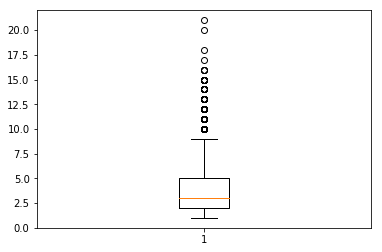

In [27]:
plt.boxplot(train.household_size)

In [28]:
train.age_of_respondent.unique()

array([ 24,  70,  26,  34,  32,  42,  54,  76,  40,  69,  64,  31,  38,
        47,  27,  48,  25,  21,  18,  22,  58,  55,  62,  29,  35,  45,
        67,  19,  80,  66,  50,  33,  28,  51,  16,  17,  30,  37,  59,
        65,  46,  56,  52,  23,  43,  49,  44,  72,  53,  63,  39,  81,
        78,  36,  20,  60,  95,  71,  57,  85,  68,  41,  61,  75,  86,
        73,  93,  74,  88,  90,  77,  84,  82,  89,  79,  83,  94,  87,
        92,  91,  98,  97,  96,  99, 100])

In [29]:
train.sort_values(by="age_of_respondent").groupby(["age_of_respondent"])["country"].count().plot(kind="bar")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc993718ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc9937295f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc993718da0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc993729c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc993729fd0>],
 'means': []}

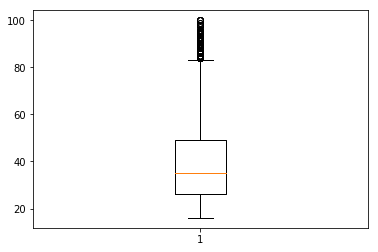

In [30]:
plt.boxplot(train.age_of_respondent)

In [31]:
train.gender_of_respondent.unique()

array(['Female', 'Male'], dtype=object)

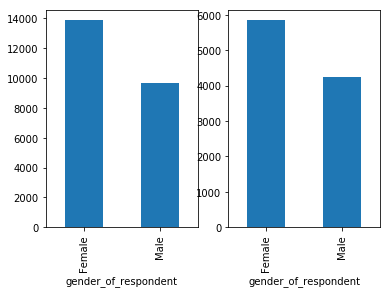

In [32]:
fig,(ax1,ax2) = plt.subplots(1,2)
train.groupby(["gender_of_respondent"])["year"].count().plot(kind="bar",ax=ax1)
test.groupby(["gender_of_respondent"])["year"].count().plot(kind="bar",ax=ax2)

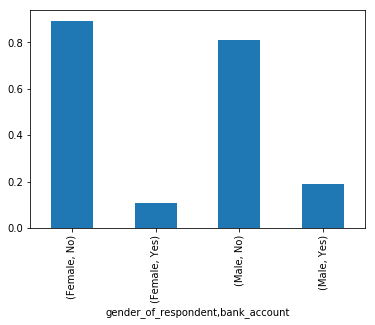

In [33]:
(train.groupby(["gender_of_respondent","bank_account"])["country"].count() / train.groupby(["gender_of_respondent"])["year"].count()).plot(kind="bar")

In [34]:
train.relationship_with_head.unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

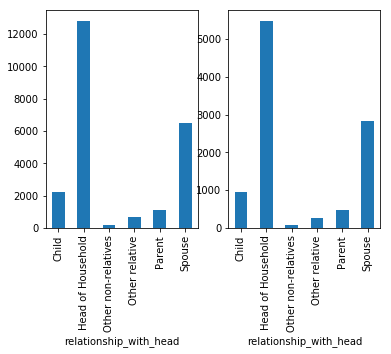

In [35]:
fig,(ax1,ax2) = plt.subplots(1,2)
train.groupby(["relationship_with_head"])["year"].count().plot(kind="bar",ax=ax1)
test.groupby(["relationship_with_head"])["year"].count().plot(kind="bar",ax=ax2)

In [36]:
train.groupby(["relationship_with_head","bank_account"])["country"].count()

relationship_with_head  bank_account
Child                   No               2036
                        Yes               193
Head of Household       No              10558
                        Yes              2273
Other non-relatives     No                170
                        Yes                20
Other relative          No                602
                        Yes                66
Parent                  No               1021
                        Yes                65
Spouse                  No               5825
                        Yes               695
Name: country, dtype: int64

In [37]:
train.groupby(["relationship_with_head","bank_account"])["country"].count() / train.groupby(["relationship_with_head"])["country"].count()

relationship_with_head  bank_account
Child                   No              0.913414
                        Yes             0.086586
Head of Household       No              0.822851
                        Yes             0.177149
Other non-relatives     No              0.894737
                        Yes             0.105263
Other relative          No              0.901198
                        Yes             0.098802
Parent                  No              0.940147
                        Yes             0.059853
Spouse                  No              0.893405
                        Yes             0.106595
Name: country, dtype: float64

In [38]:
train.marital_status.unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

In [39]:
fig,(ax1,ax2) = plt.subplots(1,2)
train.groupby(["marital_status"])["year"].count().plot(kind="bar",ax=ax1)
test.groupby(["marital_status"])["year"].count().plot(kind="bar",ax=ax2)

In [40]:
train.groupby(["marital_status","bank_account"])["country"].count()

marital_status           bank_account
Divorced/Seperated       No              1842
                         Yes              234
Dont know                No                 6
                         Yes                2
Married/Living together  No              8883
                         Yes             1866
Single/Never Married     No              7017
                         Yes              966
Widowed                  No              2464
                         Yes              244
Name: country, dtype: int64

In [41]:
train.education_level.unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

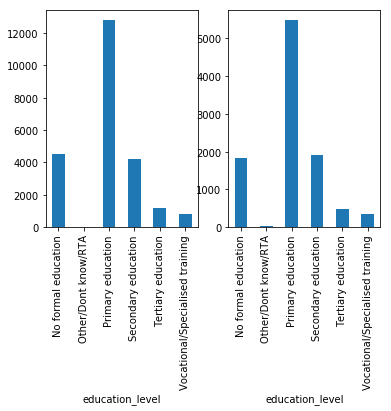

In [42]:
fig,(ax1,ax2) = plt.subplots(1,2)
train.groupby(["education_level"])["year"].count().plot(kind="bar",ax=ax1)
test.groupby(["education_level"])["year"].count().plot(kind="bar",ax=ax2)

In [43]:
train.groupby(["education_level","bank_account"])["country"].count() / train.groupby(["education_level"])["country"].count()

education_level                  bank_account
No formal education              No              0.961019
                                 Yes             0.038981
Other/Dont know/RTA              No              0.685714
                                 Yes             0.314286
Primary education                No              0.914549
                                 Yes             0.085451
Secondary education              No              0.767227
                                 Yes             0.232773
Tertiary education               No              0.489196
                                 Yes             0.510804
Vocational/Specialised training  No              0.429639
                                 Yes             0.570361
Name: country, dtype: float64

In [44]:
train.job_type.unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [45]:
fig,(ax1,ax2) = plt.subplots(1,2)
train.groupby(["job_type"])["year"].count().plot(kind="bar",ax=ax1)
test.groupby(["job_type"])["year"].count().plot(kind="bar",ax=ax2)

In [46]:
train.groupby(["job_type","bank_account"])["country"].count() / train.groupby(["job_type"])["country"].count()

job_type                      bank_account
Dont Know/Refuse to answer    No              0.888889
                              Yes             0.111111
Farming and Fishing           No              0.883294
                              Yes             0.116706
Formally employed Government  No              0.224806
                              Yes             0.775194
Formally employed Private     No              0.458768
                              Yes             0.541232
Government Dependent          No              0.797571
                              Yes             0.202429
Informally employed           No              0.920493
                              Yes             0.079507
No Income                     No              0.979266
                              Yes             0.020734
Other Income                  No              0.818519
                              Yes             0.181481
Remittance Dependent          No              0.905026
                      

In [47]:
train = pd.read_csv("../input/Train_v2.csv")
test = pd.read_csv("../input/Test_v2.csv")

In [48]:
train["age_cut"] = pd.cut(train.age_of_respondent,[1,25,35,45,60,70,101],labels=[1,2,3,4,5,6])

In [49]:
train.drop("age_of_respondent",axis=1,inplace=True)

In [50]:
test["age_cut"] = pd.cut(test.age_of_respondent,[1,25,35,45,60,70,101],labels=[1,2,3,4,5,6])

In [51]:
test.drop("age_of_respondent",axis=1,inplace=True)

In [52]:
fig,(ax1,ax2) = plt.subplots(1,2)
train.groupby("age_cut")["country"].count().plot(kind="bar",ax=ax1)
test.groupby("age_cut")["country"].count().plot(kind="bar",ax=ax2)

In [53]:
train["household_cut"] = pd.cut(train.household_size,[0,3,6,40],labels=[1,2,3])

In [54]:
train.drop("household_size",axis=1,inplace=True)

In [55]:
test["household_cut"] = pd.cut(test.household_size,[0,3,6,40],labels=[1,2,3])

In [56]:
test.drop("household_size",axis=1,inplace=True)

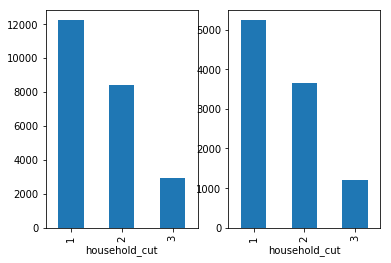

In [57]:
fig,(ax1,ax2) = plt.subplots(1,2)
train.groupby("household_cut")["country"].count().plot(kind="bar",ax=ax1)
test.groupby("household_cut")["country"].count().plot(kind="bar",ax=ax2)

In [58]:
train["relationship_cut"] = train.relationship_with_head.apply(lambda x : "1" if (x=="Head of Household" 
                                                                        or x =="Spouse") else "0")

test["relationship_cut"] = test.relationship_with_head.apply(lambda x : "1" if (x=="Head of Household" 
                                                                        or x =="Spouse") else "0")

In [59]:
train["education_cut"] = train.education_level.apply(lambda x : "1" if (x=="Secondary education" 
                                                                        or x =="Tertiary education"
                                                                       or x=="Vocational/Specialised training") 
                                                    else "0")

test["education_cut"] = test.education_level.apply(lambda x : "1" if (x=="Secondary education" 
                                                                        or x =="Tertiary education"
                                                                       or x=="Vocational/Specialised training") 
                                                    else "0")

In [60]:
train["job_cut"] = train.job_type.apply(lambda x : "1" if (x=="Formally employed Government" 
                                                                        or x =="Formally employed Private") else "0")

test["job_cut"] = test.job_type.apply(lambda x : "1" if (x=="Formally employed Government" 
                                                                        or x =="Formally employed Private") else "0")

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 16 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
age_cut                   23524 non-null category
household_cut             23524 non-null category
relationship_cut          23524 non-null object
education_cut             23524 non-null object
job_cut                   23524 non-null object
dtypes: category(2), int64(1), object(13)
memory usage: 2.6+ MB


In [62]:
train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'gender_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type', 'age_cut',
       'household_cut', 'relationship_cut', 'education_cut', 'job_cut'],
      dtype='object')

In [63]:
id_t = train.uniqueid
X_t = train.drop(["uniqueid","bank_account"],axis=1)
y_t = train.bank_account
strat = ['bank_account', 'location_type',
       'cellphone_access', 'gender_of_respondent',
       'marital_status','job_cut', 'age_cut',
       'household_cut', 'relationship_cut', 'education_cut']
#strat = ["country","bank_account","education_cut","job_cut"]

In [64]:
train["strat"] = train.bank_account.astype(str) +"_"+train.location_type.astype(str)+"_"+train.cellphone_access.astype(str) + "_"+train.gender_of_respondent.astype(str)+"_"+train.marital_status.astype(str) + "_" + train.job_cut.astype(str) + "_" +train.age_cut.astype(str)+"_"+train.household_cut.astype(str)+"_"+train.relationship_cut.astype(str)+"_"+train.education_cut.astype(str)

In [66]:
ss = train.groupby(train.strat).count().sort_values(by="year").reset_index()
ss = ss[ss["country"] == 1]
ss["strat_1"] = ss.strat.apply(lambda x: x.split("_")[0])

In [67]:
ss = ss[["strat","strat_1"]]

In [68]:
ss.index = ss["strat"]

In [69]:
ss = ss.drop("strat",axis=1)

In [70]:
train["strat_1"] = train.strat.map(ss.strat_1)

In [71]:
train.loc[train.strat_1.isnull()==False,"strat"] = train[train.strat_1.isnull()==False]["strat_1"]

In [72]:
id_t = train.uniqueid
X_t = train.astype("category").drop(["uniqueid","bank_account","strat","strat_1"],axis=1)
y_t = train.astype("category").bank_account

In [73]:
X_t.columns

Index(['country', 'year', 'location_type', 'cellphone_access',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'age_cut', 'household_cut',
       'relationship_cut', 'education_cut', 'job_cut'],
      dtype='object')

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X_t,y_t,train_size=0.65,stratify=train["strat"]
                                                ,random_state=0)

In [76]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold

In [77]:
score_cv = np.array([])
predd = np.zeros((len(test),))

In [78]:
sk = StratifiedKFold(5,random_state=0)

In [79]:
model_lgb = lgb.LGBMClassifier(max_bin=8,num_leaves=7,n_estimators=20000,learning_rate=0.004,random_state=0,early_stopping_rounds = 5000,verbose_eval=100)

In [80]:
for tr_i , te_i in sk.split(X_t,train.strat):
    X_train = X_t.iloc[tr_i,:]
    X_test = X_t.iloc[te_i,:]
    y_train = y_t[tr_i]
    y_test = y_t[te_i]
    model_lgb.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)])
    score_cv = np.append(score_cv,model_lgb.best_score_)
    y_predd = model_lgb.predict(test.drop("uniqueid",axis=1).astype("category"))
    predd = np.add(predd,pd.Series(y_predd).apply(lambda x : 1.0 if x=="Yes" else 0.0))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.397108	valid_1's binary_logloss: 0.435279
Training until validation scores don't improve for 5000 rounds.
[2]	training's binary_logloss: 0.396245	valid_1's binary_logloss: 0.434475
[3]	training's binary_logloss: 0.395396	valid_1's binary_logloss: 0.433687
[4]	training's binary_logloss: 0.394554	valid_1's binary_logloss: 0.432805
[5]	training's binary_logloss: 0.393726	valid_1's binary_logloss: 0.431943
[6]	training's binary_logloss: 0.392913	valid_1's binary_logloss: 0.431151
[7]	training's binary_logloss: 0.392109	valid_1's binary_logloss: 0.430414
[8]	training's binary_logloss: 0.39132	valid_1's binary_logloss: 0.42965
[9]	training's binary_logloss: 0.390543	valid_1's binary_logloss: 0.428851
[10]	training's binary_logloss: 0.389778	valid_1's binary_logloss: 0.428118
[11]	training's binary_logloss: 0.389015	valid_1's binary_logloss: 0.427426
[12]	training's binary_logloss: 0.388268	valid_1's binary_logloss: 0.426704
[13]	training's binary_logloss: 0.3

[164]	training's binary_logloss: 0.327866	valid_1's binary_logloss: 0.372433
[165]	training's binary_logloss: 0.327655	valid_1's binary_logloss: 0.372189
[166]	training's binary_logloss: 0.327429	valid_1's binary_logloss: 0.372055
[167]	training's binary_logloss: 0.327222	valid_1's binary_logloss: 0.371834
[168]	training's binary_logloss: 0.327015	valid_1's binary_logloss: 0.371679
[169]	training's binary_logloss: 0.326789	valid_1's binary_logloss: 0.371528
[170]	training's binary_logloss: 0.326584	valid_1's binary_logloss: 0.371378
[171]	training's binary_logloss: 0.326381	valid_1's binary_logloss: 0.371149
[172]	training's binary_logloss: 0.326159	valid_1's binary_logloss: 0.371002
[173]	training's binary_logloss: 0.325962	valid_1's binary_logloss: 0.370865
[174]	training's binary_logloss: 0.325747	valid_1's binary_logloss: 0.370742
[175]	training's binary_logloss: 0.325548	valid_1's binary_logloss: 0.370513
[176]	training's binary_logloss: 0.325353	valid_1's binary_logloss: 0.370303

[310]	training's binary_logloss: 0.305348	valid_1's binary_logloss: 0.356259
[311]	training's binary_logloss: 0.305235	valid_1's binary_logloss: 0.356235
[312]	training's binary_logloss: 0.305139	valid_1's binary_logloss: 0.356148
[313]	training's binary_logloss: 0.305033	valid_1's binary_logloss: 0.356034
[314]	training's binary_logloss: 0.304921	valid_1's binary_logloss: 0.356011
[315]	training's binary_logloss: 0.304827	valid_1's binary_logloss: 0.355926
[316]	training's binary_logloss: 0.304723	valid_1's binary_logloss: 0.355853
[317]	training's binary_logloss: 0.304613	valid_1's binary_logloss: 0.355831
[318]	training's binary_logloss: 0.304509	valid_1's binary_logloss: 0.35572
[319]	training's binary_logloss: 0.304417	valid_1's binary_logloss: 0.355637
[320]	training's binary_logloss: 0.304308	valid_1's binary_logloss: 0.355616
[321]	training's binary_logloss: 0.304206	valid_1's binary_logloss: 0.355546
[322]	training's binary_logloss: 0.304099	valid_1's binary_logloss: 0.355526


[472]	training's binary_logloss: 0.291838	valid_1's binary_logloss: 0.347568
[473]	training's binary_logloss: 0.291764	valid_1's binary_logloss: 0.347513
[474]	training's binary_logloss: 0.291689	valid_1's binary_logloss: 0.347503
[475]	training's binary_logloss: 0.291633	valid_1's binary_logloss: 0.347501
[476]	training's binary_logloss: 0.29156	valid_1's binary_logloss: 0.347446
[477]	training's binary_logloss: 0.291504	valid_1's binary_logloss: 0.347446
[478]	training's binary_logloss: 0.291431	valid_1's binary_logloss: 0.347392
[479]	training's binary_logloss: 0.291379	valid_1's binary_logloss: 0.347402
[480]	training's binary_logloss: 0.291324	valid_1's binary_logloss: 0.347401
[481]	training's binary_logloss: 0.291252	valid_1's binary_logloss: 0.347348
[482]	training's binary_logloss: 0.291199	valid_1's binary_logloss: 0.347279
[483]	training's binary_logloss: 0.291127	valid_1's binary_logloss: 0.347271
[484]	training's binary_logloss: 0.291071	valid_1's binary_logloss: 0.347224


[631]	training's binary_logloss: 0.284184	valid_1's binary_logloss: 0.343666
[632]	training's binary_logloss: 0.284144	valid_1's binary_logloss: 0.343617
[633]	training's binary_logloss: 0.284105	valid_1's binary_logloss: 0.343576
[634]	training's binary_logloss: 0.284068	valid_1's binary_logloss: 0.343564
[635]	training's binary_logloss: 0.284033	valid_1's binary_logloss: 0.343551
[636]	training's binary_logloss: 0.284002	valid_1's binary_logloss: 0.343538
[637]	training's binary_logloss: 0.283963	valid_1's binary_logloss: 0.343497
[638]	training's binary_logloss: 0.28393	valid_1's binary_logloss: 0.343488
[639]	training's binary_logloss: 0.283882	valid_1's binary_logloss: 0.343457
[640]	training's binary_logloss: 0.283844	valid_1's binary_logloss: 0.343416
[641]	training's binary_logloss: 0.283811	valid_1's binary_logloss: 0.343407
[642]	training's binary_logloss: 0.283763	valid_1's binary_logloss: 0.343376
[643]	training's binary_logloss: 0.283725	valid_1's binary_logloss: 0.343336


[778]	training's binary_logloss: 0.279593	valid_1's binary_logloss: 0.341711
[779]	training's binary_logloss: 0.279561	valid_1's binary_logloss: 0.341704
[780]	training's binary_logloss: 0.279525	valid_1's binary_logloss: 0.341687
[781]	training's binary_logloss: 0.279498	valid_1's binary_logloss: 0.341665
[782]	training's binary_logloss: 0.279467	valid_1's binary_logloss: 0.341645
[783]	training's binary_logloss: 0.279435	valid_1's binary_logloss: 0.341626
[784]	training's binary_logloss: 0.279408	valid_1's binary_logloss: 0.341604
[785]	training's binary_logloss: 0.279389	valid_1's binary_logloss: 0.34158
[786]	training's binary_logloss: 0.279365	valid_1's binary_logloss: 0.341587
[787]	training's binary_logloss: 0.279333	valid_1's binary_logloss: 0.341568
[788]	training's binary_logloss: 0.279306	valid_1's binary_logloss: 0.341547
[789]	training's binary_logloss: 0.279288	valid_1's binary_logloss: 0.341523
[790]	training's binary_logloss: 0.279264	valid_1's binary_logloss: 0.34153
[

[938]	training's binary_logloss: 0.27598	valid_1's binary_logloss: 0.339849
[939]	training's binary_logloss: 0.275957	valid_1's binary_logloss: 0.339841
[940]	training's binary_logloss: 0.275943	valid_1's binary_logloss: 0.339831
[941]	training's binary_logloss: 0.275926	valid_1's binary_logloss: 0.339836
[942]	training's binary_logloss: 0.275912	valid_1's binary_logloss: 0.339826
[943]	training's binary_logloss: 0.275898	valid_1's binary_logloss: 0.339822
[944]	training's binary_logloss: 0.275875	valid_1's binary_logloss: 0.33982
[945]	training's binary_logloss: 0.275858	valid_1's binary_logloss: 0.339818
[946]	training's binary_logloss: 0.275836	valid_1's binary_logloss: 0.339806
[947]	training's binary_logloss: 0.275814	valid_1's binary_logloss: 0.339804
[948]	training's binary_logloss: 0.2758	valid_1's binary_logloss: 0.339794
[949]	training's binary_logloss: 0.275786	valid_1's binary_logloss: 0.33979
[950]	training's binary_logloss: 0.275769	valid_1's binary_logloss: 0.339796
[951

[1086]	training's binary_logloss: 0.273522	valid_1's binary_logloss: 0.339328
[1087]	training's binary_logloss: 0.273511	valid_1's binary_logloss: 0.339338
[1088]	training's binary_logloss: 0.273492	valid_1's binary_logloss: 0.339316
[1089]	training's binary_logloss: 0.27348	valid_1's binary_logloss: 0.339325
[1090]	training's binary_logloss: 0.273466	valid_1's binary_logloss: 0.339317
[1091]	training's binary_logloss: 0.273453	valid_1's binary_logloss: 0.339337
[1092]	training's binary_logloss: 0.273442	valid_1's binary_logloss: 0.339349
[1093]	training's binary_logloss: 0.273423	valid_1's binary_logloss: 0.339327
[1094]	training's binary_logloss: 0.273411	valid_1's binary_logloss: 0.339322
[1095]	training's binary_logloss: 0.273395	valid_1's binary_logloss: 0.339332
[1096]	training's binary_logloss: 0.273378	valid_1's binary_logloss: 0.339333
[1097]	training's binary_logloss: 0.273369	valid_1's binary_logloss: 0.339339
[1098]	training's binary_logloss: 0.273357	valid_1's binary_loglo

[1246]	training's binary_logloss: 0.271507	valid_1's binary_logloss: 0.339229
[1247]	training's binary_logloss: 0.271495	valid_1's binary_logloss: 0.33923
[1248]	training's binary_logloss: 0.271484	valid_1's binary_logloss: 0.339221
[1249]	training's binary_logloss: 0.271476	valid_1's binary_logloss: 0.339214
[1250]	training's binary_logloss: 0.271465	valid_1's binary_logloss: 0.339223
[1251]	training's binary_logloss: 0.271455	valid_1's binary_logloss: 0.339221
[1252]	training's binary_logloss: 0.271445	valid_1's binary_logloss: 0.339231
[1253]	training's binary_logloss: 0.271433	valid_1's binary_logloss: 0.339222
[1254]	training's binary_logloss: 0.271422	valid_1's binary_logloss: 0.339222
[1255]	training's binary_logloss: 0.271414	valid_1's binary_logloss: 0.339214
[1256]	training's binary_logloss: 0.271404	valid_1's binary_logloss: 0.339212
[1257]	training's binary_logloss: 0.271394	valid_1's binary_logloss: 0.339222
[1258]	training's binary_logloss: 0.271382	valid_1's binary_loglo

[1409]	training's binary_logloss: 0.270002	valid_1's binary_logloss: 0.339057
[1410]	training's binary_logloss: 0.269996	valid_1's binary_logloss: 0.339051
[1411]	training's binary_logloss: 0.269983	valid_1's binary_logloss: 0.339039
[1412]	training's binary_logloss: 0.269976	valid_1's binary_logloss: 0.339033
[1413]	training's binary_logloss: 0.269968	valid_1's binary_logloss: 0.339032
[1414]	training's binary_logloss: 0.26996	valid_1's binary_logloss: 0.339026
[1415]	training's binary_logloss: 0.269953	valid_1's binary_logloss: 0.339025
[1416]	training's binary_logloss: 0.269934	valid_1's binary_logloss: 0.33904
[1417]	training's binary_logloss: 0.269926	valid_1's binary_logloss: 0.339036
[1418]	training's binary_logloss: 0.269919	valid_1's binary_logloss: 0.33903
[1419]	training's binary_logloss: 0.269907	valid_1's binary_logloss: 0.339018
[1420]	training's binary_logloss: 0.2699	valid_1's binary_logloss: 0.33903
[1421]	training's binary_logloss: 0.269892	valid_1's binary_logloss: 0

[1561]	training's binary_logloss: 0.268705	valid_1's binary_logloss: 0.338817
[1562]	training's binary_logloss: 0.268694	valid_1's binary_logloss: 0.338812
[1563]	training's binary_logloss: 0.268688	valid_1's binary_logloss: 0.33882
[1564]	training's binary_logloss: 0.268675	valid_1's binary_logloss: 0.338814
[1565]	training's binary_logloss: 0.268658	valid_1's binary_logloss: 0.338821
[1566]	training's binary_logloss: 0.268653	valid_1's binary_logloss: 0.338818
[1567]	training's binary_logloss: 0.268642	valid_1's binary_logloss: 0.338813
[1568]	training's binary_logloss: 0.268636	valid_1's binary_logloss: 0.338808
[1569]	training's binary_logloss: 0.268624	valid_1's binary_logloss: 0.338803
[1570]	training's binary_logloss: 0.268607	valid_1's binary_logloss: 0.338809
[1571]	training's binary_logloss: 0.268601	valid_1's binary_logloss: 0.338803
[1572]	training's binary_logloss: 0.268591	valid_1's binary_logloss: 0.338799
[1573]	training's binary_logloss: 0.268585	valid_1's binary_loglo

[1723]	training's binary_logloss: 0.267349	valid_1's binary_logloss: 0.338607
[1724]	training's binary_logloss: 0.267344	valid_1's binary_logloss: 0.338598
[1725]	training's binary_logloss: 0.267336	valid_1's binary_logloss: 0.338631
[1726]	training's binary_logloss: 0.267331	valid_1's binary_logloss: 0.338622
[1727]	training's binary_logloss: 0.267326	valid_1's binary_logloss: 0.338629
[1728]	training's binary_logloss: 0.267321	valid_1's binary_logloss: 0.338624
[1729]	training's binary_logloss: 0.267311	valid_1's binary_logloss: 0.338618
[1730]	training's binary_logloss: 0.267297	valid_1's binary_logloss: 0.338625
[1731]	training's binary_logloss: 0.267289	valid_1's binary_logloss: 0.338658
[1732]	training's binary_logloss: 0.267285	valid_1's binary_logloss: 0.338656
[1733]	training's binary_logloss: 0.26728	valid_1's binary_logloss: 0.338651
[1734]	training's binary_logloss: 0.26727	valid_1's binary_logloss: 0.338645
[1735]	training's binary_logloss: 0.267256	valid_1's binary_loglos

[1881]	training's binary_logloss: 0.266298	valid_1's binary_logloss: 0.339052
[1882]	training's binary_logloss: 0.266293	valid_1's binary_logloss: 0.339052
[1883]	training's binary_logloss: 0.266284	valid_1's binary_logloss: 0.339048
[1884]	training's binary_logloss: 0.266279	valid_1's binary_logloss: 0.339082
[1885]	training's binary_logloss: 0.266274	valid_1's binary_logloss: 0.339079
[1886]	training's binary_logloss: 0.26627	valid_1's binary_logloss: 0.339086
[1887]	training's binary_logloss: 0.266266	valid_1's binary_logloss: 0.33908
[1888]	training's binary_logloss: 0.266261	valid_1's binary_logloss: 0.33908
[1889]	training's binary_logloss: 0.266252	valid_1's binary_logloss: 0.339071
[1890]	training's binary_logloss: 0.266248	valid_1's binary_logloss: 0.339064
[1891]	training's binary_logloss: 0.26624	valid_1's binary_logloss: 0.339061
[1892]	training's binary_logloss: 0.266235	valid_1's binary_logloss: 0.339056
[1893]	training's binary_logloss: 0.26623	valid_1's binary_logloss: 

[2053]	training's binary_logloss: 0.26535	valid_1's binary_logloss: 0.338778
[2054]	training's binary_logloss: 0.265346	valid_1's binary_logloss: 0.338778
[2055]	training's binary_logloss: 0.265341	valid_1's binary_logloss: 0.338775
[2056]	training's binary_logloss: 0.265337	valid_1's binary_logloss: 0.338765
[2057]	training's binary_logloss: 0.26533	valid_1's binary_logloss: 0.338757
[2058]	training's binary_logloss: 0.265324	valid_1's binary_logloss: 0.338739
[2059]	training's binary_logloss: 0.265318	valid_1's binary_logloss: 0.33877
[2060]	training's binary_logloss: 0.265313	valid_1's binary_logloss: 0.33876
[2061]	training's binary_logloss: 0.265309	valid_1's binary_logloss: 0.338761
[2062]	training's binary_logloss: 0.265305	valid_1's binary_logloss: 0.338759
[2063]	training's binary_logloss: 0.265298	valid_1's binary_logloss: 0.33875
[2064]	training's binary_logloss: 0.265295	valid_1's binary_logloss: 0.338748
[2065]	training's binary_logloss: 0.265288	valid_1's binary_logloss: 

[2222]	training's binary_logloss: 0.264544	valid_1's binary_logloss: 0.338635
[2223]	training's binary_logloss: 0.26454	valid_1's binary_logloss: 0.338632
[2224]	training's binary_logloss: 0.264536	valid_1's binary_logloss: 0.338635
[2225]	training's binary_logloss: 0.264533	valid_1's binary_logloss: 0.338634
[2226]	training's binary_logloss: 0.264528	valid_1's binary_logloss: 0.338628
[2227]	training's binary_logloss: 0.264524	valid_1's binary_logloss: 0.338626
[2228]	training's binary_logloss: 0.264522	valid_1's binary_logloss: 0.338622
[2229]	training's binary_logloss: 0.264517	valid_1's binary_logloss: 0.338615
[2230]	training's binary_logloss: 0.264512	valid_1's binary_logloss: 0.338647
[2231]	training's binary_logloss: 0.264508	valid_1's binary_logloss: 0.338646
[2232]	training's binary_logloss: 0.264504	valid_1's binary_logloss: 0.338643
[2233]	training's binary_logloss: 0.264501	valid_1's binary_logloss: 0.338643
[2234]	training's binary_logloss: 0.264497	valid_1's binary_loglo

[2385]	training's binary_logloss: 0.263929	valid_1's binary_logloss: 0.338635
[2386]	training's binary_logloss: 0.263926	valid_1's binary_logloss: 0.338644
[2387]	training's binary_logloss: 0.263922	valid_1's binary_logloss: 0.338646
[2388]	training's binary_logloss: 0.263919	valid_1's binary_logloss: 0.338645
[2389]	training's binary_logloss: 0.263916	valid_1's binary_logloss: 0.33864
[2390]	training's binary_logloss: 0.263912	valid_1's binary_logloss: 0.338652
[2391]	training's binary_logloss: 0.263909	valid_1's binary_logloss: 0.33865
[2392]	training's binary_logloss: 0.263906	valid_1's binary_logloss: 0.338652
[2393]	training's binary_logloss: 0.263903	valid_1's binary_logloss: 0.338647
[2394]	training's binary_logloss: 0.263899	valid_1's binary_logloss: 0.338649
[2395]	training's binary_logloss: 0.263895	valid_1's binary_logloss: 0.338663
[2396]	training's binary_logloss: 0.263893	valid_1's binary_logloss: 0.338658
[2397]	training's binary_logloss: 0.26389	valid_1's binary_logloss

[2562]	training's binary_logloss: 0.263284	valid_1's binary_logloss: 0.338748
[2563]	training's binary_logloss: 0.263279	valid_1's binary_logloss: 0.338757
[2564]	training's binary_logloss: 0.263277	valid_1's binary_logloss: 0.338756
[2565]	training's binary_logloss: 0.263271	valid_1's binary_logloss: 0.338755
[2566]	training's binary_logloss: 0.263265	valid_1's binary_logloss: 0.338755
[2567]	training's binary_logloss: 0.263262	valid_1's binary_logloss: 0.338757
[2568]	training's binary_logloss: 0.263259	valid_1's binary_logloss: 0.338758
[2569]	training's binary_logloss: 0.263254	valid_1's binary_logloss: 0.338771
[2570]	training's binary_logloss: 0.26325	valid_1's binary_logloss: 0.338762
[2571]	training's binary_logloss: 0.263246	valid_1's binary_logloss: 0.338776
[2572]	training's binary_logloss: 0.263243	valid_1's binary_logloss: 0.338774
[2573]	training's binary_logloss: 0.263241	valid_1's binary_logloss: 0.338772
[2574]	training's binary_logloss: 0.263239	valid_1's binary_loglo

[2728]	training's binary_logloss: 0.262693	valid_1's binary_logloss: 0.338901
[2729]	training's binary_logloss: 0.262688	valid_1's binary_logloss: 0.338901
[2730]	training's binary_logloss: 0.262685	valid_1's binary_logloss: 0.338896
[2731]	training's binary_logloss: 0.262682	valid_1's binary_logloss: 0.338895
[2732]	training's binary_logloss: 0.262677	valid_1's binary_logloss: 0.338894
[2733]	training's binary_logloss: 0.262674	valid_1's binary_logloss: 0.338906
[2734]	training's binary_logloss: 0.262671	valid_1's binary_logloss: 0.338905
[2735]	training's binary_logloss: 0.262666	valid_1's binary_logloss: 0.338904
[2736]	training's binary_logloss: 0.262663	valid_1's binary_logloss: 0.338905
[2737]	training's binary_logloss: 0.262657	valid_1's binary_logloss: 0.338901
[2738]	training's binary_logloss: 0.262652	valid_1's binary_logloss: 0.338899
[2739]	training's binary_logloss: 0.262649	valid_1's binary_logloss: 0.338917
[2740]	training's binary_logloss: 0.262647	valid_1's binary_logl

[2904]	training's binary_logloss: 0.262072	valid_1's binary_logloss: 0.339029
[2905]	training's binary_logloss: 0.262069	valid_1's binary_logloss: 0.339031
[2906]	training's binary_logloss: 0.262066	valid_1's binary_logloss: 0.339042
[2907]	training's binary_logloss: 0.262062	valid_1's binary_logloss: 0.339038
[2908]	training's binary_logloss: 0.262056	valid_1's binary_logloss: 0.339034
[2909]	training's binary_logloss: 0.262055	valid_1's binary_logloss: 0.339032
[2910]	training's binary_logloss: 0.262052	valid_1's binary_logloss: 0.339034
[2911]	training's binary_logloss: 0.262048	valid_1's binary_logloss: 0.339034
[2912]	training's binary_logloss: 0.262045	valid_1's binary_logloss: 0.339046
[2913]	training's binary_logloss: 0.262043	valid_1's binary_logloss: 0.339046
[2914]	training's binary_logloss: 0.262038	valid_1's binary_logloss: 0.339044
[2915]	training's binary_logloss: 0.262033	valid_1's binary_logloss: 0.339053
[2916]	training's binary_logloss: 0.262031	valid_1's binary_logl

[3080]	training's binary_logloss: 0.261441	valid_1's binary_logloss: 0.339238
[3081]	training's binary_logloss: 0.261438	valid_1's binary_logloss: 0.339238
[3082]	training's binary_logloss: 0.261435	valid_1's binary_logloss: 0.339249
[3083]	training's binary_logloss: 0.261431	valid_1's binary_logloss: 0.339243
[3084]	training's binary_logloss: 0.261429	valid_1's binary_logloss: 0.339244
[3085]	training's binary_logloss: 0.261427	valid_1's binary_logloss: 0.339245
[3086]	training's binary_logloss: 0.261421	valid_1's binary_logloss: 0.339246
[3087]	training's binary_logloss: 0.261418	valid_1's binary_logloss: 0.339246
[3088]	training's binary_logloss: 0.261403	valid_1's binary_logloss: 0.33924
[3089]	training's binary_logloss: 0.2614	valid_1's binary_logloss: 0.33924
[3090]	training's binary_logloss: 0.261397	valid_1's binary_logloss: 0.339251
[3091]	training's binary_logloss: 0.261394	valid_1's binary_logloss: 0.339251
[3092]	training's binary_logloss: 0.261392	valid_1's binary_logloss:

[3250]	training's binary_logloss: 0.260836	valid_1's binary_logloss: 0.339432
[3251]	training's binary_logloss: 0.260828	valid_1's binary_logloss: 0.339421
[3252]	training's binary_logloss: 0.260825	valid_1's binary_logloss: 0.339421
[3253]	training's binary_logloss: 0.260822	valid_1's binary_logloss: 0.339421
[3254]	training's binary_logloss: 0.260819	valid_1's binary_logloss: 0.339421
[3255]	training's binary_logloss: 0.260818	valid_1's binary_logloss: 0.339417
[3256]	training's binary_logloss: 0.260815	valid_1's binary_logloss: 0.339417
[3257]	training's binary_logloss: 0.260813	valid_1's binary_logloss: 0.339413
[3258]	training's binary_logloss: 0.260812	valid_1's binary_logloss: 0.339413
[3259]	training's binary_logloss: 0.260809	valid_1's binary_logloss: 0.339419
[3260]	training's binary_logloss: 0.260808	valid_1's binary_logloss: 0.33942
[3261]	training's binary_logloss: 0.260806	valid_1's binary_logloss: 0.339416
[3262]	training's binary_logloss: 0.260804	valid_1's binary_loglo

[3431]	training's binary_logloss: 0.260254	valid_1's binary_logloss: 0.339403
[3432]	training's binary_logloss: 0.260249	valid_1's binary_logloss: 0.339394
[3433]	training's binary_logloss: 0.260245	valid_1's binary_logloss: 0.3394
[3434]	training's binary_logloss: 0.260242	valid_1's binary_logloss: 0.339402
[3435]	training's binary_logloss: 0.260239	valid_1's binary_logloss: 0.339399
[3436]	training's binary_logloss: 0.260234	valid_1's binary_logloss: 0.339391
[3437]	training's binary_logloss: 0.260231	valid_1's binary_logloss: 0.339393
[3438]	training's binary_logloss: 0.260228	valid_1's binary_logloss: 0.339391
[3439]	training's binary_logloss: 0.260223	valid_1's binary_logloss: 0.339383
[3440]	training's binary_logloss: 0.26022	valid_1's binary_logloss: 0.339385
[3441]	training's binary_logloss: 0.260209	valid_1's binary_logloss: 0.339377
[3442]	training's binary_logloss: 0.260206	valid_1's binary_logloss: 0.339378
[3443]	training's binary_logloss: 0.260203	valid_1's binary_logloss

[3596]	training's binary_logloss: 0.259675	valid_1's binary_logloss: 0.339179
[3597]	training's binary_logloss: 0.259672	valid_1's binary_logloss: 0.339177
[3598]	training's binary_logloss: 0.25967	valid_1's binary_logloss: 0.339178
[3599]	training's binary_logloss: 0.259665	valid_1's binary_logloss: 0.339173
[3600]	training's binary_logloss: 0.259663	valid_1's binary_logloss: 0.339171
[3601]	training's binary_logloss: 0.259662	valid_1's binary_logloss: 0.339172
[3602]	training's binary_logloss: 0.259659	valid_1's binary_logloss: 0.339174
[3603]	training's binary_logloss: 0.259657	valid_1's binary_logloss: 0.339179
[3604]	training's binary_logloss: 0.259652	valid_1's binary_logloss: 0.33917
[3605]	training's binary_logloss: 0.259645	valid_1's binary_logloss: 0.33916
[3606]	training's binary_logloss: 0.259641	valid_1's binary_logloss: 0.339155
[3607]	training's binary_logloss: 0.259638	valid_1's binary_logloss: 0.339153
[3608]	training's binary_logloss: 0.259635	valid_1's binary_logloss

[3778]	training's binary_logloss: 0.259079	valid_1's binary_logloss: 0.338893
[3779]	training's binary_logloss: 0.259077	valid_1's binary_logloss: 0.338893
[3780]	training's binary_logloss: 0.259075	valid_1's binary_logloss: 0.338893
[3781]	training's binary_logloss: 0.259071	valid_1's binary_logloss: 0.33889
[3782]	training's binary_logloss: 0.259069	valid_1's binary_logloss: 0.338892
[3783]	training's binary_logloss: 0.259066	valid_1's binary_logloss: 0.338892
[3784]	training's binary_logloss: 0.259064	valid_1's binary_logloss: 0.338898
[3785]	training's binary_logloss: 0.259061	valid_1's binary_logloss: 0.33889
[3786]	training's binary_logloss: 0.259059	valid_1's binary_logloss: 0.33889
[3787]	training's binary_logloss: 0.259057	valid_1's binary_logloss: 0.33889
[3788]	training's binary_logloss: 0.259053	valid_1's binary_logloss: 0.338888
[3789]	training's binary_logloss: 0.259047	valid_1's binary_logloss: 0.338881
[3790]	training's binary_logloss: 0.259043	valid_1's binary_logloss:

[3949]	training's binary_logloss: 0.258349	valid_1's binary_logloss: 0.338487
[3950]	training's binary_logloss: 0.258338	valid_1's binary_logloss: 0.338488
[3951]	training's binary_logloss: 0.258336	valid_1's binary_logloss: 0.33849
[3952]	training's binary_logloss: 0.258333	valid_1's binary_logloss: 0.338484
[3953]	training's binary_logloss: 0.258328	valid_1's binary_logloss: 0.338479
[3954]	training's binary_logloss: 0.258318	valid_1's binary_logloss: 0.33848
[3955]	training's binary_logloss: 0.258315	valid_1's binary_logloss: 0.338478
[3956]	training's binary_logloss: 0.258305	valid_1's binary_logloss: 0.338466
[3957]	training's binary_logloss: 0.258302	valid_1's binary_logloss: 0.338466
[3958]	training's binary_logloss: 0.258297	valid_1's binary_logloss: 0.338461
[3959]	training's binary_logloss: 0.258294	valid_1's binary_logloss: 0.338459
[3960]	training's binary_logloss: 0.258291	valid_1's binary_logloss: 0.338456
[3961]	training's binary_logloss: 0.258287	valid_1's binary_loglos

[4107]	training's binary_logloss: 0.25768	valid_1's binary_logloss: 0.338302
[4108]	training's binary_logloss: 0.257677	valid_1's binary_logloss: 0.338303
[4109]	training's binary_logloss: 0.257674	valid_1's binary_logloss: 0.338304
[4110]	training's binary_logloss: 0.25767	valid_1's binary_logloss: 0.338303
[4111]	training's binary_logloss: 0.257666	valid_1's binary_logloss: 0.338298
[4112]	training's binary_logloss: 0.257658	valid_1's binary_logloss: 0.338287
[4113]	training's binary_logloss: 0.257654	valid_1's binary_logloss: 0.338288
[4114]	training's binary_logloss: 0.257652	valid_1's binary_logloss: 0.338284
[4115]	training's binary_logloss: 0.257648	valid_1's binary_logloss: 0.338286
[4116]	training's binary_logloss: 0.25764	valid_1's binary_logloss: 0.338288
[4117]	training's binary_logloss: 0.257636	valid_1's binary_logloss: 0.338285
[4118]	training's binary_logloss: 0.257633	valid_1's binary_logloss: 0.338285
[4119]	training's binary_logloss: 0.257631	valid_1's binary_logloss

[4281]	training's binary_logloss: 0.257028	valid_1's binary_logloss: 0.338113
[4282]	training's binary_logloss: 0.257025	valid_1's binary_logloss: 0.338116
[4283]	training's binary_logloss: 0.257021	valid_1's binary_logloss: 0.338115
[4284]	training's binary_logloss: 0.257018	valid_1's binary_logloss: 0.338111
[4285]	training's binary_logloss: 0.257015	valid_1's binary_logloss: 0.338114
[4286]	training's binary_logloss: 0.257012	valid_1's binary_logloss: 0.338115
[4287]	training's binary_logloss: 0.257005	valid_1's binary_logloss: 0.338116
[4288]	training's binary_logloss: 0.257002	valid_1's binary_logloss: 0.33811
[4289]	training's binary_logloss: 0.256999	valid_1's binary_logloss: 0.338109
[4290]	training's binary_logloss: 0.256996	valid_1's binary_logloss: 0.33811
[4291]	training's binary_logloss: 0.256993	valid_1's binary_logloss: 0.338105
[4292]	training's binary_logloss: 0.25699	valid_1's binary_logloss: 0.338106
[4293]	training's binary_logloss: 0.256987	valid_1's binary_logloss

[4450]	training's binary_logloss: 0.256533	valid_1's binary_logloss: 0.338051
[4451]	training's binary_logloss: 0.25653	valid_1's binary_logloss: 0.338048
[4452]	training's binary_logloss: 0.256528	valid_1's binary_logloss: 0.338049
[4453]	training's binary_logloss: 0.256526	valid_1's binary_logloss: 0.33805
[4454]	training's binary_logloss: 0.256524	valid_1's binary_logloss: 0.33805
[4455]	training's binary_logloss: 0.256522	valid_1's binary_logloss: 0.33805
[4456]	training's binary_logloss: 0.256519	valid_1's binary_logloss: 0.33805
[4457]	training's binary_logloss: 0.256512	valid_1's binary_logloss: 0.338051
[4458]	training's binary_logloss: 0.25651	valid_1's binary_logloss: 0.338052
[4459]	training's binary_logloss: 0.256508	valid_1's binary_logloss: 0.338053
[4460]	training's binary_logloss: 0.256506	valid_1's binary_logloss: 0.338054
[4461]	training's binary_logloss: 0.256504	valid_1's binary_logloss: 0.338054
[4462]	training's binary_logloss: 0.256502	valid_1's binary_logloss: 0

[4620]	training's binary_logloss: 0.256078	valid_1's binary_logloss: 0.33784
[4621]	training's binary_logloss: 0.256075	valid_1's binary_logloss: 0.33784
[4622]	training's binary_logloss: 0.256072	valid_1's binary_logloss: 0.337834
[4623]	training's binary_logloss: 0.256069	valid_1's binary_logloss: 0.337831
[4624]	training's binary_logloss: 0.256067	valid_1's binary_logloss: 0.337831
[4625]	training's binary_logloss: 0.256065	valid_1's binary_logloss: 0.337831
[4626]	training's binary_logloss: 0.256061	valid_1's binary_logloss: 0.33783
[4627]	training's binary_logloss: 0.256059	valid_1's binary_logloss: 0.337831
[4628]	training's binary_logloss: 0.256057	valid_1's binary_logloss: 0.337831
[4629]	training's binary_logloss: 0.256055	valid_1's binary_logloss: 0.337831
[4630]	training's binary_logloss: 0.256053	valid_1's binary_logloss: 0.337821
[4631]	training's binary_logloss: 0.256051	valid_1's binary_logloss: 0.337821
[4632]	training's binary_logloss: 0.256047	valid_1's binary_logloss

[4797]	training's binary_logloss: 0.255626	valid_1's binary_logloss: 0.337718
[4798]	training's binary_logloss: 0.255623	valid_1's binary_logloss: 0.337717
[4799]	training's binary_logloss: 0.255621	valid_1's binary_logloss: 0.337719
[4800]	training's binary_logloss: 0.255618	valid_1's binary_logloss: 0.337716
[4801]	training's binary_logloss: 0.255617	valid_1's binary_logloss: 0.337717
[4802]	training's binary_logloss: 0.255615	valid_1's binary_logloss: 0.337717
[4803]	training's binary_logloss: 0.255612	valid_1's binary_logloss: 0.337716
[4804]	training's binary_logloss: 0.255609	valid_1's binary_logloss: 0.337714
[4805]	training's binary_logloss: 0.255607	valid_1's binary_logloss: 0.337714
[4806]	training's binary_logloss: 0.255605	valid_1's binary_logloss: 0.337714
[4807]	training's binary_logloss: 0.255603	valid_1's binary_logloss: 0.337714
[4808]	training's binary_logloss: 0.2556	valid_1's binary_logloss: 0.337714
[4809]	training's binary_logloss: 0.255598	valid_1's binary_loglos

[4974]	training's binary_logloss: 0.255216	valid_1's binary_logloss: 0.337697
[4975]	training's binary_logloss: 0.255214	valid_1's binary_logloss: 0.337698
[4976]	training's binary_logloss: 0.255212	valid_1's binary_logloss: 0.337699
[4977]	training's binary_logloss: 0.255211	valid_1's binary_logloss: 0.337701
[4978]	training's binary_logloss: 0.255208	valid_1's binary_logloss: 0.337694
[4979]	training's binary_logloss: 0.255206	valid_1's binary_logloss: 0.337695
[4980]	training's binary_logloss: 0.255205	valid_1's binary_logloss: 0.337696
[4981]	training's binary_logloss: 0.255202	valid_1's binary_logloss: 0.337696
[4982]	training's binary_logloss: 0.255201	valid_1's binary_logloss: 0.337697
[4983]	training's binary_logloss: 0.255198	valid_1's binary_logloss: 0.337693
[4984]	training's binary_logloss: 0.255197	valid_1's binary_logloss: 0.337694
[4985]	training's binary_logloss: 0.255194	valid_1's binary_logloss: 0.337694
[4986]	training's binary_logloss: 0.255192	valid_1's binary_logl

[5152]	training's binary_logloss: 0.254844	valid_1's binary_logloss: 0.337751
[5153]	training's binary_logloss: 0.254842	valid_1's binary_logloss: 0.337752
[5154]	training's binary_logloss: 0.254839	valid_1's binary_logloss: 0.33775
[5155]	training's binary_logloss: 0.254836	valid_1's binary_logloss: 0.337748
[5156]	training's binary_logloss: 0.254831	valid_1's binary_logloss: 0.33775
[5157]	training's binary_logloss: 0.25483	valid_1's binary_logloss: 0.33775
[5158]	training's binary_logloss: 0.254827	valid_1's binary_logloss: 0.337745
[5159]	training's binary_logloss: 0.254825	valid_1's binary_logloss: 0.337745
[5160]	training's binary_logloss: 0.254822	valid_1's binary_logloss: 0.337747
[5161]	training's binary_logloss: 0.254819	valid_1's binary_logloss: 0.337749
[5162]	training's binary_logloss: 0.254817	valid_1's binary_logloss: 0.337749
[5163]	training's binary_logloss: 0.254815	valid_1's binary_logloss: 0.337755
[5164]	training's binary_logloss: 0.254812	valid_1's binary_logloss:

[5323]	training's binary_logloss: 0.254464	valid_1's binary_logloss: 0.337875
[5324]	training's binary_logloss: 0.254461	valid_1's binary_logloss: 0.337875
[5325]	training's binary_logloss: 0.254458	valid_1's binary_logloss: 0.337874
[5326]	training's binary_logloss: 0.254455	valid_1's binary_logloss: 0.337872
[5327]	training's binary_logloss: 0.25445	valid_1's binary_logloss: 0.337873
[5328]	training's binary_logloss: 0.254448	valid_1's binary_logloss: 0.337872
[5329]	training's binary_logloss: 0.254446	valid_1's binary_logloss: 0.337872
[5330]	training's binary_logloss: 0.254445	valid_1's binary_logloss: 0.337877
[5331]	training's binary_logloss: 0.254442	valid_1's binary_logloss: 0.337878
[5332]	training's binary_logloss: 0.254438	valid_1's binary_logloss: 0.337872
[5333]	training's binary_logloss: 0.254438	valid_1's binary_logloss: 0.337873
[5334]	training's binary_logloss: 0.254434	valid_1's binary_logloss: 0.337868
[5335]	training's binary_logloss: 0.254433	valid_1's binary_loglo

[5506]	training's binary_logloss: 0.254088	valid_1's binary_logloss: 0.337932
[5507]	training's binary_logloss: 0.254087	valid_1's binary_logloss: 0.337932
[5508]	training's binary_logloss: 0.254082	valid_1's binary_logloss: 0.337928
[5509]	training's binary_logloss: 0.254079	valid_1's binary_logloss: 0.337929
[5510]	training's binary_logloss: 0.254077	valid_1's binary_logloss: 0.337929
[5511]	training's binary_logloss: 0.254076	valid_1's binary_logloss: 0.337931
[5512]	training's binary_logloss: 0.254073	valid_1's binary_logloss: 0.337926
[5513]	training's binary_logloss: 0.254073	valid_1's binary_logloss: 0.337927
[5514]	training's binary_logloss: 0.254069	valid_1's binary_logloss: 0.337929
[5515]	training's binary_logloss: 0.254068	valid_1's binary_logloss: 0.337926
[5516]	training's binary_logloss: 0.254066	valid_1's binary_logloss: 0.337927
[5517]	training's binary_logloss: 0.254065	valid_1's binary_logloss: 0.337928
[5518]	training's binary_logloss: 0.254062	valid_1's binary_logl

[5689]	training's binary_logloss: 0.253652	valid_1's binary_logloss: 0.337967
[5690]	training's binary_logloss: 0.253651	valid_1's binary_logloss: 0.337968
[5691]	training's binary_logloss: 0.253649	valid_1's binary_logloss: 0.337965
[5692]	training's binary_logloss: 0.253645	valid_1's binary_logloss: 0.337972
[5693]	training's binary_logloss: 0.253642	valid_1's binary_logloss: 0.337971
[5694]	training's binary_logloss: 0.253639	valid_1's binary_logloss: 0.337971
[5695]	training's binary_logloss: 0.253638	valid_1's binary_logloss: 0.337973
[5696]	training's binary_logloss: 0.253636	valid_1's binary_logloss: 0.337975
[5697]	training's binary_logloss: 0.253632	valid_1's binary_logloss: 0.337971
[5698]	training's binary_logloss: 0.253629	valid_1's binary_logloss: 0.33797
[5699]	training's binary_logloss: 0.253627	valid_1's binary_logloss: 0.337968
[5700]	training's binary_logloss: 0.253625	valid_1's binary_logloss: 0.337965
[5701]	training's binary_logloss: 0.253622	valid_1's binary_loglo

[5859]	training's binary_logloss: 0.253278	valid_1's binary_logloss: 0.338011
[5860]	training's binary_logloss: 0.253277	valid_1's binary_logloss: 0.338005
[5861]	training's binary_logloss: 0.253274	valid_1's binary_logloss: 0.338006
[5862]	training's binary_logloss: 0.253272	valid_1's binary_logloss: 0.338006
[5863]	training's binary_logloss: 0.253269	valid_1's binary_logloss: 0.338004
[5864]	training's binary_logloss: 0.253265	valid_1's binary_logloss: 0.338005
[5865]	training's binary_logloss: 0.253262	valid_1's binary_logloss: 0.338005
[5866]	training's binary_logloss: 0.25326	valid_1's binary_logloss: 0.337999
[5867]	training's binary_logloss: 0.253258	valid_1's binary_logloss: 0.338
[5868]	training's binary_logloss: 0.253256	valid_1's binary_logloss: 0.338
[5869]	training's binary_logloss: 0.253252	valid_1's binary_logloss: 0.338001
[5870]	training's binary_logloss: 0.25325	valid_1's binary_logloss: 0.338
[5871]	training's binary_logloss: 0.253246	valid_1's binary_logloss: 0.338


[6031]	training's binary_logloss: 0.252887	valid_1's binary_logloss: 0.337912
[6032]	training's binary_logloss: 0.252884	valid_1's binary_logloss: 0.33791
[6033]	training's binary_logloss: 0.252883	valid_1's binary_logloss: 0.33791
[6034]	training's binary_logloss: 0.25288	valid_1's binary_logloss: 0.337908
[6035]	training's binary_logloss: 0.252879	valid_1's binary_logloss: 0.337909
[6036]	training's binary_logloss: 0.252877	valid_1's binary_logloss: 0.337911
[6037]	training's binary_logloss: 0.252875	valid_1's binary_logloss: 0.337912
[6038]	training's binary_logloss: 0.252873	valid_1's binary_logloss: 0.337912
[6039]	training's binary_logloss: 0.252871	valid_1's binary_logloss: 0.337911
[6040]	training's binary_logloss: 0.252868	valid_1's binary_logloss: 0.337909
[6041]	training's binary_logloss: 0.252867	valid_1's binary_logloss: 0.33791
[6042]	training's binary_logloss: 0.252865	valid_1's binary_logloss: 0.337912
[6043]	training's binary_logloss: 0.252863	valid_1's binary_logloss:

[6209]	training's binary_logloss: 0.252492	valid_1's binary_logloss: 0.337901
[6210]	training's binary_logloss: 0.25249	valid_1's binary_logloss: 0.337903
[6211]	training's binary_logloss: 0.252489	valid_1's binary_logloss: 0.337903
[6212]	training's binary_logloss: 0.252487	valid_1's binary_logloss: 0.337904
[6213]	training's binary_logloss: 0.252486	valid_1's binary_logloss: 0.337904
[6214]	training's binary_logloss: 0.252484	valid_1's binary_logloss: 0.337906
[6215]	training's binary_logloss: 0.252482	valid_1's binary_logloss: 0.337901
[6216]	training's binary_logloss: 0.25248	valid_1's binary_logloss: 0.337903
[6217]	training's binary_logloss: 0.252478	valid_1's binary_logloss: 0.337903
[6218]	training's binary_logloss: 0.252475	valid_1's binary_logloss: 0.337903
[6219]	training's binary_logloss: 0.252474	valid_1's binary_logloss: 0.337903
[6220]	training's binary_logloss: 0.252473	valid_1's binary_logloss: 0.337904
[6221]	training's binary_logloss: 0.252471	valid_1's binary_loglos

[6386]	training's binary_logloss: 0.25209	valid_1's binary_logloss: 0.337827
[6387]	training's binary_logloss: 0.252087	valid_1's binary_logloss: 0.337826
[6388]	training's binary_logloss: 0.252086	valid_1's binary_logloss: 0.337825
[6389]	training's binary_logloss: 0.252084	valid_1's binary_logloss: 0.337825
[6390]	training's binary_logloss: 0.252082	valid_1's binary_logloss: 0.337824
[6391]	training's binary_logloss: 0.252079	valid_1's binary_logloss: 0.337826
[6392]	training's binary_logloss: 0.252074	valid_1's binary_logloss: 0.337819
[6393]	training's binary_logloss: 0.252072	valid_1's binary_logloss: 0.337814
[6394]	training's binary_logloss: 0.252069	valid_1's binary_logloss: 0.337811
[6395]	training's binary_logloss: 0.252066	valid_1's binary_logloss: 0.337811
[6396]	training's binary_logloss: 0.252065	valid_1's binary_logloss: 0.33781
[6397]	training's binary_logloss: 0.252064	valid_1's binary_logloss: 0.337814
[6398]	training's binary_logloss: 0.252061	valid_1's binary_loglos

[6564]	training's binary_logloss: 0.251663	valid_1's binary_logloss: 0.337643
[6565]	training's binary_logloss: 0.25166	valid_1's binary_logloss: 0.337642
[6566]	training's binary_logloss: 0.251658	valid_1's binary_logloss: 0.337645
[6567]	training's binary_logloss: 0.251653	valid_1's binary_logloss: 0.337641
[6568]	training's binary_logloss: 0.25165	valid_1's binary_logloss: 0.337644
[6569]	training's binary_logloss: 0.251649	valid_1's binary_logloss: 0.337644
[6570]	training's binary_logloss: 0.251647	valid_1's binary_logloss: 0.337649
[6571]	training's binary_logloss: 0.251645	valid_1's binary_logloss: 0.337649
[6572]	training's binary_logloss: 0.25164	valid_1's binary_logloss: 0.337645
[6573]	training's binary_logloss: 0.251637	valid_1's binary_logloss: 0.337648
[6574]	training's binary_logloss: 0.251635	valid_1's binary_logloss: 0.337651
[6575]	training's binary_logloss: 0.251632	valid_1's binary_logloss: 0.33765
[6576]	training's binary_logloss: 0.251629	valid_1's binary_logloss:

[6732]	training's binary_logloss: 0.251299	valid_1's binary_logloss: 0.337878
[6733]	training's binary_logloss: 0.251297	valid_1's binary_logloss: 0.337881
[6734]	training's binary_logloss: 0.251295	valid_1's binary_logloss: 0.337879
[6735]	training's binary_logloss: 0.251292	valid_1's binary_logloss: 0.337884
[6736]	training's binary_logloss: 0.25129	valid_1's binary_logloss: 0.337888
[6737]	training's binary_logloss: 0.251288	valid_1's binary_logloss: 0.337888
[6738]	training's binary_logloss: 0.251284	valid_1's binary_logloss: 0.337884
[6739]	training's binary_logloss: 0.251281	valid_1's binary_logloss: 0.337888
[6740]	training's binary_logloss: 0.251279	valid_1's binary_logloss: 0.337893
[6741]	training's binary_logloss: 0.251277	valid_1's binary_logloss: 0.337893
[6742]	training's binary_logloss: 0.251275	valid_1's binary_logloss: 0.337893
[6743]	training's binary_logloss: 0.251272	valid_1's binary_logloss: 0.337898
[6744]	training's binary_logloss: 0.25127	valid_1's binary_loglos

[6911]	training's binary_logloss: 0.250929	valid_1's binary_logloss: 0.338128
[6912]	training's binary_logloss: 0.250922	valid_1's binary_logloss: 0.33813
[6913]	training's binary_logloss: 0.25092	valid_1's binary_logloss: 0.33813
[6914]	training's binary_logloss: 0.250918	valid_1's binary_logloss: 0.338131
[6915]	training's binary_logloss: 0.250916	valid_1's binary_logloss: 0.338136
[6916]	training's binary_logloss: 0.250909	valid_1's binary_logloss: 0.338138
[6917]	training's binary_logloss: 0.250905	valid_1's binary_logloss: 0.338133
[6918]	training's binary_logloss: 0.250903	valid_1's binary_logloss: 0.338132
[6919]	training's binary_logloss: 0.250901	valid_1's binary_logloss: 0.338136
[6920]	training's binary_logloss: 0.2509	valid_1's binary_logloss: 0.338135
[6921]	training's binary_logloss: 0.250898	valid_1's binary_logloss: 0.338135
[6922]	training's binary_logloss: 0.250898	valid_1's binary_logloss: 0.338136
[6923]	training's binary_logloss: 0.250897	valid_1's binary_logloss: 

[7092]	training's binary_logloss: 0.250495	valid_1's binary_logloss: 0.338382
[7093]	training's binary_logloss: 0.250489	valid_1's binary_logloss: 0.338386
[7094]	training's binary_logloss: 0.250488	valid_1's binary_logloss: 0.338387
[7095]	training's binary_logloss: 0.250486	valid_1's binary_logloss: 0.338387
[7096]	training's binary_logloss: 0.250485	valid_1's binary_logloss: 0.338387
[7097]	training's binary_logloss: 0.250482	valid_1's binary_logloss: 0.338392
[7098]	training's binary_logloss: 0.25048	valid_1's binary_logloss: 0.338391
[7099]	training's binary_logloss: 0.250479	valid_1's binary_logloss: 0.338392
[7100]	training's binary_logloss: 0.250477	valid_1's binary_logloss: 0.338392
[7101]	training's binary_logloss: 0.250475	valid_1's binary_logloss: 0.338391
[7102]	training's binary_logloss: 0.250473	valid_1's binary_logloss: 0.338392
[7103]	training's binary_logloss: 0.250471	valid_1's binary_logloss: 0.338392
[7104]	training's binary_logloss: 0.250469	valid_1's binary_loglo

[7272]	training's binary_logloss: 0.250136	valid_1's binary_logloss: 0.338496
[7273]	training's binary_logloss: 0.250134	valid_1's binary_logloss: 0.338495
[7274]	training's binary_logloss: 0.250133	valid_1's binary_logloss: 0.338496
[7275]	training's binary_logloss: 0.250131	valid_1's binary_logloss: 0.338494
[7276]	training's binary_logloss: 0.250129	valid_1's binary_logloss: 0.3385
[7277]	training's binary_logloss: 0.250124	valid_1's binary_logloss: 0.338504
[7278]	training's binary_logloss: 0.250123	valid_1's binary_logloss: 0.338503
[7279]	training's binary_logloss: 0.250119	valid_1's binary_logloss: 0.338499
[7280]	training's binary_logloss: 0.250114	valid_1's binary_logloss: 0.338494
[7281]	training's binary_logloss: 0.250109	valid_1's binary_logloss: 0.338489
[7282]	training's binary_logloss: 0.250107	valid_1's binary_logloss: 0.338488
[7283]	training's binary_logloss: 0.250105	valid_1's binary_logloss: 0.338487
[7284]	training's binary_logloss: 0.250104	valid_1's binary_loglos

[7453]	training's binary_logloss: 0.249785	valid_1's binary_logloss: 0.338745
[7454]	training's binary_logloss: 0.249784	valid_1's binary_logloss: 0.338745
[7455]	training's binary_logloss: 0.249782	valid_1's binary_logloss: 0.338746
[7456]	training's binary_logloss: 0.24978	valid_1's binary_logloss: 0.33875
[7457]	training's binary_logloss: 0.249777	valid_1's binary_logloss: 0.338751
[7458]	training's binary_logloss: 0.249775	valid_1's binary_logloss: 0.338756
[7459]	training's binary_logloss: 0.249773	valid_1's binary_logloss: 0.338759
[7460]	training's binary_logloss: 0.249772	valid_1's binary_logloss: 0.33876
[7461]	training's binary_logloss: 0.249771	valid_1's binary_logloss: 0.338761
[7462]	training's binary_logloss: 0.24977	valid_1's binary_logloss: 0.338761
[7463]	training's binary_logloss: 0.249768	valid_1's binary_logloss: 0.338762
[7464]	training's binary_logloss: 0.249766	valid_1's binary_logloss: 0.338763
[7465]	training's binary_logloss: 0.249764	valid_1's binary_logloss:

[7626]	training's binary_logloss: 0.249458	valid_1's binary_logloss: 0.338976
[7627]	training's binary_logloss: 0.249454	valid_1's binary_logloss: 0.338971
[7628]	training's binary_logloss: 0.249451	valid_1's binary_logloss: 0.338982
[7629]	training's binary_logloss: 0.249449	valid_1's binary_logloss: 0.338981
[7630]	training's binary_logloss: 0.249447	valid_1's binary_logloss: 0.338982
[7631]	training's binary_logloss: 0.249445	valid_1's binary_logloss: 0.338982
[7632]	training's binary_logloss: 0.249444	valid_1's binary_logloss: 0.338982
[7633]	training's binary_logloss: 0.249442	valid_1's binary_logloss: 0.338986
[7634]	training's binary_logloss: 0.24944	valid_1's binary_logloss: 0.338984
[7635]	training's binary_logloss: 0.249437	valid_1's binary_logloss: 0.338996
[7636]	training's binary_logloss: 0.249436	valid_1's binary_logloss: 0.338996
[7637]	training's binary_logloss: 0.249434	valid_1's binary_logloss: 0.338996
[7638]	training's binary_logloss: 0.249432	valid_1's binary_loglo

[7803]	training's binary_logloss: 0.249139	valid_1's binary_logloss: 0.339195
[7804]	training's binary_logloss: 0.249138	valid_1's binary_logloss: 0.339195
[7805]	training's binary_logloss: 0.249134	valid_1's binary_logloss: 0.339194
[7806]	training's binary_logloss: 0.249133	valid_1's binary_logloss: 0.339194
[7807]	training's binary_logloss: 0.249131	valid_1's binary_logloss: 0.339199
[7808]	training's binary_logloss: 0.24913	valid_1's binary_logloss: 0.3392
[7809]	training's binary_logloss: 0.249128	valid_1's binary_logloss: 0.339204
[7810]	training's binary_logloss: 0.249127	valid_1's binary_logloss: 0.339204
[7811]	training's binary_logloss: 0.249125	valid_1's binary_logloss: 0.339204
[7812]	training's binary_logloss: 0.249125	valid_1's binary_logloss: 0.339205
[7813]	training's binary_logloss: 0.249123	valid_1's binary_logloss: 0.339208
[7814]	training's binary_logloss: 0.249121	valid_1's binary_logloss: 0.339207
[7815]	training's binary_logloss: 0.249119	valid_1's binary_logloss

[7977]	training's binary_logloss: 0.248784	valid_1's binary_logloss: 0.339414
[7978]	training's binary_logloss: 0.248782	valid_1's binary_logloss: 0.339413
[7979]	training's binary_logloss: 0.248779	valid_1's binary_logloss: 0.339413
[7980]	training's binary_logloss: 0.248777	valid_1's binary_logloss: 0.339412
[7981]	training's binary_logloss: 0.248774	valid_1's binary_logloss: 0.339421
[7982]	training's binary_logloss: 0.248772	valid_1's binary_logloss: 0.339421
[7983]	training's binary_logloss: 0.24877	valid_1's binary_logloss: 0.339432
[7984]	training's binary_logloss: 0.248768	valid_1's binary_logloss: 0.339434
[7985]	training's binary_logloss: 0.248766	valid_1's binary_logloss: 0.339434
[7986]	training's binary_logloss: 0.248765	valid_1's binary_logloss: 0.339441
[7987]	training's binary_logloss: 0.248763	valid_1's binary_logloss: 0.339442
[7988]	training's binary_logloss: 0.248761	valid_1's binary_logloss: 0.339442
[7989]	training's binary_logloss: 0.248759	valid_1's binary_loglo

[8161]	training's binary_logloss: 0.248414	valid_1's binary_logloss: 0.339629
[8162]	training's binary_logloss: 0.248412	valid_1's binary_logloss: 0.339625
[8163]	training's binary_logloss: 0.24841	valid_1's binary_logloss: 0.339626
[8164]	training's binary_logloss: 0.248408	valid_1's binary_logloss: 0.339622
[8165]	training's binary_logloss: 0.248407	valid_1's binary_logloss: 0.339619
[8166]	training's binary_logloss: 0.248404	valid_1's binary_logloss: 0.339619
[8167]	training's binary_logloss: 0.248403	valid_1's binary_logloss: 0.33962
[8168]	training's binary_logloss: 0.248401	valid_1's binary_logloss: 0.339617
[8169]	training's binary_logloss: 0.248399	valid_1's binary_logloss: 0.339613
[8170]	training's binary_logloss: 0.248397	valid_1's binary_logloss: 0.339614
[8171]	training's binary_logloss: 0.248396	valid_1's binary_logloss: 0.339611
[8172]	training's binary_logloss: 0.248394	valid_1's binary_logloss: 0.339608
[8173]	training's binary_logloss: 0.248392	valid_1's binary_loglos

[8344]	training's binary_logloss: 0.248053	valid_1's binary_logloss: 0.339318
[8345]	training's binary_logloss: 0.248051	valid_1's binary_logloss: 0.339319
[8346]	training's binary_logloss: 0.24805	valid_1's binary_logloss: 0.339317
[8347]	training's binary_logloss: 0.248048	valid_1's binary_logloss: 0.339317
[8348]	training's binary_logloss: 0.248047	valid_1's binary_logloss: 0.339315
[8349]	training's binary_logloss: 0.248044	valid_1's binary_logloss: 0.339317
[8350]	training's binary_logloss: 0.248043	valid_1's binary_logloss: 0.339316
[8351]	training's binary_logloss: 0.248041	valid_1's binary_logloss: 0.339315
[8352]	training's binary_logloss: 0.248039	valid_1's binary_logloss: 0.339312
[8353]	training's binary_logloss: 0.248037	valid_1's binary_logloss: 0.339309
[8354]	training's binary_logloss: 0.248036	valid_1's binary_logloss: 0.339308
[8355]	training's binary_logloss: 0.248033	valid_1's binary_logloss: 0.339301
[8356]	training's binary_logloss: 0.248032	valid_1's binary_loglo

[8522]	training's binary_logloss: 0.247792	valid_1's binary_logloss: 0.339255
[8523]	training's binary_logloss: 0.247791	valid_1's binary_logloss: 0.339253
[8524]	training's binary_logloss: 0.24779	valid_1's binary_logloss: 0.339254
[8525]	training's binary_logloss: 0.247789	valid_1's binary_logloss: 0.339252
[8526]	training's binary_logloss: 0.247788	valid_1's binary_logloss: 0.339252
[8527]	training's binary_logloss: 0.247786	valid_1's binary_logloss: 0.339252
[8528]	training's binary_logloss: 0.247785	valid_1's binary_logloss: 0.339252
[8529]	training's binary_logloss: 0.247783	valid_1's binary_logloss: 0.339257
[8530]	training's binary_logloss: 0.247782	valid_1's binary_logloss: 0.339257
[8531]	training's binary_logloss: 0.247781	valid_1's binary_logloss: 0.339255
[8532]	training's binary_logloss: 0.24778	valid_1's binary_logloss: 0.339255
[8533]	training's binary_logloss: 0.247778	valid_1's binary_logloss: 0.339255
[8534]	training's binary_logloss: 0.247777	valid_1's binary_loglos

[8702]	training's binary_logloss: 0.247443	valid_1's binary_logloss: 0.340823
[8703]	training's binary_logloss: 0.247441	valid_1's binary_logloss: 0.340827
[8704]	training's binary_logloss: 0.247439	valid_1's binary_logloss: 0.340859
[8705]	training's binary_logloss: 0.247436	valid_1's binary_logloss: 0.340892
[8706]	training's binary_logloss: 0.247433	valid_1's binary_logloss: 0.340894
[8707]	training's binary_logloss: 0.247432	valid_1's binary_logloss: 0.340897
[8708]	training's binary_logloss: 0.247429	valid_1's binary_logloss: 0.34093
[8709]	training's binary_logloss: 0.247427	valid_1's binary_logloss: 0.34093
[8710]	training's binary_logloss: 0.247426	valid_1's binary_logloss: 0.34093
[8711]	training's binary_logloss: 0.247425	valid_1's binary_logloss: 0.340933
[8712]	training's binary_logloss: 0.247423	valid_1's binary_logloss: 0.340934
[8713]	training's binary_logloss: 0.247422	valid_1's binary_logloss: 0.340934
[8714]	training's binary_logloss: 0.247419	valid_1's binary_logloss

[8868]	training's binary_logloss: 0.24715	valid_1's binary_logloss: 0.341273
[8869]	training's binary_logloss: 0.247149	valid_1's binary_logloss: 0.341271
[8870]	training's binary_logloss: 0.247145	valid_1's binary_logloss: 0.341271
[8871]	training's binary_logloss: 0.247143	valid_1's binary_logloss: 0.341272
[8872]	training's binary_logloss: 0.247142	valid_1's binary_logloss: 0.341274
[8873]	training's binary_logloss: 0.247141	valid_1's binary_logloss: 0.341273
[8874]	training's binary_logloss: 0.247139	valid_1's binary_logloss: 0.341277
[8875]	training's binary_logloss: 0.247138	valid_1's binary_logloss: 0.341282
[8876]	training's binary_logloss: 0.247136	valid_1's binary_logloss: 0.341283
[8877]	training's binary_logloss: 0.247132	valid_1's binary_logloss: 0.341283
[8878]	training's binary_logloss: 0.247131	valid_1's binary_logloss: 0.341283
[8879]	training's binary_logloss: 0.24713	valid_1's binary_logloss: 0.341287
[8880]	training's binary_logloss: 0.247129	valid_1's binary_loglos

[9039]	training's binary_logloss: 0.246811	valid_1's binary_logloss: 0.341495
[9040]	training's binary_logloss: 0.246809	valid_1's binary_logloss: 0.341521
[9041]	training's binary_logloss: 0.246807	valid_1's binary_logloss: 0.341525
[9042]	training's binary_logloss: 0.246805	valid_1's binary_logloss: 0.341551
[9043]	training's binary_logloss: 0.246804	valid_1's binary_logloss: 0.341551
[9044]	training's binary_logloss: 0.246802	valid_1's binary_logloss: 0.341555
[9045]	training's binary_logloss: 0.246799	valid_1's binary_logloss: 0.341555
[9046]	training's binary_logloss: 0.246798	valid_1's binary_logloss: 0.341556
[9047]	training's binary_logloss: 0.246796	valid_1's binary_logloss: 0.34156
[9048]	training's binary_logloss: 0.246793	valid_1's binary_logloss: 0.34156
[9049]	training's binary_logloss: 0.24679	valid_1's binary_logloss: 0.341555
[9050]	training's binary_logloss: 0.246789	valid_1's binary_logloss: 0.341556
[9051]	training's binary_logloss: 0.246787	valid_1's binary_logloss

[9212]	training's binary_logloss: 0.246472	valid_1's binary_logloss: 0.341555
[9213]	training's binary_logloss: 0.24647	valid_1's binary_logloss: 0.341556
[9214]	training's binary_logloss: 0.246468	valid_1's binary_logloss: 0.341556
[9215]	training's binary_logloss: 0.246466	valid_1's binary_logloss: 0.34156
[9216]	training's binary_logloss: 0.246465	valid_1's binary_logloss: 0.341556
[9217]	training's binary_logloss: 0.246463	valid_1's binary_logloss: 0.341554
[9218]	training's binary_logloss: 0.246461	valid_1's binary_logloss: 0.341555
[9219]	training's binary_logloss: 0.24646	valid_1's binary_logloss: 0.341557
[9220]	training's binary_logloss: 0.246457	valid_1's binary_logloss: 0.341556
[9221]	training's binary_logloss: 0.246454	valid_1's binary_logloss: 0.341553
[9222]	training's binary_logloss: 0.246453	valid_1's binary_logloss: 0.341554
[9223]	training's binary_logloss: 0.246451	valid_1's binary_logloss: 0.341554
[9224]	training's binary_logloss: 0.246449	valid_1's binary_logloss

[9377]	training's binary_logloss: 0.246177	valid_1's binary_logloss: 0.342439
[9378]	training's binary_logloss: 0.246176	valid_1's binary_logloss: 0.34244
[9379]	training's binary_logloss: 0.246175	valid_1's binary_logloss: 0.342441
[9380]	training's binary_logloss: 0.246172	valid_1's binary_logloss: 0.34244
[9381]	training's binary_logloss: 0.24617	valid_1's binary_logloss: 0.342453
[9382]	training's binary_logloss: 0.246167	valid_1's binary_logloss: 0.342471
[9383]	training's binary_logloss: 0.246166	valid_1's binary_logloss: 0.342473
[9384]	training's binary_logloss: 0.246163	valid_1's binary_logloss: 0.342472
[9385]	training's binary_logloss: 0.246161	valid_1's binary_logloss: 0.342469
[9386]	training's binary_logloss: 0.24616	valid_1's binary_logloss: 0.34247
[9387]	training's binary_logloss: 0.246159	valid_1's binary_logloss: 0.34247
[9388]	training's binary_logloss: 0.246157	valid_1's binary_logloss: 0.34247
[9389]	training's binary_logloss: 0.246156	valid_1's binary_logloss: 0.

[9545]	training's binary_logloss: 0.245894	valid_1's binary_logloss: 0.342941
[9546]	training's binary_logloss: 0.245892	valid_1's binary_logloss: 0.342959
[9547]	training's binary_logloss: 0.245889	valid_1's binary_logloss: 0.342965
[9548]	training's binary_logloss: 0.245888	valid_1's binary_logloss: 0.342965
[9549]	training's binary_logloss: 0.245886	valid_1's binary_logloss: 0.342966
[9550]	training's binary_logloss: 0.245884	valid_1's binary_logloss: 0.342985
[9551]	training's binary_logloss: 0.245883	valid_1's binary_logloss: 0.342986
[9552]	training's binary_logloss: 0.245881	valid_1's binary_logloss: 0.343008
[9553]	training's binary_logloss: 0.245878	valid_1's binary_logloss: 0.343002
[9554]	training's binary_logloss: 0.245876	valid_1's binary_logloss: 0.342997
[9555]	training's binary_logloss: 0.245874	valid_1's binary_logloss: 0.342998
[9556]	training's binary_logloss: 0.245873	valid_1's binary_logloss: 0.343019
[9557]	training's binary_logloss: 0.245871	valid_1's binary_logl

[9713]	training's binary_logloss: 0.2456	valid_1's binary_logloss: 0.343572
[9714]	training's binary_logloss: 0.245598	valid_1's binary_logloss: 0.343575
[9715]	training's binary_logloss: 0.245597	valid_1's binary_logloss: 0.343575
[9716]	training's binary_logloss: 0.245594	valid_1's binary_logloss: 0.343581
[9717]	training's binary_logloss: 0.245593	valid_1's binary_logloss: 0.343583
[9718]	training's binary_logloss: 0.245591	valid_1's binary_logloss: 0.343601
[9719]	training's binary_logloss: 0.245589	valid_1's binary_logloss: 0.343602
[9720]	training's binary_logloss: 0.245587	valid_1's binary_logloss: 0.343616
[9721]	training's binary_logloss: 0.245586	valid_1's binary_logloss: 0.343619
[9722]	training's binary_logloss: 0.245584	valid_1's binary_logloss: 0.343625
[9723]	training's binary_logloss: 0.245582	valid_1's binary_logloss: 0.343625
[9724]	training's binary_logloss: 0.24558	valid_1's binary_logloss: 0.343642
[9725]	training's binary_logloss: 0.245578	valid_1's binary_logloss

[9892]	training's binary_logloss: 0.245314	valid_1's binary_logloss: 0.34401
[9893]	training's binary_logloss: 0.245312	valid_1's binary_logloss: 0.34401
[9894]	training's binary_logloss: 0.24531	valid_1's binary_logloss: 0.344011
[9895]	training's binary_logloss: 0.245309	valid_1's binary_logloss: 0.344012
[9896]	training's binary_logloss: 0.245307	valid_1's binary_logloss: 0.344014
[9897]	training's binary_logloss: 0.245306	valid_1's binary_logloss: 0.344011
[9898]	training's binary_logloss: 0.245304	valid_1's binary_logloss: 0.344008
[9899]	training's binary_logloss: 0.245303	valid_1's binary_logloss: 0.344004
[9900]	training's binary_logloss: 0.245301	valid_1's binary_logloss: 0.344003
[9901]	training's binary_logloss: 0.245299	valid_1's binary_logloss: 0.343998
[9902]	training's binary_logloss: 0.245298	valid_1's binary_logloss: 0.343997
[9903]	training's binary_logloss: 0.245297	valid_1's binary_logloss: 0.343994
[9904]	training's binary_logloss: 0.245296	valid_1's binary_logloss

[10072]	training's binary_logloss: 0.24501	valid_1's binary_logloss: 0.345047
[10073]	training's binary_logloss: 0.245009	valid_1's binary_logloss: 0.34505
[10074]	training's binary_logloss: 0.245007	valid_1's binary_logloss: 0.345052
[10075]	training's binary_logloss: 0.245006	valid_1's binary_logloss: 0.345052
[10076]	training's binary_logloss: 0.245005	valid_1's binary_logloss: 0.345052
[10077]	training's binary_logloss: 0.245004	valid_1's binary_logloss: 0.345055
[10078]	training's binary_logloss: 0.245002	valid_1's binary_logloss: 0.345061
[10079]	training's binary_logloss: 0.245001	valid_1's binary_logloss: 0.345061
[10080]	training's binary_logloss: 0.245	valid_1's binary_logloss: 0.34506
[10081]	training's binary_logloss: 0.244999	valid_1's binary_logloss: 0.345063
[10082]	training's binary_logloss: 0.244998	valid_1's binary_logloss: 0.345066
[10083]	training's binary_logloss: 0.244997	valid_1's binary_logloss: 0.345065
[10084]	training's binary_logloss: 0.244996	valid_1's bina

[10244]	training's binary_logloss: 0.244782	valid_1's binary_logloss: 0.345499
[10245]	training's binary_logloss: 0.244781	valid_1's binary_logloss: 0.345503
[10246]	training's binary_logloss: 0.244779	valid_1's binary_logloss: 0.345503
[10247]	training's binary_logloss: 0.244777	valid_1's binary_logloss: 0.345509
[10248]	training's binary_logloss: 0.244775	valid_1's binary_logloss: 0.345544
[10249]	training's binary_logloss: 0.244772	valid_1's binary_logloss: 0.345545
[10250]	training's binary_logloss: 0.244771	valid_1's binary_logloss: 0.345542
[10251]	training's binary_logloss: 0.24477	valid_1's binary_logloss: 0.345545
[10252]	training's binary_logloss: 0.244769	valid_1's binary_logloss: 0.345549
[10253]	training's binary_logloss: 0.244768	valid_1's binary_logloss: 0.34555
[10254]	training's binary_logloss: 0.244767	valid_1's binary_logloss: 0.345553
[10255]	training's binary_logloss: 0.244765	valid_1's binary_logloss: 0.345551
[10256]	training's binary_logloss: 0.244763	valid_1's 

[10420]	training's binary_logloss: 0.244481	valid_1's binary_logloss: 0.346548
[10421]	training's binary_logloss: 0.24448	valid_1's binary_logloss: 0.346549
[10422]	training's binary_logloss: 0.244479	valid_1's binary_logloss: 0.346549
[10423]	training's binary_logloss: 0.244477	valid_1's binary_logloss: 0.346576
[10424]	training's binary_logloss: 0.244475	valid_1's binary_logloss: 0.346573
[10425]	training's binary_logloss: 0.244474	valid_1's binary_logloss: 0.346573
[10426]	training's binary_logloss: 0.244473	valid_1's binary_logloss: 0.346577
[10427]	training's binary_logloss: 0.24447	valid_1's binary_logloss: 0.346601
[10428]	training's binary_logloss: 0.244469	valid_1's binary_logloss: 0.346602
[10429]	training's binary_logloss: 0.244467	valid_1's binary_logloss: 0.346613
[10430]	training's binary_logloss: 0.244466	valid_1's binary_logloss: 0.346614
[10431]	training's binary_logloss: 0.244464	valid_1's binary_logloss: 0.346615
[10432]	training's binary_logloss: 0.244463	valid_1's 

[10587]	training's binary_logloss: 0.244233	valid_1's binary_logloss: 0.347162
[10588]	training's binary_logloss: 0.244231	valid_1's binary_logloss: 0.347164
[10589]	training's binary_logloss: 0.24423	valid_1's binary_logloss: 0.347165
[10590]	training's binary_logloss: 0.244228	valid_1's binary_logloss: 0.347176
[10591]	training's binary_logloss: 0.244227	valid_1's binary_logloss: 0.347179
[10592]	training's binary_logloss: 0.244226	valid_1's binary_logloss: 0.347179
[10593]	training's binary_logloss: 0.244225	valid_1's binary_logloss: 0.347181
[10594]	training's binary_logloss: 0.244224	valid_1's binary_logloss: 0.347181
[10595]	training's binary_logloss: 0.244222	valid_1's binary_logloss: 0.347179
[10596]	training's binary_logloss: 0.24422	valid_1's binary_logloss: 0.347177
[10597]	training's binary_logloss: 0.244219	valid_1's binary_logloss: 0.347179
[10598]	training's binary_logloss: 0.244218	valid_1's binary_logloss: 0.347181
[10599]	training's binary_logloss: 0.244217	valid_1's 

[10763]	training's binary_logloss: 0.243991	valid_1's binary_logloss: 0.347229
[10764]	training's binary_logloss: 0.24399	valid_1's binary_logloss: 0.347229
[10765]	training's binary_logloss: 0.243988	valid_1's binary_logloss: 0.347232
[10766]	training's binary_logloss: 0.243988	valid_1's binary_logloss: 0.347233
[10767]	training's binary_logloss: 0.243987	valid_1's binary_logloss: 0.347234
[10768]	training's binary_logloss: 0.243985	valid_1's binary_logloss: 0.347234
[10769]	training's binary_logloss: 0.243984	valid_1's binary_logloss: 0.347233
[10770]	training's binary_logloss: 0.243981	valid_1's binary_logloss: 0.34723
[10771]	training's binary_logloss: 0.243981	valid_1's binary_logloss: 0.34723
[10772]	training's binary_logloss: 0.243978	valid_1's binary_logloss: 0.347228
[10773]	training's binary_logloss: 0.243977	valid_1's binary_logloss: 0.347227
[10774]	training's binary_logloss: 0.243974	valid_1's binary_logloss: 0.347224
[10775]	training's binary_logloss: 0.243973	valid_1's b

[10937]	training's binary_logloss: 0.243689	valid_1's binary_logloss: 0.347358
[10938]	training's binary_logloss: 0.243689	valid_1's binary_logloss: 0.347358
[10939]	training's binary_logloss: 0.243688	valid_1's binary_logloss: 0.34736
[10940]	training's binary_logloss: 0.243686	valid_1's binary_logloss: 0.347361
[10941]	training's binary_logloss: 0.243685	valid_1's binary_logloss: 0.347365
[10942]	training's binary_logloss: 0.243685	valid_1's binary_logloss: 0.347365
[10943]	training's binary_logloss: 0.243682	valid_1's binary_logloss: 0.347361
[10944]	training's binary_logloss: 0.243681	valid_1's binary_logloss: 0.347366
[10945]	training's binary_logloss: 0.24368	valid_1's binary_logloss: 0.347367
[10946]	training's binary_logloss: 0.243678	valid_1's binary_logloss: 0.347368
[10947]	training's binary_logloss: 0.243675	valid_1's binary_logloss: 0.347364
[10948]	training's binary_logloss: 0.243673	valid_1's binary_logloss: 0.347366
[10949]	training's binary_logloss: 0.24367	valid_1's b

[11114]	training's binary_logloss: 0.243448	valid_1's binary_logloss: 0.347717
[11115]	training's binary_logloss: 0.243446	valid_1's binary_logloss: 0.347715
[11116]	training's binary_logloss: 0.243446	valid_1's binary_logloss: 0.347719
[11117]	training's binary_logloss: 0.243445	valid_1's binary_logloss: 0.347719
[11118]	training's binary_logloss: 0.243442	valid_1's binary_logloss: 0.347717
[11119]	training's binary_logloss: 0.24344	valid_1's binary_logloss: 0.347718
[11120]	training's binary_logloss: 0.243438	valid_1's binary_logloss: 0.347716
[11121]	training's binary_logloss: 0.243437	valid_1's binary_logloss: 0.347714
[11122]	training's binary_logloss: 0.243435	valid_1's binary_logloss: 0.347716
[11123]	training's binary_logloss: 0.243434	valid_1's binary_logloss: 0.347717
[11124]	training's binary_logloss: 0.243431	valid_1's binary_logloss: 0.347717
[11125]	training's binary_logloss: 0.243431	valid_1's binary_logloss: 0.347719
[11126]	training's binary_logloss: 0.24343	valid_1's 

[11293]	training's binary_logloss: 0.243212	valid_1's binary_logloss: 0.347979
[11294]	training's binary_logloss: 0.24321	valid_1's binary_logloss: 0.347978
[11295]	training's binary_logloss: 0.243209	valid_1's binary_logloss: 0.34798
[11296]	training's binary_logloss: 0.243207	valid_1's binary_logloss: 0.347984
[11297]	training's binary_logloss: 0.243206	valid_1's binary_logloss: 0.347983
[11298]	training's binary_logloss: 0.243206	valid_1's binary_logloss: 0.347984
[11299]	training's binary_logloss: 0.243204	valid_1's binary_logloss: 0.347986
[11300]	training's binary_logloss: 0.243202	valid_1's binary_logloss: 0.347985
[11301]	training's binary_logloss: 0.2432	valid_1's binary_logloss: 0.347982
[11302]	training's binary_logloss: 0.2432	valid_1's binary_logloss: 0.347977
[11303]	training's binary_logloss: 0.243198	valid_1's binary_logloss: 0.347975
[11304]	training's binary_logloss: 0.243196	valid_1's binary_logloss: 0.347972
[11305]	training's binary_logloss: 0.243195	valid_1's bina

[11452]	training's binary_logloss: 0.243005	valid_1's binary_logloss: 0.348031
[11453]	training's binary_logloss: 0.243003	valid_1's binary_logloss: 0.348031
[11454]	training's binary_logloss: 0.243002	valid_1's binary_logloss: 0.348028
[11455]	training's binary_logloss: 0.243001	valid_1's binary_logloss: 0.34803
[11456]	training's binary_logloss: 0.242999	valid_1's binary_logloss: 0.34803
[11457]	training's binary_logloss: 0.242999	valid_1's binary_logloss: 0.348032
[11458]	training's binary_logloss: 0.242998	valid_1's binary_logloss: 0.348029
[11459]	training's binary_logloss: 0.242995	valid_1's binary_logloss: 0.348033
[11460]	training's binary_logloss: 0.242993	valid_1's binary_logloss: 0.348033
[11461]	training's binary_logloss: 0.242992	valid_1's binary_logloss: 0.34803
[11462]	training's binary_logloss: 0.242991	valid_1's binary_logloss: 0.348042
[11463]	training's binary_logloss: 0.24299	valid_1's binary_logloss: 0.348039
[11464]	training's binary_logloss: 0.242989	valid_1's bi

[1]	training's binary_logloss: 0.399991	valid_1's binary_logloss: 0.425752
Training until validation scores don't improve for 5000 rounds.
[2]	training's binary_logloss: 0.399135	valid_1's binary_logloss: 0.424856
[3]	training's binary_logloss: 0.398294	valid_1's binary_logloss: 0.423975
[4]	training's binary_logloss: 0.397466	valid_1's binary_logloss: 0.423109
[5]	training's binary_logloss: 0.396633	valid_1's binary_logloss: 0.422264
[6]	training's binary_logloss: 0.395813	valid_1's binary_logloss: 0.421434
[7]	training's binary_logloss: 0.395016	valid_1's binary_logloss: 0.420602
[8]	training's binary_logloss: 0.394223	valid_1's binary_logloss: 0.419799
[9]	training's binary_logloss: 0.393442	valid_1's binary_logloss: 0.41901
[10]	training's binary_logloss: 0.392674	valid_1's binary_logloss: 0.418234
[11]	training's binary_logloss: 0.391918	valid_1's binary_logloss: 0.417471
[12]	training's binary_logloss: 0.391179	valid_1's binary_logloss: 0.416722
[13]	training's binary_logloss: 0.

[163]	training's binary_logloss: 0.332829	valid_1's binary_logloss: 0.357454
[164]	training's binary_logloss: 0.332623	valid_1's binary_logloss: 0.357258
[165]	training's binary_logloss: 0.332419	valid_1's binary_logloss: 0.357066
[166]	training's binary_logloss: 0.332201	valid_1's binary_logloss: 0.356819
[167]	training's binary_logloss: 0.332	valid_1's binary_logloss: 0.356616
[168]	training's binary_logloss: 0.331784	valid_1's binary_logloss: 0.356372
[169]	training's binary_logloss: 0.331585	valid_1's binary_logloss: 0.356188
[170]	training's binary_logloss: 0.331388	valid_1's binary_logloss: 0.355984
[171]	training's binary_logloss: 0.331176	valid_1's binary_logloss: 0.355744
[172]	training's binary_logloss: 0.330981	valid_1's binary_logloss: 0.355562
[173]	training's binary_logloss: 0.330788	valid_1's binary_logloss: 0.355367
[174]	training's binary_logloss: 0.330579	valid_1's binary_logloss: 0.355146
[175]	training's binary_logloss: 0.330388	valid_1's binary_logloss: 0.354968
[1

[311]	training's binary_logloss: 0.309902	valid_1's binary_logloss: 0.335298
[312]	training's binary_logloss: 0.309801	valid_1's binary_logloss: 0.335204
[313]	training's binary_logloss: 0.309671	valid_1's binary_logloss: 0.335079
[314]	training's binary_logloss: 0.309576	valid_1's binary_logloss: 0.335001
[315]	training's binary_logloss: 0.309475	valid_1's binary_logloss: 0.334913
[316]	training's binary_logloss: 0.309346	valid_1's binary_logloss: 0.33479
[317]	training's binary_logloss: 0.309246	valid_1's binary_logloss: 0.334703
[318]	training's binary_logloss: 0.309153	valid_1's binary_logloss: 0.334628
[319]	training's binary_logloss: 0.309055	valid_1's binary_logloss: 0.334537
[320]	training's binary_logloss: 0.308963	valid_1's binary_logloss: 0.334462
[321]	training's binary_logloss: 0.308837	valid_1's binary_logloss: 0.334337
[322]	training's binary_logloss: 0.308739	valid_1's binary_logloss: 0.334253
[323]	training's binary_logloss: 0.308649	valid_1's binary_logloss: 0.334179


[471]	training's binary_logloss: 0.297003	valid_1's binary_logloss: 0.323542
[472]	training's binary_logloss: 0.296953	valid_1's binary_logloss: 0.323501
[473]	training's binary_logloss: 0.296889	valid_1's binary_logloss: 0.323449
[474]	training's binary_logloss: 0.296819	valid_1's binary_logloss: 0.32338
[475]	training's binary_logloss: 0.296761	valid_1's binary_logloss: 0.323326
[476]	training's binary_logloss: 0.296692	valid_1's binary_logloss: 0.323257
[477]	training's binary_logloss: 0.296643	valid_1's binary_logloss: 0.323217
[478]	training's binary_logloss: 0.296574	valid_1's binary_logloss: 0.323149
[479]	training's binary_logloss: 0.296508	valid_1's binary_logloss: 0.323102
[480]	training's binary_logloss: 0.29644	valid_1's binary_logloss: 0.323034
[481]	training's binary_logloss: 0.296385	valid_1's binary_logloss: 0.322988
[482]	training's binary_logloss: 0.296318	valid_1's binary_logloss: 0.322922
[483]	training's binary_logloss: 0.296259	valid_1's binary_logloss: 0.322877
[

[628]	training's binary_logloss: 0.289398	valid_1's binary_logloss: 0.31698
[629]	training's binary_logloss: 0.289367	valid_1's binary_logloss: 0.316952
[630]	training's binary_logloss: 0.289316	valid_1's binary_logloss: 0.316901
[631]	training's binary_logloss: 0.289285	valid_1's binary_logloss: 0.316878
[632]	training's binary_logloss: 0.289235	valid_1's binary_logloss: 0.316828
[633]	training's binary_logloss: 0.289204	valid_1's binary_logloss: 0.316807
[634]	training's binary_logloss: 0.289164	valid_1's binary_logloss: 0.316779
[635]	training's binary_logloss: 0.289125	valid_1's binary_logloss: 0.316738
[636]	training's binary_logloss: 0.289075	valid_1's binary_logloss: 0.316689
[637]	training's binary_logloss: 0.289044	valid_1's binary_logloss: 0.316666
[638]	training's binary_logloss: 0.288995	valid_1's binary_logloss: 0.316617
[639]	training's binary_logloss: 0.288955	valid_1's binary_logloss: 0.316589
[640]	training's binary_logloss: 0.288925	valid_1's binary_logloss: 0.316573


[775]	training's binary_logloss: 0.284813	valid_1's binary_logloss: 0.313375
[776]	training's binary_logloss: 0.284786	valid_1's binary_logloss: 0.313356
[777]	training's binary_logloss: 0.284756	valid_1's binary_logloss: 0.313341
[778]	training's binary_logloss: 0.284736	valid_1's binary_logloss: 0.31333
[779]	training's binary_logloss: 0.28471	valid_1's binary_logloss: 0.313312
[780]	training's binary_logloss: 0.284689	valid_1's binary_logloss: 0.313294
[781]	training's binary_logloss: 0.284666	valid_1's binary_logloss: 0.313261
[782]	training's binary_logloss: 0.284639	valid_1's binary_logloss: 0.313242
[783]	training's binary_logloss: 0.28462	valid_1's binary_logloss: 0.313238
[784]	training's binary_logloss: 0.284592	valid_1's binary_logloss: 0.31322
[785]	training's binary_logloss: 0.284566	valid_1's binary_logloss: 0.313199
[786]	training's binary_logloss: 0.284547	valid_1's binary_logloss: 0.313192
[787]	training's binary_logloss: 0.284521	valid_1's binary_logloss: 0.313171
[78

[936]	training's binary_logloss: 0.281228	valid_1's binary_logloss: 0.31029
[937]	training's binary_logloss: 0.281204	valid_1's binary_logloss: 0.31027
[938]	training's binary_logloss: 0.281185	valid_1's binary_logloss: 0.310247
[939]	training's binary_logloss: 0.281173	valid_1's binary_logloss: 0.310235
[940]	training's binary_logloss: 0.281156	valid_1's binary_logloss: 0.310219
[941]	training's binary_logloss: 0.281138	valid_1's binary_logloss: 0.310197
[942]	training's binary_logloss: 0.281113	valid_1's binary_logloss: 0.310179
[943]	training's binary_logloss: 0.281101	valid_1's binary_logloss: 0.310165
[944]	training's binary_logloss: 0.28108	valid_1's binary_logloss: 0.310158
[945]	training's binary_logloss: 0.281061	valid_1's binary_logloss: 0.310136
[946]	training's binary_logloss: 0.281046	valid_1's binary_logloss: 0.310123
[947]	training's binary_logloss: 0.281024	valid_1's binary_logloss: 0.310104
[948]	training's binary_logloss: 0.281006	valid_1's binary_logloss: 0.310082
[9

[1085]	training's binary_logloss: 0.278932	valid_1's binary_logloss: 0.308276
[1086]	training's binary_logloss: 0.278914	valid_1's binary_logloss: 0.308261
[1087]	training's binary_logloss: 0.278905	valid_1's binary_logloss: 0.30825
[1088]	training's binary_logloss: 0.278893	valid_1's binary_logloss: 0.308241
[1089]	training's binary_logloss: 0.278878	valid_1's binary_logloss: 0.308224
[1090]	training's binary_logloss: 0.278868	valid_1's binary_logloss: 0.308213
[1091]	training's binary_logloss: 0.278853	valid_1's binary_logloss: 0.308205
[1092]	training's binary_logloss: 0.278841	valid_1's binary_logloss: 0.308191
[1093]	training's binary_logloss: 0.278831	valid_1's binary_logloss: 0.308181
[1094]	training's binary_logloss: 0.27882	valid_1's binary_logloss: 0.308176
[1095]	training's binary_logloss: 0.278807	valid_1's binary_logloss: 0.308174
[1096]	training's binary_logloss: 0.278792	valid_1's binary_logloss: 0.308158
[1097]	training's binary_logloss: 0.27878	valid_1's binary_logloss

[1243]	training's binary_logloss: 0.277136	valid_1's binary_logloss: 0.307001
[1244]	training's binary_logloss: 0.277128	valid_1's binary_logloss: 0.306991
[1245]	training's binary_logloss: 0.277121	valid_1's binary_logloss: 0.306987
[1246]	training's binary_logloss: 0.27711	valid_1's binary_logloss: 0.306979
[1247]	training's binary_logloss: 0.277099	valid_1's binary_logloss: 0.306979
[1248]	training's binary_logloss: 0.277087	valid_1's binary_logloss: 0.306969
[1249]	training's binary_logloss: 0.277078	valid_1's binary_logloss: 0.306964
[1250]	training's binary_logloss: 0.277069	valid_1's binary_logloss: 0.306964
[1251]	training's binary_logloss: 0.277062	valid_1's binary_logloss: 0.306962
[1252]	training's binary_logloss: 0.277053	valid_1's binary_logloss: 0.306957
[1253]	training's binary_logloss: 0.27704	valid_1's binary_logloss: 0.306946
[1254]	training's binary_logloss: 0.277033	valid_1's binary_logloss: 0.306939
[1255]	training's binary_logloss: 0.277021	valid_1's binary_loglos

[1397]	training's binary_logloss: 0.275592	valid_1's binary_logloss: 0.305918
[1398]	training's binary_logloss: 0.275584	valid_1's binary_logloss: 0.305915
[1399]	training's binary_logloss: 0.27556	valid_1's binary_logloss: 0.305891
[1400]	training's binary_logloss: 0.275552	valid_1's binary_logloss: 0.305891
[1401]	training's binary_logloss: 0.275544	valid_1's binary_logloss: 0.305883
[1402]	training's binary_logloss: 0.275537	valid_1's binary_logloss: 0.305878
[1403]	training's binary_logloss: 0.275513	valid_1's binary_logloss: 0.305854
[1404]	training's binary_logloss: 0.275507	valid_1's binary_logloss: 0.305848
[1405]	training's binary_logloss: 0.275494	valid_1's binary_logloss: 0.305837
[1406]	training's binary_logloss: 0.275471	valid_1's binary_logloss: 0.305815
[1407]	training's binary_logloss: 0.275465	valid_1's binary_logloss: 0.30581
[1408]	training's binary_logloss: 0.275441	valid_1's binary_logloss: 0.305787
[1409]	training's binary_logloss: 0.275435	valid_1's binary_loglos

[1526]	training's binary_logloss: 0.274136	valid_1's binary_logloss: 0.30474
[1527]	training's binary_logloss: 0.274129	valid_1's binary_logloss: 0.30474
[1528]	training's binary_logloss: 0.274122	valid_1's binary_logloss: 0.304737
[1529]	training's binary_logloss: 0.274116	valid_1's binary_logloss: 0.30473
[1530]	training's binary_logloss: 0.274108	valid_1's binary_logloss: 0.304724
[1531]	training's binary_logloss: 0.274101	valid_1's binary_logloss: 0.304722
[1532]	training's binary_logloss: 0.274094	valid_1's binary_logloss: 0.304716
[1533]	training's binary_logloss: 0.274089	valid_1's binary_logloss: 0.304711
[1534]	training's binary_logloss: 0.274083	valid_1's binary_logloss: 0.304708
[1535]	training's binary_logloss: 0.274076	valid_1's binary_logloss: 0.304703
[1536]	training's binary_logloss: 0.27407	valid_1's binary_logloss: 0.304699
[1537]	training's binary_logloss: 0.274065	valid_1's binary_logloss: 0.304694
[1538]	training's binary_logloss: 0.274055	valid_1's binary_logloss:

[1654]	training's binary_logloss: 0.273196	valid_1's binary_logloss: 0.304169
[1655]	training's binary_logloss: 0.273188	valid_1's binary_logloss: 0.304165
[1656]	training's binary_logloss: 0.273182	valid_1's binary_logloss: 0.304162
[1657]	training's binary_logloss: 0.273177	valid_1's binary_logloss: 0.304161
[1658]	training's binary_logloss: 0.273169	valid_1's binary_logloss: 0.304159
[1659]	training's binary_logloss: 0.27316	valid_1's binary_logloss: 0.304156
[1660]	training's binary_logloss: 0.273155	valid_1's binary_logloss: 0.304155
[1661]	training's binary_logloss: 0.273151	valid_1's binary_logloss: 0.304154
[1662]	training's binary_logloss: 0.273142	valid_1's binary_logloss: 0.304152
[1663]	training's binary_logloss: 0.273138	valid_1's binary_logloss: 0.304149
[1664]	training's binary_logloss: 0.273129	valid_1's binary_logloss: 0.304146
[1665]	training's binary_logloss: 0.273125	valid_1's binary_logloss: 0.304137
[1666]	training's binary_logloss: 0.27312	valid_1's binary_loglos

[1833]	training's binary_logloss: 0.272026	valid_1's binary_logloss: 0.303433
[1834]	training's binary_logloss: 0.272022	valid_1's binary_logloss: 0.303433
[1835]	training's binary_logloss: 0.272018	valid_1's binary_logloss: 0.303432
[1836]	training's binary_logloss: 0.272012	valid_1's binary_logloss: 0.30343
[1837]	training's binary_logloss: 0.272003	valid_1's binary_logloss: 0.303422
[1838]	training's binary_logloss: 0.272	valid_1's binary_logloss: 0.303422
[1839]	training's binary_logloss: 0.271995	valid_1's binary_logloss: 0.303418
[1840]	training's binary_logloss: 0.27199	valid_1's binary_logloss: 0.303415
[1841]	training's binary_logloss: 0.271987	valid_1's binary_logloss: 0.303416
[1842]	training's binary_logloss: 0.271974	valid_1's binary_logloss: 0.303404
[1843]	training's binary_logloss: 0.27197	valid_1's binary_logloss: 0.303396
[1844]	training's binary_logloss: 0.271962	valid_1's binary_logloss: 0.30339
[1845]	training's binary_logloss: 0.271959	valid_1's binary_logloss: 0.

[2010]	training's binary_logloss: 0.271053	valid_1's binary_logloss: 0.302908
[2011]	training's binary_logloss: 0.271047	valid_1's binary_logloss: 0.302907
[2012]	training's binary_logloss: 0.271041	valid_1's binary_logloss: 0.302905
[2013]	training's binary_logloss: 0.271036	valid_1's binary_logloss: 0.302904
[2014]	training's binary_logloss: 0.271033	valid_1's binary_logloss: 0.302905
[2015]	training's binary_logloss: 0.271026	valid_1's binary_logloss: 0.3029
[2016]	training's binary_logloss: 0.271021	valid_1's binary_logloss: 0.302898
[2017]	training's binary_logloss: 0.271017	valid_1's binary_logloss: 0.302897
[2018]	training's binary_logloss: 0.271013	valid_1's binary_logloss: 0.302892
[2019]	training's binary_logloss: 0.271008	valid_1's binary_logloss: 0.302891
[2020]	training's binary_logloss: 0.271002	valid_1's binary_logloss: 0.302887
[2021]	training's binary_logloss: 0.270997	valid_1's binary_logloss: 0.302886
[2022]	training's binary_logloss: 0.270992	valid_1's binary_loglos

[2185]	training's binary_logloss: 0.27025	valid_1's binary_logloss: 0.302503
[2186]	training's binary_logloss: 0.270247	valid_1's binary_logloss: 0.302499
[2187]	training's binary_logloss: 0.270243	valid_1's binary_logloss: 0.302495
[2188]	training's binary_logloss: 0.270239	valid_1's binary_logloss: 0.302494
[2189]	training's binary_logloss: 0.270237	valid_1's binary_logloss: 0.302494
[2190]	training's binary_logloss: 0.270232	valid_1's binary_logloss: 0.302492
[2191]	training's binary_logloss: 0.270227	valid_1's binary_logloss: 0.302493
[2192]	training's binary_logloss: 0.270225	valid_1's binary_logloss: 0.302493
[2193]	training's binary_logloss: 0.270219	valid_1's binary_logloss: 0.302489
[2194]	training's binary_logloss: 0.270216	valid_1's binary_logloss: 0.302488
[2195]	training's binary_logloss: 0.270211	valid_1's binary_logloss: 0.302485
[2196]	training's binary_logloss: 0.270208	valid_1's binary_logloss: 0.302483
[2197]	training's binary_logloss: 0.270202	valid_1's binary_loglo

[2348]	training's binary_logloss: 0.269618	valid_1's binary_logloss: 0.302198
[2349]	training's binary_logloss: 0.269615	valid_1's binary_logloss: 0.302197
[2350]	training's binary_logloss: 0.269611	valid_1's binary_logloss: 0.302193
[2351]	training's binary_logloss: 0.269606	valid_1's binary_logloss: 0.302192
[2352]	training's binary_logloss: 0.269602	valid_1's binary_logloss: 0.30219
[2353]	training's binary_logloss: 0.269598	valid_1's binary_logloss: 0.30219
[2354]	training's binary_logloss: 0.269592	valid_1's binary_logloss: 0.302189
[2355]	training's binary_logloss: 0.269588	valid_1's binary_logloss: 0.302187
[2356]	training's binary_logloss: 0.269584	valid_1's binary_logloss: 0.302186
[2357]	training's binary_logloss: 0.269578	valid_1's binary_logloss: 0.302187
[2358]	training's binary_logloss: 0.269574	valid_1's binary_logloss: 0.302183
[2359]	training's binary_logloss: 0.26957	valid_1's binary_logloss: 0.302179
[2360]	training's binary_logloss: 0.269566	valid_1's binary_logloss

[2525]	training's binary_logloss: 0.268947	valid_1's binary_logloss: 0.301861
[2526]	training's binary_logloss: 0.268943	valid_1's binary_logloss: 0.301859
[2527]	training's binary_logloss: 0.268941	valid_1's binary_logloss: 0.30186
[2528]	training's binary_logloss: 0.268937	valid_1's binary_logloss: 0.301859
[2529]	training's binary_logloss: 0.268935	valid_1's binary_logloss: 0.301859
[2530]	training's binary_logloss: 0.268934	valid_1's binary_logloss: 0.301858
[2531]	training's binary_logloss: 0.268929	valid_1's binary_logloss: 0.301858
[2532]	training's binary_logloss: 0.268927	valid_1's binary_logloss: 0.301857
[2533]	training's binary_logloss: 0.268924	valid_1's binary_logloss: 0.301857
[2534]	training's binary_logloss: 0.26892	valid_1's binary_logloss: 0.301854
[2535]	training's binary_logloss: 0.268916	valid_1's binary_logloss: 0.301848
[2536]	training's binary_logloss: 0.26891	valid_1's binary_logloss: 0.301847
[2537]	training's binary_logloss: 0.268908	valid_1's binary_logloss

[2691]	training's binary_logloss: 0.268424	valid_1's binary_logloss: 0.301696
[2692]	training's binary_logloss: 0.268421	valid_1's binary_logloss: 0.301697
[2693]	training's binary_logloss: 0.268418	valid_1's binary_logloss: 0.301695
[2694]	training's binary_logloss: 0.268416	valid_1's binary_logloss: 0.301696
[2695]	training's binary_logloss: 0.268412	valid_1's binary_logloss: 0.301693
[2696]	training's binary_logloss: 0.268408	valid_1's binary_logloss: 0.301692
[2697]	training's binary_logloss: 0.268406	valid_1's binary_logloss: 0.301693
[2698]	training's binary_logloss: 0.268404	valid_1's binary_logloss: 0.301692
[2699]	training's binary_logloss: 0.268402	valid_1's binary_logloss: 0.301691
[2700]	training's binary_logloss: 0.2684	valid_1's binary_logloss: 0.30169
[2701]	training's binary_logloss: 0.268394	valid_1's binary_logloss: 0.301689
[2702]	training's binary_logloss: 0.268391	valid_1's binary_logloss: 0.301689
[2703]	training's binary_logloss: 0.268388	valid_1's binary_logloss

[2864]	training's binary_logloss: 0.267907	valid_1's binary_logloss: 0.30159
[2865]	training's binary_logloss: 0.267904	valid_1's binary_logloss: 0.301588
[2866]	training's binary_logloss: 0.267899	valid_1's binary_logloss: 0.301586
[2867]	training's binary_logloss: 0.267896	valid_1's binary_logloss: 0.301586
[2868]	training's binary_logloss: 0.267893	valid_1's binary_logloss: 0.301587
[2869]	training's binary_logloss: 0.267891	valid_1's binary_logloss: 0.301589
[2870]	training's binary_logloss: 0.267889	valid_1's binary_logloss: 0.301588
[2871]	training's binary_logloss: 0.267886	valid_1's binary_logloss: 0.301587
[2872]	training's binary_logloss: 0.267881	valid_1's binary_logloss: 0.301587
[2873]	training's binary_logloss: 0.267879	valid_1's binary_logloss: 0.301588
[2874]	training's binary_logloss: 0.267877	valid_1's binary_logloss: 0.301585
[2875]	training's binary_logloss: 0.267873	valid_1's binary_logloss: 0.301583
[2876]	training's binary_logloss: 0.267871	valid_1's binary_loglo

[3039]	training's binary_logloss: 0.267377	valid_1's binary_logloss: 0.301468
[3040]	training's binary_logloss: 0.267373	valid_1's binary_logloss: 0.301469
[3041]	training's binary_logloss: 0.267371	valid_1's binary_logloss: 0.301469
[3042]	training's binary_logloss: 0.267367	valid_1's binary_logloss: 0.301466
[3043]	training's binary_logloss: 0.267362	valid_1's binary_logloss: 0.301466
[3044]	training's binary_logloss: 0.26736	valid_1's binary_logloss: 0.301466
[3045]	training's binary_logloss: 0.267358	valid_1's binary_logloss: 0.301466
[3046]	training's binary_logloss: 0.267356	valid_1's binary_logloss: 0.301466
[3047]	training's binary_logloss: 0.267352	valid_1's binary_logloss: 0.301466
[3048]	training's binary_logloss: 0.26735	valid_1's binary_logloss: 0.301465
[3049]	training's binary_logloss: 0.267346	valid_1's binary_logloss: 0.301463
[3050]	training's binary_logloss: 0.267343	valid_1's binary_logloss: 0.301455
[3051]	training's binary_logloss: 0.267339	valid_1's binary_loglos

[3206]	training's binary_logloss: 0.266889	valid_1's binary_logloss: 0.301321
[3207]	training's binary_logloss: 0.266886	valid_1's binary_logloss: 0.301322
[3208]	training's binary_logloss: 0.266883	valid_1's binary_logloss: 0.301321
[3209]	training's binary_logloss: 0.266879	valid_1's binary_logloss: 0.301319
[3210]	training's binary_logloss: 0.266875	valid_1's binary_logloss: 0.301322
[3211]	training's binary_logloss: 0.266874	valid_1's binary_logloss: 0.301323
[3212]	training's binary_logloss: 0.266868	valid_1's binary_logloss: 0.301319
[3213]	training's binary_logloss: 0.266866	valid_1's binary_logloss: 0.30132
[3214]	training's binary_logloss: 0.266862	valid_1's binary_logloss: 0.301318
[3215]	training's binary_logloss: 0.266859	valid_1's binary_logloss: 0.301316
[3216]	training's binary_logloss: 0.266857	valid_1's binary_logloss: 0.301317
[3217]	training's binary_logloss: 0.266855	valid_1's binary_logloss: 0.301317
[3218]	training's binary_logloss: 0.266852	valid_1's binary_loglo

[3386]	training's binary_logloss: 0.266413	valid_1's binary_logloss: 0.301173
[3387]	training's binary_logloss: 0.266411	valid_1's binary_logloss: 0.30117
[3388]	training's binary_logloss: 0.26641	valid_1's binary_logloss: 0.301171
[3389]	training's binary_logloss: 0.266407	valid_1's binary_logloss: 0.30117
[3390]	training's binary_logloss: 0.266406	valid_1's binary_logloss: 0.301169
[3391]	training's binary_logloss: 0.266404	valid_1's binary_logloss: 0.301169
[3392]	training's binary_logloss: 0.266401	valid_1's binary_logloss: 0.301168
[3393]	training's binary_logloss: 0.266399	valid_1's binary_logloss: 0.301166
[3394]	training's binary_logloss: 0.266398	valid_1's binary_logloss: 0.301167
[3395]	training's binary_logloss: 0.266395	valid_1's binary_logloss: 0.301166
[3396]	training's binary_logloss: 0.266393	valid_1's binary_logloss: 0.301166
[3397]	training's binary_logloss: 0.266391	valid_1's binary_logloss: 0.301164
[3398]	training's binary_logloss: 0.26639	valid_1's binary_logloss:

[3552]	training's binary_logloss: 0.266037	valid_1's binary_logloss: 0.30105
[3553]	training's binary_logloss: 0.266035	valid_1's binary_logloss: 0.30105
[3554]	training's binary_logloss: 0.266032	valid_1's binary_logloss: 0.301045
[3555]	training's binary_logloss: 0.266031	valid_1's binary_logloss: 0.301045
[3556]	training's binary_logloss: 0.266028	valid_1's binary_logloss: 0.301042
[3557]	training's binary_logloss: 0.266026	valid_1's binary_logloss: 0.301044
[3558]	training's binary_logloss: 0.266023	valid_1's binary_logloss: 0.301043
[3559]	training's binary_logloss: 0.266021	valid_1's binary_logloss: 0.30104
[3560]	training's binary_logloss: 0.26602	valid_1's binary_logloss: 0.30104
[3561]	training's binary_logloss: 0.266018	valid_1's binary_logloss: 0.301038
[3562]	training's binary_logloss: 0.266017	valid_1's binary_logloss: 0.301039
[3563]	training's binary_logloss: 0.266015	valid_1's binary_logloss: 0.301039
[3564]	training's binary_logloss: 0.266013	valid_1's binary_logloss: 

[3734]	training's binary_logloss: 0.265593	valid_1's binary_logloss: 0.300861
[3735]	training's binary_logloss: 0.265591	valid_1's binary_logloss: 0.300859
[3736]	training's binary_logloss: 0.265588	valid_1's binary_logloss: 0.30086
[3737]	training's binary_logloss: 0.265587	valid_1's binary_logloss: 0.300859
[3738]	training's binary_logloss: 0.265586	valid_1's binary_logloss: 0.300859
[3739]	training's binary_logloss: 0.265582	valid_1's binary_logloss: 0.30086
[3740]	training's binary_logloss: 0.265579	valid_1's binary_logloss: 0.30086
[3741]	training's binary_logloss: 0.265574	valid_1's binary_logloss: 0.300853
[3742]	training's binary_logloss: 0.265572	valid_1's binary_logloss: 0.300852
[3743]	training's binary_logloss: 0.26557	valid_1's binary_logloss: 0.300854
[3744]	training's binary_logloss: 0.265568	valid_1's binary_logloss: 0.300854
[3745]	training's binary_logloss: 0.265564	valid_1's binary_logloss: 0.300847
[3746]	training's binary_logloss: 0.265562	valid_1's binary_logloss:

[3915]	training's binary_logloss: 0.265144	valid_1's binary_logloss: 0.300777
[3916]	training's binary_logloss: 0.265142	valid_1's binary_logloss: 0.300777
[3917]	training's binary_logloss: 0.265141	valid_1's binary_logloss: 0.300778
[3918]	training's binary_logloss: 0.265138	valid_1's binary_logloss: 0.300779
[3919]	training's binary_logloss: 0.265136	valid_1's binary_logloss: 0.300776
[3920]	training's binary_logloss: 0.265133	valid_1's binary_logloss: 0.300776
[3921]	training's binary_logloss: 0.265129	valid_1's binary_logloss: 0.300776
[3922]	training's binary_logloss: 0.265125	valid_1's binary_logloss: 0.300775
[3923]	training's binary_logloss: 0.265123	valid_1's binary_logloss: 0.300773
[3924]	training's binary_logloss: 0.26512	valid_1's binary_logloss: 0.300773
[3925]	training's binary_logloss: 0.265117	valid_1's binary_logloss: 0.300771
[3926]	training's binary_logloss: 0.265114	valid_1's binary_logloss: 0.30077
[3927]	training's binary_logloss: 0.26511	valid_1's binary_logloss

[4087]	training's binary_logloss: 0.264713	valid_1's binary_logloss: 0.300678
[4088]	training's binary_logloss: 0.26471	valid_1's binary_logloss: 0.300678
[4089]	training's binary_logloss: 0.264708	valid_1's binary_logloss: 0.300677
[4090]	training's binary_logloss: 0.264705	valid_1's binary_logloss: 0.300675
[4091]	training's binary_logloss: 0.264702	valid_1's binary_logloss: 0.300673
[4092]	training's binary_logloss: 0.264697	valid_1's binary_logloss: 0.300671
[4093]	training's binary_logloss: 0.264696	valid_1's binary_logloss: 0.300671
[4094]	training's binary_logloss: 0.264695	valid_1's binary_logloss: 0.300671
[4095]	training's binary_logloss: 0.264693	valid_1's binary_logloss: 0.300669
[4096]	training's binary_logloss: 0.264692	valid_1's binary_logloss: 0.300669
[4097]	training's binary_logloss: 0.26469	valid_1's binary_logloss: 0.30067
[4098]	training's binary_logloss: 0.264688	valid_1's binary_logloss: 0.300669
[4099]	training's binary_logloss: 0.264684	valid_1's binary_logloss

[4273]	training's binary_logloss: 0.264054	valid_1's binary_logloss: 0.300123
[4274]	training's binary_logloss: 0.264052	valid_1's binary_logloss: 0.300122
[4275]	training's binary_logloss: 0.264051	valid_1's binary_logloss: 0.300121
[4276]	training's binary_logloss: 0.264049	valid_1's binary_logloss: 0.30012
[4277]	training's binary_logloss: 0.264045	valid_1's binary_logloss: 0.30012
[4278]	training's binary_logloss: 0.264043	valid_1's binary_logloss: 0.300119
[4279]	training's binary_logloss: 0.264042	valid_1's binary_logloss: 0.300118
[4280]	training's binary_logloss: 0.26404	valid_1's binary_logloss: 0.30012
[4281]	training's binary_logloss: 0.264039	valid_1's binary_logloss: 0.30012
[4282]	training's binary_logloss: 0.264037	valid_1's binary_logloss: 0.300118
[4283]	training's binary_logloss: 0.264033	valid_1's binary_logloss: 0.300118
[4284]	training's binary_logloss: 0.264032	valid_1's binary_logloss: 0.300118
[4285]	training's binary_logloss: 0.264028	valid_1's binary_logloss: 

[4448]	training's binary_logloss: 0.26357	valid_1's binary_logloss: 0.29995
[4449]	training's binary_logloss: 0.263567	valid_1's binary_logloss: 0.299949
[4450]	training's binary_logloss: 0.263564	valid_1's binary_logloss: 0.299947
[4451]	training's binary_logloss: 0.263561	valid_1's binary_logloss: 0.299948
[4452]	training's binary_logloss: 0.263558	valid_1's binary_logloss: 0.299948
[4453]	training's binary_logloss: 0.263556	valid_1's binary_logloss: 0.299947
[4454]	training's binary_logloss: 0.263552	valid_1's binary_logloss: 0.299945
[4455]	training's binary_logloss: 0.263549	valid_1's binary_logloss: 0.299944
[4456]	training's binary_logloss: 0.263545	valid_1's binary_logloss: 0.299943
[4457]	training's binary_logloss: 0.263543	valid_1's binary_logloss: 0.299943
[4458]	training's binary_logloss: 0.263542	valid_1's binary_logloss: 0.299944
[4459]	training's binary_logloss: 0.263538	valid_1's binary_logloss: 0.299943
[4460]	training's binary_logloss: 0.263535	valid_1's binary_loglos

[4631]	training's binary_logloss: 0.263074	valid_1's binary_logloss: 0.299785
[4632]	training's binary_logloss: 0.263073	valid_1's binary_logloss: 0.299785
[4633]	training's binary_logloss: 0.26307	valid_1's binary_logloss: 0.299787
[4634]	training's binary_logloss: 0.263068	valid_1's binary_logloss: 0.299785
[4635]	training's binary_logloss: 0.263065	valid_1's binary_logloss: 0.299783
[4636]	training's binary_logloss: 0.263062	valid_1's binary_logloss: 0.299784
[4637]	training's binary_logloss: 0.263061	valid_1's binary_logloss: 0.299785
[4638]	training's binary_logloss: 0.263059	valid_1's binary_logloss: 0.299783
[4639]	training's binary_logloss: 0.263057	valid_1's binary_logloss: 0.299783
[4640]	training's binary_logloss: 0.263055	valid_1's binary_logloss: 0.299782
[4641]	training's binary_logloss: 0.263054	valid_1's binary_logloss: 0.299782
[4642]	training's binary_logloss: 0.26305	valid_1's binary_logloss: 0.29978
[4643]	training's binary_logloss: 0.263048	valid_1's binary_logloss

[4808]	training's binary_logloss: 0.262607	valid_1's binary_logloss: 0.299611
[4809]	training's binary_logloss: 0.262606	valid_1's binary_logloss: 0.29961
[4810]	training's binary_logloss: 0.262604	valid_1's binary_logloss: 0.299609
[4811]	training's binary_logloss: 0.262596	valid_1's binary_logloss: 0.299608
[4812]	training's binary_logloss: 0.262595	valid_1's binary_logloss: 0.299608
[4813]	training's binary_logloss: 0.262592	valid_1's binary_logloss: 0.299607
[4814]	training's binary_logloss: 0.262585	valid_1's binary_logloss: 0.299606
[4815]	training's binary_logloss: 0.262582	valid_1's binary_logloss: 0.299605
[4816]	training's binary_logloss: 0.26258	valid_1's binary_logloss: 0.299604
[4817]	training's binary_logloss: 0.262579	valid_1's binary_logloss: 0.299606
[4818]	training's binary_logloss: 0.262575	valid_1's binary_logloss: 0.299603
[4819]	training's binary_logloss: 0.262574	valid_1's binary_logloss: 0.299603
[4820]	training's binary_logloss: 0.262567	valid_1's binary_loglos

[4972]	training's binary_logloss: 0.262182	valid_1's binary_logloss: 0.299534
[4973]	training's binary_logloss: 0.26218	valid_1's binary_logloss: 0.299534
[4974]	training's binary_logloss: 0.262177	valid_1's binary_logloss: 0.299533
[4975]	training's binary_logloss: 0.262176	valid_1's binary_logloss: 0.299534
[4976]	training's binary_logloss: 0.26217	valid_1's binary_logloss: 0.299533
[4977]	training's binary_logloss: 0.262169	valid_1's binary_logloss: 0.299533
[4978]	training's binary_logloss: 0.262167	valid_1's binary_logloss: 0.299533
[4979]	training's binary_logloss: 0.262165	valid_1's binary_logloss: 0.299533
[4980]	training's binary_logloss: 0.262164	valid_1's binary_logloss: 0.299533
[4981]	training's binary_logloss: 0.262162	valid_1's binary_logloss: 0.299534
[4982]	training's binary_logloss: 0.26216	valid_1's binary_logloss: 0.299534
[4983]	training's binary_logloss: 0.26216	valid_1's binary_logloss: 0.299534
[4984]	training's binary_logloss: 0.262153	valid_1's binary_logloss:

[5151]	training's binary_logloss: 0.261709	valid_1's binary_logloss: 0.299417
[5152]	training's binary_logloss: 0.261707	valid_1's binary_logloss: 0.299417
[5153]	training's binary_logloss: 0.261706	valid_1's binary_logloss: 0.299417
[5154]	training's binary_logloss: 0.261701	valid_1's binary_logloss: 0.299417
[5155]	training's binary_logloss: 0.261698	valid_1's binary_logloss: 0.299416
[5156]	training's binary_logloss: 0.261697	valid_1's binary_logloss: 0.299416
[5157]	training's binary_logloss: 0.261695	valid_1's binary_logloss: 0.299416
[5158]	training's binary_logloss: 0.261693	valid_1's binary_logloss: 0.299417
[5159]	training's binary_logloss: 0.26169	valid_1's binary_logloss: 0.299415
[5160]	training's binary_logloss: 0.261688	valid_1's binary_logloss: 0.299411
[5161]	training's binary_logloss: 0.261685	valid_1's binary_logloss: 0.29941
[5162]	training's binary_logloss: 0.261683	valid_1's binary_logloss: 0.299406
[5163]	training's binary_logloss: 0.26168	valid_1's binary_logloss

[5333]	training's binary_logloss: 0.261228	valid_1's binary_logloss: 0.299292
[5334]	training's binary_logloss: 0.261226	valid_1's binary_logloss: 0.299291
[5335]	training's binary_logloss: 0.261224	valid_1's binary_logloss: 0.299291
[5336]	training's binary_logloss: 0.261222	valid_1's binary_logloss: 0.299291
[5337]	training's binary_logloss: 0.261221	valid_1's binary_logloss: 0.299292
[5338]	training's binary_logloss: 0.261217	valid_1's binary_logloss: 0.299292
[5339]	training's binary_logloss: 0.261216	valid_1's binary_logloss: 0.299292
[5340]	training's binary_logloss: 0.261214	valid_1's binary_logloss: 0.299292
[5341]	training's binary_logloss: 0.26121	valid_1's binary_logloss: 0.299292
[5342]	training's binary_logloss: 0.261208	valid_1's binary_logloss: 0.299292
[5343]	training's binary_logloss: 0.261206	valid_1's binary_logloss: 0.299291
[5344]	training's binary_logloss: 0.261204	valid_1's binary_logloss: 0.29929
[5345]	training's binary_logloss: 0.261203	valid_1's binary_loglos

[5495]	training's binary_logloss: 0.260889	valid_1's binary_logloss: 0.299265
[5496]	training's binary_logloss: 0.260886	valid_1's binary_logloss: 0.299266
[5497]	training's binary_logloss: 0.260882	valid_1's binary_logloss: 0.299266
[5498]	training's binary_logloss: 0.260879	valid_1's binary_logloss: 0.299266
[5499]	training's binary_logloss: 0.260876	valid_1's binary_logloss: 0.299265
[5500]	training's binary_logloss: 0.260873	valid_1's binary_logloss: 0.299266
[5501]	training's binary_logloss: 0.26087	valid_1's binary_logloss: 0.299269
[5502]	training's binary_logloss: 0.260866	valid_1's binary_logloss: 0.29927
[5503]	training's binary_logloss: 0.260864	valid_1's binary_logloss: 0.299271
[5504]	training's binary_logloss: 0.260861	valid_1's binary_logloss: 0.29927
[5505]	training's binary_logloss: 0.260859	valid_1's binary_logloss: 0.299271
[5506]	training's binary_logloss: 0.260856	valid_1's binary_logloss: 0.299274
[5507]	training's binary_logloss: 0.260853	valid_1's binary_logloss

[5671]	training's binary_logloss: 0.260488	valid_1's binary_logloss: 0.299251
[5672]	training's binary_logloss: 0.260486	valid_1's binary_logloss: 0.29925
[5673]	training's binary_logloss: 0.260484	valid_1's binary_logloss: 0.299251
[5674]	training's binary_logloss: 0.260483	valid_1's binary_logloss: 0.299251
[5675]	training's binary_logloss: 0.26048	valid_1's binary_logloss: 0.299249
[5676]	training's binary_logloss: 0.260477	valid_1's binary_logloss: 0.299249
[5677]	training's binary_logloss: 0.260474	valid_1's binary_logloss: 0.299252
[5678]	training's binary_logloss: 0.260471	valid_1's binary_logloss: 0.299252
[5679]	training's binary_logloss: 0.260467	valid_1's binary_logloss: 0.299254
[5680]	training's binary_logloss: 0.260466	valid_1's binary_logloss: 0.299257
[5681]	training's binary_logloss: 0.260464	valid_1's binary_logloss: 0.299258
[5682]	training's binary_logloss: 0.260461	valid_1's binary_logloss: 0.29926
[5683]	training's binary_logloss: 0.260458	valid_1's binary_logloss

[5835]	training's binary_logloss: 0.260144	valid_1's binary_logloss: 0.299239
[5836]	training's binary_logloss: 0.26014	valid_1's binary_logloss: 0.299241
[5837]	training's binary_logloss: 0.260139	valid_1's binary_logloss: 0.29924
[5838]	training's binary_logloss: 0.260138	valid_1's binary_logloss: 0.299241
[5839]	training's binary_logloss: 0.260137	valid_1's binary_logloss: 0.299241
[5840]	training's binary_logloss: 0.260135	valid_1's binary_logloss: 0.299239
[5841]	training's binary_logloss: 0.260132	valid_1's binary_logloss: 0.299237
[5842]	training's binary_logloss: 0.26013	valid_1's binary_logloss: 0.299237
[5843]	training's binary_logloss: 0.260127	valid_1's binary_logloss: 0.299236
[5844]	training's binary_logloss: 0.260124	valid_1's binary_logloss: 0.299234
[5845]	training's binary_logloss: 0.260121	valid_1's binary_logloss: 0.299237
[5846]	training's binary_logloss: 0.26012	valid_1's binary_logloss: 0.299237
[5847]	training's binary_logloss: 0.260119	valid_1's binary_logloss:

[6016]	training's binary_logloss: 0.259827	valid_1's binary_logloss: 0.299223
[6017]	training's binary_logloss: 0.259824	valid_1's binary_logloss: 0.299222
[6018]	training's binary_logloss: 0.259821	valid_1's binary_logloss: 0.299224
[6019]	training's binary_logloss: 0.259819	valid_1's binary_logloss: 0.299223
[6020]	training's binary_logloss: 0.259818	valid_1's binary_logloss: 0.299222
[6021]	training's binary_logloss: 0.259817	valid_1's binary_logloss: 0.299223
[6022]	training's binary_logloss: 0.259814	valid_1's binary_logloss: 0.299223
[6023]	training's binary_logloss: 0.259814	valid_1's binary_logloss: 0.299223
[6024]	training's binary_logloss: 0.259812	valid_1's binary_logloss: 0.299223
[6025]	training's binary_logloss: 0.259811	valid_1's binary_logloss: 0.299223
[6026]	training's binary_logloss: 0.259808	valid_1's binary_logloss: 0.299225
[6027]	training's binary_logloss: 0.259806	valid_1's binary_logloss: 0.299224
[6028]	training's binary_logloss: 0.259805	valid_1's binary_logl

[6192]	training's binary_logloss: 0.259504	valid_1's binary_logloss: 0.299251
[6193]	training's binary_logloss: 0.259501	valid_1's binary_logloss: 0.299249
[6194]	training's binary_logloss: 0.259499	valid_1's binary_logloss: 0.299245
[6195]	training's binary_logloss: 0.259498	valid_1's binary_logloss: 0.299245
[6196]	training's binary_logloss: 0.259497	valid_1's binary_logloss: 0.299247
[6197]	training's binary_logloss: 0.259496	valid_1's binary_logloss: 0.299247
[6198]	training's binary_logloss: 0.259495	valid_1's binary_logloss: 0.299247
[6199]	training's binary_logloss: 0.259492	valid_1's binary_logloss: 0.29925
[6200]	training's binary_logloss: 0.259489	valid_1's binary_logloss: 0.299249
[6201]	training's binary_logloss: 0.259487	valid_1's binary_logloss: 0.299251
[6202]	training's binary_logloss: 0.259485	valid_1's binary_logloss: 0.299249
[6203]	training's binary_logloss: 0.259483	valid_1's binary_logloss: 0.299248
[6204]	training's binary_logloss: 0.259482	valid_1's binary_loglo

[6351]	training's binary_logloss: 0.259173	valid_1's binary_logloss: 0.299243
[6352]	training's binary_logloss: 0.259171	valid_1's binary_logloss: 0.299244
[6353]	training's binary_logloss: 0.259169	valid_1's binary_logloss: 0.299242
[6354]	training's binary_logloss: 0.259166	valid_1's binary_logloss: 0.299242
[6355]	training's binary_logloss: 0.259164	valid_1's binary_logloss: 0.299244
[6356]	training's binary_logloss: 0.259161	valid_1's binary_logloss: 0.299245
[6357]	training's binary_logloss: 0.259159	valid_1's binary_logloss: 0.299245
[6358]	training's binary_logloss: 0.259156	valid_1's binary_logloss: 0.299245
[6359]	training's binary_logloss: 0.259153	valid_1's binary_logloss: 0.299245
[6360]	training's binary_logloss: 0.259151	valid_1's binary_logloss: 0.299245
[6361]	training's binary_logloss: 0.259148	valid_1's binary_logloss: 0.299247
[6362]	training's binary_logloss: 0.259146	valid_1's binary_logloss: 0.299248
[6363]	training's binary_logloss: 0.259143	valid_1's binary_logl

[6520]	training's binary_logloss: 0.258817	valid_1's binary_logloss: 0.299226
[6521]	training's binary_logloss: 0.258814	valid_1's binary_logloss: 0.299226
[6522]	training's binary_logloss: 0.258812	valid_1's binary_logloss: 0.299223
[6523]	training's binary_logloss: 0.258811	valid_1's binary_logloss: 0.299224
[6524]	training's binary_logloss: 0.25881	valid_1's binary_logloss: 0.299224
[6525]	training's binary_logloss: 0.258809	valid_1's binary_logloss: 0.299226
[6526]	training's binary_logloss: 0.258806	valid_1's binary_logloss: 0.299228
[6527]	training's binary_logloss: 0.258804	valid_1's binary_logloss: 0.299229
[6528]	training's binary_logloss: 0.258802	valid_1's binary_logloss: 0.299228
[6529]	training's binary_logloss: 0.2588	valid_1's binary_logloss: 0.299231
[6530]	training's binary_logloss: 0.258798	valid_1's binary_logloss: 0.29923
[6531]	training's binary_logloss: 0.258796	valid_1's binary_logloss: 0.29923
[6532]	training's binary_logloss: 0.258793	valid_1's binary_logloss: 

[6683]	training's binary_logloss: 0.258461	valid_1's binary_logloss: 0.299205
[6684]	training's binary_logloss: 0.258459	valid_1's binary_logloss: 0.299203
[6685]	training's binary_logloss: 0.258457	valid_1's binary_logloss: 0.299205
[6686]	training's binary_logloss: 0.258455	valid_1's binary_logloss: 0.299206
[6687]	training's binary_logloss: 0.258453	valid_1's binary_logloss: 0.299205
[6688]	training's binary_logloss: 0.25845	valid_1's binary_logloss: 0.299201
[6689]	training's binary_logloss: 0.258446	valid_1's binary_logloss: 0.299201
[6690]	training's binary_logloss: 0.258444	valid_1's binary_logloss: 0.299201
[6691]	training's binary_logloss: 0.258442	valid_1's binary_logloss: 0.299201
[6692]	training's binary_logloss: 0.25844	valid_1's binary_logloss: 0.299199
[6693]	training's binary_logloss: 0.258438	valid_1's binary_logloss: 0.299201
[6694]	training's binary_logloss: 0.258436	valid_1's binary_logloss: 0.299201
[6695]	training's binary_logloss: 0.258435	valid_1's binary_loglos

[6855]	training's binary_logloss: 0.258114	valid_1's binary_logloss: 0.299166
[6856]	training's binary_logloss: 0.258112	valid_1's binary_logloss: 0.299166
[6857]	training's binary_logloss: 0.258112	valid_1's binary_logloss: 0.299166
[6858]	training's binary_logloss: 0.258109	valid_1's binary_logloss: 0.299162
[6859]	training's binary_logloss: 0.258107	valid_1's binary_logloss: 0.299162
[6860]	training's binary_logloss: 0.258105	valid_1's binary_logloss: 0.29916
[6861]	training's binary_logloss: 0.258103	valid_1's binary_logloss: 0.299162
[6862]	training's binary_logloss: 0.258102	valid_1's binary_logloss: 0.299162
[6863]	training's binary_logloss: 0.2581	valid_1's binary_logloss: 0.299164
[6864]	training's binary_logloss: 0.258098	valid_1's binary_logloss: 0.299162
[6865]	training's binary_logloss: 0.258095	valid_1's binary_logloss: 0.299161
[6866]	training's binary_logloss: 0.258095	valid_1's binary_logloss: 0.299161
[6867]	training's binary_logloss: 0.258093	valid_1's binary_logloss

[7032]	training's binary_logloss: 0.257817	valid_1's binary_logloss: 0.299137
[7033]	training's binary_logloss: 0.257815	valid_1's binary_logloss: 0.299138
[7034]	training's binary_logloss: 0.257813	valid_1's binary_logloss: 0.299138
[7035]	training's binary_logloss: 0.257811	valid_1's binary_logloss: 0.299139
[7036]	training's binary_logloss: 0.25781	valid_1's binary_logloss: 0.299138
[7037]	training's binary_logloss: 0.257807	valid_1's binary_logloss: 0.299139
[7038]	training's binary_logloss: 0.257807	valid_1's binary_logloss: 0.299139
[7039]	training's binary_logloss: 0.257805	valid_1's binary_logloss: 0.29914
[7040]	training's binary_logloss: 0.257804	valid_1's binary_logloss: 0.29914
[7041]	training's binary_logloss: 0.257802	valid_1's binary_logloss: 0.299141
[7042]	training's binary_logloss: 0.2578	valid_1's binary_logloss: 0.29914
[7043]	training's binary_logloss: 0.257798	valid_1's binary_logloss: 0.299139
[7044]	training's binary_logloss: 0.257796	valid_1's binary_logloss: 0

[7189]	training's binary_logloss: 0.257522	valid_1's binary_logloss: 0.299149
[7190]	training's binary_logloss: 0.25752	valid_1's binary_logloss: 0.299147
[7191]	training's binary_logloss: 0.257519	valid_1's binary_logloss: 0.299149
[7192]	training's binary_logloss: 0.257517	valid_1's binary_logloss: 0.299149
[7193]	training's binary_logloss: 0.257515	valid_1's binary_logloss: 0.29915
[7194]	training's binary_logloss: 0.257513	valid_1's binary_logloss: 0.299149
[7195]	training's binary_logloss: 0.257512	valid_1's binary_logloss: 0.29915
[7196]	training's binary_logloss: 0.25751	valid_1's binary_logloss: 0.299152
[7197]	training's binary_logloss: 0.257508	valid_1's binary_logloss: 0.299152
[7198]	training's binary_logloss: 0.257506	valid_1's binary_logloss: 0.299153
[7199]	training's binary_logloss: 0.257504	valid_1's binary_logloss: 0.299149
[7200]	training's binary_logloss: 0.257501	valid_1's binary_logloss: 0.299149
[7201]	training's binary_logloss: 0.2575	valid_1's binary_logloss: 0

[7361]	training's binary_logloss: 0.257203	valid_1's binary_logloss: 0.299205
[7362]	training's binary_logloss: 0.257201	valid_1's binary_logloss: 0.299201
[7363]	training's binary_logloss: 0.257199	valid_1's binary_logloss: 0.299201
[7364]	training's binary_logloss: 0.257197	valid_1's binary_logloss: 0.299201
[7365]	training's binary_logloss: 0.257194	valid_1's binary_logloss: 0.299199
[7366]	training's binary_logloss: 0.257192	valid_1's binary_logloss: 0.299199
[7367]	training's binary_logloss: 0.257189	valid_1's binary_logloss: 0.299199
[7368]	training's binary_logloss: 0.257188	valid_1's binary_logloss: 0.299198
[7369]	training's binary_logloss: 0.257186	valid_1's binary_logloss: 0.299197
[7370]	training's binary_logloss: 0.257183	valid_1's binary_logloss: 0.299195
[7371]	training's binary_logloss: 0.257181	valid_1's binary_logloss: 0.299194
[7372]	training's binary_logloss: 0.257179	valid_1's binary_logloss: 0.299198
[7373]	training's binary_logloss: 0.257177	valid_1's binary_logl

[7521]	training's binary_logloss: 0.256873	valid_1's binary_logloss: 0.299104
[7522]	training's binary_logloss: 0.256872	valid_1's binary_logloss: 0.299103
[7523]	training's binary_logloss: 0.256869	valid_1's binary_logloss: 0.2991
[7524]	training's binary_logloss: 0.256866	valid_1's binary_logloss: 0.299099
[7525]	training's binary_logloss: 0.256863	valid_1's binary_logloss: 0.299097
[7526]	training's binary_logloss: 0.256861	valid_1's binary_logloss: 0.299095
[7527]	training's binary_logloss: 0.256859	valid_1's binary_logloss: 0.299095
[7528]	training's binary_logloss: 0.256857	valid_1's binary_logloss: 0.29909
[7529]	training's binary_logloss: 0.256855	valid_1's binary_logloss: 0.299091
[7530]	training's binary_logloss: 0.256853	valid_1's binary_logloss: 0.299089
[7531]	training's binary_logloss: 0.25685	valid_1's binary_logloss: 0.299087
[7532]	training's binary_logloss: 0.256848	valid_1's binary_logloss: 0.299087
[7533]	training's binary_logloss: 0.256845	valid_1's binary_logloss:

[7691]	training's binary_logloss: 0.256486	valid_1's binary_logloss: 0.298977
[7692]	training's binary_logloss: 0.256484	valid_1's binary_logloss: 0.298977
[7693]	training's binary_logloss: 0.256482	valid_1's binary_logloss: 0.29898
[7694]	training's binary_logloss: 0.25648	valid_1's binary_logloss: 0.298979
[7695]	training's binary_logloss: 0.256478	valid_1's binary_logloss: 0.298979
[7696]	training's binary_logloss: 0.256477	valid_1's binary_logloss: 0.298978
[7697]	training's binary_logloss: 0.256476	valid_1's binary_logloss: 0.298979
[7698]	training's binary_logloss: 0.256474	valid_1's binary_logloss: 0.298977
[7699]	training's binary_logloss: 0.256472	valid_1's binary_logloss: 0.298979
[7700]	training's binary_logloss: 0.256469	valid_1's binary_logloss: 0.298979
[7701]	training's binary_logloss: 0.256468	valid_1's binary_logloss: 0.298977
[7702]	training's binary_logloss: 0.256466	valid_1's binary_logloss: 0.298978
[7703]	training's binary_logloss: 0.256464	valid_1's binary_loglos

[7864]	training's binary_logloss: 0.256172	valid_1's binary_logloss: 0.29901
[7865]	training's binary_logloss: 0.25617	valid_1's binary_logloss: 0.299006
[7866]	training's binary_logloss: 0.256168	valid_1's binary_logloss: 0.299005
[7867]	training's binary_logloss: 0.256166	valid_1's binary_logloss: 0.299006
[7868]	training's binary_logloss: 0.256164	valid_1's binary_logloss: 0.299001
[7869]	training's binary_logloss: 0.256162	valid_1's binary_logloss: 0.299003
[7870]	training's binary_logloss: 0.256159	valid_1's binary_logloss: 0.299003
[7871]	training's binary_logloss: 0.256156	valid_1's binary_logloss: 0.299005
[7872]	training's binary_logloss: 0.256155	valid_1's binary_logloss: 0.299006
[7873]	training's binary_logloss: 0.256152	valid_1's binary_logloss: 0.299005
[7874]	training's binary_logloss: 0.256151	valid_1's binary_logloss: 0.299006
[7875]	training's binary_logloss: 0.256149	valid_1's binary_logloss: 0.299008
[7876]	training's binary_logloss: 0.256147	valid_1's binary_loglos

[8019]	training's binary_logloss: 0.255859	valid_1's binary_logloss: 0.29904
[8020]	training's binary_logloss: 0.255857	valid_1's binary_logloss: 0.299042
[8021]	training's binary_logloss: 0.255854	valid_1's binary_logloss: 0.299042
[8022]	training's binary_logloss: 0.255851	valid_1's binary_logloss: 0.299045
[8023]	training's binary_logloss: 0.25585	valid_1's binary_logloss: 0.299044
[8024]	training's binary_logloss: 0.255848	valid_1's binary_logloss: 0.299044
[8025]	training's binary_logloss: 0.255846	valid_1's binary_logloss: 0.299045
[8026]	training's binary_logloss: 0.255845	valid_1's binary_logloss: 0.299044
[8027]	training's binary_logloss: 0.255843	valid_1's binary_logloss: 0.299045
[8028]	training's binary_logloss: 0.255841	valid_1's binary_logloss: 0.299044
[8029]	training's binary_logloss: 0.255839	valid_1's binary_logloss: 0.299044
[8030]	training's binary_logloss: 0.255838	valid_1's binary_logloss: 0.299044
[8031]	training's binary_logloss: 0.255835	valid_1's binary_loglos

[8172]	training's binary_logloss: 0.255597	valid_1's binary_logloss: 0.299125
[8173]	training's binary_logloss: 0.255596	valid_1's binary_logloss: 0.299127
[8174]	training's binary_logloss: 0.255595	valid_1's binary_logloss: 0.299126
[8175]	training's binary_logloss: 0.255594	valid_1's binary_logloss: 0.299126
[8176]	training's binary_logloss: 0.255592	valid_1's binary_logloss: 0.299126
[8177]	training's binary_logloss: 0.255591	valid_1's binary_logloss: 0.299127
[8178]	training's binary_logloss: 0.25559	valid_1's binary_logloss: 0.299128
[8179]	training's binary_logloss: 0.255589	valid_1's binary_logloss: 0.299129
[8180]	training's binary_logloss: 0.255586	valid_1's binary_logloss: 0.299132
[8181]	training's binary_logloss: 0.255585	valid_1's binary_logloss: 0.299132
[8182]	training's binary_logloss: 0.255583	valid_1's binary_logloss: 0.299135
[8183]	training's binary_logloss: 0.255581	valid_1's binary_logloss: 0.299133
[8184]	training's binary_logloss: 0.255579	valid_1's binary_loglo

[8336]	training's binary_logloss: 0.255347	valid_1's binary_logloss: 0.299084
[8337]	training's binary_logloss: 0.255346	valid_1's binary_logloss: 0.299084
[8338]	training's binary_logloss: 0.255344	valid_1's binary_logloss: 0.299086
[8339]	training's binary_logloss: 0.255342	valid_1's binary_logloss: 0.299087
[8340]	training's binary_logloss: 0.255341	valid_1's binary_logloss: 0.299087
[8341]	training's binary_logloss: 0.25534	valid_1's binary_logloss: 0.299087
[8342]	training's binary_logloss: 0.255339	valid_1's binary_logloss: 0.299087
[8343]	training's binary_logloss: 0.255338	valid_1's binary_logloss: 0.299087
[8344]	training's binary_logloss: 0.255336	valid_1's binary_logloss: 0.29909
[8345]	training's binary_logloss: 0.255334	valid_1's binary_logloss: 0.299092
[8346]	training's binary_logloss: 0.255332	valid_1's binary_logloss: 0.299091
[8347]	training's binary_logloss: 0.255331	valid_1's binary_logloss: 0.299092
[8348]	training's binary_logloss: 0.25533	valid_1's binary_logloss

[8508]	training's binary_logloss: 0.255069	valid_1's binary_logloss: 0.299014
[8509]	training's binary_logloss: 0.255067	valid_1's binary_logloss: 0.299012
[8510]	training's binary_logloss: 0.255064	valid_1's binary_logloss: 0.299013
[8511]	training's binary_logloss: 0.255063	valid_1's binary_logloss: 0.299013
[8512]	training's binary_logloss: 0.255062	valid_1's binary_logloss: 0.299011
[8513]	training's binary_logloss: 0.25506	valid_1's binary_logloss: 0.299012
[8514]	training's binary_logloss: 0.255059	valid_1's binary_logloss: 0.299013
[8515]	training's binary_logloss: 0.255057	valid_1's binary_logloss: 0.299012
[8516]	training's binary_logloss: 0.255056	valid_1's binary_logloss: 0.299012
[8517]	training's binary_logloss: 0.255055	valid_1's binary_logloss: 0.299012
[8518]	training's binary_logloss: 0.255053	valid_1's binary_logloss: 0.299014
[8519]	training's binary_logloss: 0.25505	valid_1's binary_logloss: 0.29901
[8520]	training's binary_logloss: 0.255049	valid_1's binary_logloss

[8683]	training's binary_logloss: 0.254779	valid_1's binary_logloss: 0.298994
[8684]	training's binary_logloss: 0.254776	valid_1's binary_logloss: 0.298993
[8685]	training's binary_logloss: 0.254775	valid_1's binary_logloss: 0.298994
[8686]	training's binary_logloss: 0.254773	valid_1's binary_logloss: 0.298993
[8687]	training's binary_logloss: 0.254772	valid_1's binary_logloss: 0.298994
[8688]	training's binary_logloss: 0.254771	valid_1's binary_logloss: 0.298996
[8689]	training's binary_logloss: 0.25477	valid_1's binary_logloss: 0.298994
[8690]	training's binary_logloss: 0.254768	valid_1's binary_logloss: 0.298993
[8691]	training's binary_logloss: 0.254766	valid_1's binary_logloss: 0.298991
[8692]	training's binary_logloss: 0.254763	valid_1's binary_logloss: 0.298991
[8693]	training's binary_logloss: 0.254761	valid_1's binary_logloss: 0.298991
[8694]	training's binary_logloss: 0.25476	valid_1's binary_logloss: 0.298991
[8695]	training's binary_logloss: 0.254758	valid_1's binary_loglos

[8844]	training's binary_logloss: 0.254529	valid_1's binary_logloss: 0.299015
[8845]	training's binary_logloss: 0.254528	valid_1's binary_logloss: 0.299016
[8846]	training's binary_logloss: 0.254526	valid_1's binary_logloss: 0.299014
[8847]	training's binary_logloss: 0.254525	valid_1's binary_logloss: 0.299015
[8848]	training's binary_logloss: 0.254523	valid_1's binary_logloss: 0.299013
[8849]	training's binary_logloss: 0.25452	valid_1's binary_logloss: 0.299016
[8850]	training's binary_logloss: 0.254518	valid_1's binary_logloss: 0.299015
[8851]	training's binary_logloss: 0.254517	valid_1's binary_logloss: 0.299015
[8852]	training's binary_logloss: 0.254515	valid_1's binary_logloss: 0.299016
[8853]	training's binary_logloss: 0.254512	valid_1's binary_logloss: 0.29902
[8854]	training's binary_logloss: 0.254511	valid_1's binary_logloss: 0.299021
[8855]	training's binary_logloss: 0.25451	valid_1's binary_logloss: 0.299022
[8856]	training's binary_logloss: 0.254508	valid_1's binary_logloss

[9016]	training's binary_logloss: 0.254279	valid_1's binary_logloss: 0.298997
[9017]	training's binary_logloss: 0.254278	valid_1's binary_logloss: 0.298998
[9018]	training's binary_logloss: 0.254276	valid_1's binary_logloss: 0.298997
[9019]	training's binary_logloss: 0.254275	valid_1's binary_logloss: 0.298997
[9020]	training's binary_logloss: 0.254274	valid_1's binary_logloss: 0.298996
[9021]	training's binary_logloss: 0.254272	valid_1's binary_logloss: 0.298996
[9022]	training's binary_logloss: 0.254271	valid_1's binary_logloss: 0.298995
[9023]	training's binary_logloss: 0.254269	valid_1's binary_logloss: 0.298995
[9024]	training's binary_logloss: 0.254269	valid_1's binary_logloss: 0.298995
[9025]	training's binary_logloss: 0.254268	valid_1's binary_logloss: 0.298997
[9026]	training's binary_logloss: 0.254266	valid_1's binary_logloss: 0.298994
[9027]	training's binary_logloss: 0.254265	valid_1's binary_logloss: 0.298995
[9028]	training's binary_logloss: 0.254263	valid_1's binary_logl

[9173]	training's binary_logloss: 0.254013	valid_1's binary_logloss: 0.299035
[9174]	training's binary_logloss: 0.25401	valid_1's binary_logloss: 0.299036
[9175]	training's binary_logloss: 0.254008	valid_1's binary_logloss: 0.299035
[9176]	training's binary_logloss: 0.254006	valid_1's binary_logloss: 0.299035
[9177]	training's binary_logloss: 0.254004	valid_1's binary_logloss: 0.299036
[9178]	training's binary_logloss: 0.254002	valid_1's binary_logloss: 0.299036
[9179]	training's binary_logloss: 0.254	valid_1's binary_logloss: 0.299037
[9180]	training's binary_logloss: 0.253998	valid_1's binary_logloss: 0.299038
[9181]	training's binary_logloss: 0.253996	valid_1's binary_logloss: 0.299039
[9182]	training's binary_logloss: 0.253994	valid_1's binary_logloss: 0.29904
[9183]	training's binary_logloss: 0.253993	valid_1's binary_logloss: 0.29904
[9184]	training's binary_logloss: 0.253992	valid_1's binary_logloss: 0.299042
[9185]	training's binary_logloss: 0.253991	valid_1's binary_logloss: 0

[9343]	training's binary_logloss: 0.253745	valid_1's binary_logloss: 0.299099
[9344]	training's binary_logloss: 0.253744	valid_1's binary_logloss: 0.299097
[9345]	training's binary_logloss: 0.253743	valid_1's binary_logloss: 0.299096
[9346]	training's binary_logloss: 0.253742	valid_1's binary_logloss: 0.299097
[9347]	training's binary_logloss: 0.253742	valid_1's binary_logloss: 0.299098
[9348]	training's binary_logloss: 0.253739	valid_1's binary_logloss: 0.299097
[9349]	training's binary_logloss: 0.253737	valid_1's binary_logloss: 0.299098
[9350]	training's binary_logloss: 0.253735	valid_1's binary_logloss: 0.2991
[9351]	training's binary_logloss: 0.253734	valid_1's binary_logloss: 0.299098
[9352]	training's binary_logloss: 0.253733	valid_1's binary_logloss: 0.299098
[9353]	training's binary_logloss: 0.253732	valid_1's binary_logloss: 0.299098
[9354]	training's binary_logloss: 0.253731	valid_1's binary_logloss: 0.299098
[9355]	training's binary_logloss: 0.25373	valid_1's binary_logloss

[9520]	training's binary_logloss: 0.253493	valid_1's binary_logloss: 0.299074
[9521]	training's binary_logloss: 0.253493	valid_1's binary_logloss: 0.299075
[9522]	training's binary_logloss: 0.253491	valid_1's binary_logloss: 0.299072
[9523]	training's binary_logloss: 0.253489	valid_1's binary_logloss: 0.299071
[9524]	training's binary_logloss: 0.253488	valid_1's binary_logloss: 0.29907
[9525]	training's binary_logloss: 0.253487	valid_1's binary_logloss: 0.299071
[9526]	training's binary_logloss: 0.253487	valid_1's binary_logloss: 0.299071
[9527]	training's binary_logloss: 0.253485	valid_1's binary_logloss: 0.29907
[9528]	training's binary_logloss: 0.253483	valid_1's binary_logloss: 0.299069
[9529]	training's binary_logloss: 0.253481	valid_1's binary_logloss: 0.299069
[9530]	training's binary_logloss: 0.25348	valid_1's binary_logloss: 0.29907
[9531]	training's binary_logloss: 0.253479	valid_1's binary_logloss: 0.299069
[9532]	training's binary_logloss: 0.253477	valid_1's binary_logloss:

[9678]	training's binary_logloss: 0.253255	valid_1's binary_logloss: 0.299029
[9679]	training's binary_logloss: 0.253253	valid_1's binary_logloss: 0.299028
[9680]	training's binary_logloss: 0.253251	valid_1's binary_logloss: 0.299029
[9681]	training's binary_logloss: 0.25325	valid_1's binary_logloss: 0.299028
[9682]	training's binary_logloss: 0.253248	valid_1's binary_logloss: 0.299027
[9683]	training's binary_logloss: 0.253247	valid_1's binary_logloss: 0.299026
[9684]	training's binary_logloss: 0.253246	valid_1's binary_logloss: 0.299026
[9685]	training's binary_logloss: 0.253245	valid_1's binary_logloss: 0.299027
[9686]	training's binary_logloss: 0.253244	valid_1's binary_logloss: 0.299027
[9687]	training's binary_logloss: 0.253242	valid_1's binary_logloss: 0.299027
[9688]	training's binary_logloss: 0.253241	valid_1's binary_logloss: 0.299028
[9689]	training's binary_logloss: 0.25324	valid_1's binary_logloss: 0.299027
[9690]	training's binary_logloss: 0.253239	valid_1's binary_loglos

[9854]	training's binary_logloss: 0.252989	valid_1's binary_logloss: 0.29906
[9855]	training's binary_logloss: 0.252988	valid_1's binary_logloss: 0.29906
[9856]	training's binary_logloss: 0.252985	valid_1's binary_logloss: 0.299063
[9857]	training's binary_logloss: 0.252983	valid_1's binary_logloss: 0.299064
[9858]	training's binary_logloss: 0.252982	valid_1's binary_logloss: 0.299064
[9859]	training's binary_logloss: 0.252981	valid_1's binary_logloss: 0.299065
[9860]	training's binary_logloss: 0.252979	valid_1's binary_logloss: 0.299065
[9861]	training's binary_logloss: 0.252977	valid_1's binary_logloss: 0.299064
[9862]	training's binary_logloss: 0.252976	valid_1's binary_logloss: 0.299065
[9863]	training's binary_logloss: 0.252974	valid_1's binary_logloss: 0.299065
[9864]	training's binary_logloss: 0.252972	valid_1's binary_logloss: 0.299065
[9865]	training's binary_logloss: 0.25297	valid_1's binary_logloss: 0.299068
[9866]	training's binary_logloss: 0.25297	valid_1's binary_logloss:

[10001]	training's binary_logloss: 0.252751	valid_1's binary_logloss: 0.299112
[10002]	training's binary_logloss: 0.252748	valid_1's binary_logloss: 0.299114
[10003]	training's binary_logloss: 0.252746	valid_1's binary_logloss: 0.299116
[10004]	training's binary_logloss: 0.252744	valid_1's binary_logloss: 0.299116
[10005]	training's binary_logloss: 0.252743	valid_1's binary_logloss: 0.299117
[10006]	training's binary_logloss: 0.252742	valid_1's binary_logloss: 0.299117
[10007]	training's binary_logloss: 0.25274	valid_1's binary_logloss: 0.299119
[10008]	training's binary_logloss: 0.252739	valid_1's binary_logloss: 0.29912
[10009]	training's binary_logloss: 0.252737	valid_1's binary_logloss: 0.29912
[10010]	training's binary_logloss: 0.252735	valid_1's binary_logloss: 0.299122
[10011]	training's binary_logloss: 0.252733	valid_1's binary_logloss: 0.299121
[10012]	training's binary_logloss: 0.252731	valid_1's binary_logloss: 0.299123
[10013]	training's binary_logloss: 0.25273	valid_1's bi

[10173]	training's binary_logloss: 0.252461	valid_1's binary_logloss: 0.299147
[10174]	training's binary_logloss: 0.25246	valid_1's binary_logloss: 0.299147
[10175]	training's binary_logloss: 0.252459	valid_1's binary_logloss: 0.299146
[10176]	training's binary_logloss: 0.252457	valid_1's binary_logloss: 0.299146
[10177]	training's binary_logloss: 0.252455	valid_1's binary_logloss: 0.299146
[10178]	training's binary_logloss: 0.252453	valid_1's binary_logloss: 0.299146
[10179]	training's binary_logloss: 0.252452	valid_1's binary_logloss: 0.299146
[10180]	training's binary_logloss: 0.25245	valid_1's binary_logloss: 0.299146
[10181]	training's binary_logloss: 0.252448	valid_1's binary_logloss: 0.299146
[10182]	training's binary_logloss: 0.252447	valid_1's binary_logloss: 0.299145
[10183]	training's binary_logloss: 0.252445	valid_1's binary_logloss: 0.299145
[10184]	training's binary_logloss: 0.252444	valid_1's binary_logloss: 0.299145
[10185]	training's binary_logloss: 0.252442	valid_1's 

[10348]	training's binary_logloss: 0.252225	valid_1's binary_logloss: 0.299134
[10349]	training's binary_logloss: 0.252223	valid_1's binary_logloss: 0.299137
[10350]	training's binary_logloss: 0.252221	valid_1's binary_logloss: 0.299137
[10351]	training's binary_logloss: 0.25222	valid_1's binary_logloss: 0.299137
[10352]	training's binary_logloss: 0.252219	valid_1's binary_logloss: 0.299139
[10353]	training's binary_logloss: 0.252217	valid_1's binary_logloss: 0.299138
[10354]	training's binary_logloss: 0.252215	valid_1's binary_logloss: 0.299141
[10355]	training's binary_logloss: 0.252214	valid_1's binary_logloss: 0.299141
[10356]	training's binary_logloss: 0.252213	valid_1's binary_logloss: 0.299141
[10357]	training's binary_logloss: 0.252212	valid_1's binary_logloss: 0.299142
[10358]	training's binary_logloss: 0.252211	valid_1's binary_logloss: 0.299141
[10359]	training's binary_logloss: 0.252209	valid_1's binary_logloss: 0.299142
[10360]	training's binary_logloss: 0.252208	valid_1's

[10511]	training's binary_logloss: 0.251975	valid_1's binary_logloss: 0.299251
[10512]	training's binary_logloss: 0.251974	valid_1's binary_logloss: 0.299252
[10513]	training's binary_logloss: 0.251972	valid_1's binary_logloss: 0.299253
[10514]	training's binary_logloss: 0.251971	valid_1's binary_logloss: 0.299253
[10515]	training's binary_logloss: 0.25197	valid_1's binary_logloss: 0.299253
[10516]	training's binary_logloss: 0.251968	valid_1's binary_logloss: 0.299253
[10517]	training's binary_logloss: 0.251967	valid_1's binary_logloss: 0.299252
[10518]	training's binary_logloss: 0.251965	valid_1's binary_logloss: 0.299255
[10519]	training's binary_logloss: 0.251963	valid_1's binary_logloss: 0.299256
[10520]	training's binary_logloss: 0.251961	valid_1's binary_logloss: 0.299255
[10521]	training's binary_logloss: 0.25196	valid_1's binary_logloss: 0.299254
[10522]	training's binary_logloss: 0.251958	valid_1's binary_logloss: 0.299254
[10523]	training's binary_logloss: 0.251956	valid_1's 

[10690]	training's binary_logloss: 0.251718	valid_1's binary_logloss: 0.299341
[10691]	training's binary_logloss: 0.251716	valid_1's binary_logloss: 0.299343
[10692]	training's binary_logloss: 0.251714	valid_1's binary_logloss: 0.299343
[10693]	training's binary_logloss: 0.251713	valid_1's binary_logloss: 0.299345
[10694]	training's binary_logloss: 0.251713	valid_1's binary_logloss: 0.299346
[10695]	training's binary_logloss: 0.251712	valid_1's binary_logloss: 0.299346
[10696]	training's binary_logloss: 0.251711	valid_1's binary_logloss: 0.299346
[10697]	training's binary_logloss: 0.251709	valid_1's binary_logloss: 0.299348
[10698]	training's binary_logloss: 0.251708	valid_1's binary_logloss: 0.299349
[10699]	training's binary_logloss: 0.251707	valid_1's binary_logloss: 0.29935
[10700]	training's binary_logloss: 0.251706	valid_1's binary_logloss: 0.299351
[10701]	training's binary_logloss: 0.251704	valid_1's binary_logloss: 0.299349
[10702]	training's binary_logloss: 0.251703	valid_1's

[10858]	training's binary_logloss: 0.25149	valid_1's binary_logloss: 0.299459
[10859]	training's binary_logloss: 0.251489	valid_1's binary_logloss: 0.29946
[10860]	training's binary_logloss: 0.251488	valid_1's binary_logloss: 0.299461
[10861]	training's binary_logloss: 0.251487	valid_1's binary_logloss: 0.299461
[10862]	training's binary_logloss: 0.251485	valid_1's binary_logloss: 0.299461
[10863]	training's binary_logloss: 0.251484	valid_1's binary_logloss: 0.299462
[10864]	training's binary_logloss: 0.251482	valid_1's binary_logloss: 0.299462
[10865]	training's binary_logloss: 0.251481	valid_1's binary_logloss: 0.299465
[10866]	training's binary_logloss: 0.251479	valid_1's binary_logloss: 0.299469
[10867]	training's binary_logloss: 0.251478	valid_1's binary_logloss: 0.29947
[10868]	training's binary_logloss: 0.251476	valid_1's binary_logloss: 0.299471
[10869]	training's binary_logloss: 0.251475	valid_1's binary_logloss: 0.299473
[10870]	training's binary_logloss: 0.251474	valid_1's b

[11036]	training's binary_logloss: 0.251264	valid_1's binary_logloss: 0.29957
[11037]	training's binary_logloss: 0.25126	valid_1's binary_logloss: 0.299569
[11038]	training's binary_logloss: 0.251258	valid_1's binary_logloss: 0.299571
[11039]	training's binary_logloss: 0.251256	valid_1's binary_logloss: 0.299569
[11040]	training's binary_logloss: 0.251256	valid_1's binary_logloss: 0.29957
[11041]	training's binary_logloss: 0.251254	valid_1's binary_logloss: 0.299571
[11042]	training's binary_logloss: 0.251252	valid_1's binary_logloss: 0.299569
[11043]	training's binary_logloss: 0.251251	valid_1's binary_logloss: 0.299569
[11044]	training's binary_logloss: 0.251249	valid_1's binary_logloss: 0.299571
[11045]	training's binary_logloss: 0.251245	valid_1's binary_logloss: 0.29957
[11046]	training's binary_logloss: 0.251243	valid_1's binary_logloss: 0.299572
[11047]	training's binary_logloss: 0.251242	valid_1's binary_logloss: 0.29957
[11048]	training's binary_logloss: 0.25124	valid_1's bina

[11213]	training's binary_logloss: 0.250999	valid_1's binary_logloss: 0.299653
[11214]	training's binary_logloss: 0.250997	valid_1's binary_logloss: 0.299653
[11215]	training's binary_logloss: 0.250996	valid_1's binary_logloss: 0.299655
[11216]	training's binary_logloss: 0.250995	valid_1's binary_logloss: 0.299656
[11217]	training's binary_logloss: 0.250994	valid_1's binary_logloss: 0.299658
[11218]	training's binary_logloss: 0.250993	valid_1's binary_logloss: 0.299659
[11219]	training's binary_logloss: 0.250991	valid_1's binary_logloss: 0.299659
[11220]	training's binary_logloss: 0.25099	valid_1's binary_logloss: 0.29966
[11221]	training's binary_logloss: 0.250989	valid_1's binary_logloss: 0.299661
[11222]	training's binary_logloss: 0.250987	valid_1's binary_logloss: 0.299661
[11223]	training's binary_logloss: 0.250986	valid_1's binary_logloss: 0.29966
[11224]	training's binary_logloss: 0.250985	valid_1's binary_logloss: 0.299662
[11225]	training's binary_logloss: 0.250984	valid_1's b

[11380]	training's binary_logloss: 0.250787	valid_1's binary_logloss: 0.299711
[11381]	training's binary_logloss: 0.250786	valid_1's binary_logloss: 0.29971
[11382]	training's binary_logloss: 0.250784	valid_1's binary_logloss: 0.299711
[11383]	training's binary_logloss: 0.250783	valid_1's binary_logloss: 0.299713
[11384]	training's binary_logloss: 0.250781	valid_1's binary_logloss: 0.299711
[11385]	training's binary_logloss: 0.250779	valid_1's binary_logloss: 0.29971
[11386]	training's binary_logloss: 0.250778	valid_1's binary_logloss: 0.299712
[11387]	training's binary_logloss: 0.250776	valid_1's binary_logloss: 0.29971
[11388]	training's binary_logloss: 0.250774	valid_1's binary_logloss: 0.299712
[11389]	training's binary_logloss: 0.250773	valid_1's binary_logloss: 0.299713
[11390]	training's binary_logloss: 0.250771	valid_1's binary_logloss: 0.299712
[11391]	training's binary_logloss: 0.250769	valid_1's binary_logloss: 0.299711
[11392]	training's binary_logloss: 0.250768	valid_1's b

[11559]	training's binary_logloss: 0.250562	valid_1's binary_logloss: 0.299751
[11560]	training's binary_logloss: 0.25056	valid_1's binary_logloss: 0.299751
[11561]	training's binary_logloss: 0.250559	valid_1's binary_logloss: 0.29975
[11562]	training's binary_logloss: 0.250558	valid_1's binary_logloss: 0.299751
[11563]	training's binary_logloss: 0.250557	valid_1's binary_logloss: 0.29975
[11564]	training's binary_logloss: 0.250556	valid_1's binary_logloss: 0.299749
[11565]	training's binary_logloss: 0.250555	valid_1's binary_logloss: 0.299749
[11566]	training's binary_logloss: 0.250553	valid_1's binary_logloss: 0.299748
[11567]	training's binary_logloss: 0.250552	valid_1's binary_logloss: 0.299747
[11568]	training's binary_logloss: 0.250551	valid_1's binary_logloss: 0.299746
[11569]	training's binary_logloss: 0.25055	valid_1's binary_logloss: 0.299747
[11570]	training's binary_logloss: 0.250549	valid_1's binary_logloss: 0.299746
[11571]	training's binary_logloss: 0.250547	valid_1's bi

[11723]	training's binary_logloss: 0.250354	valid_1's binary_logloss: 0.29979
[11724]	training's binary_logloss: 0.250353	valid_1's binary_logloss: 0.29979
[11725]	training's binary_logloss: 0.250351	valid_1's binary_logloss: 0.299791
[11726]	training's binary_logloss: 0.25035	valid_1's binary_logloss: 0.299788
[11727]	training's binary_logloss: 0.250348	valid_1's binary_logloss: 0.299789
[11728]	training's binary_logloss: 0.250347	valid_1's binary_logloss: 0.29979
[11729]	training's binary_logloss: 0.250345	valid_1's binary_logloss: 0.299789
[11730]	training's binary_logloss: 0.250344	valid_1's binary_logloss: 0.299787
[11731]	training's binary_logloss: 0.250342	valid_1's binary_logloss: 0.299787
[11732]	training's binary_logloss: 0.250341	valid_1's binary_logloss: 0.299789
[11733]	training's binary_logloss: 0.250339	valid_1's binary_logloss: 0.299786
[11734]	training's binary_logloss: 0.250338	valid_1's binary_logloss: 0.299786
[11735]	training's binary_logloss: 0.250337	valid_1's bi

[11895]	training's binary_logloss: 0.250129	valid_1's binary_logloss: 0.299805
[11896]	training's binary_logloss: 0.250127	valid_1's binary_logloss: 0.299804
[11897]	training's binary_logloss: 0.250125	valid_1's binary_logloss: 0.299804
[11898]	training's binary_logloss: 0.250125	valid_1's binary_logloss: 0.299804
[11899]	training's binary_logloss: 0.250124	valid_1's binary_logloss: 0.299804
[11900]	training's binary_logloss: 0.250122	valid_1's binary_logloss: 0.299804
[11901]	training's binary_logloss: 0.25012	valid_1's binary_logloss: 0.299803
[11902]	training's binary_logloss: 0.250118	valid_1's binary_logloss: 0.299802
[11903]	training's binary_logloss: 0.250116	valid_1's binary_logloss: 0.299802
[11904]	training's binary_logloss: 0.250114	valid_1's binary_logloss: 0.299801
[11905]	training's binary_logloss: 0.250113	valid_1's binary_logloss: 0.299801
[11906]	training's binary_logloss: 0.25011	valid_1's binary_logloss: 0.2998
[11907]	training's binary_logloss: 0.250108	valid_1's bi

[12074]	training's binary_logloss: 0.249901	valid_1's binary_logloss: 0.29984
[12075]	training's binary_logloss: 0.2499	valid_1's binary_logloss: 0.299841
[12076]	training's binary_logloss: 0.249898	valid_1's binary_logloss: 0.299841
[12077]	training's binary_logloss: 0.249897	valid_1's binary_logloss: 0.299839
[12078]	training's binary_logloss: 0.249896	valid_1's binary_logloss: 0.299839
[12079]	training's binary_logloss: 0.249895	valid_1's binary_logloss: 0.299839
[12080]	training's binary_logloss: 0.249895	valid_1's binary_logloss: 0.299839
[12081]	training's binary_logloss: 0.249894	valid_1's binary_logloss: 0.299839
[12082]	training's binary_logloss: 0.249893	valid_1's binary_logloss: 0.299838
[12083]	training's binary_logloss: 0.24989	valid_1's binary_logloss: 0.299836
[12084]	training's binary_logloss: 0.249888	valid_1's binary_logloss: 0.299838
[12085]	training's binary_logloss: 0.249887	valid_1's binary_logloss: 0.299839
[12086]	training's binary_logloss: 0.249887	valid_1's bi

[12244]	training's binary_logloss: 0.249717	valid_1's binary_logloss: 0.299845
[12245]	training's binary_logloss: 0.249717	valid_1's binary_logloss: 0.299845
[12246]	training's binary_logloss: 0.249716	valid_1's binary_logloss: 0.299846
[12247]	training's binary_logloss: 0.249714	valid_1's binary_logloss: 0.299848
[12248]	training's binary_logloss: 0.249714	valid_1's binary_logloss: 0.299848
[12249]	training's binary_logloss: 0.249713	valid_1's binary_logloss: 0.299848
[12250]	training's binary_logloss: 0.249712	valid_1's binary_logloss: 0.299848
[12251]	training's binary_logloss: 0.249711	valid_1's binary_logloss: 0.299846
[12252]	training's binary_logloss: 0.24971	valid_1's binary_logloss: 0.299847
[12253]	training's binary_logloss: 0.249709	valid_1's binary_logloss: 0.299848
[12254]	training's binary_logloss: 0.249708	valid_1's binary_logloss: 0.29985
[12255]	training's binary_logloss: 0.249706	valid_1's binary_logloss: 0.299849
[12256]	training's binary_logloss: 0.249705	valid_1's 

[12416]	training's binary_logloss: 0.249498	valid_1's binary_logloss: 0.299925
[12417]	training's binary_logloss: 0.249497	valid_1's binary_logloss: 0.299926
[12418]	training's binary_logloss: 0.249496	valid_1's binary_logloss: 0.299925
[12419]	training's binary_logloss: 0.249494	valid_1's binary_logloss: 0.299925
[12420]	training's binary_logloss: 0.249493	valid_1's binary_logloss: 0.299926
[12421]	training's binary_logloss: 0.249492	valid_1's binary_logloss: 0.299929
[12422]	training's binary_logloss: 0.249491	valid_1's binary_logloss: 0.299927
[12423]	training's binary_logloss: 0.24949	valid_1's binary_logloss: 0.29993
[12424]	training's binary_logloss: 0.249489	valid_1's binary_logloss: 0.299929
[12425]	training's binary_logloss: 0.249488	valid_1's binary_logloss: 0.299931
[12426]	training's binary_logloss: 0.249487	valid_1's binary_logloss: 0.299929
[12427]	training's binary_logloss: 0.249485	valid_1's binary_logloss: 0.29993
[12428]	training's binary_logloss: 0.249484	valid_1's b

[12581]	training's binary_logloss: 0.249289	valid_1's binary_logloss: 0.299977
[12582]	training's binary_logloss: 0.249288	valid_1's binary_logloss: 0.299974
[12583]	training's binary_logloss: 0.249286	valid_1's binary_logloss: 0.299974
[12584]	training's binary_logloss: 0.249284	valid_1's binary_logloss: 0.299973
[12585]	training's binary_logloss: 0.249283	valid_1's binary_logloss: 0.299974
[12586]	training's binary_logloss: 0.249281	valid_1's binary_logloss: 0.29997
[12587]	training's binary_logloss: 0.249279	valid_1's binary_logloss: 0.299969
[12588]	training's binary_logloss: 0.249278	valid_1's binary_logloss: 0.299969
[12589]	training's binary_logloss: 0.249277	valid_1's binary_logloss: 0.299971
[12590]	training's binary_logloss: 0.249275	valid_1's binary_logloss: 0.29997
[12591]	training's binary_logloss: 0.249274	valid_1's binary_logloss: 0.29997
[12592]	training's binary_logloss: 0.249272	valid_1's binary_logloss: 0.299966
[12593]	training's binary_logloss: 0.24927	valid_1's bi

[1]	training's binary_logloss: 0.40675	valid_1's binary_logloss: 0.400722
Training until validation scores don't improve for 5000 rounds.
[2]	training's binary_logloss: 0.405915	valid_1's binary_logloss: 0.399918
[3]	training's binary_logloss: 0.405093	valid_1's binary_logloss: 0.399127
[4]	training's binary_logloss: 0.404285	valid_1's binary_logloss: 0.398347
[5]	training's binary_logloss: 0.403488	valid_1's binary_logloss: 0.39758
[6]	training's binary_logloss: 0.402704	valid_1's binary_logloss: 0.396824
[7]	training's binary_logloss: 0.401932	valid_1's binary_logloss: 0.396079
[8]	training's binary_logloss: 0.401145	valid_1's binary_logloss: 0.395315
[9]	training's binary_logloss: 0.400377	valid_1's binary_logloss: 0.394577
[10]	training's binary_logloss: 0.399621	valid_1's binary_logloss: 0.393851
[11]	training's binary_logloss: 0.398891	valid_1's binary_logloss: 0.393145
[12]	training's binary_logloss: 0.398157	valid_1's binary_logloss: 0.39244
[13]	training's binary_logloss: 0.39

[152]	training's binary_logloss: 0.342408	valid_1's binary_logloss: 0.337537
[153]	training's binary_logloss: 0.342187	valid_1's binary_logloss: 0.337313
[154]	training's binary_logloss: 0.341968	valid_1's binary_logloss: 0.337097
[155]	training's binary_logloss: 0.341735	valid_1's binary_logloss: 0.336858
[156]	training's binary_logloss: 0.341522	valid_1's binary_logloss: 0.33665
[157]	training's binary_logloss: 0.341292	valid_1's binary_logloss: 0.336408
[158]	training's binary_logloss: 0.341078	valid_1's binary_logloss: 0.336197
[159]	training's binary_logloss: 0.340866	valid_1's binary_logloss: 0.335981
[160]	training's binary_logloss: 0.340641	valid_1's binary_logloss: 0.335745
[161]	training's binary_logloss: 0.340434	valid_1's binary_logloss: 0.335549
[162]	training's binary_logloss: 0.340226	valid_1's binary_logloss: 0.335338
[163]	training's binary_logloss: 0.340004	valid_1's binary_logloss: 0.335104
[164]	training's binary_logloss: 0.339798	valid_1's binary_logloss: 0.334901


[293]	training's binary_logloss: 0.319825	valid_1's binary_logloss: 0.315033
[294]	training's binary_logloss: 0.319702	valid_1's binary_logloss: 0.314906
[295]	training's binary_logloss: 0.319587	valid_1's binary_logloss: 0.314803
[296]	training's binary_logloss: 0.319488	valid_1's binary_logloss: 0.31471
[297]	training's binary_logloss: 0.319367	valid_1's binary_logloss: 0.314581
[298]	training's binary_logloss: 0.319253	valid_1's binary_logloss: 0.31448
[299]	training's binary_logloss: 0.319141	valid_1's binary_logloss: 0.314379
[300]	training's binary_logloss: 0.319021	valid_1's binary_logloss: 0.314255
[301]	training's binary_logloss: 0.31891	valid_1's binary_logloss: 0.314156
[302]	training's binary_logloss: 0.318792	valid_1's binary_logloss: 0.31403
[303]	training's binary_logloss: 0.318685	valid_1's binary_logloss: 0.313917
[304]	training's binary_logloss: 0.318587	valid_1's binary_logloss: 0.313817
[305]	training's binary_logloss: 0.318478	valid_1's binary_logloss: 0.31372
[306

[447]	training's binary_logloss: 0.306639	valid_1's binary_logloss: 0.302275
[448]	training's binary_logloss: 0.306572	valid_1's binary_logloss: 0.302207
[449]	training's binary_logloss: 0.306516	valid_1's binary_logloss: 0.302149
[450]	training's binary_logloss: 0.306453	valid_1's binary_logloss: 0.302081
[451]	training's binary_logloss: 0.306387	valid_1's binary_logloss: 0.302034
[452]	training's binary_logloss: 0.306321	valid_1's binary_logloss: 0.301967
[453]	training's binary_logloss: 0.306261	valid_1's binary_logloss: 0.301909
[454]	training's binary_logloss: 0.306206	valid_1's binary_logloss: 0.301849
[455]	training's binary_logloss: 0.306141	valid_1's binary_logloss: 0.301802
[456]	training's binary_logloss: 0.306076	valid_1's binary_logloss: 0.301736
[457]	training's binary_logloss: 0.306016	valid_1's binary_logloss: 0.301679
[458]	training's binary_logloss: 0.305962	valid_1's binary_logloss: 0.301631
[459]	training's binary_logloss: 0.305883	valid_1's binary_logloss: 0.301543

[585]	training's binary_logloss: 0.298888	valid_1's binary_logloss: 0.294713
[586]	training's binary_logloss: 0.298839	valid_1's binary_logloss: 0.294666
[587]	training's binary_logloss: 0.298795	valid_1's binary_logloss: 0.294634
[588]	training's binary_logloss: 0.298751	valid_1's binary_logloss: 0.294584
[589]	training's binary_logloss: 0.298702	valid_1's binary_logloss: 0.29454
[590]	training's binary_logloss: 0.29865	valid_1's binary_logloss: 0.294485
[591]	training's binary_logloss: 0.298612	valid_1's binary_logloss: 0.294452
[592]	training's binary_logloss: 0.298568	valid_1's binary_logloss: 0.294403
[593]	training's binary_logloss: 0.298527	valid_1's binary_logloss: 0.294363
[594]	training's binary_logloss: 0.298487	valid_1's binary_logloss: 0.294324
[595]	training's binary_logloss: 0.298446	valid_1's binary_logloss: 0.294285
[596]	training's binary_logloss: 0.298403	valid_1's binary_logloss: 0.294237
[597]	training's binary_logloss: 0.298355	valid_1's binary_logloss: 0.294191
[

[738]	training's binary_logloss: 0.293447	valid_1's binary_logloss: 0.289408
[739]	training's binary_logloss: 0.293424	valid_1's binary_logloss: 0.289389
[740]	training's binary_logloss: 0.293396	valid_1's binary_logloss: 0.28937
[741]	training's binary_logloss: 0.293365	valid_1's binary_logloss: 0.289331
[742]	training's binary_logloss: 0.293341	valid_1's binary_logloss: 0.289311
[743]	training's binary_logloss: 0.293314	valid_1's binary_logloss: 0.28929
[744]	training's binary_logloss: 0.293291	valid_1's binary_logloss: 0.289268
[745]	training's binary_logloss: 0.293249	valid_1's binary_logloss: 0.289219
[746]	training's binary_logloss: 0.293222	valid_1's binary_logloss: 0.289198
[747]	training's binary_logloss: 0.293199	valid_1's binary_logloss: 0.289178
[748]	training's binary_logloss: 0.293172	valid_1's binary_logloss: 0.289157
[749]	training's binary_logloss: 0.293149	valid_1's binary_logloss: 0.289135
[750]	training's binary_logloss: 0.293122	valid_1's binary_logloss: 0.289117
[

[893]	training's binary_logloss: 0.289677	valid_1's binary_logloss: 0.286157
[894]	training's binary_logloss: 0.289661	valid_1's binary_logloss: 0.286144
[895]	training's binary_logloss: 0.289641	valid_1's binary_logloss: 0.286138
[896]	training's binary_logloss: 0.289621	valid_1's binary_logloss: 0.286122
[897]	training's binary_logloss: 0.289604	valid_1's binary_logloss: 0.28611
[898]	training's binary_logloss: 0.289583	valid_1's binary_logloss: 0.286092
[899]	training's binary_logloss: 0.289554	valid_1's binary_logloss: 0.286062
[900]	training's binary_logloss: 0.289532	valid_1's binary_logloss: 0.286044
[901]	training's binary_logloss: 0.289511	valid_1's binary_logloss: 0.286026
[902]	training's binary_logloss: 0.289495	valid_1's binary_logloss: 0.286015
[903]	training's binary_logloss: 0.289473	valid_1's binary_logloss: 0.285997
[904]	training's binary_logloss: 0.289453	valid_1's binary_logloss: 0.285979
[905]	training's binary_logloss: 0.289438	valid_1's binary_logloss: 0.285966


[1040]	training's binary_logloss: 0.286892	valid_1's binary_logloss: 0.283878
[1041]	training's binary_logloss: 0.286875	valid_1's binary_logloss: 0.283865
[1042]	training's binary_logloss: 0.286864	valid_1's binary_logloss: 0.283858
[1043]	training's binary_logloss: 0.286851	valid_1's binary_logloss: 0.283851
[1044]	training's binary_logloss: 0.286835	valid_1's binary_logloss: 0.283839
[1045]	training's binary_logloss: 0.286813	valid_1's binary_logloss: 0.283812
[1046]	training's binary_logloss: 0.286801	valid_1's binary_logloss: 0.283802
[1047]	training's binary_logloss: 0.286786	valid_1's binary_logloss: 0.28379
[1048]	training's binary_logloss: 0.286764	valid_1's binary_logloss: 0.283764
[1049]	training's binary_logloss: 0.286752	valid_1's binary_logloss: 0.283755
[1050]	training's binary_logloss: 0.286737	valid_1's binary_logloss: 0.283742
[1051]	training's binary_logloss: 0.286722	valid_1's binary_logloss: 0.283731
[1052]	training's binary_logloss: 0.28671	valid_1's binary_loglos

[1200]	training's binary_logloss: 0.284516	valid_1's binary_logloss: 0.281937
[1201]	training's binary_logloss: 0.284502	valid_1's binary_logloss: 0.281926
[1202]	training's binary_logloss: 0.284491	valid_1's binary_logloss: 0.281919
[1203]	training's binary_logloss: 0.284479	valid_1's binary_logloss: 0.281911
[1204]	training's binary_logloss: 0.284463	valid_1's binary_logloss: 0.281893
[1205]	training's binary_logloss: 0.284444	valid_1's binary_logloss: 0.281878
[1206]	training's binary_logloss: 0.284433	valid_1's binary_logloss: 0.281871
[1207]	training's binary_logloss: 0.284418	valid_1's binary_logloss: 0.28186
[1208]	training's binary_logloss: 0.284399	valid_1's binary_logloss: 0.281848
[1209]	training's binary_logloss: 0.284385	valid_1's binary_logloss: 0.281836
[1210]	training's binary_logloss: 0.284366	valid_1's binary_logloss: 0.281821
[1211]	training's binary_logloss: 0.28435	valid_1's binary_logloss: 0.281804
[1212]	training's binary_logloss: 0.284342	valid_1's binary_loglos

[1350]	training's binary_logloss: 0.282587	valid_1's binary_logloss: 0.280374
[1351]	training's binary_logloss: 0.282562	valid_1's binary_logloss: 0.280348
[1352]	training's binary_logloss: 0.282555	valid_1's binary_logloss: 0.280343
[1353]	training's binary_logloss: 0.282531	valid_1's binary_logloss: 0.280315
[1354]	training's binary_logloss: 0.282522	valid_1's binary_logloss: 0.280312
[1355]	training's binary_logloss: 0.282512	valid_1's binary_logloss: 0.280305
[1356]	training's binary_logloss: 0.2825	valid_1's binary_logloss: 0.280292
[1357]	training's binary_logloss: 0.282492	valid_1's binary_logloss: 0.280288
[1358]	training's binary_logloss: 0.282468	valid_1's binary_logloss: 0.280262
[1359]	training's binary_logloss: 0.282461	valid_1's binary_logloss: 0.280257
[1360]	training's binary_logloss: 0.282451	valid_1's binary_logloss: 0.280251
[1361]	training's binary_logloss: 0.282427	valid_1's binary_logloss: 0.280224
[1362]	training's binary_logloss: 0.28242	valid_1's binary_logloss

[1509]	training's binary_logloss: 0.280721	valid_1's binary_logloss: 0.278653
[1510]	training's binary_logloss: 0.280709	valid_1's binary_logloss: 0.278644
[1511]	training's binary_logloss: 0.280703	valid_1's binary_logloss: 0.278644
[1512]	training's binary_logloss: 0.280694	valid_1's binary_logloss: 0.278644
[1513]	training's binary_logloss: 0.280688	valid_1's binary_logloss: 0.27864
[1514]	training's binary_logloss: 0.28067	valid_1's binary_logloss: 0.278616
[1515]	training's binary_logloss: 0.280664	valid_1's binary_logloss: 0.278615
[1516]	training's binary_logloss: 0.280654	valid_1's binary_logloss: 0.278604
[1517]	training's binary_logloss: 0.280636	valid_1's binary_logloss: 0.278584
[1518]	training's binary_logloss: 0.280631	valid_1's binary_logloss: 0.278579
[1519]	training's binary_logloss: 0.280622	valid_1's binary_logloss: 0.27858
[1520]	training's binary_logloss: 0.280611	valid_1's binary_logloss: 0.278571
[1521]	training's binary_logloss: 0.280605	valid_1's binary_logloss

[1672]	training's binary_logloss: 0.27949	valid_1's binary_logloss: 0.27799
[1673]	training's binary_logloss: 0.279486	valid_1's binary_logloss: 0.277989
[1674]	training's binary_logloss: 0.279478	valid_1's binary_logloss: 0.277985
[1675]	training's binary_logloss: 0.279472	valid_1's binary_logloss: 0.277986
[1676]	training's binary_logloss: 0.279465	valid_1's binary_logloss: 0.277979
[1677]	training's binary_logloss: 0.27946	valid_1's binary_logloss: 0.277978
[1678]	training's binary_logloss: 0.279453	valid_1's binary_logloss: 0.277972
[1679]	training's binary_logloss: 0.279447	valid_1's binary_logloss: 0.277969
[1680]	training's binary_logloss: 0.279439	valid_1's binary_logloss: 0.277966
[1681]	training's binary_logloss: 0.279434	valid_1's binary_logloss: 0.277965
[1682]	training's binary_logloss: 0.279428	valid_1's binary_logloss: 0.277962
[1683]	training's binary_logloss: 0.279421	valid_1's binary_logloss: 0.277958
[1684]	training's binary_logloss: 0.279414	valid_1's binary_logloss

[1832]	training's binary_logloss: 0.278564	valid_1's binary_logloss: 0.277495
[1833]	training's binary_logloss: 0.278558	valid_1's binary_logloss: 0.277492
[1834]	training's binary_logloss: 0.278553	valid_1's binary_logloss: 0.277484
[1835]	training's binary_logloss: 0.278549	valid_1's binary_logloss: 0.277478
[1836]	training's binary_logloss: 0.278545	valid_1's binary_logloss: 0.277477
[1837]	training's binary_logloss: 0.278538	valid_1's binary_logloss: 0.277476
[1838]	training's binary_logloss: 0.278533	valid_1's binary_logloss: 0.277472
[1839]	training's binary_logloss: 0.278528	valid_1's binary_logloss: 0.277472
[1840]	training's binary_logloss: 0.278522	valid_1's binary_logloss: 0.277467
[1841]	training's binary_logloss: 0.278517	valid_1's binary_logloss: 0.277467
[1842]	training's binary_logloss: 0.278513	valid_1's binary_logloss: 0.277466
[1843]	training's binary_logloss: 0.278508	valid_1's binary_logloss: 0.277466
[1844]	training's binary_logloss: 0.278503	valid_1's binary_logl

[1998]	training's binary_logloss: 0.27771	valid_1's binary_logloss: 0.277249
[1999]	training's binary_logloss: 0.277704	valid_1's binary_logloss: 0.277248
[2000]	training's binary_logloss: 0.277698	valid_1's binary_logloss: 0.277246
[2001]	training's binary_logloss: 0.277694	valid_1's binary_logloss: 0.277246
[2002]	training's binary_logloss: 0.277687	valid_1's binary_logloss: 0.27724
[2003]	training's binary_logloss: 0.277682	valid_1's binary_logloss: 0.277239
[2004]	training's binary_logloss: 0.277679	valid_1's binary_logloss: 0.277238
[2005]	training's binary_logloss: 0.277673	valid_1's binary_logloss: 0.277231
[2006]	training's binary_logloss: 0.277668	valid_1's binary_logloss: 0.277228
[2007]	training's binary_logloss: 0.277664	valid_1's binary_logloss: 0.277227
[2008]	training's binary_logloss: 0.277658	valid_1's binary_logloss: 0.277226
[2009]	training's binary_logloss: 0.277655	valid_1's binary_logloss: 0.277225
[2010]	training's binary_logloss: 0.27765	valid_1's binary_logloss

[2167]	training's binary_logloss: 0.276956	valid_1's binary_logloss: 0.276856
[2168]	training's binary_logloss: 0.276953	valid_1's binary_logloss: 0.276856
[2169]	training's binary_logloss: 0.27695	valid_1's binary_logloss: 0.276852
[2170]	training's binary_logloss: 0.276945	valid_1's binary_logloss: 0.276846
[2171]	training's binary_logloss: 0.27694	valid_1's binary_logloss: 0.276846
[2172]	training's binary_logloss: 0.276936	valid_1's binary_logloss: 0.276847
[2173]	training's binary_logloss: 0.276932	valid_1's binary_logloss: 0.276844
[2174]	training's binary_logloss: 0.276928	valid_1's binary_logloss: 0.276845
[2175]	training's binary_logloss: 0.276926	valid_1's binary_logloss: 0.276846
[2176]	training's binary_logloss: 0.276922	valid_1's binary_logloss: 0.276847
[2177]	training's binary_logloss: 0.276919	valid_1's binary_logloss: 0.276842
[2178]	training's binary_logloss: 0.276916	valid_1's binary_logloss: 0.276842
[2179]	training's binary_logloss: 0.276912	valid_1's binary_loglos

[2344]	training's binary_logloss: 0.276304	valid_1's binary_logloss: 0.276556
[2345]	training's binary_logloss: 0.276299	valid_1's binary_logloss: 0.276556
[2346]	training's binary_logloss: 0.276296	valid_1's binary_logloss: 0.276554
[2347]	training's binary_logloss: 0.276293	valid_1's binary_logloss: 0.27655
[2348]	training's binary_logloss: 0.276291	valid_1's binary_logloss: 0.27655
[2349]	training's binary_logloss: 0.276287	valid_1's binary_logloss: 0.27655
[2350]	training's binary_logloss: 0.276283	valid_1's binary_logloss: 0.276549
[2351]	training's binary_logloss: 0.27628	valid_1's binary_logloss: 0.27655
[2352]	training's binary_logloss: 0.276276	valid_1's binary_logloss: 0.276545
[2353]	training's binary_logloss: 0.276273	valid_1's binary_logloss: 0.276545
[2354]	training's binary_logloss: 0.276268	valid_1's binary_logloss: 0.276545
[2355]	training's binary_logloss: 0.276265	valid_1's binary_logloss: 0.276539
[2356]	training's binary_logloss: 0.276262	valid_1's binary_logloss: 

[2522]	training's binary_logloss: 0.275712	valid_1's binary_logloss: 0.276311
[2523]	training's binary_logloss: 0.275709	valid_1's binary_logloss: 0.276307
[2524]	training's binary_logloss: 0.275705	valid_1's binary_logloss: 0.276308
[2525]	training's binary_logloss: 0.275702	valid_1's binary_logloss: 0.276304
[2526]	training's binary_logloss: 0.2757	valid_1's binary_logloss: 0.276304
[2527]	training's binary_logloss: 0.275697	valid_1's binary_logloss: 0.276305
[2528]	training's binary_logloss: 0.275694	valid_1's binary_logloss: 0.276305
[2529]	training's binary_logloss: 0.275691	valid_1's binary_logloss: 0.276302
[2530]	training's binary_logloss: 0.275687	valid_1's binary_logloss: 0.2763
[2531]	training's binary_logloss: 0.275681	valid_1's binary_logloss: 0.276298
[2532]	training's binary_logloss: 0.275679	valid_1's binary_logloss: 0.276295
[2533]	training's binary_logloss: 0.275675	valid_1's binary_logloss: 0.276292
[2534]	training's binary_logloss: 0.275671	valid_1's binary_logloss:

[2694]	training's binary_logloss: 0.275144	valid_1's binary_logloss: 0.276187
[2695]	training's binary_logloss: 0.275141	valid_1's binary_logloss: 0.276189
[2696]	training's binary_logloss: 0.27514	valid_1's binary_logloss: 0.276186
[2697]	training's binary_logloss: 0.275137	valid_1's binary_logloss: 0.276186
[2698]	training's binary_logloss: 0.275133	valid_1's binary_logloss: 0.276187
[2699]	training's binary_logloss: 0.27513	valid_1's binary_logloss: 0.276189
[2700]	training's binary_logloss: 0.275126	valid_1's binary_logloss: 0.276188
[2701]	training's binary_logloss: 0.275123	valid_1's binary_logloss: 0.276185
[2702]	training's binary_logloss: 0.275121	valid_1's binary_logloss: 0.276186
[2703]	training's binary_logloss: 0.275115	valid_1's binary_logloss: 0.276186
[2704]	training's binary_logloss: 0.275112	valid_1's binary_logloss: 0.276187
[2705]	training's binary_logloss: 0.275111	valid_1's binary_logloss: 0.276184
[2706]	training's binary_logloss: 0.275106	valid_1's binary_loglos

[2873]	training's binary_logloss: 0.274619	valid_1's binary_logloss: 0.276136
[2874]	training's binary_logloss: 0.274614	valid_1's binary_logloss: 0.27614
[2875]	training's binary_logloss: 0.27461	valid_1's binary_logloss: 0.276137
[2876]	training's binary_logloss: 0.274608	valid_1's binary_logloss: 0.276135
[2877]	training's binary_logloss: 0.274605	valid_1's binary_logloss: 0.276133
[2878]	training's binary_logloss: 0.274601	valid_1's binary_logloss: 0.276134
[2879]	training's binary_logloss: 0.274598	valid_1's binary_logloss: 0.276134
[2880]	training's binary_logloss: 0.274596	valid_1's binary_logloss: 0.276136
[2881]	training's binary_logloss: 0.274593	valid_1's binary_logloss: 0.276136
[2882]	training's binary_logloss: 0.27459	valid_1's binary_logloss: 0.276136
[2883]	training's binary_logloss: 0.274585	valid_1's binary_logloss: 0.276137
[2884]	training's binary_logloss: 0.274583	valid_1's binary_logloss: 0.276134
[2885]	training's binary_logloss: 0.274579	valid_1's binary_logloss

[3048]	training's binary_logloss: 0.274086	valid_1's binary_logloss: 0.27607
[3049]	training's binary_logloss: 0.274081	valid_1's binary_logloss: 0.276074
[3050]	training's binary_logloss: 0.274079	valid_1's binary_logloss: 0.276074
[3051]	training's binary_logloss: 0.274075	valid_1's binary_logloss: 0.276072
[3052]	training's binary_logloss: 0.274074	valid_1's binary_logloss: 0.276073
[3053]	training's binary_logloss: 0.274073	valid_1's binary_logloss: 0.276073
[3054]	training's binary_logloss: 0.274068	valid_1's binary_logloss: 0.27607
[3055]	training's binary_logloss: 0.274064	valid_1's binary_logloss: 0.276074
[3056]	training's binary_logloss: 0.27406	valid_1's binary_logloss: 0.276075
[3057]	training's binary_logloss: 0.274057	valid_1's binary_logloss: 0.276072
[3058]	training's binary_logloss: 0.274055	valid_1's binary_logloss: 0.276072
[3059]	training's binary_logloss: 0.274053	valid_1's binary_logloss: 0.27607
[3060]	training's binary_logloss: 0.274051	valid_1's binary_logloss:

[3227]	training's binary_logloss: 0.273577	valid_1's binary_logloss: 0.276002
[3228]	training's binary_logloss: 0.273573	valid_1's binary_logloss: 0.276
[3229]	training's binary_logloss: 0.273572	valid_1's binary_logloss: 0.275998
[3230]	training's binary_logloss: 0.273569	valid_1's binary_logloss: 0.276
[3231]	training's binary_logloss: 0.273565	valid_1's binary_logloss: 0.275998
[3232]	training's binary_logloss: 0.273562	valid_1's binary_logloss: 0.275998
[3233]	training's binary_logloss: 0.273561	valid_1's binary_logloss: 0.275999
[3234]	training's binary_logloss: 0.273559	valid_1's binary_logloss: 0.275999
[3235]	training's binary_logloss: 0.273558	valid_1's binary_logloss: 0.276
[3236]	training's binary_logloss: 0.273555	valid_1's binary_logloss: 0.276
[3237]	training's binary_logloss: 0.27355	valid_1's binary_logloss: 0.276002
[3238]	training's binary_logloss: 0.273548	valid_1's binary_logloss: 0.276002
[3239]	training's binary_logloss: 0.273545	valid_1's binary_logloss: 0.276003

[3407]	training's binary_logloss: 0.273121	valid_1's binary_logloss: 0.275992
[3408]	training's binary_logloss: 0.273119	valid_1's binary_logloss: 0.275993
[3409]	training's binary_logloss: 0.273117	valid_1's binary_logloss: 0.275993
[3410]	training's binary_logloss: 0.273115	valid_1's binary_logloss: 0.275994
[3411]	training's binary_logloss: 0.273114	valid_1's binary_logloss: 0.275994
[3412]	training's binary_logloss: 0.273112	valid_1's binary_logloss: 0.275995
[3413]	training's binary_logloss: 0.273107	valid_1's binary_logloss: 0.275991
[3414]	training's binary_logloss: 0.273103	valid_1's binary_logloss: 0.275991
[3415]	training's binary_logloss: 0.273101	valid_1's binary_logloss: 0.275991
[3416]	training's binary_logloss: 0.2731	valid_1's binary_logloss: 0.275992
[3417]	training's binary_logloss: 0.273095	valid_1's binary_logloss: 0.275992
[3418]	training's binary_logloss: 0.273088	valid_1's binary_logloss: 0.275989
[3419]	training's binary_logloss: 0.273085	valid_1's binary_loglos

[3579]	training's binary_logloss: 0.272644	valid_1's binary_logloss: 0.276048
[3580]	training's binary_logloss: 0.272643	valid_1's binary_logloss: 0.276048
[3581]	training's binary_logloss: 0.272641	valid_1's binary_logloss: 0.276051
[3582]	training's binary_logloss: 0.272637	valid_1's binary_logloss: 0.276052
[3583]	training's binary_logloss: 0.272637	valid_1's binary_logloss: 0.276053
[3584]	training's binary_logloss: 0.272631	valid_1's binary_logloss: 0.27605
[3585]	training's binary_logloss: 0.27263	valid_1's binary_logloss: 0.276051
[3586]	training's binary_logloss: 0.272629	valid_1's binary_logloss: 0.276052
[3587]	training's binary_logloss: 0.272627	valid_1's binary_logloss: 0.276053
[3588]	training's binary_logloss: 0.272623	valid_1's binary_logloss: 0.276054
[3589]	training's binary_logloss: 0.272622	valid_1's binary_logloss: 0.276052
[3590]	training's binary_logloss: 0.272621	valid_1's binary_logloss: 0.276053
[3591]	training's binary_logloss: 0.272618	valid_1's binary_loglos

[3755]	training's binary_logloss: 0.272188	valid_1's binary_logloss: 0.276094
[3756]	training's binary_logloss: 0.272185	valid_1's binary_logloss: 0.276096
[3757]	training's binary_logloss: 0.272183	valid_1's binary_logloss: 0.276097
[3758]	training's binary_logloss: 0.272179	valid_1's binary_logloss: 0.276101
[3759]	training's binary_logloss: 0.272178	valid_1's binary_logloss: 0.276102
[3760]	training's binary_logloss: 0.272175	valid_1's binary_logloss: 0.276103
[3761]	training's binary_logloss: 0.272173	valid_1's binary_logloss: 0.276101
[3762]	training's binary_logloss: 0.27217	valid_1's binary_logloss: 0.276104
[3763]	training's binary_logloss: 0.272167	valid_1's binary_logloss: 0.276104
[3764]	training's binary_logloss: 0.272165	valid_1's binary_logloss: 0.276105
[3765]	training's binary_logloss: 0.272162	valid_1's binary_logloss: 0.276106
[3766]	training's binary_logloss: 0.272161	valid_1's binary_logloss: 0.276106
[3767]	training's binary_logloss: 0.27216	valid_1's binary_loglos

[3923]	training's binary_logloss: 0.271773	valid_1's binary_logloss: 0.276143
[3924]	training's binary_logloss: 0.271771	valid_1's binary_logloss: 0.276144
[3925]	training's binary_logloss: 0.27177	valid_1's binary_logloss: 0.276143
[3926]	training's binary_logloss: 0.271769	valid_1's binary_logloss: 0.276143
[3927]	training's binary_logloss: 0.271769	valid_1's binary_logloss: 0.276144
[3928]	training's binary_logloss: 0.271764	valid_1's binary_logloss: 0.276143
[3929]	training's binary_logloss: 0.271761	valid_1's binary_logloss: 0.276143
[3930]	training's binary_logloss: 0.271758	valid_1's binary_logloss: 0.276144
[3931]	training's binary_logloss: 0.271757	valid_1's binary_logloss: 0.276145
[3932]	training's binary_logloss: 0.271756	valid_1's binary_logloss: 0.276146
[3933]	training's binary_logloss: 0.271753	valid_1's binary_logloss: 0.276143
[3934]	training's binary_logloss: 0.271752	valid_1's binary_logloss: 0.276143
[3935]	training's binary_logloss: 0.271749	valid_1's binary_loglo

[4095]	training's binary_logloss: 0.271274	valid_1's binary_logloss: 0.276025
[4096]	training's binary_logloss: 0.271272	valid_1's binary_logloss: 0.276026
[4097]	training's binary_logloss: 0.271271	valid_1's binary_logloss: 0.276027
[4098]	training's binary_logloss: 0.271269	valid_1's binary_logloss: 0.276028
[4099]	training's binary_logloss: 0.271268	valid_1's binary_logloss: 0.276029
[4100]	training's binary_logloss: 0.271266	valid_1's binary_logloss: 0.276029
[4101]	training's binary_logloss: 0.271263	valid_1's binary_logloss: 0.276029
[4102]	training's binary_logloss: 0.271261	valid_1's binary_logloss: 0.27603
[4103]	training's binary_logloss: 0.27126	valid_1's binary_logloss: 0.276031
[4104]	training's binary_logloss: 0.271256	valid_1's binary_logloss: 0.276031
[4105]	training's binary_logloss: 0.271254	valid_1's binary_logloss: 0.276031
[4106]	training's binary_logloss: 0.271251	valid_1's binary_logloss: 0.276031
[4107]	training's binary_logloss: 0.271249	valid_1's binary_loglos

[4277]	training's binary_logloss: 0.270728	valid_1's binary_logloss: 0.275937
[4278]	training's binary_logloss: 0.270726	valid_1's binary_logloss: 0.275938
[4279]	training's binary_logloss: 0.270723	valid_1's binary_logloss: 0.275938
[4280]	training's binary_logloss: 0.270722	valid_1's binary_logloss: 0.275939
[4281]	training's binary_logloss: 0.270719	valid_1's binary_logloss: 0.275938
[4282]	training's binary_logloss: 0.270717	valid_1's binary_logloss: 0.275937
[4283]	training's binary_logloss: 0.270714	valid_1's binary_logloss: 0.27594
[4284]	training's binary_logloss: 0.27071	valid_1's binary_logloss: 0.27594
[4285]	training's binary_logloss: 0.270709	valid_1's binary_logloss: 0.27594
[4286]	training's binary_logloss: 0.270701	valid_1's binary_logloss: 0.275931
[4287]	training's binary_logloss: 0.2707	valid_1's binary_logloss: 0.275931
[4288]	training's binary_logloss: 0.270697	valid_1's binary_logloss: 0.275931
[4289]	training's binary_logloss: 0.270695	valid_1's binary_logloss: 0

[4448]	training's binary_logloss: 0.270223	valid_1's binary_logloss: 0.275792
[4449]	training's binary_logloss: 0.27022	valid_1's binary_logloss: 0.275791
[4450]	training's binary_logloss: 0.270217	valid_1's binary_logloss: 0.275787
[4451]	training's binary_logloss: 0.270215	valid_1's binary_logloss: 0.275785
[4452]	training's binary_logloss: 0.270212	valid_1's binary_logloss: 0.275787
[4453]	training's binary_logloss: 0.27021	valid_1's binary_logloss: 0.275785
[4454]	training's binary_logloss: 0.270206	valid_1's binary_logloss: 0.275787
[4455]	training's binary_logloss: 0.270203	valid_1's binary_logloss: 0.275788
[4456]	training's binary_logloss: 0.270199	valid_1's binary_logloss: 0.275787
[4457]	training's binary_logloss: 0.270197	valid_1's binary_logloss: 0.275784
[4458]	training's binary_logloss: 0.270194	valid_1's binary_logloss: 0.275786
[4459]	training's binary_logloss: 0.27019	valid_1's binary_logloss: 0.275786
[4460]	training's binary_logloss: 0.270186	valid_1's binary_logloss

[4623]	training's binary_logloss: 0.269815	valid_1's binary_logloss: 0.275645
[4624]	training's binary_logloss: 0.269813	valid_1's binary_logloss: 0.275643
[4625]	training's binary_logloss: 0.269813	valid_1's binary_logloss: 0.275641
[4626]	training's binary_logloss: 0.26981	valid_1's binary_logloss: 0.275642
[4627]	training's binary_logloss: 0.269809	valid_1's binary_logloss: 0.275642
[4628]	training's binary_logloss: 0.269807	valid_1's binary_logloss: 0.275639
[4629]	training's binary_logloss: 0.269805	valid_1's binary_logloss: 0.27564
[4630]	training's binary_logloss: 0.269804	valid_1's binary_logloss: 0.275641
[4631]	training's binary_logloss: 0.2698	valid_1's binary_logloss: 0.275643
[4632]	training's binary_logloss: 0.269798	valid_1's binary_logloss: 0.275641
[4633]	training's binary_logloss: 0.269796	valid_1's binary_logloss: 0.275638
[4634]	training's binary_logloss: 0.269794	valid_1's binary_logloss: 0.275637
[4635]	training's binary_logloss: 0.269791	valid_1's binary_logloss:

[4797]	training's binary_logloss: 0.269456	valid_1's binary_logloss: 0.275651
[4798]	training's binary_logloss: 0.269454	valid_1's binary_logloss: 0.275653
[4799]	training's binary_logloss: 0.269453	valid_1's binary_logloss: 0.275653
[4800]	training's binary_logloss: 0.269451	valid_1's binary_logloss: 0.275652
[4801]	training's binary_logloss: 0.26945	valid_1's binary_logloss: 0.275653
[4802]	training's binary_logloss: 0.269447	valid_1's binary_logloss: 0.275652
[4803]	training's binary_logloss: 0.269445	valid_1's binary_logloss: 0.275653
[4804]	training's binary_logloss: 0.269443	valid_1's binary_logloss: 0.275652
[4805]	training's binary_logloss: 0.269443	valid_1's binary_logloss: 0.275651
[4806]	training's binary_logloss: 0.269437	valid_1's binary_logloss: 0.275646
[4807]	training's binary_logloss: 0.269435	valid_1's binary_logloss: 0.275648
[4808]	training's binary_logloss: 0.269432	valid_1's binary_logloss: 0.275647
[4809]	training's binary_logloss: 0.269431	valid_1's binary_loglo

[4975]	training's binary_logloss: 0.269039	valid_1's binary_logloss: 0.275599
[4976]	training's binary_logloss: 0.269034	valid_1's binary_logloss: 0.275595
[4977]	training's binary_logloss: 0.269032	valid_1's binary_logloss: 0.275595
[4978]	training's binary_logloss: 0.26903	valid_1's binary_logloss: 0.275595
[4979]	training's binary_logloss: 0.269028	valid_1's binary_logloss: 0.275598
[4980]	training's binary_logloss: 0.269026	valid_1's binary_logloss: 0.275595
[4981]	training's binary_logloss: 0.269023	valid_1's binary_logloss: 0.275601
[4982]	training's binary_logloss: 0.26902	valid_1's binary_logloss: 0.275597
[4983]	training's binary_logloss: 0.269018	valid_1's binary_logloss: 0.275599
[4984]	training's binary_logloss: 0.269016	valid_1's binary_logloss: 0.275598
[4985]	training's binary_logloss: 0.269015	valid_1's binary_logloss: 0.275599
[4986]	training's binary_logloss: 0.269013	valid_1's binary_logloss: 0.275598
[4987]	training's binary_logloss: 0.269011	valid_1's binary_loglos

[5148]	training's binary_logloss: 0.268645	valid_1's binary_logloss: 0.275523
[5149]	training's binary_logloss: 0.268644	valid_1's binary_logloss: 0.275523
[5150]	training's binary_logloss: 0.268641	valid_1's binary_logloss: 0.275518
[5151]	training's binary_logloss: 0.268638	valid_1's binary_logloss: 0.275518
[5152]	training's binary_logloss: 0.268634	valid_1's binary_logloss: 0.275514
[5153]	training's binary_logloss: 0.268633	valid_1's binary_logloss: 0.275513
[5154]	training's binary_logloss: 0.268631	valid_1's binary_logloss: 0.275515
[5155]	training's binary_logloss: 0.268628	valid_1's binary_logloss: 0.275516
[5156]	training's binary_logloss: 0.268627	valid_1's binary_logloss: 0.275516
[5157]	training's binary_logloss: 0.268625	valid_1's binary_logloss: 0.275514
[5158]	training's binary_logloss: 0.268623	valid_1's binary_logloss: 0.275514
[5159]	training's binary_logloss: 0.268621	valid_1's binary_logloss: 0.275514
[5160]	training's binary_logloss: 0.268619	valid_1's binary_logl

[5315]	training's binary_logloss: 0.268293	valid_1's binary_logloss: 0.275425
[5316]	training's binary_logloss: 0.268291	valid_1's binary_logloss: 0.275425
[5317]	training's binary_logloss: 0.268289	valid_1's binary_logloss: 0.275423
[5318]	training's binary_logloss: 0.268286	valid_1's binary_logloss: 0.27542
[5319]	training's binary_logloss: 0.268283	valid_1's binary_logloss: 0.275419
[5320]	training's binary_logloss: 0.268281	valid_1's binary_logloss: 0.275416
[5321]	training's binary_logloss: 0.26828	valid_1's binary_logloss: 0.275416
[5322]	training's binary_logloss: 0.268278	valid_1's binary_logloss: 0.275416
[5323]	training's binary_logloss: 0.268276	valid_1's binary_logloss: 0.275417
[5324]	training's binary_logloss: 0.268274	valid_1's binary_logloss: 0.275416
[5325]	training's binary_logloss: 0.268272	valid_1's binary_logloss: 0.275413
[5326]	training's binary_logloss: 0.26827	valid_1's binary_logloss: 0.275412
[5327]	training's binary_logloss: 0.268268	valid_1's binary_logloss

[5488]	training's binary_logloss: 0.267955	valid_1's binary_logloss: 0.275264
[5489]	training's binary_logloss: 0.267953	valid_1's binary_logloss: 0.275263
[5490]	training's binary_logloss: 0.267951	valid_1's binary_logloss: 0.275263
[5491]	training's binary_logloss: 0.267949	valid_1's binary_logloss: 0.275261
[5492]	training's binary_logloss: 0.267947	valid_1's binary_logloss: 0.275261
[5493]	training's binary_logloss: 0.267945	valid_1's binary_logloss: 0.27526
[5494]	training's binary_logloss: 0.267944	valid_1's binary_logloss: 0.27526
[5495]	training's binary_logloss: 0.267942	valid_1's binary_logloss: 0.27526
[5496]	training's binary_logloss: 0.267941	valid_1's binary_logloss: 0.27526
[5497]	training's binary_logloss: 0.267939	valid_1's binary_logloss: 0.27526
[5498]	training's binary_logloss: 0.267937	valid_1's binary_logloss: 0.275259
[5499]	training's binary_logloss: 0.267935	valid_1's binary_logloss: 0.27526
[5500]	training's binary_logloss: 0.267934	valid_1's binary_logloss: 0

[5661]	training's binary_logloss: 0.2676	valid_1's binary_logloss: 0.275154
[5662]	training's binary_logloss: 0.267596	valid_1's binary_logloss: 0.275151
[5663]	training's binary_logloss: 0.267594	valid_1's binary_logloss: 0.275149
[5664]	training's binary_logloss: 0.267593	valid_1's binary_logloss: 0.275148
[5665]	training's binary_logloss: 0.267591	valid_1's binary_logloss: 0.275149
[5666]	training's binary_logloss: 0.267589	valid_1's binary_logloss: 0.275149
[5667]	training's binary_logloss: 0.267587	valid_1's binary_logloss: 0.275149
[5668]	training's binary_logloss: 0.267584	valid_1's binary_logloss: 0.275146
[5669]	training's binary_logloss: 0.267582	valid_1's binary_logloss: 0.275146
[5670]	training's binary_logloss: 0.26758	valid_1's binary_logloss: 0.275146
[5671]	training's binary_logloss: 0.267577	valid_1's binary_logloss: 0.275143
[5672]	training's binary_logloss: 0.267576	valid_1's binary_logloss: 0.275143
[5673]	training's binary_logloss: 0.267573	valid_1's binary_logloss

[5832]	training's binary_logloss: 0.267254	valid_1's binary_logloss: 0.27506
[5833]	training's binary_logloss: 0.267253	valid_1's binary_logloss: 0.27506
[5834]	training's binary_logloss: 0.267252	valid_1's binary_logloss: 0.275059
[5835]	training's binary_logloss: 0.26725	valid_1's binary_logloss: 0.27506
[5836]	training's binary_logloss: 0.267248	valid_1's binary_logloss: 0.27506
[5837]	training's binary_logloss: 0.267246	valid_1's binary_logloss: 0.27506
[5838]	training's binary_logloss: 0.267243	valid_1's binary_logloss: 0.27506
[5839]	training's binary_logloss: 0.267242	valid_1's binary_logloss: 0.275058
[5840]	training's binary_logloss: 0.267241	valid_1's binary_logloss: 0.275058
[5841]	training's binary_logloss: 0.267239	valid_1's binary_logloss: 0.275058
[5842]	training's binary_logloss: 0.267237	valid_1's binary_logloss: 0.275057
[5843]	training's binary_logloss: 0.267236	valid_1's binary_logloss: 0.275055
[5844]	training's binary_logloss: 0.267234	valid_1's binary_logloss: 0.

[6007]	training's binary_logloss: 0.266943	valid_1's binary_logloss: 0.274988
[6008]	training's binary_logloss: 0.266942	valid_1's binary_logloss: 0.274988
[6009]	training's binary_logloss: 0.26694	valid_1's binary_logloss: 0.274988
[6010]	training's binary_logloss: 0.266938	valid_1's binary_logloss: 0.274988
[6011]	training's binary_logloss: 0.266937	valid_1's binary_logloss: 0.274987
[6012]	training's binary_logloss: 0.266936	valid_1's binary_logloss: 0.274988
[6013]	training's binary_logloss: 0.266934	valid_1's binary_logloss: 0.274988
[6014]	training's binary_logloss: 0.266932	valid_1's binary_logloss: 0.274988
[6015]	training's binary_logloss: 0.266931	valid_1's binary_logloss: 0.274988
[6016]	training's binary_logloss: 0.266929	valid_1's binary_logloss: 0.274989
[6017]	training's binary_logloss: 0.266928	valid_1's binary_logloss: 0.27499
[6018]	training's binary_logloss: 0.266926	valid_1's binary_logloss: 0.274989
[6019]	training's binary_logloss: 0.266924	valid_1's binary_loglos

[6185]	training's binary_logloss: 0.266629	valid_1's binary_logloss: 0.274922
[6186]	training's binary_logloss: 0.266627	valid_1's binary_logloss: 0.274921
[6187]	training's binary_logloss: 0.266626	valid_1's binary_logloss: 0.27492
[6188]	training's binary_logloss: 0.266624	valid_1's binary_logloss: 0.27492
[6189]	training's binary_logloss: 0.266622	valid_1's binary_logloss: 0.27492
[6190]	training's binary_logloss: 0.266621	valid_1's binary_logloss: 0.27492
[6191]	training's binary_logloss: 0.266619	valid_1's binary_logloss: 0.274919
[6192]	training's binary_logloss: 0.266617	valid_1's binary_logloss: 0.27492
[6193]	training's binary_logloss: 0.266615	valid_1's binary_logloss: 0.274917
[6194]	training's binary_logloss: 0.266613	valid_1's binary_logloss: 0.274917
[6195]	training's binary_logloss: 0.26661	valid_1's binary_logloss: 0.274916
[6196]	training's binary_logloss: 0.266607	valid_1's binary_logloss: 0.274916
[6197]	training's binary_logloss: 0.266605	valid_1's binary_logloss: 0

[6365]	training's binary_logloss: 0.266323	valid_1's binary_logloss: 0.274833
[6366]	training's binary_logloss: 0.266321	valid_1's binary_logloss: 0.274832
[6367]	training's binary_logloss: 0.26632	valid_1's binary_logloss: 0.274831
[6368]	training's binary_logloss: 0.266318	valid_1's binary_logloss: 0.27483
[6369]	training's binary_logloss: 0.266316	valid_1's binary_logloss: 0.274829
[6370]	training's binary_logloss: 0.266315	valid_1's binary_logloss: 0.274828
[6371]	training's binary_logloss: 0.266312	valid_1's binary_logloss: 0.274827
[6372]	training's binary_logloss: 0.26631	valid_1's binary_logloss: 0.274825
[6373]	training's binary_logloss: 0.266307	valid_1's binary_logloss: 0.274822
[6374]	training's binary_logloss: 0.266306	valid_1's binary_logloss: 0.27482
[6375]	training's binary_logloss: 0.266305	valid_1's binary_logloss: 0.274819
[6376]	training's binary_logloss: 0.266303	valid_1's binary_logloss: 0.274819
[6377]	training's binary_logloss: 0.266301	valid_1's binary_logloss:

[6532]	training's binary_logloss: 0.266051	valid_1's binary_logloss: 0.274765
[6533]	training's binary_logloss: 0.26605	valid_1's binary_logloss: 0.274765
[6534]	training's binary_logloss: 0.266048	valid_1's binary_logloss: 0.274764
[6535]	training's binary_logloss: 0.266046	valid_1's binary_logloss: 0.274764
[6536]	training's binary_logloss: 0.266045	valid_1's binary_logloss: 0.274763
[6537]	training's binary_logloss: 0.266044	valid_1's binary_logloss: 0.274762
[6538]	training's binary_logloss: 0.266042	valid_1's binary_logloss: 0.274763
[6539]	training's binary_logloss: 0.266041	valid_1's binary_logloss: 0.274763
[6540]	training's binary_logloss: 0.266039	valid_1's binary_logloss: 0.274761
[6541]	training's binary_logloss: 0.266038	valid_1's binary_logloss: 0.274762
[6542]	training's binary_logloss: 0.266036	valid_1's binary_logloss: 0.274758
[6543]	training's binary_logloss: 0.266035	valid_1's binary_logloss: 0.274759
[6544]	training's binary_logloss: 0.266033	valid_1's binary_loglo

[6702]	training's binary_logloss: 0.265774	valid_1's binary_logloss: 0.274697
[6703]	training's binary_logloss: 0.265773	valid_1's binary_logloss: 0.274697
[6704]	training's binary_logloss: 0.265769	valid_1's binary_logloss: 0.274697
[6705]	training's binary_logloss: 0.265768	valid_1's binary_logloss: 0.274696
[6706]	training's binary_logloss: 0.265766	valid_1's binary_logloss: 0.274694
[6707]	training's binary_logloss: 0.265764	valid_1's binary_logloss: 0.274692
[6708]	training's binary_logloss: 0.265762	valid_1's binary_logloss: 0.274692
[6709]	training's binary_logloss: 0.265761	valid_1's binary_logloss: 0.274692
[6710]	training's binary_logloss: 0.26576	valid_1's binary_logloss: 0.274695
[6711]	training's binary_logloss: 0.265758	valid_1's binary_logloss: 0.274693
[6712]	training's binary_logloss: 0.265757	valid_1's binary_logloss: 0.274696
[6713]	training's binary_logloss: 0.265754	valid_1's binary_logloss: 0.274696
[6714]	training's binary_logloss: 0.265752	valid_1's binary_loglo

[6871]	training's binary_logloss: 0.265474	valid_1's binary_logloss: 0.274664
[6872]	training's binary_logloss: 0.265472	valid_1's binary_logloss: 0.274662
[6873]	training's binary_logloss: 0.26547	valid_1's binary_logloss: 0.274663
[6874]	training's binary_logloss: 0.265467	valid_1's binary_logloss: 0.274664
[6875]	training's binary_logloss: 0.265465	valid_1's binary_logloss: 0.274663
[6876]	training's binary_logloss: 0.265463	valid_1's binary_logloss: 0.274662
[6877]	training's binary_logloss: 0.265462	valid_1's binary_logloss: 0.27466
[6878]	training's binary_logloss: 0.265461	valid_1's binary_logloss: 0.274659
[6879]	training's binary_logloss: 0.26546	valid_1's binary_logloss: 0.274661
[6880]	training's binary_logloss: 0.265458	valid_1's binary_logloss: 0.274661
[6881]	training's binary_logloss: 0.265457	valid_1's binary_logloss: 0.274662
[6882]	training's binary_logloss: 0.265455	valid_1's binary_logloss: 0.274663
[6883]	training's binary_logloss: 0.265453	valid_1's binary_logloss

[7041]	training's binary_logloss: 0.265118	valid_1's binary_logloss: 0.274657
[7042]	training's binary_logloss: 0.265115	valid_1's binary_logloss: 0.27466
[7043]	training's binary_logloss: 0.265113	valid_1's binary_logloss: 0.274659
[7044]	training's binary_logloss: 0.26511	valid_1's binary_logloss: 0.274661
[7045]	training's binary_logloss: 0.265107	valid_1's binary_logloss: 0.274663
[7046]	training's binary_logloss: 0.265104	valid_1's binary_logloss: 0.27466
[7047]	training's binary_logloss: 0.265101	valid_1's binary_logloss: 0.274663
[7048]	training's binary_logloss: 0.265099	valid_1's binary_logloss: 0.274663
[7049]	training's binary_logloss: 0.265098	valid_1's binary_logloss: 0.274662
[7050]	training's binary_logloss: 0.265095	valid_1's binary_logloss: 0.274664
[7051]	training's binary_logloss: 0.265093	valid_1's binary_logloss: 0.274663
[7052]	training's binary_logloss: 0.265091	valid_1's binary_logloss: 0.274663
[7053]	training's binary_logloss: 0.265088	valid_1's binary_logloss

[7214]	training's binary_logloss: 0.264777	valid_1's binary_logloss: 0.274614
[7215]	training's binary_logloss: 0.264775	valid_1's binary_logloss: 0.274615
[7216]	training's binary_logloss: 0.264773	valid_1's binary_logloss: 0.274614
[7217]	training's binary_logloss: 0.264771	valid_1's binary_logloss: 0.274614
[7218]	training's binary_logloss: 0.264769	valid_1's binary_logloss: 0.274615
[7219]	training's binary_logloss: 0.264767	valid_1's binary_logloss: 0.274614
[7220]	training's binary_logloss: 0.264765	valid_1's binary_logloss: 0.274613
[7221]	training's binary_logloss: 0.264763	valid_1's binary_logloss: 0.274612
[7222]	training's binary_logloss: 0.264762	valid_1's binary_logloss: 0.274613
[7223]	training's binary_logloss: 0.26476	valid_1's binary_logloss: 0.274613
[7224]	training's binary_logloss: 0.264759	valid_1's binary_logloss: 0.274614
[7225]	training's binary_logloss: 0.264756	valid_1's binary_logloss: 0.274613
[7226]	training's binary_logloss: 0.264754	valid_1's binary_loglo

[7387]	training's binary_logloss: 0.264446	valid_1's binary_logloss: 0.27461
[7388]	training's binary_logloss: 0.264444	valid_1's binary_logloss: 0.27461
[7389]	training's binary_logloss: 0.264443	valid_1's binary_logloss: 0.274609
[7390]	training's binary_logloss: 0.264441	valid_1's binary_logloss: 0.27461
[7391]	training's binary_logloss: 0.26444	valid_1's binary_logloss: 0.274611
[7392]	training's binary_logloss: 0.264438	valid_1's binary_logloss: 0.274611
[7393]	training's binary_logloss: 0.264437	valid_1's binary_logloss: 0.274612
[7394]	training's binary_logloss: 0.264435	valid_1's binary_logloss: 0.274614
[7395]	training's binary_logloss: 0.264432	valid_1's binary_logloss: 0.274616
[7396]	training's binary_logloss: 0.26443	valid_1's binary_logloss: 0.274616
[7397]	training's binary_logloss: 0.264429	valid_1's binary_logloss: 0.274616
[7398]	training's binary_logloss: 0.264427	valid_1's binary_logloss: 0.274617
[7399]	training's binary_logloss: 0.264425	valid_1's binary_logloss: 

[7554]	training's binary_logloss: 0.264142	valid_1's binary_logloss: 0.274612
[7555]	training's binary_logloss: 0.26414	valid_1's binary_logloss: 0.274614
[7556]	training's binary_logloss: 0.264138	valid_1's binary_logloss: 0.274614
[7557]	training's binary_logloss: 0.264136	valid_1's binary_logloss: 0.274614
[7558]	training's binary_logloss: 0.264134	valid_1's binary_logloss: 0.274614
[7559]	training's binary_logloss: 0.264132	valid_1's binary_logloss: 0.274616
[7560]	training's binary_logloss: 0.26413	valid_1's binary_logloss: 0.274616
[7561]	training's binary_logloss: 0.264129	valid_1's binary_logloss: 0.274615
[7562]	training's binary_logloss: 0.264128	valid_1's binary_logloss: 0.274613
[7563]	training's binary_logloss: 0.264125	valid_1's binary_logloss: 0.274612
[7564]	training's binary_logloss: 0.264123	valid_1's binary_logloss: 0.274612
[7565]	training's binary_logloss: 0.264121	valid_1's binary_logloss: 0.274613
[7566]	training's binary_logloss: 0.26412	valid_1's binary_logloss

[7729]	training's binary_logloss: 0.26384	valid_1's binary_logloss: 0.274601
[7730]	training's binary_logloss: 0.263838	valid_1's binary_logloss: 0.274601
[7731]	training's binary_logloss: 0.263837	valid_1's binary_logloss: 0.274603
[7732]	training's binary_logloss: 0.263835	valid_1's binary_logloss: 0.274604
[7733]	training's binary_logloss: 0.263833	valid_1's binary_logloss: 0.274603
[7734]	training's binary_logloss: 0.263832	valid_1's binary_logloss: 0.274604
[7735]	training's binary_logloss: 0.26383	valid_1's binary_logloss: 0.274604
[7736]	training's binary_logloss: 0.263828	valid_1's binary_logloss: 0.274603
[7737]	training's binary_logloss: 0.263826	valid_1's binary_logloss: 0.274603
[7738]	training's binary_logloss: 0.263825	valid_1's binary_logloss: 0.274604
[7739]	training's binary_logloss: 0.263823	valid_1's binary_logloss: 0.274604
[7740]	training's binary_logloss: 0.263822	valid_1's binary_logloss: 0.274604
[7741]	training's binary_logloss: 0.263822	valid_1's binary_loglos

[7893]	training's binary_logloss: 0.263593	valid_1's binary_logloss: 0.274673
[7894]	training's binary_logloss: 0.26359	valid_1's binary_logloss: 0.274673
[7895]	training's binary_logloss: 0.263589	valid_1's binary_logloss: 0.274674
[7896]	training's binary_logloss: 0.263586	valid_1's binary_logloss: 0.274675
[7897]	training's binary_logloss: 0.263584	valid_1's binary_logloss: 0.274674
[7898]	training's binary_logloss: 0.263583	valid_1's binary_logloss: 0.274676
[7899]	training's binary_logloss: 0.26358	valid_1's binary_logloss: 0.274676
[7900]	training's binary_logloss: 0.263577	valid_1's binary_logloss: 0.274676
[7901]	training's binary_logloss: 0.263576	valid_1's binary_logloss: 0.274678
[7902]	training's binary_logloss: 0.263573	valid_1's binary_logloss: 0.274678
[7903]	training's binary_logloss: 0.26357	valid_1's binary_logloss: 0.274679
[7904]	training's binary_logloss: 0.263569	valid_1's binary_logloss: 0.274678
[7905]	training's binary_logloss: 0.263569	valid_1's binary_logloss

[8069]	training's binary_logloss: 0.263291	valid_1's binary_logloss: 0.274723
[8070]	training's binary_logloss: 0.263289	valid_1's binary_logloss: 0.274722
[8071]	training's binary_logloss: 0.263287	valid_1's binary_logloss: 0.274721
[8072]	training's binary_logloss: 0.263284	valid_1's binary_logloss: 0.274723
[8073]	training's binary_logloss: 0.263284	valid_1's binary_logloss: 0.274724
[8074]	training's binary_logloss: 0.263282	valid_1's binary_logloss: 0.274725
[8075]	training's binary_logloss: 0.26328	valid_1's binary_logloss: 0.274724
[8076]	training's binary_logloss: 0.263275	valid_1's binary_logloss: 0.274724
[8077]	training's binary_logloss: 0.263274	valid_1's binary_logloss: 0.274724
[8078]	training's binary_logloss: 0.263274	valid_1's binary_logloss: 0.274725
[8079]	training's binary_logloss: 0.263272	valid_1's binary_logloss: 0.274724
[8080]	training's binary_logloss: 0.26327	valid_1's binary_logloss: 0.274723
[8081]	training's binary_logloss: 0.263267	valid_1's binary_loglos

[8244]	training's binary_logloss: 0.262914	valid_1's binary_logloss: 0.274664
[8245]	training's binary_logloss: 0.262913	valid_1's binary_logloss: 0.274663
[8246]	training's binary_logloss: 0.262908	valid_1's binary_logloss: 0.274661
[8247]	training's binary_logloss: 0.262907	valid_1's binary_logloss: 0.274661
[8248]	training's binary_logloss: 0.262905	valid_1's binary_logloss: 0.27466
[8249]	training's binary_logloss: 0.262904	valid_1's binary_logloss: 0.274659
[8250]	training's binary_logloss: 0.262903	valid_1's binary_logloss: 0.27466
[8251]	training's binary_logloss: 0.262901	valid_1's binary_logloss: 0.274659
[8252]	training's binary_logloss: 0.262899	valid_1's binary_logloss: 0.274657
[8253]	training's binary_logloss: 0.262897	valid_1's binary_logloss: 0.274658
[8254]	training's binary_logloss: 0.262896	valid_1's binary_logloss: 0.274657
[8255]	training's binary_logloss: 0.262894	valid_1's binary_logloss: 0.274657
[8256]	training's binary_logloss: 0.262892	valid_1's binary_loglos

[8401]	training's binary_logloss: 0.262582	valid_1's binary_logloss: 0.274632
[8402]	training's binary_logloss: 0.262581	valid_1's binary_logloss: 0.274632
[8403]	training's binary_logloss: 0.26258	valid_1's binary_logloss: 0.274632
[8404]	training's binary_logloss: 0.262579	valid_1's binary_logloss: 0.274632
[8405]	training's binary_logloss: 0.262578	valid_1's binary_logloss: 0.274631
[8406]	training's binary_logloss: 0.262576	valid_1's binary_logloss: 0.274631
[8407]	training's binary_logloss: 0.262575	valid_1's binary_logloss: 0.274631
[8408]	training's binary_logloss: 0.262574	valid_1's binary_logloss: 0.27463
[8409]	training's binary_logloss: 0.262573	valid_1's binary_logloss: 0.27463
[8410]	training's binary_logloss: 0.262572	valid_1's binary_logloss: 0.27463
[8411]	training's binary_logloss: 0.262571	valid_1's binary_logloss: 0.27463
[8412]	training's binary_logloss: 0.26257	valid_1's binary_logloss: 0.274629
[8413]	training's binary_logloss: 0.262568	valid_1's binary_logloss: 0

[8570]	training's binary_logloss: 0.262333	valid_1's binary_logloss: 0.274652
[8571]	training's binary_logloss: 0.262332	valid_1's binary_logloss: 0.274652
[8572]	training's binary_logloss: 0.26233	valid_1's binary_logloss: 0.274651
[8573]	training's binary_logloss: 0.262329	valid_1's binary_logloss: 0.274651
[8574]	training's binary_logloss: 0.262328	valid_1's binary_logloss: 0.274651
[8575]	training's binary_logloss: 0.262326	valid_1's binary_logloss: 0.274652
[8576]	training's binary_logloss: 0.262325	valid_1's binary_logloss: 0.274652
[8577]	training's binary_logloss: 0.262324	valid_1's binary_logloss: 0.27465
[8578]	training's binary_logloss: 0.262322	valid_1's binary_logloss: 0.274654
[8579]	training's binary_logloss: 0.262318	valid_1's binary_logloss: 0.274654
[8580]	training's binary_logloss: 0.262316	valid_1's binary_logloss: 0.274654
[8581]	training's binary_logloss: 0.262315	valid_1's binary_logloss: 0.274653
[8582]	training's binary_logloss: 0.262314	valid_1's binary_loglos

[8725]	training's binary_logloss: 0.262073	valid_1's binary_logloss: 0.274653
[8726]	training's binary_logloss: 0.262071	valid_1's binary_logloss: 0.274651
[8727]	training's binary_logloss: 0.26207	valid_1's binary_logloss: 0.274651
[8728]	training's binary_logloss: 0.262068	valid_1's binary_logloss: 0.274651
[8729]	training's binary_logloss: 0.262066	valid_1's binary_logloss: 0.27465
[8730]	training's binary_logloss: 0.262064	valid_1's binary_logloss: 0.274648
[8731]	training's binary_logloss: 0.262063	valid_1's binary_logloss: 0.274648
[8732]	training's binary_logloss: 0.262062	valid_1's binary_logloss: 0.274648
[8733]	training's binary_logloss: 0.26206	valid_1's binary_logloss: 0.274649
[8734]	training's binary_logloss: 0.262059	valid_1's binary_logloss: 0.274649
[8735]	training's binary_logloss: 0.262057	valid_1's binary_logloss: 0.274648
[8736]	training's binary_logloss: 0.262055	valid_1's binary_logloss: 0.274648
[8737]	training's binary_logloss: 0.262053	valid_1's binary_logloss

[8902]	training's binary_logloss: 0.26182	valid_1's binary_logloss: 0.274606
[8903]	training's binary_logloss: 0.261819	valid_1's binary_logloss: 0.274606
[8904]	training's binary_logloss: 0.261818	valid_1's binary_logloss: 0.274605
[8905]	training's binary_logloss: 0.261817	valid_1's binary_logloss: 0.274605
[8906]	training's binary_logloss: 0.261816	valid_1's binary_logloss: 0.274605
[8907]	training's binary_logloss: 0.261815	valid_1's binary_logloss: 0.274605
[8908]	training's binary_logloss: 0.261813	valid_1's binary_logloss: 0.274606
[8909]	training's binary_logloss: 0.261813	valid_1's binary_logloss: 0.274606
[8910]	training's binary_logloss: 0.261812	valid_1's binary_logloss: 0.274607
[8911]	training's binary_logloss: 0.261811	valid_1's binary_logloss: 0.274605
[8912]	training's binary_logloss: 0.26181	valid_1's binary_logloss: 0.274606
[8913]	training's binary_logloss: 0.261807	valid_1's binary_logloss: 0.274603
[8914]	training's binary_logloss: 0.261806	valid_1's binary_loglos

[9072]	training's binary_logloss: 0.261581	valid_1's binary_logloss: 0.274603
[9073]	training's binary_logloss: 0.26158	valid_1's binary_logloss: 0.274603
[9074]	training's binary_logloss: 0.261578	valid_1's binary_logloss: 0.274607
[9075]	training's binary_logloss: 0.261577	valid_1's binary_logloss: 0.274606
[9076]	training's binary_logloss: 0.261577	valid_1's binary_logloss: 0.274607
[9077]	training's binary_logloss: 0.261576	valid_1's binary_logloss: 0.274606
[9078]	training's binary_logloss: 0.261574	valid_1's binary_logloss: 0.274607
[9079]	training's binary_logloss: 0.261574	valid_1's binary_logloss: 0.274607
[9080]	training's binary_logloss: 0.261572	valid_1's binary_logloss: 0.274608
[9081]	training's binary_logloss: 0.261571	valid_1's binary_logloss: 0.274608
[9082]	training's binary_logloss: 0.26157	valid_1's binary_logloss: 0.274608
[9083]	training's binary_logloss: 0.261568	valid_1's binary_logloss: 0.274607
[9084]	training's binary_logloss: 0.261566	valid_1's binary_loglos

[9229]	training's binary_logloss: 0.26137	valid_1's binary_logloss: 0.27463
[9230]	training's binary_logloss: 0.261368	valid_1's binary_logloss: 0.27463
[9231]	training's binary_logloss: 0.261367	valid_1's binary_logloss: 0.27463
[9232]	training's binary_logloss: 0.261365	valid_1's binary_logloss: 0.274629
[9233]	training's binary_logloss: 0.261364	valid_1's binary_logloss: 0.274628
[9234]	training's binary_logloss: 0.261364	valid_1's binary_logloss: 0.274628
[9235]	training's binary_logloss: 0.261362	valid_1's binary_logloss: 0.274632
[9236]	training's binary_logloss: 0.261361	valid_1's binary_logloss: 0.27463
[9237]	training's binary_logloss: 0.261359	valid_1's binary_logloss: 0.27463
[9238]	training's binary_logloss: 0.261359	valid_1's binary_logloss: 0.274631
[9239]	training's binary_logloss: 0.261357	valid_1's binary_logloss: 0.274631
[9240]	training's binary_logloss: 0.261355	valid_1's binary_logloss: 0.27463
[9241]	training's binary_logloss: 0.261354	valid_1's binary_logloss: 0.

[9407]	training's binary_logloss: 0.261118	valid_1's binary_logloss: 0.274601
[9408]	training's binary_logloss: 0.261116	valid_1's binary_logloss: 0.274601
[9409]	training's binary_logloss: 0.261115	valid_1's binary_logloss: 0.2746
[9410]	training's binary_logloss: 0.261114	valid_1's binary_logloss: 0.2746
[9411]	training's binary_logloss: 0.261113	valid_1's binary_logloss: 0.2746
[9412]	training's binary_logloss: 0.261112	valid_1's binary_logloss: 0.2746
[9413]	training's binary_logloss: 0.261111	valid_1's binary_logloss: 0.2746
[9414]	training's binary_logloss: 0.261109	valid_1's binary_logloss: 0.274601
[9415]	training's binary_logloss: 0.261107	valid_1's binary_logloss: 0.274602
[9416]	training's binary_logloss: 0.261105	valid_1's binary_logloss: 0.274603
[9417]	training's binary_logloss: 0.261104	valid_1's binary_logloss: 0.274602
[9418]	training's binary_logloss: 0.261102	valid_1's binary_logloss: 0.274603
[9419]	training's binary_logloss: 0.261101	valid_1's binary_logloss: 0.274

[9562]	training's binary_logloss: 0.260828	valid_1's binary_logloss: 0.274561
[9563]	training's binary_logloss: 0.260825	valid_1's binary_logloss: 0.274557
[9564]	training's binary_logloss: 0.260823	valid_1's binary_logloss: 0.274557
[9565]	training's binary_logloss: 0.260821	valid_1's binary_logloss: 0.274555
[9566]	training's binary_logloss: 0.260819	valid_1's binary_logloss: 0.274555
[9567]	training's binary_logloss: 0.260817	valid_1's binary_logloss: 0.274557
[9568]	training's binary_logloss: 0.260814	valid_1's binary_logloss: 0.274556
[9569]	training's binary_logloss: 0.260813	valid_1's binary_logloss: 0.274555
[9570]	training's binary_logloss: 0.260811	valid_1's binary_logloss: 0.274554
[9571]	training's binary_logloss: 0.260808	valid_1's binary_logloss: 0.27455
[9572]	training's binary_logloss: 0.260806	valid_1's binary_logloss: 0.27455
[9573]	training's binary_logloss: 0.260805	valid_1's binary_logloss: 0.27455
[9574]	training's binary_logloss: 0.260803	valid_1's binary_logloss

[9722]	training's binary_logloss: 0.260503	valid_1's binary_logloss: 0.274514
[9723]	training's binary_logloss: 0.260501	valid_1's binary_logloss: 0.274516
[9724]	training's binary_logloss: 0.260499	valid_1's binary_logloss: 0.274518
[9725]	training's binary_logloss: 0.260496	valid_1's binary_logloss: 0.274519
[9726]	training's binary_logloss: 0.260494	valid_1's binary_logloss: 0.274517
[9727]	training's binary_logloss: 0.260493	valid_1's binary_logloss: 0.274517
[9728]	training's binary_logloss: 0.260492	valid_1's binary_logloss: 0.274517
[9729]	training's binary_logloss: 0.26049	valid_1's binary_logloss: 0.274518
[9730]	training's binary_logloss: 0.260487	valid_1's binary_logloss: 0.274517
[9731]	training's binary_logloss: 0.260485	valid_1's binary_logloss: 0.274515
[9732]	training's binary_logloss: 0.260484	valid_1's binary_logloss: 0.274515
[9733]	training's binary_logloss: 0.260483	valid_1's binary_logloss: 0.274515
[9734]	training's binary_logloss: 0.260481	valid_1's binary_loglo

[9894]	training's binary_logloss: 0.260188	valid_1's binary_logloss: 0.274571
[9895]	training's binary_logloss: 0.260186	valid_1's binary_logloss: 0.274572
[9896]	training's binary_logloss: 0.260184	valid_1's binary_logloss: 0.274571
[9897]	training's binary_logloss: 0.260183	valid_1's binary_logloss: 0.274569
[9898]	training's binary_logloss: 0.260182	valid_1's binary_logloss: 0.274572
[9899]	training's binary_logloss: 0.26018	valid_1's binary_logloss: 0.274573
[9900]	training's binary_logloss: 0.260178	valid_1's binary_logloss: 0.274572
[9901]	training's binary_logloss: 0.260176	valid_1's binary_logloss: 0.274572
[9902]	training's binary_logloss: 0.260174	valid_1's binary_logloss: 0.274574
[9903]	training's binary_logloss: 0.260172	valid_1's binary_logloss: 0.274573
[9904]	training's binary_logloss: 0.26017	valid_1's binary_logloss: 0.274577
[9905]	training's binary_logloss: 0.260167	valid_1's binary_logloss: 0.274575
[9906]	training's binary_logloss: 0.260166	valid_1's binary_loglos

[10054]	training's binary_logloss: 0.259911	valid_1's binary_logloss: 0.274579
[10055]	training's binary_logloss: 0.25991	valid_1's binary_logloss: 0.274579
[10056]	training's binary_logloss: 0.259909	valid_1's binary_logloss: 0.27458
[10057]	training's binary_logloss: 0.259907	valid_1's binary_logloss: 0.274579
[10058]	training's binary_logloss: 0.259906	valid_1's binary_logloss: 0.274581
[10059]	training's binary_logloss: 0.259904	valid_1's binary_logloss: 0.27458
[10060]	training's binary_logloss: 0.259902	valid_1's binary_logloss: 0.274579
[10061]	training's binary_logloss: 0.2599	valid_1's binary_logloss: 0.274581
[10062]	training's binary_logloss: 0.259898	valid_1's binary_logloss: 0.27458
[10063]	training's binary_logloss: 0.259897	valid_1's binary_logloss: 0.274581
[10064]	training's binary_logloss: 0.259895	valid_1's binary_logloss: 0.274581
[10065]	training's binary_logloss: 0.259893	valid_1's binary_logloss: 0.27458
[10066]	training's binary_logloss: 0.259891	valid_1's binar

[10228]	training's binary_logloss: 0.259697	valid_1's binary_logloss: 0.274599
[10229]	training's binary_logloss: 0.259696	valid_1's binary_logloss: 0.274599
[10230]	training's binary_logloss: 0.259694	valid_1's binary_logloss: 0.2746
[10231]	training's binary_logloss: 0.259693	valid_1's binary_logloss: 0.2746
[10232]	training's binary_logloss: 0.259693	valid_1's binary_logloss: 0.2746
[10233]	training's binary_logloss: 0.259691	valid_1's binary_logloss: 0.274601
[10234]	training's binary_logloss: 0.25969	valid_1's binary_logloss: 0.274601
[10235]	training's binary_logloss: 0.25969	valid_1's binary_logloss: 0.274601
[10236]	training's binary_logloss: 0.259689	valid_1's binary_logloss: 0.274601
[10237]	training's binary_logloss: 0.259688	valid_1's binary_logloss: 0.274601
[10238]	training's binary_logloss: 0.259688	valid_1's binary_logloss: 0.274601
[10239]	training's binary_logloss: 0.259686	valid_1's binary_logloss: 0.274603
[10240]	training's binary_logloss: 0.259685	valid_1's binary

[10399]	training's binary_logloss: 0.259529	valid_1's binary_logloss: 0.274638
[10400]	training's binary_logloss: 0.259529	valid_1's binary_logloss: 0.274638
[10401]	training's binary_logloss: 0.259527	valid_1's binary_logloss: 0.274638
[10402]	training's binary_logloss: 0.259527	valid_1's binary_logloss: 0.274638
[10403]	training's binary_logloss: 0.259526	valid_1's binary_logloss: 0.274638
[10404]	training's binary_logloss: 0.259525	valid_1's binary_logloss: 0.274638
[10405]	training's binary_logloss: 0.259525	valid_1's binary_logloss: 0.274639
[10406]	training's binary_logloss: 0.259524	valid_1's binary_logloss: 0.274638
[10407]	training's binary_logloss: 0.259523	valid_1's binary_logloss: 0.274639
[10408]	training's binary_logloss: 0.259522	valid_1's binary_logloss: 0.274639
[10409]	training's binary_logloss: 0.259521	valid_1's binary_logloss: 0.274639
[10410]	training's binary_logloss: 0.259521	valid_1's binary_logloss: 0.274639
[10411]	training's binary_logloss: 0.25952	valid_1's

[10574]	training's binary_logloss: 0.259308	valid_1's binary_logloss: 0.274696
[10575]	training's binary_logloss: 0.259306	valid_1's binary_logloss: 0.274696
[10576]	training's binary_logloss: 0.259303	valid_1's binary_logloss: 0.274695
[10577]	training's binary_logloss: 0.259301	valid_1's binary_logloss: 0.274697
[10578]	training's binary_logloss: 0.2593	valid_1's binary_logloss: 0.274695
[10579]	training's binary_logloss: 0.259298	valid_1's binary_logloss: 0.274694
[10580]	training's binary_logloss: 0.259297	valid_1's binary_logloss: 0.274695
[10581]	training's binary_logloss: 0.259296	valid_1's binary_logloss: 0.274694
[10582]	training's binary_logloss: 0.259294	valid_1's binary_logloss: 0.274695
[10583]	training's binary_logloss: 0.259293	valid_1's binary_logloss: 0.274694
[10584]	training's binary_logloss: 0.259291	valid_1's binary_logloss: 0.274695
[10585]	training's binary_logloss: 0.259289	valid_1's binary_logloss: 0.274696
[10586]	training's binary_logloss: 0.259287	valid_1's 

[10755]	training's binary_logloss: 0.259058	valid_1's binary_logloss: 0.274769
[10756]	training's binary_logloss: 0.259057	valid_1's binary_logloss: 0.274769
[10757]	training's binary_logloss: 0.259056	valid_1's binary_logloss: 0.274769
[10758]	training's binary_logloss: 0.259055	valid_1's binary_logloss: 0.274768
[10759]	training's binary_logloss: 0.259054	valid_1's binary_logloss: 0.274767
[10760]	training's binary_logloss: 0.259052	valid_1's binary_logloss: 0.274766
[10761]	training's binary_logloss: 0.259051	valid_1's binary_logloss: 0.274765
[10762]	training's binary_logloss: 0.259049	valid_1's binary_logloss: 0.274764
[10763]	training's binary_logloss: 0.259049	valid_1's binary_logloss: 0.274764
[10764]	training's binary_logloss: 0.259048	valid_1's binary_logloss: 0.274764
[10765]	training's binary_logloss: 0.259048	valid_1's binary_logloss: 0.274765
[10766]	training's binary_logloss: 0.259047	valid_1's binary_logloss: 0.274764
[10767]	training's binary_logloss: 0.259045	valid_1'

[10923]	training's binary_logloss: 0.258804	valid_1's binary_logloss: 0.274813
[10924]	training's binary_logloss: 0.258801	valid_1's binary_logloss: 0.274814
[10925]	training's binary_logloss: 0.2588	valid_1's binary_logloss: 0.274814
[10926]	training's binary_logloss: 0.258797	valid_1's binary_logloss: 0.274815
[10927]	training's binary_logloss: 0.258797	valid_1's binary_logloss: 0.274815
[10928]	training's binary_logloss: 0.258795	valid_1's binary_logloss: 0.274815
[10929]	training's binary_logloss: 0.258793	valid_1's binary_logloss: 0.274816
[10930]	training's binary_logloss: 0.258792	valid_1's binary_logloss: 0.274816
[10931]	training's binary_logloss: 0.25879	valid_1's binary_logloss: 0.274816
[10932]	training's binary_logloss: 0.258789	valid_1's binary_logloss: 0.274816
[10933]	training's binary_logloss: 0.258787	valid_1's binary_logloss: 0.274816
[10934]	training's binary_logloss: 0.258785	valid_1's binary_logloss: 0.274817
[10935]	training's binary_logloss: 0.258783	valid_1's b

[11098]	training's binary_logloss: 0.25851	valid_1's binary_logloss: 0.27487
[11099]	training's binary_logloss: 0.258508	valid_1's binary_logloss: 0.27487
[11100]	training's binary_logloss: 0.258507	valid_1's binary_logloss: 0.274871
[11101]	training's binary_logloss: 0.258506	valid_1's binary_logloss: 0.274872
[11102]	training's binary_logloss: 0.258504	valid_1's binary_logloss: 0.274872
[11103]	training's binary_logloss: 0.258502	valid_1's binary_logloss: 0.274873
[11104]	training's binary_logloss: 0.2585	valid_1's binary_logloss: 0.274872
[11105]	training's binary_logloss: 0.258498	valid_1's binary_logloss: 0.274873
[11106]	training's binary_logloss: 0.258497	valid_1's binary_logloss: 0.274873
[11107]	training's binary_logloss: 0.258495	valid_1's binary_logloss: 0.274877
[11108]	training's binary_logloss: 0.258492	valid_1's binary_logloss: 0.27488
[11109]	training's binary_logloss: 0.25849	valid_1's binary_logloss: 0.274877
[11110]	training's binary_logloss: 0.258487	valid_1's binar

[11265]	training's binary_logloss: 0.25822	valid_1's binary_logloss: 0.274977
[11266]	training's binary_logloss: 0.258218	valid_1's binary_logloss: 0.274978
[11267]	training's binary_logloss: 0.258215	valid_1's binary_logloss: 0.274975
[11268]	training's binary_logloss: 0.258212	valid_1's binary_logloss: 0.274972
[11269]	training's binary_logloss: 0.25821	valid_1's binary_logloss: 0.274969
[11270]	training's binary_logloss: 0.258208	valid_1's binary_logloss: 0.274969
[11271]	training's binary_logloss: 0.258207	valid_1's binary_logloss: 0.274968
[11272]	training's binary_logloss: 0.258203	valid_1's binary_logloss: 0.274971
[11273]	training's binary_logloss: 0.258202	valid_1's binary_logloss: 0.274974
[11274]	training's binary_logloss: 0.2582	valid_1's binary_logloss: 0.274978
[11275]	training's binary_logloss: 0.258199	valid_1's binary_logloss: 0.274978
[11276]	training's binary_logloss: 0.258197	valid_1's binary_logloss: 0.274981
[11277]	training's binary_logloss: 0.258195	valid_1's bi

[11443]	training's binary_logloss: 0.257907	valid_1's binary_logloss: 0.275133
[11444]	training's binary_logloss: 0.257906	valid_1's binary_logloss: 0.275131
[11445]	training's binary_logloss: 0.257904	valid_1's binary_logloss: 0.275128
[11446]	training's binary_logloss: 0.257903	valid_1's binary_logloss: 0.27513
[11447]	training's binary_logloss: 0.257901	valid_1's binary_logloss: 0.275128
[11448]	training's binary_logloss: 0.2579	valid_1's binary_logloss: 0.275128
[11449]	training's binary_logloss: 0.257898	valid_1's binary_logloss: 0.275127
[11450]	training's binary_logloss: 0.257897	valid_1's binary_logloss: 0.275125
[11451]	training's binary_logloss: 0.257896	valid_1's binary_logloss: 0.275124
[11452]	training's binary_logloss: 0.257894	valid_1's binary_logloss: 0.275127
[11453]	training's binary_logloss: 0.257892	valid_1's binary_logloss: 0.275129
[11454]	training's binary_logloss: 0.25789	valid_1's binary_logloss: 0.275131
[11455]	training's binary_logloss: 0.257889	valid_1's bi

[11613]	training's binary_logloss: 0.257643	valid_1's binary_logloss: 0.275157
[11614]	training's binary_logloss: 0.257642	valid_1's binary_logloss: 0.275158
[11615]	training's binary_logloss: 0.25764	valid_1's binary_logloss: 0.275158
[11616]	training's binary_logloss: 0.257638	valid_1's binary_logloss: 0.27516
[11617]	training's binary_logloss: 0.257637	valid_1's binary_logloss: 0.27516
[11618]	training's binary_logloss: 0.257636	valid_1's binary_logloss: 0.27516
[11619]	training's binary_logloss: 0.257635	valid_1's binary_logloss: 0.27516
[11620]	training's binary_logloss: 0.257633	valid_1's binary_logloss: 0.275159
[11621]	training's binary_logloss: 0.257631	valid_1's binary_logloss: 0.275162
[11622]	training's binary_logloss: 0.257629	valid_1's binary_logloss: 0.275163
[11623]	training's binary_logloss: 0.257628	valid_1's binary_logloss: 0.275165
[11624]	training's binary_logloss: 0.257625	valid_1's binary_logloss: 0.275166
[11625]	training's binary_logloss: 0.257623	valid_1's bin

[11774]	training's binary_logloss: 0.257379	valid_1's binary_logloss: 0.27529
[11775]	training's binary_logloss: 0.257377	valid_1's binary_logloss: 0.27529
[11776]	training's binary_logloss: 0.257376	valid_1's binary_logloss: 0.275294
[11777]	training's binary_logloss: 0.257375	valid_1's binary_logloss: 0.275298
[11778]	training's binary_logloss: 0.257371	valid_1's binary_logloss: 0.275297
[11779]	training's binary_logloss: 0.25737	valid_1's binary_logloss: 0.275296
[11780]	training's binary_logloss: 0.257368	valid_1's binary_logloss: 0.275295
[11781]	training's binary_logloss: 0.257366	valid_1's binary_logloss: 0.275296
[11782]	training's binary_logloss: 0.257365	valid_1's binary_logloss: 0.275297
[11783]	training's binary_logloss: 0.257363	valid_1's binary_logloss: 0.275296
[11784]	training's binary_logloss: 0.257362	valid_1's binary_logloss: 0.2753
[11785]	training's binary_logloss: 0.257361	valid_1's binary_logloss: 0.275299
[11786]	training's binary_logloss: 0.25736	valid_1's bina

[11947]	training's binary_logloss: 0.257086	valid_1's binary_logloss: 0.275427
[11948]	training's binary_logloss: 0.257085	valid_1's binary_logloss: 0.275428
[11949]	training's binary_logloss: 0.257084	valid_1's binary_logloss: 0.275428
[11950]	training's binary_logloss: 0.257082	valid_1's binary_logloss: 0.275425
[11951]	training's binary_logloss: 0.25708	valid_1's binary_logloss: 0.275425
[11952]	training's binary_logloss: 0.257078	valid_1's binary_logloss: 0.275424
[11953]	training's binary_logloss: 0.257077	valid_1's binary_logloss: 0.275422
[11954]	training's binary_logloss: 0.257076	valid_1's binary_logloss: 0.275422
[11955]	training's binary_logloss: 0.257074	valid_1's binary_logloss: 0.27542
[11956]	training's binary_logloss: 0.257072	valid_1's binary_logloss: 0.275419
[11957]	training's binary_logloss: 0.257071	valid_1's binary_logloss: 0.27542
[11958]	training's binary_logloss: 0.25707	valid_1's binary_logloss: 0.275417
[11959]	training's binary_logloss: 0.257068	valid_1's bi

[12105]	training's binary_logloss: 0.256821	valid_1's binary_logloss: 0.275391
[12106]	training's binary_logloss: 0.25682	valid_1's binary_logloss: 0.275393
[12107]	training's binary_logloss: 0.256819	valid_1's binary_logloss: 0.275393
[12108]	training's binary_logloss: 0.256816	valid_1's binary_logloss: 0.275393
[12109]	training's binary_logloss: 0.256815	valid_1's binary_logloss: 0.275394
[12110]	training's binary_logloss: 0.256814	valid_1's binary_logloss: 0.275393
[12111]	training's binary_logloss: 0.256812	valid_1's binary_logloss: 0.275393
[12112]	training's binary_logloss: 0.25681	valid_1's binary_logloss: 0.275393
[12113]	training's binary_logloss: 0.256809	valid_1's binary_logloss: 0.275393
[12114]	training's binary_logloss: 0.256808	valid_1's binary_logloss: 0.275393
[12115]	training's binary_logloss: 0.256807	valid_1's binary_logloss: 0.275392
[12116]	training's binary_logloss: 0.256805	valid_1's binary_logloss: 0.275393
[12117]	training's binary_logloss: 0.256804	valid_1's 

[12282]	training's binary_logloss: 0.256562	valid_1's binary_logloss: 0.275384
[12283]	training's binary_logloss: 0.256559	valid_1's binary_logloss: 0.275381
[12284]	training's binary_logloss: 0.256558	valid_1's binary_logloss: 0.27538
[12285]	training's binary_logloss: 0.256557	valid_1's binary_logloss: 0.27538
[12286]	training's binary_logloss: 0.256556	valid_1's binary_logloss: 0.275379
[12287]	training's binary_logloss: 0.256554	valid_1's binary_logloss: 0.275378
[12288]	training's binary_logloss: 0.256553	valid_1's binary_logloss: 0.275378
[12289]	training's binary_logloss: 0.256552	valid_1's binary_logloss: 0.275377
[12290]	training's binary_logloss: 0.256551	valid_1's binary_logloss: 0.275376
[12291]	training's binary_logloss: 0.25655	valid_1's binary_logloss: 0.275375
[12292]	training's binary_logloss: 0.256549	valid_1's binary_logloss: 0.275375
[12293]	training's binary_logloss: 0.256548	valid_1's binary_logloss: 0.275376
[12294]	training's binary_logloss: 0.256546	valid_1's b

[12447]	training's binary_logloss: 0.256349	valid_1's binary_logloss: 0.275384
[12448]	training's binary_logloss: 0.256347	valid_1's binary_logloss: 0.275385
[12449]	training's binary_logloss: 0.256345	valid_1's binary_logloss: 0.275386
[12450]	training's binary_logloss: 0.256344	valid_1's binary_logloss: 0.275388
[12451]	training's binary_logloss: 0.256342	valid_1's binary_logloss: 0.275389
[12452]	training's binary_logloss: 0.25634	valid_1's binary_logloss: 0.27539
[12453]	training's binary_logloss: 0.256339	valid_1's binary_logloss: 0.275392
[12454]	training's binary_logloss: 0.256337	valid_1's binary_logloss: 0.275393
[12455]	training's binary_logloss: 0.256335	valid_1's binary_logloss: 0.275394
[12456]	training's binary_logloss: 0.256334	valid_1's binary_logloss: 0.275396
[12457]	training's binary_logloss: 0.256332	valid_1's binary_logloss: 0.275398
[12458]	training's binary_logloss: 0.256331	valid_1's binary_logloss: 0.275399
[12459]	training's binary_logloss: 0.256329	valid_1's 

[12611]	training's binary_logloss: 0.256127	valid_1's binary_logloss: 0.27541
[12612]	training's binary_logloss: 0.256126	valid_1's binary_logloss: 0.27541
[12613]	training's binary_logloss: 0.256124	valid_1's binary_logloss: 0.27541
[12614]	training's binary_logloss: 0.256123	valid_1's binary_logloss: 0.275412
[12615]	training's binary_logloss: 0.256121	valid_1's binary_logloss: 0.275413
[12616]	training's binary_logloss: 0.25612	valid_1's binary_logloss: 0.275412
[12617]	training's binary_logloss: 0.256118	valid_1's binary_logloss: 0.275413
[12618]	training's binary_logloss: 0.256116	valid_1's binary_logloss: 0.275415
[12619]	training's binary_logloss: 0.256115	valid_1's binary_logloss: 0.275415
[12620]	training's binary_logloss: 0.256114	valid_1's binary_logloss: 0.275416
[12621]	training's binary_logloss: 0.256112	valid_1's binary_logloss: 0.275413
[12622]	training's binary_logloss: 0.25611	valid_1's binary_logloss: 0.275411
[12623]	training's binary_logloss: 0.256109	valid_1's bin

[12790]	training's binary_logloss: 0.255843	valid_1's binary_logloss: 0.275475
[12791]	training's binary_logloss: 0.255841	valid_1's binary_logloss: 0.275476
[12792]	training's binary_logloss: 0.25584	valid_1's binary_logloss: 0.275474
[12793]	training's binary_logloss: 0.255839	valid_1's binary_logloss: 0.275474
[12794]	training's binary_logloss: 0.255837	valid_1's binary_logloss: 0.275475
[12795]	training's binary_logloss: 0.255835	valid_1's binary_logloss: 0.275474
[12796]	training's binary_logloss: 0.255835	valid_1's binary_logloss: 0.275474
[12797]	training's binary_logloss: 0.255833	valid_1's binary_logloss: 0.275475
[12798]	training's binary_logloss: 0.255832	valid_1's binary_logloss: 0.275476
[12799]	training's binary_logloss: 0.25583	valid_1's binary_logloss: 0.275476
[12800]	training's binary_logloss: 0.255829	valid_1's binary_logloss: 0.275477
[12801]	training's binary_logloss: 0.255828	valid_1's binary_logloss: 0.275476
[12802]	training's binary_logloss: 0.255826	valid_1's 

[12952]	training's binary_logloss: 0.255593	valid_1's binary_logloss: 0.275515
[12953]	training's binary_logloss: 0.255591	valid_1's binary_logloss: 0.275516
[12954]	training's binary_logloss: 0.25559	valid_1's binary_logloss: 0.275516
[12955]	training's binary_logloss: 0.255588	valid_1's binary_logloss: 0.275513
[12956]	training's binary_logloss: 0.255586	valid_1's binary_logloss: 0.27551
[12957]	training's binary_logloss: 0.255584	valid_1's binary_logloss: 0.27551
[12958]	training's binary_logloss: 0.255582	valid_1's binary_logloss: 0.275514
[12959]	training's binary_logloss: 0.255581	valid_1's binary_logloss: 0.275514
[12960]	training's binary_logloss: 0.255579	valid_1's binary_logloss: 0.275515
[12961]	training's binary_logloss: 0.255577	valid_1's binary_logloss: 0.275515
[12962]	training's binary_logloss: 0.255575	valid_1's binary_logloss: 0.275516
[12963]	training's binary_logloss: 0.255574	valid_1's binary_logloss: 0.275515
[12964]	training's binary_logloss: 0.255573	valid_1's b

[13136]	training's binary_logloss: 0.255393	valid_1's binary_logloss: 0.275534
[13137]	training's binary_logloss: 0.255392	valid_1's binary_logloss: 0.275534
[13138]	training's binary_logloss: 0.255392	valid_1's binary_logloss: 0.275534
[13139]	training's binary_logloss: 0.255391	valid_1's binary_logloss: 0.275534
[13140]	training's binary_logloss: 0.255391	valid_1's binary_logloss: 0.275534
[13141]	training's binary_logloss: 0.25539	valid_1's binary_logloss: 0.275534
[13142]	training's binary_logloss: 0.25539	valid_1's binary_logloss: 0.275534
[13143]	training's binary_logloss: 0.255389	valid_1's binary_logloss: 0.275534
[13144]	training's binary_logloss: 0.255389	valid_1's binary_logloss: 0.275533
[13145]	training's binary_logloss: 0.255388	valid_1's binary_logloss: 0.275533
[13146]	training's binary_logloss: 0.255387	valid_1's binary_logloss: 0.275533
[13147]	training's binary_logloss: 0.255387	valid_1's binary_logloss: 0.275533
[13148]	training's binary_logloss: 0.255386	valid_1's 

[13326]	training's binary_logloss: 0.255219	valid_1's binary_logloss: 0.275599
[13327]	training's binary_logloss: 0.255218	valid_1's binary_logloss: 0.275598
[13328]	training's binary_logloss: 0.255217	valid_1's binary_logloss: 0.275596
[13329]	training's binary_logloss: 0.255217	valid_1's binary_logloss: 0.275597
[13330]	training's binary_logloss: 0.255215	valid_1's binary_logloss: 0.275601
[13331]	training's binary_logloss: 0.255213	valid_1's binary_logloss: 0.275602
[13332]	training's binary_logloss: 0.255211	valid_1's binary_logloss: 0.2756
[13333]	training's binary_logloss: 0.255209	valid_1's binary_logloss: 0.275601
[13334]	training's binary_logloss: 0.255207	valid_1's binary_logloss: 0.275602
[13335]	training's binary_logloss: 0.255205	valid_1's binary_logloss: 0.275605
[13336]	training's binary_logloss: 0.255204	valid_1's binary_logloss: 0.275603
[13337]	training's binary_logloss: 0.255202	valid_1's binary_logloss: 0.275601
[13338]	training's binary_logloss: 0.255201	valid_1's 

[13490]	training's binary_logloss: 0.254983	valid_1's binary_logloss: 0.275604
[13491]	training's binary_logloss: 0.254982	valid_1's binary_logloss: 0.275604
[13492]	training's binary_logloss: 0.254981	valid_1's binary_logloss: 0.275604
[13493]	training's binary_logloss: 0.254979	valid_1's binary_logloss: 0.275606
[13494]	training's binary_logloss: 0.254978	valid_1's binary_logloss: 0.275606
[13495]	training's binary_logloss: 0.254976	valid_1's binary_logloss: 0.275604
[13496]	training's binary_logloss: 0.254975	valid_1's binary_logloss: 0.275602
[13497]	training's binary_logloss: 0.254974	valid_1's binary_logloss: 0.275602
[13498]	training's binary_logloss: 0.254972	valid_1's binary_logloss: 0.275601
[13499]	training's binary_logloss: 0.254971	valid_1's binary_logloss: 0.275601
[13500]	training's binary_logloss: 0.25497	valid_1's binary_logloss: 0.275598
[13501]	training's binary_logloss: 0.254969	valid_1's binary_logloss: 0.2756
[13502]	training's binary_logloss: 0.254968	valid_1's b

[13665]	training's binary_logloss: 0.254749	valid_1's binary_logloss: 0.275589
[13666]	training's binary_logloss: 0.254747	valid_1's binary_logloss: 0.275589
[13667]	training's binary_logloss: 0.254746	valid_1's binary_logloss: 0.275587
[13668]	training's binary_logloss: 0.254745	valid_1's binary_logloss: 0.275591
[13669]	training's binary_logloss: 0.254743	valid_1's binary_logloss: 0.275591
[13670]	training's binary_logloss: 0.254742	valid_1's binary_logloss: 0.275589
[13671]	training's binary_logloss: 0.254741	valid_1's binary_logloss: 0.275589
[13672]	training's binary_logloss: 0.254739	valid_1's binary_logloss: 0.27559
[13673]	training's binary_logloss: 0.254738	valid_1's binary_logloss: 0.27559
[13674]	training's binary_logloss: 0.254736	valid_1's binary_logloss: 0.275591
[13675]	training's binary_logloss: 0.254735	valid_1's binary_logloss: 0.275591
[13676]	training's binary_logloss: 0.254733	valid_1's binary_logloss: 0.275591
[13677]	training's binary_logloss: 0.254731	valid_1's 

[13826]	training's binary_logloss: 0.254542	valid_1's binary_logloss: 0.275648
[13827]	training's binary_logloss: 0.25454	valid_1's binary_logloss: 0.275651
[13828]	training's binary_logloss: 0.254539	valid_1's binary_logloss: 0.275649
[13829]	training's binary_logloss: 0.254539	valid_1's binary_logloss: 0.275649
[13830]	training's binary_logloss: 0.254537	valid_1's binary_logloss: 0.275651
[13831]	training's binary_logloss: 0.254536	valid_1's binary_logloss: 0.275652
[13832]	training's binary_logloss: 0.254534	valid_1's binary_logloss: 0.275652
[13833]	training's binary_logloss: 0.254533	valid_1's binary_logloss: 0.275656
[13834]	training's binary_logloss: 0.254531	valid_1's binary_logloss: 0.275655
[13835]	training's binary_logloss: 0.25453	valid_1's binary_logloss: 0.275657
[13836]	training's binary_logloss: 0.254529	valid_1's binary_logloss: 0.275655
[13837]	training's binary_logloss: 0.254528	valid_1's binary_logloss: 0.275656
[13838]	training's binary_logloss: 0.254527	valid_1's 

[13997]	training's binary_logloss: 0.254319	valid_1's binary_logloss: 0.27571
[13998]	training's binary_logloss: 0.254318	valid_1's binary_logloss: 0.275709
[13999]	training's binary_logloss: 0.254317	valid_1's binary_logloss: 0.275709
[14000]	training's binary_logloss: 0.254317	valid_1's binary_logloss: 0.275709
[14001]	training's binary_logloss: 0.254315	valid_1's binary_logloss: 0.275711
[14002]	training's binary_logloss: 0.254313	valid_1's binary_logloss: 0.275711
[14003]	training's binary_logloss: 0.254312	valid_1's binary_logloss: 0.275713
[14004]	training's binary_logloss: 0.254311	valid_1's binary_logloss: 0.275713
[14005]	training's binary_logloss: 0.254309	valid_1's binary_logloss: 0.275713
[14006]	training's binary_logloss: 0.254308	valid_1's binary_logloss: 0.275715
[14007]	training's binary_logloss: 0.254307	valid_1's binary_logloss: 0.275713
[14008]	training's binary_logloss: 0.254305	valid_1's binary_logloss: 0.275714
[14009]	training's binary_logloss: 0.254304	valid_1's

[14168]	training's binary_logloss: 0.254103	valid_1's binary_logloss: 0.275754
[14169]	training's binary_logloss: 0.254101	valid_1's binary_logloss: 0.275754
[14170]	training's binary_logloss: 0.2541	valid_1's binary_logloss: 0.275755
[14171]	training's binary_logloss: 0.254099	valid_1's binary_logloss: 0.275757
[14172]	training's binary_logloss: 0.254097	valid_1's binary_logloss: 0.275757
[14173]	training's binary_logloss: 0.254096	valid_1's binary_logloss: 0.275757
[14174]	training's binary_logloss: 0.254095	valid_1's binary_logloss: 0.275757
[14175]	training's binary_logloss: 0.254094	valid_1's binary_logloss: 0.275758
[14176]	training's binary_logloss: 0.254092	valid_1's binary_logloss: 0.275759
[14177]	training's binary_logloss: 0.254092	valid_1's binary_logloss: 0.27576
[14178]	training's binary_logloss: 0.25409	valid_1's binary_logloss: 0.27576
[14179]	training's binary_logloss: 0.254089	valid_1's binary_logloss: 0.275761
[14180]	training's binary_logloss: 0.254087	valid_1's bin

[14323]	training's binary_logloss: 0.253886	valid_1's binary_logloss: 0.275874
[14324]	training's binary_logloss: 0.253885	valid_1's binary_logloss: 0.275875
[14325]	training's binary_logloss: 0.253884	valid_1's binary_logloss: 0.275876
[14326]	training's binary_logloss: 0.253882	valid_1's binary_logloss: 0.275877
[14327]	training's binary_logloss: 0.253881	valid_1's binary_logloss: 0.275876
[14328]	training's binary_logloss: 0.25388	valid_1's binary_logloss: 0.275876
[14329]	training's binary_logloss: 0.253878	valid_1's binary_logloss: 0.275876
[14330]	training's binary_logloss: 0.253877	valid_1's binary_logloss: 0.275877
[14331]	training's binary_logloss: 0.253876	valid_1's binary_logloss: 0.275877
[14332]	training's binary_logloss: 0.253874	valid_1's binary_logloss: 0.275877
[14333]	training's binary_logloss: 0.253873	valid_1's binary_logloss: 0.275877
[14334]	training's binary_logloss: 0.253872	valid_1's binary_logloss: 0.275878
[14335]	training's binary_logloss: 0.253871	valid_1's

[14496]	training's binary_logloss: 0.253685	valid_1's binary_logloss: 0.275968
[14497]	training's binary_logloss: 0.253683	valid_1's binary_logloss: 0.275967
[14498]	training's binary_logloss: 0.253682	valid_1's binary_logloss: 0.275965
[14499]	training's binary_logloss: 0.25368	valid_1's binary_logloss: 0.275966
[14500]	training's binary_logloss: 0.253679	valid_1's binary_logloss: 0.275966
[14501]	training's binary_logloss: 0.253678	valid_1's binary_logloss: 0.275967
[14502]	training's binary_logloss: 0.253677	valid_1's binary_logloss: 0.275968
[14503]	training's binary_logloss: 0.253675	valid_1's binary_logloss: 0.275969
[14504]	training's binary_logloss: 0.253674	valid_1's binary_logloss: 0.275969
[14505]	training's binary_logloss: 0.253673	valid_1's binary_logloss: 0.275972
[14506]	training's binary_logloss: 0.253672	valid_1's binary_logloss: 0.275972
[14507]	training's binary_logloss: 0.253671	valid_1's binary_logloss: 0.275973
[14508]	training's binary_logloss: 0.253669	valid_1's

[14656]	training's binary_logloss: 0.253498	valid_1's binary_logloss: 0.276
[14657]	training's binary_logloss: 0.253496	valid_1's binary_logloss: 0.275999
[14658]	training's binary_logloss: 0.253495	valid_1's binary_logloss: 0.276
[14659]	training's binary_logloss: 0.253494	valid_1's binary_logloss: 0.276003
[14660]	training's binary_logloss: 0.253493	valid_1's binary_logloss: 0.276002
[14661]	training's binary_logloss: 0.253492	valid_1's binary_logloss: 0.276006
[14662]	training's binary_logloss: 0.25349	valid_1's binary_logloss: 0.276007
[14663]	training's binary_logloss: 0.253489	valid_1's binary_logloss: 0.27601
[14664]	training's binary_logloss: 0.253489	valid_1's binary_logloss: 0.276009
[14665]	training's binary_logloss: 0.253487	valid_1's binary_logloss: 0.276008
[14666]	training's binary_logloss: 0.253486	valid_1's binary_logloss: 0.276009
[14667]	training's binary_logloss: 0.253485	valid_1's binary_logloss: 0.276008
[14668]	training's binary_logloss: 0.253483	valid_1's binary

[1]	training's binary_logloss: 0.409876	valid_1's binary_logloss: 0.386926
Training until validation scores don't improve for 5000 rounds.
[2]	training's binary_logloss: 0.409061	valid_1's binary_logloss: 0.386114
[3]	training's binary_logloss: 0.408259	valid_1's binary_logloss: 0.385314
[4]	training's binary_logloss: 0.40747	valid_1's binary_logloss: 0.384526
[5]	training's binary_logloss: 0.406697	valid_1's binary_logloss: 0.383747
[6]	training's binary_logloss: 0.405931	valid_1's binary_logloss: 0.382982
[7]	training's binary_logloss: 0.405177	valid_1's binary_logloss: 0.382228
[8]	training's binary_logloss: 0.404438	valid_1's binary_logloss: 0.381481
[9]	training's binary_logloss: 0.403699	valid_1's binary_logloss: 0.380733
[10]	training's binary_logloss: 0.402979	valid_1's binary_logloss: 0.380005
[11]	training's binary_logloss: 0.40226	valid_1's binary_logloss: 0.379277
[12]	training's binary_logloss: 0.401535	valid_1's binary_logloss: 0.378538
[13]	training's binary_logloss: 0.4

[158]	training's binary_logloss: 0.344975	valid_1's binary_logloss: 0.322033
[159]	training's binary_logloss: 0.344762	valid_1's binary_logloss: 0.321804
[160]	training's binary_logloss: 0.344557	valid_1's binary_logloss: 0.321596
[161]	training's binary_logloss: 0.344328	valid_1's binary_logloss: 0.321382
[162]	training's binary_logloss: 0.344119	valid_1's binary_logloss: 0.321151
[163]	training's binary_logloss: 0.343893	valid_1's binary_logloss: 0.32094
[164]	training's binary_logloss: 0.343682	valid_1's binary_logloss: 0.320712
[165]	training's binary_logloss: 0.343483	valid_1's binary_logloss: 0.320496
[166]	training's binary_logloss: 0.343261	valid_1's binary_logloss: 0.320287
[167]	training's binary_logloss: 0.343058	valid_1's binary_logloss: 0.320067
[168]	training's binary_logloss: 0.342839	valid_1's binary_logloss: 0.319862
[169]	training's binary_logloss: 0.342639	valid_1's binary_logloss: 0.319641
[170]	training's binary_logloss: 0.342445	valid_1's binary_logloss: 0.319445


[313]	training's binary_logloss: 0.321818	valid_1's binary_logloss: 0.298145
[314]	training's binary_logloss: 0.321722	valid_1's binary_logloss: 0.298031
[315]	training's binary_logloss: 0.32162	valid_1's binary_logloss: 0.297928
[316]	training's binary_logloss: 0.321518	valid_1's binary_logloss: 0.297815
[317]	training's binary_logloss: 0.321418	valid_1's binary_logloss: 0.297713
[318]	training's binary_logloss: 0.321317	valid_1's binary_logloss: 0.297601
[319]	training's binary_logloss: 0.321228	valid_1's binary_logloss: 0.297495
[320]	training's binary_logloss: 0.321129	valid_1's binary_logloss: 0.297394
[321]	training's binary_logloss: 0.32103	valid_1's binary_logloss: 0.297294
[322]	training's binary_logloss: 0.320932	valid_1's binary_logloss: 0.297195
[323]	training's binary_logloss: 0.320845	valid_1's binary_logloss: 0.297091
[324]	training's binary_logloss: 0.320745	valid_1's binary_logloss: 0.29699
[325]	training's binary_logloss: 0.320648	valid_1's binary_logloss: 0.296892
[3

[457]	training's binary_logloss: 0.310846	valid_1's binary_logloss: 0.285801
[458]	training's binary_logloss: 0.310786	valid_1's binary_logloss: 0.28574
[459]	training's binary_logloss: 0.310729	valid_1's binary_logloss: 0.285678
[460]	training's binary_logloss: 0.310667	valid_1's binary_logloss: 0.285607
[461]	training's binary_logloss: 0.310607	valid_1's binary_logloss: 0.285547
[462]	training's binary_logloss: 0.310559	valid_1's binary_logloss: 0.285489
[463]	training's binary_logloss: 0.310497	valid_1's binary_logloss: 0.285419
[464]	training's binary_logloss: 0.310437	valid_1's binary_logloss: 0.28536
[465]	training's binary_logloss: 0.310376	valid_1's binary_logloss: 0.28529
[466]	training's binary_logloss: 0.310318	valid_1's binary_logloss: 0.285232
[467]	training's binary_logloss: 0.310269	valid_1's binary_logloss: 0.28517
[468]	training's binary_logloss: 0.310208	valid_1's binary_logloss: 0.285101
[469]	training's binary_logloss: 0.31015	valid_1's binary_logloss: 0.285043
[470

[609]	training's binary_logloss: 0.303268	valid_1's binary_logloss: 0.277199
[610]	training's binary_logloss: 0.30322	valid_1's binary_logloss: 0.277134
[611]	training's binary_logloss: 0.303179	valid_1's binary_logloss: 0.277082
[612]	training's binary_logloss: 0.303142	valid_1's binary_logloss: 0.277039
[613]	training's binary_logloss: 0.30309	valid_1's binary_logloss: 0.27698
[614]	training's binary_logloss: 0.30305	valid_1's binary_logloss: 0.276928
[615]	training's binary_logloss: 0.303013	valid_1's binary_logloss: 0.276884
[616]	training's binary_logloss: 0.302981	valid_1's binary_logloss: 0.276858
[617]	training's binary_logloss: 0.302948	valid_1's binary_logloss: 0.276818
[618]	training's binary_logloss: 0.302908	valid_1's binary_logloss: 0.276767
[619]	training's binary_logloss: 0.302872	valid_1's binary_logloss: 0.276725
[620]	training's binary_logloss: 0.302821	valid_1's binary_logloss: 0.276667
[621]	training's binary_logloss: 0.302781	valid_1's binary_logloss: 0.276616
[62

[753]	training's binary_logloss: 0.29841	valid_1's binary_logloss: 0.271321
[754]	training's binary_logloss: 0.298373	valid_1's binary_logloss: 0.271277
[755]	training's binary_logloss: 0.298333	valid_1's binary_logloss: 0.27123
[756]	training's binary_logloss: 0.298308	valid_1's binary_logloss: 0.2712
[757]	training's binary_logloss: 0.298284	valid_1's binary_logloss: 0.271167
[758]	training's binary_logloss: 0.29826	valid_1's binary_logloss: 0.271147
[759]	training's binary_logloss: 0.298234	valid_1's binary_logloss: 0.271117
[760]	training's binary_logloss: 0.298195	valid_1's binary_logloss: 0.271071
[761]	training's binary_logloss: 0.298159	valid_1's binary_logloss: 0.271028
[762]	training's binary_logloss: 0.298134	valid_1's binary_logloss: 0.270998
[763]	training's binary_logloss: 0.298108	valid_1's binary_logloss: 0.27097
[764]	training's binary_logloss: 0.298086	valid_1's binary_logloss: 0.270943
[765]	training's binary_logloss: 0.298048	valid_1's binary_logloss: 0.270897
[766]

[913]	training's binary_logloss: 0.294469	valid_1's binary_logloss: 0.266665
[914]	training's binary_logloss: 0.29445	valid_1's binary_logloss: 0.266639
[915]	training's binary_logloss: 0.294435	valid_1's binary_logloss: 0.266621
[916]	training's binary_logloss: 0.29441	valid_1's binary_logloss: 0.266589
[917]	training's binary_logloss: 0.294392	valid_1's binary_logloss: 0.266571
[918]	training's binary_logloss: 0.294375	valid_1's binary_logloss: 0.26655
[919]	training's binary_logloss: 0.294349	valid_1's binary_logloss: 0.266514
[920]	training's binary_logloss: 0.294331	valid_1's binary_logloss: 0.266496
[921]	training's binary_logloss: 0.294312	valid_1's binary_logloss: 0.266468
[922]	training's binary_logloss: 0.294295	valid_1's binary_logloss: 0.266448
[923]	training's binary_logloss: 0.29428	valid_1's binary_logloss: 0.266431
[924]	training's binary_logloss: 0.294265	valid_1's binary_logloss: 0.266414
[925]	training's binary_logloss: 0.29424	valid_1's binary_logloss: 0.266383
[926

[1069]	training's binary_logloss: 0.291844	valid_1's binary_logloss: 0.263476
[1070]	training's binary_logloss: 0.291833	valid_1's binary_logloss: 0.263465
[1071]	training's binary_logloss: 0.291817	valid_1's binary_logloss: 0.263446
[1072]	training's binary_logloss: 0.291802	valid_1's binary_logloss: 0.263422
[1073]	training's binary_logloss: 0.291785	valid_1's binary_logloss: 0.263395
[1074]	training's binary_logloss: 0.291764	valid_1's binary_logloss: 0.263367
[1075]	training's binary_logloss: 0.291749	valid_1's binary_logloss: 0.263348
[1076]	training's binary_logloss: 0.291733	valid_1's binary_logloss: 0.263325
[1077]	training's binary_logloss: 0.291722	valid_1's binary_logloss: 0.263314
[1078]	training's binary_logloss: 0.291707	valid_1's binary_logloss: 0.263295
[1079]	training's binary_logloss: 0.291687	valid_1's binary_logloss: 0.26327
[1080]	training's binary_logloss: 0.291676	valid_1's binary_logloss: 0.263259
[1081]	training's binary_logloss: 0.291661	valid_1's binary_loglo

[1218]	training's binary_logloss: 0.289688	valid_1's binary_logloss: 0.260697
[1219]	training's binary_logloss: 0.289676	valid_1's binary_logloss: 0.26068
[1220]	training's binary_logloss: 0.289668	valid_1's binary_logloss: 0.260672
[1221]	training's binary_logloss: 0.289659	valid_1's binary_logloss: 0.260666
[1222]	training's binary_logloss: 0.289649	valid_1's binary_logloss: 0.260652
[1223]	training's binary_logloss: 0.28962	valid_1's binary_logloss: 0.260601
[1224]	training's binary_logloss: 0.28961	valid_1's binary_logloss: 0.260591
[1225]	training's binary_logloss: 0.289601	valid_1's binary_logloss: 0.260584
[1226]	training's binary_logloss: 0.289572	valid_1's binary_logloss: 0.260543
[1227]	training's binary_logloss: 0.28956	valid_1's binary_logloss: 0.260526
[1228]	training's binary_logloss: 0.289548	valid_1's binary_logloss: 0.26051
[1229]	training's binary_logloss: 0.289538	valid_1's binary_logloss: 0.260501
[1230]	training's binary_logloss: 0.289526	valid_1's binary_logloss: 

[1374]	training's binary_logloss: 0.287704	valid_1's binary_logloss: 0.257969
[1375]	training's binary_logloss: 0.287683	valid_1's binary_logloss: 0.257938
[1376]	training's binary_logloss: 0.287676	valid_1's binary_logloss: 0.257929
[1377]	training's binary_logloss: 0.287667	valid_1's binary_logloss: 0.257917
[1378]	training's binary_logloss: 0.287652	valid_1's binary_logloss: 0.257892
[1379]	training's binary_logloss: 0.287644	valid_1's binary_logloss: 0.257875
[1380]	training's binary_logloss: 0.287624	valid_1's binary_logloss: 0.257837
[1381]	training's binary_logloss: 0.287615	valid_1's binary_logloss: 0.257826
[1382]	training's binary_logloss: 0.287609	valid_1's binary_logloss: 0.257821
[1383]	training's binary_logloss: 0.2876	valid_1's binary_logloss: 0.257818
[1384]	training's binary_logloss: 0.287586	valid_1's binary_logloss: 0.257792
[1385]	training's binary_logloss: 0.287565	valid_1's binary_logloss: 0.257762
[1386]	training's binary_logloss: 0.287556	valid_1's binary_loglos

[1521]	training's binary_logloss: 0.286205	valid_1's binary_logloss: 0.255957
[1522]	training's binary_logloss: 0.286199	valid_1's binary_logloss: 0.255951
[1523]	training's binary_logloss: 0.286189	valid_1's binary_logloss: 0.25594
[1524]	training's binary_logloss: 0.286182	valid_1's binary_logloss: 0.255932
[1525]	training's binary_logloss: 0.286176	valid_1's binary_logloss: 0.255925
[1526]	training's binary_logloss: 0.286167	valid_1's binary_logloss: 0.255913
[1527]	training's binary_logloss: 0.28616	valid_1's binary_logloss: 0.255905
[1528]	training's binary_logloss: 0.286144	valid_1's binary_logloss: 0.255885
[1529]	training's binary_logloss: 0.286139	valid_1's binary_logloss: 0.255879
[1530]	training's binary_logloss: 0.286132	valid_1's binary_logloss: 0.255874
[1531]	training's binary_logloss: 0.286125	valid_1's binary_logloss: 0.255865
[1532]	training's binary_logloss: 0.28611	valid_1's binary_logloss: 0.255834
[1533]	training's binary_logloss: 0.286104	valid_1's binary_logloss

[1682]	training's binary_logloss: 0.284992	valid_1's binary_logloss: 0.254505
[1683]	training's binary_logloss: 0.284987	valid_1's binary_logloss: 0.254497
[1684]	training's binary_logloss: 0.284982	valid_1's binary_logloss: 0.254494
[1685]	training's binary_logloss: 0.28497	valid_1's binary_logloss: 0.254474
[1686]	training's binary_logloss: 0.284964	valid_1's binary_logloss: 0.254471
[1687]	training's binary_logloss: 0.284959	valid_1's binary_logloss: 0.254465
[1688]	training's binary_logloss: 0.284953	valid_1's binary_logloss: 0.254461
[1689]	training's binary_logloss: 0.284946	valid_1's binary_logloss: 0.254455
[1690]	training's binary_logloss: 0.284937	valid_1's binary_logloss: 0.254447
[1691]	training's binary_logloss: 0.28493	valid_1's binary_logloss: 0.254433
[1692]	training's binary_logloss: 0.284924	valid_1's binary_logloss: 0.254427
[1693]	training's binary_logloss: 0.28492	valid_1's binary_logloss: 0.254423
[1694]	training's binary_logloss: 0.284911	valid_1's binary_logloss

[1846]	training's binary_logloss: 0.284001	valid_1's binary_logloss: 0.253552
[1847]	training's binary_logloss: 0.283997	valid_1's binary_logloss: 0.25355
[1848]	training's binary_logloss: 0.283991	valid_1's binary_logloss: 0.253544
[1849]	training's binary_logloss: 0.283983	valid_1's binary_logloss: 0.253542
[1850]	training's binary_logloss: 0.283978	valid_1's binary_logloss: 0.253537
[1851]	training's binary_logloss: 0.283974	valid_1's binary_logloss: 0.253536
[1852]	training's binary_logloss: 0.283968	valid_1's binary_logloss: 0.253529
[1853]	training's binary_logloss: 0.283962	valid_1's binary_logloss: 0.253524
[1854]	training's binary_logloss: 0.283959	valid_1's binary_logloss: 0.253521
[1855]	training's binary_logloss: 0.283952	valid_1's binary_logloss: 0.253512
[1856]	training's binary_logloss: 0.283948	valid_1's binary_logloss: 0.25351
[1857]	training's binary_logloss: 0.283944	valid_1's binary_logloss: 0.253508
[1858]	training's binary_logloss: 0.283936	valid_1's binary_loglos

[2005]	training's binary_logloss: 0.283198	valid_1's binary_logloss: 0.252994
[2006]	training's binary_logloss: 0.283192	valid_1's binary_logloss: 0.25299
[2007]	training's binary_logloss: 0.283189	valid_1's binary_logloss: 0.252988
[2008]	training's binary_logloss: 0.283186	valid_1's binary_logloss: 0.252986
[2009]	training's binary_logloss: 0.283182	valid_1's binary_logloss: 0.252982
[2010]	training's binary_logloss: 0.283177	valid_1's binary_logloss: 0.252977
[2011]	training's binary_logloss: 0.283175	valid_1's binary_logloss: 0.252975
[2012]	training's binary_logloss: 0.28317	valid_1's binary_logloss: 0.252969
[2013]	training's binary_logloss: 0.283163	valid_1's binary_logloss: 0.25297
[2014]	training's binary_logloss: 0.28316	valid_1's binary_logloss: 0.252967
[2015]	training's binary_logloss: 0.283154	valid_1's binary_logloss: 0.25296
[2016]	training's binary_logloss: 0.283152	valid_1's binary_logloss: 0.252957
[2017]	training's binary_logloss: 0.283148	valid_1's binary_logloss: 

[2173]	training's binary_logloss: 0.28246	valid_1's binary_logloss: 0.252507
[2174]	training's binary_logloss: 0.282454	valid_1's binary_logloss: 0.252495
[2175]	training's binary_logloss: 0.28245	valid_1's binary_logloss: 0.252491
[2176]	training's binary_logloss: 0.282447	valid_1's binary_logloss: 0.252488
[2177]	training's binary_logloss: 0.282443	valid_1's binary_logloss: 0.252483
[2178]	training's binary_logloss: 0.282439	valid_1's binary_logloss: 0.252483
[2179]	training's binary_logloss: 0.282436	valid_1's binary_logloss: 0.252482
[2180]	training's binary_logloss: 0.282432	valid_1's binary_logloss: 0.25248
[2181]	training's binary_logloss: 0.28243	valid_1's binary_logloss: 0.252477
[2182]	training's binary_logloss: 0.282425	valid_1's binary_logloss: 0.252478
[2183]	training's binary_logloss: 0.282422	valid_1's binary_logloss: 0.252477
[2184]	training's binary_logloss: 0.282419	valid_1's binary_logloss: 0.252474
[2185]	training's binary_logloss: 0.282413	valid_1's binary_logloss:

[2333]	training's binary_logloss: 0.281878	valid_1's binary_logloss: 0.252118
[2334]	training's binary_logloss: 0.281875	valid_1's binary_logloss: 0.252117
[2335]	training's binary_logloss: 0.281871	valid_1's binary_logloss: 0.252115
[2336]	training's binary_logloss: 0.281865	valid_1's binary_logloss: 0.252104
[2337]	training's binary_logloss: 0.281862	valid_1's binary_logloss: 0.252102
[2338]	training's binary_logloss: 0.281859	valid_1's binary_logloss: 0.252099
[2339]	training's binary_logloss: 0.281855	valid_1's binary_logloss: 0.2521
[2340]	training's binary_logloss: 0.28185	valid_1's binary_logloss: 0.252099
[2341]	training's binary_logloss: 0.281847	valid_1's binary_logloss: 0.252097
[2342]	training's binary_logloss: 0.281844	valid_1's binary_logloss: 0.252094
[2343]	training's binary_logloss: 0.281842	valid_1's binary_logloss: 0.252092
[2344]	training's binary_logloss: 0.281839	valid_1's binary_logloss: 0.252091
[2345]	training's binary_logloss: 0.281835	valid_1's binary_logloss

[2509]	training's binary_logloss: 0.281256	valid_1's binary_logloss: 0.251834
[2510]	training's binary_logloss: 0.281252	valid_1's binary_logloss: 0.251828
[2511]	training's binary_logloss: 0.281249	valid_1's binary_logloss: 0.251827
[2512]	training's binary_logloss: 0.281245	valid_1's binary_logloss: 0.251826
[2513]	training's binary_logloss: 0.281243	valid_1's binary_logloss: 0.251823
[2514]	training's binary_logloss: 0.281238	valid_1's binary_logloss: 0.251824
[2515]	training's binary_logloss: 0.281235	valid_1's binary_logloss: 0.251824
[2516]	training's binary_logloss: 0.281231	valid_1's binary_logloss: 0.25182
[2517]	training's binary_logloss: 0.281225	valid_1's binary_logloss: 0.251815
[2518]	training's binary_logloss: 0.281222	valid_1's binary_logloss: 0.251815
[2519]	training's binary_logloss: 0.281219	valid_1's binary_logloss: 0.251814
[2520]	training's binary_logloss: 0.281216	valid_1's binary_logloss: 0.251809
[2521]	training's binary_logloss: 0.281213	valid_1's binary_loglo

[2689]	training's binary_logloss: 0.280636	valid_1's binary_logloss: 0.251613
[2690]	training's binary_logloss: 0.280631	valid_1's binary_logloss: 0.251611
[2691]	training's binary_logloss: 0.280628	valid_1's binary_logloss: 0.251609
[2692]	training's binary_logloss: 0.280625	valid_1's binary_logloss: 0.251609
[2693]	training's binary_logloss: 0.28062	valid_1's binary_logloss: 0.251604
[2694]	training's binary_logloss: 0.280616	valid_1's binary_logloss: 0.251603
[2695]	training's binary_logloss: 0.280614	valid_1's binary_logloss: 0.251601
[2696]	training's binary_logloss: 0.280611	valid_1's binary_logloss: 0.251598
[2697]	training's binary_logloss: 0.280609	valid_1's binary_logloss: 0.251599
[2698]	training's binary_logloss: 0.280606	valid_1's binary_logloss: 0.251599
[2699]	training's binary_logloss: 0.280601	valid_1's binary_logloss: 0.251594
[2700]	training's binary_logloss: 0.280596	valid_1's binary_logloss: 0.251589
[2701]	training's binary_logloss: 0.280592	valid_1's binary_loglo

[2856]	training's binary_logloss: 0.280093	valid_1's binary_logloss: 0.251365
[2857]	training's binary_logloss: 0.280091	valid_1's binary_logloss: 0.251364
[2858]	training's binary_logloss: 0.280087	valid_1's binary_logloss: 0.25136
[2859]	training's binary_logloss: 0.280085	valid_1's binary_logloss: 0.25136
[2860]	training's binary_logloss: 0.28008	valid_1's binary_logloss: 0.251356
[2861]	training's binary_logloss: 0.280076	valid_1's binary_logloss: 0.251353
[2862]	training's binary_logloss: 0.280072	valid_1's binary_logloss: 0.251349
[2863]	training's binary_logloss: 0.280068	valid_1's binary_logloss: 0.251346
[2864]	training's binary_logloss: 0.280064	valid_1's binary_logloss: 0.251342
[2865]	training's binary_logloss: 0.280061	valid_1's binary_logloss: 0.251346
[2866]	training's binary_logloss: 0.280057	valid_1's binary_logloss: 0.251343
[2867]	training's binary_logloss: 0.280054	valid_1's binary_logloss: 0.251347
[2868]	training's binary_logloss: 0.28005	valid_1's binary_logloss:

[3023]	training's binary_logloss: 0.279646	valid_1's binary_logloss: 0.251162
[3024]	training's binary_logloss: 0.279644	valid_1's binary_logloss: 0.25116
[3025]	training's binary_logloss: 0.279641	valid_1's binary_logloss: 0.251157
[3026]	training's binary_logloss: 0.279638	valid_1's binary_logloss: 0.251161
[3027]	training's binary_logloss: 0.279636	valid_1's binary_logloss: 0.25116
[3028]	training's binary_logloss: 0.279634	valid_1's binary_logloss: 0.251158
[3029]	training's binary_logloss: 0.279632	valid_1's binary_logloss: 0.251157
[3030]	training's binary_logloss: 0.27963	valid_1's binary_logloss: 0.251154
[3031]	training's binary_logloss: 0.279628	valid_1's binary_logloss: 0.251155
[3032]	training's binary_logloss: 0.279626	valid_1's binary_logloss: 0.251152
[3033]	training's binary_logloss: 0.279624	valid_1's binary_logloss: 0.251153
[3034]	training's binary_logloss: 0.279621	valid_1's binary_logloss: 0.251157
[3035]	training's binary_logloss: 0.279618	valid_1's binary_logloss

[3195]	training's binary_logloss: 0.279186	valid_1's binary_logloss: 0.250905
[3196]	training's binary_logloss: 0.279184	valid_1's binary_logloss: 0.250902
[3197]	training's binary_logloss: 0.279182	valid_1's binary_logloss: 0.250903
[3198]	training's binary_logloss: 0.279179	valid_1's binary_logloss: 0.250901
[3199]	training's binary_logloss: 0.279176	valid_1's binary_logloss: 0.250902
[3200]	training's binary_logloss: 0.279173	valid_1's binary_logloss: 0.250902
[3201]	training's binary_logloss: 0.27917	valid_1's binary_logloss: 0.2509
[3202]	training's binary_logloss: 0.279169	valid_1's binary_logloss: 0.250901
[3203]	training's binary_logloss: 0.279164	valid_1's binary_logloss: 0.250891
[3204]	training's binary_logloss: 0.279162	valid_1's binary_logloss: 0.250888
[3205]	training's binary_logloss: 0.279159	valid_1's binary_logloss: 0.250894
[3206]	training's binary_logloss: 0.279155	valid_1's binary_logloss: 0.250892
[3207]	training's binary_logloss: 0.279154	valid_1's binary_logloss

[3382]	training's binary_logloss: 0.278666	valid_1's binary_logloss: 0.250727
[3383]	training's binary_logloss: 0.278664	valid_1's binary_logloss: 0.250725
[3384]	training's binary_logloss: 0.27866	valid_1's binary_logloss: 0.250726
[3385]	training's binary_logloss: 0.278658	valid_1's binary_logloss: 0.250726
[3386]	training's binary_logloss: 0.278656	valid_1's binary_logloss: 0.250724
[3387]	training's binary_logloss: 0.278653	valid_1's binary_logloss: 0.250729
[3388]	training's binary_logloss: 0.27865	valid_1's binary_logloss: 0.250728
[3389]	training's binary_logloss: 0.278647	valid_1's binary_logloss: 0.250725
[3390]	training's binary_logloss: 0.278644	valid_1's binary_logloss: 0.250723
[3391]	training's binary_logloss: 0.27864	valid_1's binary_logloss: 0.250714
[3392]	training's binary_logloss: 0.278636	valid_1's binary_logloss: 0.250715
[3393]	training's binary_logloss: 0.278635	valid_1's binary_logloss: 0.250713
[3394]	training's binary_logloss: 0.278632	valid_1's binary_logloss

[3561]	training's binary_logloss: 0.278202	valid_1's binary_logloss: 0.2506
[3562]	training's binary_logloss: 0.2782	valid_1's binary_logloss: 0.250605
[3563]	training's binary_logloss: 0.278197	valid_1's binary_logloss: 0.250605
[3564]	training's binary_logloss: 0.278194	valid_1's binary_logloss: 0.250604
[3565]	training's binary_logloss: 0.27819	valid_1's binary_logloss: 0.250603
[3566]	training's binary_logloss: 0.278187	valid_1's binary_logloss: 0.250602
[3567]	training's binary_logloss: 0.278184	valid_1's binary_logloss: 0.2506
[3568]	training's binary_logloss: 0.278182	valid_1's binary_logloss: 0.250601
[3569]	training's binary_logloss: 0.278178	valid_1's binary_logloss: 0.250594
[3570]	training's binary_logloss: 0.278176	valid_1's binary_logloss: 0.250594
[3571]	training's binary_logloss: 0.278174	valid_1's binary_logloss: 0.250592
[3572]	training's binary_logloss: 0.278171	valid_1's binary_logloss: 0.250592
[3573]	training's binary_logloss: 0.278169	valid_1's binary_logloss: 0.

[3731]	training's binary_logloss: 0.277751	valid_1's binary_logloss: 0.250496
[3732]	training's binary_logloss: 0.277747	valid_1's binary_logloss: 0.250496
[3733]	training's binary_logloss: 0.277745	valid_1's binary_logloss: 0.250494
[3734]	training's binary_logloss: 0.277742	valid_1's binary_logloss: 0.250494
[3735]	training's binary_logloss: 0.27774	valid_1's binary_logloss: 0.250499
[3736]	training's binary_logloss: 0.277738	valid_1's binary_logloss: 0.250498
[3737]	training's binary_logloss: 0.277734	valid_1's binary_logloss: 0.250498
[3738]	training's binary_logloss: 0.277732	valid_1's binary_logloss: 0.250496
[3739]	training's binary_logloss: 0.277728	valid_1's binary_logloss: 0.250494
[3740]	training's binary_logloss: 0.277725	valid_1's binary_logloss: 0.250494
[3741]	training's binary_logloss: 0.277723	valid_1's binary_logloss: 0.250493
[3742]	training's binary_logloss: 0.27772	valid_1's binary_logloss: 0.25049
[3743]	training's binary_logloss: 0.277718	valid_1's binary_logloss

[3907]	training's binary_logloss: 0.277316	valid_1's binary_logloss: 0.250464
[3908]	training's binary_logloss: 0.277314	valid_1's binary_logloss: 0.250463
[3909]	training's binary_logloss: 0.277312	valid_1's binary_logloss: 0.250463
[3910]	training's binary_logloss: 0.27731	valid_1's binary_logloss: 0.250461
[3911]	training's binary_logloss: 0.277308	valid_1's binary_logloss: 0.250462
[3912]	training's binary_logloss: 0.277304	valid_1's binary_logloss: 0.250458
[3913]	training's binary_logloss: 0.277302	valid_1's binary_logloss: 0.250459
[3914]	training's binary_logloss: 0.2773	valid_1's binary_logloss: 0.25046
[3915]	training's binary_logloss: 0.277298	valid_1's binary_logloss: 0.250462
[3916]	training's binary_logloss: 0.277295	valid_1's binary_logloss: 0.250461
[3917]	training's binary_logloss: 0.277292	valid_1's binary_logloss: 0.250455
[3918]	training's binary_logloss: 0.27729	valid_1's binary_logloss: 0.250455
[3919]	training's binary_logloss: 0.277289	valid_1's binary_logloss: 

[4081]	training's binary_logloss: 0.276869	valid_1's binary_logloss: 0.250385
[4082]	training's binary_logloss: 0.276867	valid_1's binary_logloss: 0.250387
[4083]	training's binary_logloss: 0.276862	valid_1's binary_logloss: 0.25038
[4084]	training's binary_logloss: 0.276858	valid_1's binary_logloss: 0.250373
[4085]	training's binary_logloss: 0.276855	valid_1's binary_logloss: 0.250374
[4086]	training's binary_logloss: 0.276852	valid_1's binary_logloss: 0.250375
[4087]	training's binary_logloss: 0.276849	valid_1's binary_logloss: 0.250381
[4088]	training's binary_logloss: 0.276845	valid_1's binary_logloss: 0.250377
[4089]	training's binary_logloss: 0.27684	valid_1's binary_logloss: 0.25037
[4090]	training's binary_logloss: 0.276836	valid_1's binary_logloss: 0.250366
[4091]	training's binary_logloss: 0.276833	valid_1's binary_logloss: 0.250366
[4092]	training's binary_logloss: 0.276832	valid_1's binary_logloss: 0.250366
[4093]	training's binary_logloss: 0.276828	valid_1's binary_logloss

[4249]	training's binary_logloss: 0.276331	valid_1's binary_logloss: 0.250117
[4250]	training's binary_logloss: 0.276327	valid_1's binary_logloss: 0.250116
[4251]	training's binary_logloss: 0.276324	valid_1's binary_logloss: 0.250113
[4252]	training's binary_logloss: 0.276322	valid_1's binary_logloss: 0.250114
[4253]	training's binary_logloss: 0.27632	valid_1's binary_logloss: 0.250115
[4254]	training's binary_logloss: 0.276316	valid_1's binary_logloss: 0.250121
[4255]	training's binary_logloss: 0.276312	valid_1's binary_logloss: 0.250118
[4256]	training's binary_logloss: 0.27631	valid_1's binary_logloss: 0.250118
[4257]	training's binary_logloss: 0.276308	valid_1's binary_logloss: 0.250118
[4258]	training's binary_logloss: 0.276306	valid_1's binary_logloss: 0.250118
[4259]	training's binary_logloss: 0.276304	valid_1's binary_logloss: 0.250117
[4260]	training's binary_logloss: 0.276302	valid_1's binary_logloss: 0.250116
[4261]	training's binary_logloss: 0.276299	valid_1's binary_loglos

[4424]	training's binary_logloss: 0.275844	valid_1's binary_logloss: 0.249944
[4425]	training's binary_logloss: 0.275842	valid_1's binary_logloss: 0.249944
[4426]	training's binary_logloss: 0.27584	valid_1's binary_logloss: 0.249944
[4427]	training's binary_logloss: 0.275837	valid_1's binary_logloss: 0.249945
[4428]	training's binary_logloss: 0.275835	valid_1's binary_logloss: 0.249944
[4429]	training's binary_logloss: 0.275833	valid_1's binary_logloss: 0.249943
[4430]	training's binary_logloss: 0.27583	valid_1's binary_logloss: 0.249944
[4431]	training's binary_logloss: 0.275827	valid_1's binary_logloss: 0.249945
[4432]	training's binary_logloss: 0.275825	valid_1's binary_logloss: 0.249944
[4433]	training's binary_logloss: 0.275819	valid_1's binary_logloss: 0.249937
[4434]	training's binary_logloss: 0.275817	valid_1's binary_logloss: 0.249937
[4435]	training's binary_logloss: 0.275814	valid_1's binary_logloss: 0.249935
[4436]	training's binary_logloss: 0.275812	valid_1's binary_loglos

[4594]	training's binary_logloss: 0.275448	valid_1's binary_logloss: 0.249865
[4595]	training's binary_logloss: 0.275446	valid_1's binary_logloss: 0.249864
[4596]	training's binary_logloss: 0.275444	valid_1's binary_logloss: 0.249864
[4597]	training's binary_logloss: 0.275442	valid_1's binary_logloss: 0.249864
[4598]	training's binary_logloss: 0.27544	valid_1's binary_logloss: 0.249862
[4599]	training's binary_logloss: 0.275438	valid_1's binary_logloss: 0.249863
[4600]	training's binary_logloss: 0.275437	valid_1's binary_logloss: 0.249863
[4601]	training's binary_logloss: 0.275435	valid_1's binary_logloss: 0.249861
[4602]	training's binary_logloss: 0.275432	valid_1's binary_logloss: 0.249862
[4603]	training's binary_logloss: 0.27543	valid_1's binary_logloss: 0.249861
[4604]	training's binary_logloss: 0.275427	valid_1's binary_logloss: 0.249862
[4605]	training's binary_logloss: 0.275425	valid_1's binary_logloss: 0.249862
[4606]	training's binary_logloss: 0.275424	valid_1's binary_loglos

[4769]	training's binary_logloss: 0.275093	valid_1's binary_logloss: 0.249816
[4770]	training's binary_logloss: 0.275091	valid_1's binary_logloss: 0.249816
[4771]	training's binary_logloss: 0.275089	valid_1's binary_logloss: 0.249816
[4772]	training's binary_logloss: 0.275087	valid_1's binary_logloss: 0.249815
[4773]	training's binary_logloss: 0.275086	valid_1's binary_logloss: 0.249814
[4774]	training's binary_logloss: 0.275084	valid_1's binary_logloss: 0.249814
[4775]	training's binary_logloss: 0.275083	valid_1's binary_logloss: 0.249814
[4776]	training's binary_logloss: 0.275081	valid_1's binary_logloss: 0.249815
[4777]	training's binary_logloss: 0.275079	valid_1's binary_logloss: 0.249815
[4778]	training's binary_logloss: 0.275078	valid_1's binary_logloss: 0.249814
[4779]	training's binary_logloss: 0.275076	valid_1's binary_logloss: 0.249812
[4780]	training's binary_logloss: 0.275074	valid_1's binary_logloss: 0.249813
[4781]	training's binary_logloss: 0.275072	valid_1's binary_logl

[4937]	training's binary_logloss: 0.274766	valid_1's binary_logloss: 0.249712
[4938]	training's binary_logloss: 0.274763	valid_1's binary_logloss: 0.249713
[4939]	training's binary_logloss: 0.274761	valid_1's binary_logloss: 0.249713
[4940]	training's binary_logloss: 0.27476	valid_1's binary_logloss: 0.249713
[4941]	training's binary_logloss: 0.274757	valid_1's binary_logloss: 0.249714
[4942]	training's binary_logloss: 0.274755	valid_1's binary_logloss: 0.249713
[4943]	training's binary_logloss: 0.274751	valid_1's binary_logloss: 0.249713
[4944]	training's binary_logloss: 0.274749	valid_1's binary_logloss: 0.24971
[4945]	training's binary_logloss: 0.274747	valid_1's binary_logloss: 0.249709
[4946]	training's binary_logloss: 0.274746	valid_1's binary_logloss: 0.249709
[4947]	training's binary_logloss: 0.274744	valid_1's binary_logloss: 0.249709
[4948]	training's binary_logloss: 0.274742	valid_1's binary_logloss: 0.24971
[4949]	training's binary_logloss: 0.27474	valid_1's binary_logloss:

[5094]	training's binary_logloss: 0.274474	valid_1's binary_logloss: 0.24962
[5095]	training's binary_logloss: 0.274472	valid_1's binary_logloss: 0.249619
[5096]	training's binary_logloss: 0.274471	valid_1's binary_logloss: 0.249618
[5097]	training's binary_logloss: 0.274469	valid_1's binary_logloss: 0.249618
[5098]	training's binary_logloss: 0.274467	valid_1's binary_logloss: 0.249616
[5099]	training's binary_logloss: 0.274466	valid_1's binary_logloss: 0.249616
[5100]	training's binary_logloss: 0.274464	valid_1's binary_logloss: 0.249616
[5101]	training's binary_logloss: 0.274463	valid_1's binary_logloss: 0.249615
[5102]	training's binary_logloss: 0.274461	valid_1's binary_logloss: 0.249613
[5103]	training's binary_logloss: 0.27446	valid_1's binary_logloss: 0.249614
[5104]	training's binary_logloss: 0.274457	valid_1's binary_logloss: 0.249615
[5105]	training's binary_logloss: 0.274456	valid_1's binary_logloss: 0.249615
[5106]	training's binary_logloss: 0.274454	valid_1's binary_loglos

[5274]	training's binary_logloss: 0.274123	valid_1's binary_logloss: 0.249533
[5275]	training's binary_logloss: 0.274122	valid_1's binary_logloss: 0.249533
[5276]	training's binary_logloss: 0.27412	valid_1's binary_logloss: 0.249531
[5277]	training's binary_logloss: 0.274118	valid_1's binary_logloss: 0.249532
[5278]	training's binary_logloss: 0.274116	valid_1's binary_logloss: 0.249534
[5279]	training's binary_logloss: 0.274114	valid_1's binary_logloss: 0.249533
[5280]	training's binary_logloss: 0.274113	valid_1's binary_logloss: 0.249532
[5281]	training's binary_logloss: 0.27411	valid_1's binary_logloss: 0.24953
[5282]	training's binary_logloss: 0.274108	valid_1's binary_logloss: 0.249527
[5283]	training's binary_logloss: 0.274106	valid_1's binary_logloss: 0.249529
[5284]	training's binary_logloss: 0.274104	valid_1's binary_logloss: 0.249528
[5285]	training's binary_logloss: 0.274102	valid_1's binary_logloss: 0.249527
[5286]	training's binary_logloss: 0.274101	valid_1's binary_logloss

[5447]	training's binary_logloss: 0.273757	valid_1's binary_logloss: 0.249379
[5448]	training's binary_logloss: 0.273754	valid_1's binary_logloss: 0.249377
[5449]	training's binary_logloss: 0.273751	valid_1's binary_logloss: 0.249375
[5450]	training's binary_logloss: 0.273747	valid_1's binary_logloss: 0.249371
[5451]	training's binary_logloss: 0.273745	valid_1's binary_logloss: 0.249368
[5452]	training's binary_logloss: 0.273744	valid_1's binary_logloss: 0.249368
[5453]	training's binary_logloss: 0.273742	valid_1's binary_logloss: 0.249366
[5454]	training's binary_logloss: 0.273739	valid_1's binary_logloss: 0.249363
[5455]	training's binary_logloss: 0.273737	valid_1's binary_logloss: 0.249363
[5456]	training's binary_logloss: 0.273734	valid_1's binary_logloss: 0.249363
[5457]	training's binary_logloss: 0.273732	valid_1's binary_logloss: 0.249363
[5458]	training's binary_logloss: 0.273729	valid_1's binary_logloss: 0.249361
[5459]	training's binary_logloss: 0.273728	valid_1's binary_logl

[5620]	training's binary_logloss: 0.273348	valid_1's binary_logloss: 0.249151
[5621]	training's binary_logloss: 0.273346	valid_1's binary_logloss: 0.249149
[5622]	training's binary_logloss: 0.273345	valid_1's binary_logloss: 0.249149
[5623]	training's binary_logloss: 0.273342	valid_1's binary_logloss: 0.249146
[5624]	training's binary_logloss: 0.273336	valid_1's binary_logloss: 0.249141
[5625]	training's binary_logloss: 0.273334	valid_1's binary_logloss: 0.249142
[5626]	training's binary_logloss: 0.273329	valid_1's binary_logloss: 0.249136
[5627]	training's binary_logloss: 0.273327	valid_1's binary_logloss: 0.249138
[5628]	training's binary_logloss: 0.273324	valid_1's binary_logloss: 0.249136
[5629]	training's binary_logloss: 0.273322	valid_1's binary_logloss: 0.249134
[5630]	training's binary_logloss: 0.273317	valid_1's binary_logloss: 0.249128
[5631]	training's binary_logloss: 0.273317	valid_1's binary_logloss: 0.249127
[5632]	training's binary_logloss: 0.273314	valid_1's binary_logl

[5782]	training's binary_logloss: 0.272954	valid_1's binary_logloss: 0.248924
[5783]	training's binary_logloss: 0.272952	valid_1's binary_logloss: 0.248924
[5784]	training's binary_logloss: 0.272949	valid_1's binary_logloss: 0.248922
[5785]	training's binary_logloss: 0.272947	valid_1's binary_logloss: 0.248921
[5786]	training's binary_logloss: 0.272944	valid_1's binary_logloss: 0.248918
[5787]	training's binary_logloss: 0.272942	valid_1's binary_logloss: 0.248915
[5788]	training's binary_logloss: 0.272939	valid_1's binary_logloss: 0.248914
[5789]	training's binary_logloss: 0.272937	valid_1's binary_logloss: 0.248911
[5790]	training's binary_logloss: 0.272935	valid_1's binary_logloss: 0.248909
[5791]	training's binary_logloss: 0.272933	valid_1's binary_logloss: 0.248909
[5792]	training's binary_logloss: 0.27293	valid_1's binary_logloss: 0.248908
[5793]	training's binary_logloss: 0.272928	valid_1's binary_logloss: 0.248905
[5794]	training's binary_logloss: 0.272925	valid_1's binary_loglo

[5946]	training's binary_logloss: 0.272606	valid_1's binary_logloss: 0.248786
[5947]	training's binary_logloss: 0.272604	valid_1's binary_logloss: 0.248783
[5948]	training's binary_logloss: 0.272603	valid_1's binary_logloss: 0.248783
[5949]	training's binary_logloss: 0.2726	valid_1's binary_logloss: 0.248783
[5950]	training's binary_logloss: 0.272598	valid_1's binary_logloss: 0.248782
[5951]	training's binary_logloss: 0.272596	valid_1's binary_logloss: 0.24878
[5952]	training's binary_logloss: 0.272595	valid_1's binary_logloss: 0.248779
[5953]	training's binary_logloss: 0.272592	valid_1's binary_logloss: 0.24878
[5954]	training's binary_logloss: 0.272591	valid_1's binary_logloss: 0.248779
[5955]	training's binary_logloss: 0.272589	valid_1's binary_logloss: 0.248779
[5956]	training's binary_logloss: 0.272587	valid_1's binary_logloss: 0.248776
[5957]	training's binary_logloss: 0.272585	valid_1's binary_logloss: 0.248776
[5958]	training's binary_logloss: 0.272583	valid_1's binary_logloss:

[6121]	training's binary_logloss: 0.272257	valid_1's binary_logloss: 0.248669
[6122]	training's binary_logloss: 0.272255	valid_1's binary_logloss: 0.248667
[6123]	training's binary_logloss: 0.272253	valid_1's binary_logloss: 0.248667
[6124]	training's binary_logloss: 0.272251	valid_1's binary_logloss: 0.248668
[6125]	training's binary_logloss: 0.27225	valid_1's binary_logloss: 0.248668
[6126]	training's binary_logloss: 0.272248	valid_1's binary_logloss: 0.248669
[6127]	training's binary_logloss: 0.272246	valid_1's binary_logloss: 0.248671
[6128]	training's binary_logloss: 0.272244	valid_1's binary_logloss: 0.248671
[6129]	training's binary_logloss: 0.272242	valid_1's binary_logloss: 0.248671
[6130]	training's binary_logloss: 0.27224	valid_1's binary_logloss: 0.24867
[6131]	training's binary_logloss: 0.272239	valid_1's binary_logloss: 0.24867
[6132]	training's binary_logloss: 0.272237	valid_1's binary_logloss: 0.248671
[6133]	training's binary_logloss: 0.272235	valid_1's binary_logloss:

[6295]	training's binary_logloss: 0.271951	valid_1's binary_logloss: 0.248655
[6296]	training's binary_logloss: 0.27195	valid_1's binary_logloss: 0.248656
[6297]	training's binary_logloss: 0.271949	valid_1's binary_logloss: 0.248656
[6298]	training's binary_logloss: 0.271947	valid_1's binary_logloss: 0.248657
[6299]	training's binary_logloss: 0.271945	valid_1's binary_logloss: 0.248658
[6300]	training's binary_logloss: 0.271943	valid_1's binary_logloss: 0.248657
[6301]	training's binary_logloss: 0.271942	valid_1's binary_logloss: 0.248656
[6302]	training's binary_logloss: 0.271938	valid_1's binary_logloss: 0.248652
[6303]	training's binary_logloss: 0.271936	valid_1's binary_logloss: 0.248649
[6304]	training's binary_logloss: 0.271934	valid_1's binary_logloss: 0.24865
[6305]	training's binary_logloss: 0.271933	valid_1's binary_logloss: 0.248651
[6306]	training's binary_logloss: 0.271931	valid_1's binary_logloss: 0.248653
[6307]	training's binary_logloss: 0.271929	valid_1's binary_loglos

[6475]	training's binary_logloss: 0.271626	valid_1's binary_logloss: 0.24861
[6476]	training's binary_logloss: 0.271624	valid_1's binary_logloss: 0.24861
[6477]	training's binary_logloss: 0.271623	valid_1's binary_logloss: 0.248611
[6478]	training's binary_logloss: 0.271622	valid_1's binary_logloss: 0.24861
[6479]	training's binary_logloss: 0.271618	valid_1's binary_logloss: 0.248606
[6480]	training's binary_logloss: 0.271615	valid_1's binary_logloss: 0.248604
[6481]	training's binary_logloss: 0.271613	valid_1's binary_logloss: 0.248604
[6482]	training's binary_logloss: 0.271612	valid_1's binary_logloss: 0.248605
[6483]	training's binary_logloss: 0.271609	valid_1's binary_logloss: 0.248602
[6484]	training's binary_logloss: 0.271608	valid_1's binary_logloss: 0.248603
[6485]	training's binary_logloss: 0.271606	valid_1's binary_logloss: 0.248602
[6486]	training's binary_logloss: 0.271605	valid_1's binary_logloss: 0.248601
[6487]	training's binary_logloss: 0.271603	valid_1's binary_logloss

[6638]	training's binary_logloss: 0.271369	valid_1's binary_logloss: 0.248584
[6639]	training's binary_logloss: 0.271367	valid_1's binary_logloss: 0.248584
[6640]	training's binary_logloss: 0.271365	valid_1's binary_logloss: 0.248584
[6641]	training's binary_logloss: 0.271363	valid_1's binary_logloss: 0.248584
[6642]	training's binary_logloss: 0.27136	valid_1's binary_logloss: 0.248583
[6643]	training's binary_logloss: 0.271358	valid_1's binary_logloss: 0.24858
[6644]	training's binary_logloss: 0.271357	valid_1's binary_logloss: 0.248581
[6645]	training's binary_logloss: 0.271356	valid_1's binary_logloss: 0.248582
[6646]	training's binary_logloss: 0.271355	valid_1's binary_logloss: 0.248581
[6647]	training's binary_logloss: 0.271354	valid_1's binary_logloss: 0.248581
[6648]	training's binary_logloss: 0.271353	valid_1's binary_logloss: 0.248581
[6649]	training's binary_logloss: 0.271352	valid_1's binary_logloss: 0.248581
[6650]	training's binary_logloss: 0.271351	valid_1's binary_loglos

[6817]	training's binary_logloss: 0.271061	valid_1's binary_logloss: 0.24852
[6818]	training's binary_logloss: 0.271059	valid_1's binary_logloss: 0.24852
[6819]	training's binary_logloss: 0.271058	valid_1's binary_logloss: 0.248521
[6820]	training's binary_logloss: 0.271056	valid_1's binary_logloss: 0.248519
[6821]	training's binary_logloss: 0.271054	valid_1's binary_logloss: 0.24852
[6822]	training's binary_logloss: 0.271054	valid_1's binary_logloss: 0.248521
[6823]	training's binary_logloss: 0.271051	valid_1's binary_logloss: 0.24852
[6824]	training's binary_logloss: 0.271049	valid_1's binary_logloss: 0.248522
[6825]	training's binary_logloss: 0.271048	valid_1's binary_logloss: 0.248521
[6826]	training's binary_logloss: 0.271046	valid_1's binary_logloss: 0.24852
[6827]	training's binary_logloss: 0.271044	valid_1's binary_logloss: 0.24852
[6828]	training's binary_logloss: 0.271043	valid_1's binary_logloss: 0.248521
[6829]	training's binary_logloss: 0.271041	valid_1's binary_logloss: 0

[6994]	training's binary_logloss: 0.27075	valid_1's binary_logloss: 0.248488
[6995]	training's binary_logloss: 0.270748	valid_1's binary_logloss: 0.24849
[6996]	training's binary_logloss: 0.270746	valid_1's binary_logloss: 0.248493
[6997]	training's binary_logloss: 0.270744	valid_1's binary_logloss: 0.248493
[6998]	training's binary_logloss: 0.270741	valid_1's binary_logloss: 0.248492
[6999]	training's binary_logloss: 0.27074	valid_1's binary_logloss: 0.248492
[7000]	training's binary_logloss: 0.270738	valid_1's binary_logloss: 0.248492
[7001]	training's binary_logloss: 0.270736	valid_1's binary_logloss: 0.248495
[7002]	training's binary_logloss: 0.270734	valid_1's binary_logloss: 0.248498
[7003]	training's binary_logloss: 0.270733	valid_1's binary_logloss: 0.248498
[7004]	training's binary_logloss: 0.270732	valid_1's binary_logloss: 0.248498
[7005]	training's binary_logloss: 0.270731	valid_1's binary_logloss: 0.248499
[7006]	training's binary_logloss: 0.270729	valid_1's binary_logloss

[7168]	training's binary_logloss: 0.270433	valid_1's binary_logloss: 0.248539
[7169]	training's binary_logloss: 0.270431	valid_1's binary_logloss: 0.24854
[7170]	training's binary_logloss: 0.270429	valid_1's binary_logloss: 0.248541
[7171]	training's binary_logloss: 0.270428	valid_1's binary_logloss: 0.248538
[7172]	training's binary_logloss: 0.270425	valid_1's binary_logloss: 0.24854
[7173]	training's binary_logloss: 0.270423	valid_1's binary_logloss: 0.24854
[7174]	training's binary_logloss: 0.270422	valid_1's binary_logloss: 0.24854
[7175]	training's binary_logloss: 0.27042	valid_1's binary_logloss: 0.248537
[7176]	training's binary_logloss: 0.270417	valid_1's binary_logloss: 0.248537
[7177]	training's binary_logloss: 0.270414	valid_1's binary_logloss: 0.248539
[7178]	training's binary_logloss: 0.270412	valid_1's binary_logloss: 0.248538
[7179]	training's binary_logloss: 0.270409	valid_1's binary_logloss: 0.248538
[7180]	training's binary_logloss: 0.270407	valid_1's binary_logloss: 

[7348]	training's binary_logloss: 0.270104	valid_1's binary_logloss: 0.248501
[7349]	training's binary_logloss: 0.270103	valid_1's binary_logloss: 0.248502
[7350]	training's binary_logloss: 0.270101	valid_1's binary_logloss: 0.2485
[7351]	training's binary_logloss: 0.270097	valid_1's binary_logloss: 0.248498
[7352]	training's binary_logloss: 0.270094	valid_1's binary_logloss: 0.248496
[7353]	training's binary_logloss: 0.270093	valid_1's binary_logloss: 0.248497
[7354]	training's binary_logloss: 0.270091	valid_1's binary_logloss: 0.248497
[7355]	training's binary_logloss: 0.27009	valid_1's binary_logloss: 0.248498
[7356]	training's binary_logloss: 0.270088	valid_1's binary_logloss: 0.248497
[7357]	training's binary_logloss: 0.270086	valid_1's binary_logloss: 0.248497
[7358]	training's binary_logloss: 0.270082	valid_1's binary_logloss: 0.248495
[7359]	training's binary_logloss: 0.27008	valid_1's binary_logloss: 0.248495
[7360]	training's binary_logloss: 0.270077	valid_1's binary_logloss:

[7519]	training's binary_logloss: 0.269721	valid_1's binary_logloss: 0.248401
[7520]	training's binary_logloss: 0.269717	valid_1's binary_logloss: 0.248399
[7521]	training's binary_logloss: 0.269713	valid_1's binary_logloss: 0.248396
[7522]	training's binary_logloss: 0.26971	valid_1's binary_logloss: 0.248396
[7523]	training's binary_logloss: 0.269706	valid_1's binary_logloss: 0.248394
[7524]	training's binary_logloss: 0.269704	valid_1's binary_logloss: 0.248393
[7525]	training's binary_logloss: 0.2697	valid_1's binary_logloss: 0.248391
[7526]	training's binary_logloss: 0.269697	valid_1's binary_logloss: 0.248389
[7527]	training's binary_logloss: 0.269694	valid_1's binary_logloss: 0.248388
[7528]	training's binary_logloss: 0.26969	valid_1's binary_logloss: 0.248386
[7529]	training's binary_logloss: 0.269687	valid_1's binary_logloss: 0.248384
[7530]	training's binary_logloss: 0.269684	valid_1's binary_logloss: 0.248383
[7531]	training's binary_logloss: 0.269681	valid_1's binary_logloss:

[7690]	training's binary_logloss: 0.269298	valid_1's binary_logloss: 0.248258
[7691]	training's binary_logloss: 0.269296	valid_1's binary_logloss: 0.248258
[7692]	training's binary_logloss: 0.269294	valid_1's binary_logloss: 0.248259
[7693]	training's binary_logloss: 0.269292	valid_1's binary_logloss: 0.248258
[7694]	training's binary_logloss: 0.26929	valid_1's binary_logloss: 0.248258
[7695]	training's binary_logloss: 0.269288	valid_1's binary_logloss: 0.248258
[7696]	training's binary_logloss: 0.269284	valid_1's binary_logloss: 0.248256
[7697]	training's binary_logloss: 0.269282	valid_1's binary_logloss: 0.248257
[7698]	training's binary_logloss: 0.269281	valid_1's binary_logloss: 0.248257
[7699]	training's binary_logloss: 0.269279	valid_1's binary_logloss: 0.248257
[7700]	training's binary_logloss: 0.269276	valid_1's binary_logloss: 0.248257
[7701]	training's binary_logloss: 0.269274	valid_1's binary_logloss: 0.248252
[7702]	training's binary_logloss: 0.269271	valid_1's binary_loglo

[7862]	training's binary_logloss: 0.268934	valid_1's binary_logloss: 0.248187
[7863]	training's binary_logloss: 0.268933	valid_1's binary_logloss: 0.248188
[7864]	training's binary_logloss: 0.268932	valid_1's binary_logloss: 0.248189
[7865]	training's binary_logloss: 0.26893	valid_1's binary_logloss: 0.248189
[7866]	training's binary_logloss: 0.268929	valid_1's binary_logloss: 0.248189
[7867]	training's binary_logloss: 0.268927	valid_1's binary_logloss: 0.248189
[7868]	training's binary_logloss: 0.268925	valid_1's binary_logloss: 0.248189
[7869]	training's binary_logloss: 0.268923	valid_1's binary_logloss: 0.248187
[7870]	training's binary_logloss: 0.268921	valid_1's binary_logloss: 0.248187
[7871]	training's binary_logloss: 0.268919	valid_1's binary_logloss: 0.248186
[7872]	training's binary_logloss: 0.268918	valid_1's binary_logloss: 0.248187
[7873]	training's binary_logloss: 0.268916	valid_1's binary_logloss: 0.248187
[7874]	training's binary_logloss: 0.268915	valid_1's binary_loglo

[8025]	training's binary_logloss: 0.268648	valid_1's binary_logloss: 0.248125
[8026]	training's binary_logloss: 0.268645	valid_1's binary_logloss: 0.248126
[8027]	training's binary_logloss: 0.268643	valid_1's binary_logloss: 0.248126
[8028]	training's binary_logloss: 0.26864	valid_1's binary_logloss: 0.248121
[8029]	training's binary_logloss: 0.268639	valid_1's binary_logloss: 0.248122
[8030]	training's binary_logloss: 0.268636	valid_1's binary_logloss: 0.248118
[8031]	training's binary_logloss: 0.268634	valid_1's binary_logloss: 0.248119
[8032]	training's binary_logloss: 0.268632	valid_1's binary_logloss: 0.24812
[8033]	training's binary_logloss: 0.268629	valid_1's binary_logloss: 0.248116
[8034]	training's binary_logloss: 0.268627	valid_1's binary_logloss: 0.248116
[8035]	training's binary_logloss: 0.268624	valid_1's binary_logloss: 0.248113
[8036]	training's binary_logloss: 0.268623	valid_1's binary_logloss: 0.248113
[8037]	training's binary_logloss: 0.268621	valid_1's binary_loglos

[8196]	training's binary_logloss: 0.268327	valid_1's binary_logloss: 0.248044
[8197]	training's binary_logloss: 0.268325	valid_1's binary_logloss: 0.248045
[8198]	training's binary_logloss: 0.268323	valid_1's binary_logloss: 0.248045
[8199]	training's binary_logloss: 0.268322	valid_1's binary_logloss: 0.248045
[8200]	training's binary_logloss: 0.268319	valid_1's binary_logloss: 0.248045
[8201]	training's binary_logloss: 0.268317	valid_1's binary_logloss: 0.248044
[8202]	training's binary_logloss: 0.268315	valid_1's binary_logloss: 0.248044
[8203]	training's binary_logloss: 0.268313	valid_1's binary_logloss: 0.248043
[8204]	training's binary_logloss: 0.268311	valid_1's binary_logloss: 0.248043
[8205]	training's binary_logloss: 0.268308	valid_1's binary_logloss: 0.248043
[8206]	training's binary_logloss: 0.268306	valid_1's binary_logloss: 0.248044
[8207]	training's binary_logloss: 0.268304	valid_1's binary_logloss: 0.248043
[8208]	training's binary_logloss: 0.268302	valid_1's binary_logl

[8357]	training's binary_logloss: 0.267978	valid_1's binary_logloss: 0.247975
[8358]	training's binary_logloss: 0.267974	valid_1's binary_logloss: 0.247975
[8359]	training's binary_logloss: 0.267973	valid_1's binary_logloss: 0.247975
[8360]	training's binary_logloss: 0.26797	valid_1's binary_logloss: 0.247972
[8361]	training's binary_logloss: 0.267967	valid_1's binary_logloss: 0.247972
[8362]	training's binary_logloss: 0.267964	valid_1's binary_logloss: 0.247969
[8363]	training's binary_logloss: 0.267962	valid_1's binary_logloss: 0.247966
[8364]	training's binary_logloss: 0.26796	valid_1's binary_logloss: 0.247961
[8365]	training's binary_logloss: 0.267957	valid_1's binary_logloss: 0.247958
[8366]	training's binary_logloss: 0.267955	valid_1's binary_logloss: 0.247955
[8367]	training's binary_logloss: 0.267952	valid_1's binary_logloss: 0.247952
[8368]	training's binary_logloss: 0.267951	valid_1's binary_logloss: 0.247947
[8369]	training's binary_logloss: 0.267948	valid_1's binary_loglos

[8521]	training's binary_logloss: 0.267624	valid_1's binary_logloss: 0.247854
[8522]	training's binary_logloss: 0.267623	valid_1's binary_logloss: 0.247855
[8523]	training's binary_logloss: 0.267621	valid_1's binary_logloss: 0.247856
[8524]	training's binary_logloss: 0.26762	valid_1's binary_logloss: 0.247855
[8525]	training's binary_logloss: 0.267616	valid_1's binary_logloss: 0.247854
[8526]	training's binary_logloss: 0.267615	valid_1's binary_logloss: 0.247855
[8527]	training's binary_logloss: 0.267613	valid_1's binary_logloss: 0.247857
[8528]	training's binary_logloss: 0.267611	valid_1's binary_logloss: 0.247857
[8529]	training's binary_logloss: 0.26761	valid_1's binary_logloss: 0.247858
[8530]	training's binary_logloss: 0.267608	valid_1's binary_logloss: 0.247855
[8531]	training's binary_logloss: 0.267606	valid_1's binary_logloss: 0.247856
[8532]	training's binary_logloss: 0.267604	valid_1's binary_logloss: 0.247855
[8533]	training's binary_logloss: 0.267602	valid_1's binary_loglos

[8689]	training's binary_logloss: 0.267314	valid_1's binary_logloss: 0.247768
[8690]	training's binary_logloss: 0.267312	valid_1's binary_logloss: 0.247768
[8691]	training's binary_logloss: 0.267311	valid_1's binary_logloss: 0.247766
[8692]	training's binary_logloss: 0.26731	valid_1's binary_logloss: 0.247766
[8693]	training's binary_logloss: 0.267307	valid_1's binary_logloss: 0.247767
[8694]	training's binary_logloss: 0.267306	valid_1's binary_logloss: 0.247767
[8695]	training's binary_logloss: 0.267305	valid_1's binary_logloss: 0.247762
[8696]	training's binary_logloss: 0.267302	valid_1's binary_logloss: 0.247763
[8697]	training's binary_logloss: 0.267301	valid_1's binary_logloss: 0.247763
[8698]	training's binary_logloss: 0.267299	valid_1's binary_logloss: 0.247764
[8699]	training's binary_logloss: 0.267297	valid_1's binary_logloss: 0.247764
[8700]	training's binary_logloss: 0.267293	valid_1's binary_logloss: 0.247764
[8701]	training's binary_logloss: 0.267292	valid_1's binary_loglo

[8851]	training's binary_logloss: 0.267036	valid_1's binary_logloss: 0.24772
[8852]	training's binary_logloss: 0.267035	valid_1's binary_logloss: 0.24772
[8853]	training's binary_logloss: 0.267033	valid_1's binary_logloss: 0.24772
[8854]	training's binary_logloss: 0.267031	valid_1's binary_logloss: 0.24772
[8855]	training's binary_logloss: 0.26703	valid_1's binary_logloss: 0.247721
[8856]	training's binary_logloss: 0.267029	valid_1's binary_logloss: 0.247722
[8857]	training's binary_logloss: 0.267027	valid_1's binary_logloss: 0.247722
[8858]	training's binary_logloss: 0.267026	valid_1's binary_logloss: 0.247723
[8859]	training's binary_logloss: 0.267024	valid_1's binary_logloss: 0.247723
[8860]	training's binary_logloss: 0.267023	valid_1's binary_logloss: 0.247723
[8861]	training's binary_logloss: 0.267021	valid_1's binary_logloss: 0.247724
[8862]	training's binary_logloss: 0.26702	valid_1's binary_logloss: 0.247723
[8863]	training's binary_logloss: 0.267018	valid_1's binary_logloss: 0

[9024]	training's binary_logloss: 0.266806	valid_1's binary_logloss: 0.247803
[9025]	training's binary_logloss: 0.266805	valid_1's binary_logloss: 0.247803
[9026]	training's binary_logloss: 0.266804	valid_1's binary_logloss: 0.247806
[9027]	training's binary_logloss: 0.266801	valid_1's binary_logloss: 0.247807
[9028]	training's binary_logloss: 0.2668	valid_1's binary_logloss: 0.24781
[9029]	training's binary_logloss: 0.266798	valid_1's binary_logloss: 0.247813
[9030]	training's binary_logloss: 0.266796	valid_1's binary_logloss: 0.247811
[9031]	training's binary_logloss: 0.266795	valid_1's binary_logloss: 0.247811
[9032]	training's binary_logloss: 0.266794	valid_1's binary_logloss: 0.247813
[9033]	training's binary_logloss: 0.266794	valid_1's binary_logloss: 0.247813
[9034]	training's binary_logloss: 0.266793	valid_1's binary_logloss: 0.247814
[9035]	training's binary_logloss: 0.266791	valid_1's binary_logloss: 0.247815
[9036]	training's binary_logloss: 0.26679	valid_1's binary_logloss:

[9179]	training's binary_logloss: 0.266589	valid_1's binary_logloss: 0.247921
[9180]	training's binary_logloss: 0.266587	valid_1's binary_logloss: 0.247922
[9181]	training's binary_logloss: 0.266585	valid_1's binary_logloss: 0.247923
[9182]	training's binary_logloss: 0.266583	valid_1's binary_logloss: 0.247924
[9183]	training's binary_logloss: 0.266581	valid_1's binary_logloss: 0.247924
[9184]	training's binary_logloss: 0.26658	valid_1's binary_logloss: 0.247929
[9185]	training's binary_logloss: 0.266578	valid_1's binary_logloss: 0.247928
[9186]	training's binary_logloss: 0.266577	valid_1's binary_logloss: 0.247929
[9187]	training's binary_logloss: 0.266575	valid_1's binary_logloss: 0.247929
[9188]	training's binary_logloss: 0.266573	valid_1's binary_logloss: 0.247927
[9189]	training's binary_logloss: 0.266572	valid_1's binary_logloss: 0.247931
[9190]	training's binary_logloss: 0.26657	valid_1's binary_logloss: 0.247931
[9191]	training's binary_logloss: 0.266569	valid_1's binary_loglos

[9357]	training's binary_logloss: 0.266317	valid_1's binary_logloss: 0.248013
[9358]	training's binary_logloss: 0.266316	valid_1's binary_logloss: 0.248014
[9359]	training's binary_logloss: 0.266315	valid_1's binary_logloss: 0.248014
[9360]	training's binary_logloss: 0.266313	valid_1's binary_logloss: 0.248015
[9361]	training's binary_logloss: 0.266312	valid_1's binary_logloss: 0.248015
[9362]	training's binary_logloss: 0.266311	valid_1's binary_logloss: 0.248015
[9363]	training's binary_logloss: 0.26631	valid_1's binary_logloss: 0.248015
[9364]	training's binary_logloss: 0.266308	valid_1's binary_logloss: 0.248016
[9365]	training's binary_logloss: 0.266307	valid_1's binary_logloss: 0.248017
[9366]	training's binary_logloss: 0.266306	valid_1's binary_logloss: 0.248017
[9367]	training's binary_logloss: 0.266305	valid_1's binary_logloss: 0.248018
[9368]	training's binary_logloss: 0.266304	valid_1's binary_logloss: 0.248018
[9369]	training's binary_logloss: 0.266302	valid_1's binary_loglo

[9544]	training's binary_logloss: 0.26605	valid_1's binary_logloss: 0.248058
[9545]	training's binary_logloss: 0.266049	valid_1's binary_logloss: 0.248057
[9546]	training's binary_logloss: 0.266047	valid_1's binary_logloss: 0.248059
[9547]	training's binary_logloss: 0.266045	valid_1's binary_logloss: 0.248059
[9548]	training's binary_logloss: 0.266045	valid_1's binary_logloss: 0.248059
[9549]	training's binary_logloss: 0.266043	valid_1's binary_logloss: 0.248059
[9550]	training's binary_logloss: 0.266041	valid_1's binary_logloss: 0.248058
[9551]	training's binary_logloss: 0.26604	valid_1's binary_logloss: 0.24806
[9552]	training's binary_logloss: 0.266039	valid_1's binary_logloss: 0.248061
[9553]	training's binary_logloss: 0.266038	valid_1's binary_logloss: 0.248059
[9554]	training's binary_logloss: 0.266037	valid_1's binary_logloss: 0.248059
[9555]	training's binary_logloss: 0.266036	valid_1's binary_logloss: 0.248059
[9556]	training's binary_logloss: 0.266035	valid_1's binary_logloss

[9710]	training's binary_logloss: 0.2658	valid_1's binary_logloss: 0.248099
[9711]	training's binary_logloss: 0.265798	valid_1's binary_logloss: 0.248099
[9712]	training's binary_logloss: 0.265797	valid_1's binary_logloss: 0.248099
[9713]	training's binary_logloss: 0.265796	valid_1's binary_logloss: 0.248101
[9714]	training's binary_logloss: 0.265794	valid_1's binary_logloss: 0.2481
[9715]	training's binary_logloss: 0.265793	valid_1's binary_logloss: 0.2481
[9716]	training's binary_logloss: 0.265791	valid_1's binary_logloss: 0.248099
[9717]	training's binary_logloss: 0.26579	valid_1's binary_logloss: 0.248101
[9718]	training's binary_logloss: 0.265789	valid_1's binary_logloss: 0.2481
[9719]	training's binary_logloss: 0.265787	valid_1's binary_logloss: 0.2481
[9720]	training's binary_logloss: 0.265785	valid_1's binary_logloss: 0.2481
[9721]	training's binary_logloss: 0.265784	valid_1's binary_logloss: 0.248099
[9722]	training's binary_logloss: 0.265783	valid_1's binary_logloss: 0.248101

[9887]	training's binary_logloss: 0.265541	valid_1's binary_logloss: 0.248207
[9888]	training's binary_logloss: 0.26554	valid_1's binary_logloss: 0.248207
[9889]	training's binary_logloss: 0.265538	valid_1's binary_logloss: 0.248207
[9890]	training's binary_logloss: 0.265537	valid_1's binary_logloss: 0.248206
[9891]	training's binary_logloss: 0.265536	valid_1's binary_logloss: 0.248211
[9892]	training's binary_logloss: 0.265534	valid_1's binary_logloss: 0.248211
[9893]	training's binary_logloss: 0.265531	valid_1's binary_logloss: 0.248212
[9894]	training's binary_logloss: 0.26553	valid_1's binary_logloss: 0.248212
[9895]	training's binary_logloss: 0.265529	valid_1's binary_logloss: 0.248211
[9896]	training's binary_logloss: 0.265528	valid_1's binary_logloss: 0.248212
[9897]	training's binary_logloss: 0.265526	valid_1's binary_logloss: 0.248212
[9898]	training's binary_logloss: 0.265525	valid_1's binary_logloss: 0.248211
[9899]	training's binary_logloss: 0.265523	valid_1's binary_loglos

[10063]	training's binary_logloss: 0.265273	valid_1's binary_logloss: 0.248282
[10064]	training's binary_logloss: 0.265271	valid_1's binary_logloss: 0.248281
[10065]	training's binary_logloss: 0.26527	valid_1's binary_logloss: 0.248279
[10066]	training's binary_logloss: 0.265269	valid_1's binary_logloss: 0.248279
[10067]	training's binary_logloss: 0.265268	valid_1's binary_logloss: 0.248279
[10068]	training's binary_logloss: 0.265267	valid_1's binary_logloss: 0.248278
[10069]	training's binary_logloss: 0.265266	valid_1's binary_logloss: 0.248278
[10070]	training's binary_logloss: 0.265264	valid_1's binary_logloss: 0.248277
[10071]	training's binary_logloss: 0.265263	valid_1's binary_logloss: 0.248278
[10072]	training's binary_logloss: 0.265259	valid_1's binary_logloss: 0.248278
[10073]	training's binary_logloss: 0.265258	valid_1's binary_logloss: 0.248278
[10074]	training's binary_logloss: 0.265256	valid_1's binary_logloss: 0.248277
[10075]	training's binary_logloss: 0.265255	valid_1's

[10248]	training's binary_logloss: 0.265065	valid_1's binary_logloss: 0.248287
[10249]	training's binary_logloss: 0.265063	valid_1's binary_logloss: 0.248287
[10250]	training's binary_logloss: 0.265062	valid_1's binary_logloss: 0.248287
[10251]	training's binary_logloss: 0.265059	valid_1's binary_logloss: 0.248287
[10252]	training's binary_logloss: 0.265058	valid_1's binary_logloss: 0.248287
[10253]	training's binary_logloss: 0.265058	valid_1's binary_logloss: 0.248287
[10254]	training's binary_logloss: 0.265057	valid_1's binary_logloss: 0.248286
[10255]	training's binary_logloss: 0.265056	valid_1's binary_logloss: 0.248287
[10256]	training's binary_logloss: 0.265055	valid_1's binary_logloss: 0.248286
[10257]	training's binary_logloss: 0.265053	valid_1's binary_logloss: 0.248287
[10258]	training's binary_logloss: 0.265051	valid_1's binary_logloss: 0.248287
[10259]	training's binary_logloss: 0.26505	valid_1's binary_logloss: 0.248287
[10260]	training's binary_logloss: 0.265049	valid_1's

[10435]	training's binary_logloss: 0.26482	valid_1's binary_logloss: 0.248281
[10436]	training's binary_logloss: 0.264819	valid_1's binary_logloss: 0.248281
[10437]	training's binary_logloss: 0.264817	valid_1's binary_logloss: 0.248282
[10438]	training's binary_logloss: 0.264816	valid_1's binary_logloss: 0.248281
[10439]	training's binary_logloss: 0.264815	valid_1's binary_logloss: 0.248279
[10440]	training's binary_logloss: 0.264812	valid_1's binary_logloss: 0.24828
[10441]	training's binary_logloss: 0.264811	valid_1's binary_logloss: 0.24828
[10442]	training's binary_logloss: 0.264811	valid_1's binary_logloss: 0.248281
[10443]	training's binary_logloss: 0.264809	valid_1's binary_logloss: 0.24828
[10444]	training's binary_logloss: 0.264808	valid_1's binary_logloss: 0.24828
[10445]	training's binary_logloss: 0.264806	valid_1's binary_logloss: 0.24828
[10446]	training's binary_logloss: 0.264804	valid_1's binary_logloss: 0.248281
[10447]	training's binary_logloss: 0.264803	valid_1's bina

[10615]	training's binary_logloss: 0.264582	valid_1's binary_logloss: 0.248302
[10616]	training's binary_logloss: 0.264581	valid_1's binary_logloss: 0.248303
[10617]	training's binary_logloss: 0.26458	valid_1's binary_logloss: 0.248303
[10618]	training's binary_logloss: 0.264579	valid_1's binary_logloss: 0.248303
[10619]	training's binary_logloss: 0.264579	valid_1's binary_logloss: 0.248302
[10620]	training's binary_logloss: 0.264578	valid_1's binary_logloss: 0.248302
[10621]	training's binary_logloss: 0.264577	valid_1's binary_logloss: 0.248301
[10622]	training's binary_logloss: 0.264575	valid_1's binary_logloss: 0.248303
[10623]	training's binary_logloss: 0.264574	valid_1's binary_logloss: 0.248304
[10624]	training's binary_logloss: 0.264573	valid_1's binary_logloss: 0.248304
[10625]	training's binary_logloss: 0.264572	valid_1's binary_logloss: 0.248304
[10626]	training's binary_logloss: 0.264571	valid_1's binary_logloss: 0.248302
[10627]	training's binary_logloss: 0.264568	valid_1's

[10793]	training's binary_logloss: 0.264314	valid_1's binary_logloss: 0.248391
[10794]	training's binary_logloss: 0.264312	valid_1's binary_logloss: 0.24839
[10795]	training's binary_logloss: 0.264311	valid_1's binary_logloss: 0.248389
[10796]	training's binary_logloss: 0.264309	valid_1's binary_logloss: 0.248389
[10797]	training's binary_logloss: 0.264306	valid_1's binary_logloss: 0.248389
[10798]	training's binary_logloss: 0.264304	valid_1's binary_logloss: 0.248389
[10799]	training's binary_logloss: 0.264302	valid_1's binary_logloss: 0.248388
[10800]	training's binary_logloss: 0.264299	valid_1's binary_logloss: 0.248389
[10801]	training's binary_logloss: 0.264298	valid_1's binary_logloss: 0.248389
[10802]	training's binary_logloss: 0.264296	valid_1's binary_logloss: 0.24839
[10803]	training's binary_logloss: 0.264295	valid_1's binary_logloss: 0.248392
[10804]	training's binary_logloss: 0.264294	valid_1's binary_logloss: 0.248392
[10805]	training's binary_logloss: 0.264293	valid_1's 

[10961]	training's binary_logloss: 0.264039	valid_1's binary_logloss: 0.248465
[10962]	training's binary_logloss: 0.264036	valid_1's binary_logloss: 0.248464
[10963]	training's binary_logloss: 0.264035	valid_1's binary_logloss: 0.248463
[10964]	training's binary_logloss: 0.264033	valid_1's binary_logloss: 0.248463
[10965]	training's binary_logloss: 0.264031	valid_1's binary_logloss: 0.248464
[10966]	training's binary_logloss: 0.26403	valid_1's binary_logloss: 0.248464
[10967]	training's binary_logloss: 0.264028	valid_1's binary_logloss: 0.248463
[10968]	training's binary_logloss: 0.264027	valid_1's binary_logloss: 0.248462
[10969]	training's binary_logloss: 0.264025	valid_1's binary_logloss: 0.248462
[10970]	training's binary_logloss: 0.264023	valid_1's binary_logloss: 0.248463
[10971]	training's binary_logloss: 0.264022	valid_1's binary_logloss: 0.248463
[10972]	training's binary_logloss: 0.264021	valid_1's binary_logloss: 0.248463
[10973]	training's binary_logloss: 0.264019	valid_1's

[11137]	training's binary_logloss: 0.263774	valid_1's binary_logloss: 0.24848
[11138]	training's binary_logloss: 0.263773	valid_1's binary_logloss: 0.24848
[11139]	training's binary_logloss: 0.263771	valid_1's binary_logloss: 0.24848
[11140]	training's binary_logloss: 0.26377	valid_1's binary_logloss: 0.24848
[11141]	training's binary_logloss: 0.263768	valid_1's binary_logloss: 0.248479
[11142]	training's binary_logloss: 0.263766	valid_1's binary_logloss: 0.248479
[11143]	training's binary_logloss: 0.263765	valid_1's binary_logloss: 0.248479
[11144]	training's binary_logloss: 0.263763	valid_1's binary_logloss: 0.24848
[11145]	training's binary_logloss: 0.263762	valid_1's binary_logloss: 0.248481
[11146]	training's binary_logloss: 0.26376	valid_1's binary_logloss: 0.248481
[11147]	training's binary_logloss: 0.263759	valid_1's binary_logloss: 0.248481
[11148]	training's binary_logloss: 0.263758	valid_1's binary_logloss: 0.248482
[11149]	training's binary_logloss: 0.263757	valid_1's binar

[11310]	training's binary_logloss: 0.263548	valid_1's binary_logloss: 0.24851
[11311]	training's binary_logloss: 0.263546	valid_1's binary_logloss: 0.248511
[11312]	training's binary_logloss: 0.263545	valid_1's binary_logloss: 0.248512
[11313]	training's binary_logloss: 0.263545	valid_1's binary_logloss: 0.248512
[11314]	training's binary_logloss: 0.263543	valid_1's binary_logloss: 0.248512
[11315]	training's binary_logloss: 0.263542	valid_1's binary_logloss: 0.248511
[11316]	training's binary_logloss: 0.263541	valid_1's binary_logloss: 0.248511
[11317]	training's binary_logloss: 0.26354	valid_1's binary_logloss: 0.248512
[11318]	training's binary_logloss: 0.263539	valid_1's binary_logloss: 0.248512
[11319]	training's binary_logloss: 0.263538	valid_1's binary_logloss: 0.248511
[11320]	training's binary_logloss: 0.263536	valid_1's binary_logloss: 0.248512
[11321]	training's binary_logloss: 0.263535	valid_1's binary_logloss: 0.248512
[11322]	training's binary_logloss: 0.263533	valid_1's 

[11474]	training's binary_logloss: 0.263289	valid_1's binary_logloss: 0.248489
[11475]	training's binary_logloss: 0.263286	valid_1's binary_logloss: 0.248488
[11476]	training's binary_logloss: 0.263284	valid_1's binary_logloss: 0.248489
[11477]	training's binary_logloss: 0.263283	valid_1's binary_logloss: 0.24849
[11478]	training's binary_logloss: 0.263281	valid_1's binary_logloss: 0.248491
[11479]	training's binary_logloss: 0.26328	valid_1's binary_logloss: 0.248492
[11480]	training's binary_logloss: 0.263278	valid_1's binary_logloss: 0.248492
[11481]	training's binary_logloss: 0.263276	valid_1's binary_logloss: 0.248493
[11482]	training's binary_logloss: 0.263275	valid_1's binary_logloss: 0.248493
[11483]	training's binary_logloss: 0.263274	valid_1's binary_logloss: 0.248493
[11484]	training's binary_logloss: 0.263272	valid_1's binary_logloss: 0.248495
[11485]	training's binary_logloss: 0.263271	valid_1's binary_logloss: 0.248495
[11486]	training's binary_logloss: 0.263269	valid_1's 

[11651]	training's binary_logloss: 0.262996	valid_1's binary_logloss: 0.24853
[11652]	training's binary_logloss: 0.262995	valid_1's binary_logloss: 0.248532
[11653]	training's binary_logloss: 0.262993	valid_1's binary_logloss: 0.248532
[11654]	training's binary_logloss: 0.262991	valid_1's binary_logloss: 0.248533
[11655]	training's binary_logloss: 0.26299	valid_1's binary_logloss: 0.248532
[11656]	training's binary_logloss: 0.262987	valid_1's binary_logloss: 0.248531
[11657]	training's binary_logloss: 0.262986	valid_1's binary_logloss: 0.248533
[11658]	training's binary_logloss: 0.262985	valid_1's binary_logloss: 0.248534
[11659]	training's binary_logloss: 0.262982	valid_1's binary_logloss: 0.248533
[11660]	training's binary_logloss: 0.26298	valid_1's binary_logloss: 0.248536
[11661]	training's binary_logloss: 0.262978	valid_1's binary_logloss: 0.248535
[11662]	training's binary_logloss: 0.262976	valid_1's binary_logloss: 0.248536
[11663]	training's binary_logloss: 0.262975	valid_1's b

[11821]	training's binary_logloss: 0.262737	valid_1's binary_logloss: 0.248507
[11822]	training's binary_logloss: 0.262736	valid_1's binary_logloss: 0.248506
[11823]	training's binary_logloss: 0.262733	valid_1's binary_logloss: 0.248506
[11824]	training's binary_logloss: 0.262732	valid_1's binary_logloss: 0.248506
[11825]	training's binary_logloss: 0.26273	valid_1's binary_logloss: 0.248504
[11826]	training's binary_logloss: 0.262728	valid_1's binary_logloss: 0.248505
[11827]	training's binary_logloss: 0.262727	valid_1's binary_logloss: 0.248504
[11828]	training's binary_logloss: 0.262726	valid_1's binary_logloss: 0.248504
[11829]	training's binary_logloss: 0.262725	valid_1's binary_logloss: 0.248502
[11830]	training's binary_logloss: 0.262724	valid_1's binary_logloss: 0.248501
[11831]	training's binary_logloss: 0.262723	valid_1's binary_logloss: 0.248501
[11832]	training's binary_logloss: 0.262721	valid_1's binary_logloss: 0.248501
[11833]	training's binary_logloss: 0.262719	valid_1's

[11985]	training's binary_logloss: 0.262514	valid_1's binary_logloss: 0.248568
[11986]	training's binary_logloss: 0.262513	valid_1's binary_logloss: 0.248567
[11987]	training's binary_logloss: 0.262511	valid_1's binary_logloss: 0.248569
[11988]	training's binary_logloss: 0.26251	valid_1's binary_logloss: 0.248569
[11989]	training's binary_logloss: 0.262508	valid_1's binary_logloss: 0.248571
[11990]	training's binary_logloss: 0.262506	valid_1's binary_logloss: 0.248569
[11991]	training's binary_logloss: 0.262505	valid_1's binary_logloss: 0.248574
[11992]	training's binary_logloss: 0.262504	valid_1's binary_logloss: 0.248575
[11993]	training's binary_logloss: 0.262503	valid_1's binary_logloss: 0.248575
[11994]	training's binary_logloss: 0.262501	valid_1's binary_logloss: 0.248575
[11995]	training's binary_logloss: 0.2625	valid_1's binary_logloss: 0.248576
[11996]	training's binary_logloss: 0.262498	valid_1's binary_logloss: 0.248577
[11997]	training's binary_logloss: 0.262496	valid_1's b

[12157]	training's binary_logloss: 0.262272	valid_1's binary_logloss: 0.24859
[12158]	training's binary_logloss: 0.262271	valid_1's binary_logloss: 0.24859
[12159]	training's binary_logloss: 0.262269	valid_1's binary_logloss: 0.248589
[12160]	training's binary_logloss: 0.262268	valid_1's binary_logloss: 0.248588
[12161]	training's binary_logloss: 0.262266	valid_1's binary_logloss: 0.248589
[12162]	training's binary_logloss: 0.262265	valid_1's binary_logloss: 0.248589
[12163]	training's binary_logloss: 0.262262	valid_1's binary_logloss: 0.248589
[12164]	training's binary_logloss: 0.262262	valid_1's binary_logloss: 0.248589
[12165]	training's binary_logloss: 0.26226	valid_1's binary_logloss: 0.248588
[12166]	training's binary_logloss: 0.262259	valid_1's binary_logloss: 0.248587
[12167]	training's binary_logloss: 0.262259	valid_1's binary_logloss: 0.248587
[12168]	training's binary_logloss: 0.262257	valid_1's binary_logloss: 0.248586
[12169]	training's binary_logloss: 0.262255	valid_1's b

[12314]	training's binary_logloss: 0.262053	valid_1's binary_logloss: 0.248613
[12315]	training's binary_logloss: 0.262052	valid_1's binary_logloss: 0.248611
[12316]	training's binary_logloss: 0.26205	valid_1's binary_logloss: 0.248611
[12317]	training's binary_logloss: 0.262049	valid_1's binary_logloss: 0.248611
[12318]	training's binary_logloss: 0.262048	valid_1's binary_logloss: 0.248611
[12319]	training's binary_logloss: 0.262046	valid_1's binary_logloss: 0.248611
[12320]	training's binary_logloss: 0.262045	valid_1's binary_logloss: 0.248615
[12321]	training's binary_logloss: 0.262044	valid_1's binary_logloss: 0.248616
[12322]	training's binary_logloss: 0.262042	valid_1's binary_logloss: 0.248619
[12323]	training's binary_logloss: 0.262041	valid_1's binary_logloss: 0.248619
[12324]	training's binary_logloss: 0.26204	valid_1's binary_logloss: 0.248618
[12325]	training's binary_logloss: 0.262038	valid_1's binary_logloss: 0.248621
[12326]	training's binary_logloss: 0.262036	valid_1's 

[12487]	training's binary_logloss: 0.261817	valid_1's binary_logloss: 0.248674
[12488]	training's binary_logloss: 0.261816	valid_1's binary_logloss: 0.248673
[12489]	training's binary_logloss: 0.261815	valid_1's binary_logloss: 0.248672
[12490]	training's binary_logloss: 0.261813	valid_1's binary_logloss: 0.248671
[12491]	training's binary_logloss: 0.26181	valid_1's binary_logloss: 0.24867
[12492]	training's binary_logloss: 0.261808	valid_1's binary_logloss: 0.248669
[12493]	training's binary_logloss: 0.261806	valid_1's binary_logloss: 0.248668
[12494]	training's binary_logloss: 0.261805	valid_1's binary_logloss: 0.248668
[12495]	training's binary_logloss: 0.261804	valid_1's binary_logloss: 0.248668
[12496]	training's binary_logloss: 0.261802	valid_1's binary_logloss: 0.248667
[12497]	training's binary_logloss: 0.2618	valid_1's binary_logloss: 0.248667
[12498]	training's binary_logloss: 0.261799	valid_1's binary_logloss: 0.248666
[12499]	training's binary_logloss: 0.261798	valid_1's bi

[12655]	training's binary_logloss: 0.261551	valid_1's binary_logloss: 0.248691
[12656]	training's binary_logloss: 0.26155	valid_1's binary_logloss: 0.248691
[12657]	training's binary_logloss: 0.261549	valid_1's binary_logloss: 0.248691
[12658]	training's binary_logloss: 0.261546	valid_1's binary_logloss: 0.24869
[12659]	training's binary_logloss: 0.261544	valid_1's binary_logloss: 0.24869
[12660]	training's binary_logloss: 0.261543	valid_1's binary_logloss: 0.248691
[12661]	training's binary_logloss: 0.261542	valid_1's binary_logloss: 0.248691
[12662]	training's binary_logloss: 0.26154	valid_1's binary_logloss: 0.248691
[12663]	training's binary_logloss: 0.261539	valid_1's binary_logloss: 0.248691
[12664]	training's binary_logloss: 0.261538	valid_1's binary_logloss: 0.248693
[12665]	training's binary_logloss: 0.261536	valid_1's binary_logloss: 0.248692
[12666]	training's binary_logloss: 0.261533	valid_1's binary_logloss: 0.248692
[12667]	training's binary_logloss: 0.261532	valid_1's bi

[12814]	training's binary_logloss: 0.261319	valid_1's binary_logloss: 0.248785
[12815]	training's binary_logloss: 0.261318	valid_1's binary_logloss: 0.248785
[12816]	training's binary_logloss: 0.261317	valid_1's binary_logloss: 0.248785
[12817]	training's binary_logloss: 0.261315	valid_1's binary_logloss: 0.248785
[12818]	training's binary_logloss: 0.261314	valid_1's binary_logloss: 0.248784
[12819]	training's binary_logloss: 0.261312	valid_1's binary_logloss: 0.248784
[12820]	training's binary_logloss: 0.261311	valid_1's binary_logloss: 0.248785
[12821]	training's binary_logloss: 0.261309	valid_1's binary_logloss: 0.248785
[12822]	training's binary_logloss: 0.261308	valid_1's binary_logloss: 0.248786
[12823]	training's binary_logloss: 0.261306	valid_1's binary_logloss: 0.248786
[12824]	training's binary_logloss: 0.261305	valid_1's binary_logloss: 0.248786
[12825]	training's binary_logloss: 0.261303	valid_1's binary_logloss: 0.248786
[12826]	training's binary_logloss: 0.261302	valid_1'

[12982]	training's binary_logloss: 0.261068	valid_1's binary_logloss: 0.248846
[12983]	training's binary_logloss: 0.261067	valid_1's binary_logloss: 0.248846
[12984]	training's binary_logloss: 0.261065	valid_1's binary_logloss: 0.248847
[12985]	training's binary_logloss: 0.261063	valid_1's binary_logloss: 0.248847
[12986]	training's binary_logloss: 0.261062	valid_1's binary_logloss: 0.248848
[12987]	training's binary_logloss: 0.26106	valid_1's binary_logloss: 0.24885
[12988]	training's binary_logloss: 0.261058	valid_1's binary_logloss: 0.24885
[12989]	training's binary_logloss: 0.261057	valid_1's binary_logloss: 0.24885
[12990]	training's binary_logloss: 0.261055	valid_1's binary_logloss: 0.248849
[12991]	training's binary_logloss: 0.261053	valid_1's binary_logloss: 0.248849
[12992]	training's binary_logloss: 0.261052	valid_1's binary_logloss: 0.248851
[12993]	training's binary_logloss: 0.26105	valid_1's binary_logloss: 0.24885
[12994]	training's binary_logloss: 0.261048	valid_1's bina

[13146]	training's binary_logloss: 0.260791	valid_1's binary_logloss: 0.248887
[13147]	training's binary_logloss: 0.26079	valid_1's binary_logloss: 0.248887
[13148]	training's binary_logloss: 0.260789	valid_1's binary_logloss: 0.248889
[13149]	training's binary_logloss: 0.260788	valid_1's binary_logloss: 0.248888
[13150]	training's binary_logloss: 0.260786	valid_1's binary_logloss: 0.248888
[13151]	training's binary_logloss: 0.260785	valid_1's binary_logloss: 0.248888
[13152]	training's binary_logloss: 0.260784	valid_1's binary_logloss: 0.24889
[13153]	training's binary_logloss: 0.260782	valid_1's binary_logloss: 0.248891
[13154]	training's binary_logloss: 0.26078	valid_1's binary_logloss: 0.248892
[13155]	training's binary_logloss: 0.260779	valid_1's binary_logloss: 0.248893
[13156]	training's binary_logloss: 0.260778	valid_1's binary_logloss: 0.248893
[13157]	training's binary_logloss: 0.260776	valid_1's binary_logloss: 0.248894
[13158]	training's binary_logloss: 0.260775	valid_1's b

[13320]	training's binary_logloss: 0.260548	valid_1's binary_logloss: 0.248978
[13321]	training's binary_logloss: 0.260546	valid_1's binary_logloss: 0.248978
[13322]	training's binary_logloss: 0.260545	valid_1's binary_logloss: 0.248977
[13323]	training's binary_logloss: 0.260544	valid_1's binary_logloss: 0.248977
[13324]	training's binary_logloss: 0.260543	valid_1's binary_logloss: 0.248977
[13325]	training's binary_logloss: 0.260541	valid_1's binary_logloss: 0.248977
[13326]	training's binary_logloss: 0.260539	valid_1's binary_logloss: 0.248979
[13327]	training's binary_logloss: 0.260538	valid_1's binary_logloss: 0.248979
[13328]	training's binary_logloss: 0.260537	valid_1's binary_logloss: 0.248979
[13329]	training's binary_logloss: 0.260536	valid_1's binary_logloss: 0.24898
[13330]	training's binary_logloss: 0.260534	valid_1's binary_logloss: 0.24898
[13331]	training's binary_logloss: 0.260532	valid_1's binary_logloss: 0.248979
[13332]	training's binary_logloss: 0.260532	valid_1's 

[13490]	training's binary_logloss: 0.260305	valid_1's binary_logloss: 0.248999
[13491]	training's binary_logloss: 0.260304	valid_1's binary_logloss: 0.248999
[13492]	training's binary_logloss: 0.260303	valid_1's binary_logloss: 0.249
[13493]	training's binary_logloss: 0.260302	valid_1's binary_logloss: 0.248998
[13494]	training's binary_logloss: 0.260301	valid_1's binary_logloss: 0.248996
[13495]	training's binary_logloss: 0.260299	valid_1's binary_logloss: 0.248997
[13496]	training's binary_logloss: 0.260298	valid_1's binary_logloss: 0.248997
[13497]	training's binary_logloss: 0.260296	valid_1's binary_logloss: 0.248997
[13498]	training's binary_logloss: 0.260295	valid_1's binary_logloss: 0.248997
[13499]	training's binary_logloss: 0.260294	valid_1's binary_logloss: 0.248996
[13500]	training's binary_logloss: 0.260293	valid_1's binary_logloss: 0.248996
[13501]	training's binary_logloss: 0.260292	valid_1's binary_logloss: 0.248997
[13502]	training's binary_logloss: 0.260291	valid_1's b

[13646]	training's binary_logloss: 0.260061	valid_1's binary_logloss: 0.248939
[13647]	training's binary_logloss: 0.260058	valid_1's binary_logloss: 0.248939
[13648]	training's binary_logloss: 0.260057	valid_1's binary_logloss: 0.248938
[13649]	training's binary_logloss: 0.260056	valid_1's binary_logloss: 0.248938
[13650]	training's binary_logloss: 0.260055	valid_1's binary_logloss: 0.248937
[13651]	training's binary_logloss: 0.260053	valid_1's binary_logloss: 0.248939
[13652]	training's binary_logloss: 0.260052	valid_1's binary_logloss: 0.248938
[13653]	training's binary_logloss: 0.260049	valid_1's binary_logloss: 0.248937
[13654]	training's binary_logloss: 0.260048	valid_1's binary_logloss: 0.248934
[13655]	training's binary_logloss: 0.260046	valid_1's binary_logloss: 0.248935
[13656]	training's binary_logloss: 0.260045	valid_1's binary_logloss: 0.248935
[13657]	training's binary_logloss: 0.260042	valid_1's binary_logloss: 0.248935
[13658]	training's binary_logloss: 0.260041	valid_1'

[13815]	training's binary_logloss: 0.259797	valid_1's binary_logloss: 0.248881
Early stopping, best iteration is:
[8815]	training's binary_logloss: 0.267092	valid_1's binary_logloss: 0.247711
[1]	training's binary_logloss: 0.413129	valid_1's binary_logloss: 0.370713
Training until validation scores don't improve for 5000 rounds.
[2]	training's binary_logloss: 0.412303	valid_1's binary_logloss: 0.369991
[3]	training's binary_logloss: 0.411489	valid_1's binary_logloss: 0.369279
[4]	training's binary_logloss: 0.410688	valid_1's binary_logloss: 0.368576
[5]	training's binary_logloss: 0.409899	valid_1's binary_logloss: 0.367884
[6]	training's binary_logloss: 0.409122	valid_1's binary_logloss: 0.367202
[7]	training's binary_logloss: 0.408356	valid_1's binary_logloss: 0.366528
[8]	training's binary_logloss: 0.4076	valid_1's binary_logloss: 0.365864
[9]	training's binary_logloss: 0.406856	valid_1's binary_logloss: 0.365209
[10]	training's binary_logloss: 0.406122	valid_1's binary_logloss: 0.36

[154]	training's binary_logloss: 0.347787	valid_1's binary_logloss: 0.313364
[155]	training's binary_logloss: 0.347566	valid_1's binary_logloss: 0.313146
[156]	training's binary_logloss: 0.347323	valid_1's binary_logloss: 0.312954
[157]	training's binary_logloss: 0.347105	valid_1's binary_logloss: 0.312759
[158]	training's binary_logloss: 0.346866	valid_1's binary_logloss: 0.312579
[159]	training's binary_logloss: 0.346654	valid_1's binary_logloss: 0.312393
[160]	training's binary_logloss: 0.34644	valid_1's binary_logloss: 0.312185
[161]	training's binary_logloss: 0.346205	valid_1's binary_logloss: 0.31199
[162]	training's binary_logloss: 0.345991	valid_1's binary_logloss: 0.311797
[163]	training's binary_logloss: 0.345757	valid_1's binary_logloss: 0.31162
[164]	training's binary_logloss: 0.345548	valid_1's binary_logloss: 0.311412
[165]	training's binary_logloss: 0.345318	valid_1's binary_logloss: 0.311223
[166]	training's binary_logloss: 0.345116	valid_1's binary_logloss: 0.311064
[1

[305]	training's binary_logloss: 0.323611	valid_1's binary_logloss: 0.292976
[306]	training's binary_logloss: 0.323496	valid_1's binary_logloss: 0.292915
[307]	training's binary_logloss: 0.323396	valid_1's binary_logloss: 0.292805
[308]	training's binary_logloss: 0.323284	valid_1's binary_logloss: 0.292704
[309]	training's binary_logloss: 0.32317	valid_1's binary_logloss: 0.292643
[310]	training's binary_logloss: 0.323053	valid_1's binary_logloss: 0.29249
[311]	training's binary_logloss: 0.322955	valid_1's binary_logloss: 0.29239
[312]	training's binary_logloss: 0.322845	valid_1's binary_logloss: 0.292292
[313]	training's binary_logloss: 0.322733	valid_1's binary_logloss: 0.292233
[314]	training's binary_logloss: 0.322624	valid_1's binary_logloss: 0.292134
[315]	training's binary_logloss: 0.322524	valid_1's binary_logloss: 0.292066
[316]	training's binary_logloss: 0.322414	valid_1's binary_logloss: 0.292008
[317]	training's binary_logloss: 0.322306	valid_1's binary_logloss: 0.291912
[3

[446]	training's binary_logloss: 0.311651	valid_1's binary_logloss: 0.282727
[447]	training's binary_logloss: 0.311588	valid_1's binary_logloss: 0.282697
[448]	training's binary_logloss: 0.311521	valid_1's binary_logloss: 0.282641
[449]	training's binary_logloss: 0.311435	valid_1's binary_logloss: 0.282529
[450]	training's binary_logloss: 0.311369	valid_1's binary_logloss: 0.282473
[451]	training's binary_logloss: 0.311312	valid_1's binary_logloss: 0.282413
[452]	training's binary_logloss: 0.31125	valid_1's binary_logloss: 0.282379
[453]	training's binary_logloss: 0.311186	valid_1's binary_logloss: 0.282319
[454]	training's binary_logloss: 0.311102	valid_1's binary_logloss: 0.282208
[455]	training's binary_logloss: 0.311037	valid_1's binary_logloss: 0.282153
[456]	training's binary_logloss: 0.310953	valid_1's binary_logloss: 0.282043
[457]	training's binary_logloss: 0.310889	valid_1's binary_logloss: 0.281989
[458]	training's binary_logloss: 0.310829	valid_1's binary_logloss: 0.281956


[599]	training's binary_logloss: 0.303187	valid_1's binary_logloss: 0.27479
[600]	training's binary_logloss: 0.303133	valid_1's binary_logloss: 0.274744
[601]	training's binary_logloss: 0.303085	valid_1's binary_logloss: 0.274665
[602]	training's binary_logloss: 0.303043	valid_1's binary_logloss: 0.274631
[603]	training's binary_logloss: 0.30299	valid_1's binary_logloss: 0.274586
[604]	training's binary_logloss: 0.302949	valid_1's binary_logloss: 0.274546
[605]	training's binary_logloss: 0.302906	valid_1's binary_logloss: 0.274514
[606]	training's binary_logloss: 0.302863	valid_1's binary_logloss: 0.274472
[607]	training's binary_logloss: 0.302816	valid_1's binary_logloss: 0.274395
[608]	training's binary_logloss: 0.302771	valid_1's binary_logloss: 0.274362
[609]	training's binary_logloss: 0.30273	valid_1's binary_logloss: 0.274323
[610]	training's binary_logloss: 0.302678	valid_1's binary_logloss: 0.274278
[611]	training's binary_logloss: 0.302633	valid_1's binary_logloss: 0.274246
[6

[737]	training's binary_logloss: 0.298114	valid_1's binary_logloss: 0.270007
[738]	training's binary_logloss: 0.298091	valid_1's binary_logloss: 0.269995
[739]	training's binary_logloss: 0.29805	valid_1's binary_logloss: 0.269949
[740]	training's binary_logloss: 0.298019	valid_1's binary_logloss: 0.269935
[741]	training's binary_logloss: 0.297997	valid_1's binary_logloss: 0.269918
[742]	training's binary_logloss: 0.297966	valid_1's binary_logloss: 0.269904
[743]	training's binary_logloss: 0.297944	valid_1's binary_logloss: 0.269894
[744]	training's binary_logloss: 0.297914	valid_1's binary_logloss: 0.26987
[745]	training's binary_logloss: 0.297892	valid_1's binary_logloss: 0.269848
[746]	training's binary_logloss: 0.297863	valid_1's binary_logloss: 0.269817
[747]	training's binary_logloss: 0.297829	valid_1's binary_logloss: 0.269783
[748]	training's binary_logloss: 0.297807	valid_1's binary_logloss: 0.269768
[749]	training's binary_logloss: 0.297786	valid_1's binary_logloss: 0.269753
[

[892]	training's binary_logloss: 0.294354	valid_1's binary_logloss: 0.266103
[893]	training's binary_logloss: 0.294338	valid_1's binary_logloss: 0.266091
[894]	training's binary_logloss: 0.294315	valid_1's binary_logloss: 0.266075
[895]	training's binary_logloss: 0.29429	valid_1's binary_logloss: 0.266024
[896]	training's binary_logloss: 0.29427	valid_1's binary_logloss: 0.266007
[897]	training's binary_logloss: 0.294254	valid_1's binary_logloss: 0.265992
[898]	training's binary_logloss: 0.294229	valid_1's binary_logloss: 0.265942
[899]	training's binary_logloss: 0.294215	valid_1's binary_logloss: 0.265932
[900]	training's binary_logloss: 0.294193	valid_1's binary_logloss: 0.265914
[901]	training's binary_logloss: 0.294171	valid_1's binary_logloss: 0.265898
[902]	training's binary_logloss: 0.294146	valid_1's binary_logloss: 0.265868
[903]	training's binary_logloss: 0.294132	valid_1's binary_logloss: 0.265864
[904]	training's binary_logloss: 0.29411	valid_1's binary_logloss: 0.265848
[9

[1048]	training's binary_logloss: 0.29159	valid_1's binary_logloss: 0.262428
[1049]	training's binary_logloss: 0.291577	valid_1's binary_logloss: 0.262416
[1050]	training's binary_logloss: 0.291564	valid_1's binary_logloss: 0.262408
[1051]	training's binary_logloss: 0.291547	valid_1's binary_logloss: 0.262393
[1052]	training's binary_logloss: 0.291531	valid_1's binary_logloss: 0.262361
[1053]	training's binary_logloss: 0.291513	valid_1's binary_logloss: 0.262338
[1054]	training's binary_logloss: 0.291502	valid_1's binary_logloss: 0.262335
[1055]	training's binary_logloss: 0.291487	valid_1's binary_logloss: 0.262295
[1056]	training's binary_logloss: 0.291472	valid_1's binary_logloss: 0.26226
[1057]	training's binary_logloss: 0.29146	valid_1's binary_logloss: 0.26225
[1058]	training's binary_logloss: 0.291447	valid_1's binary_logloss: 0.262243
[1059]	training's binary_logloss: 0.291432	valid_1's binary_logloss: 0.262211
[1060]	training's binary_logloss: 0.291418	valid_1's binary_logloss:

[1192]	training's binary_logloss: 0.289729	valid_1's binary_logloss: 0.259884
[1193]	training's binary_logloss: 0.289707	valid_1's binary_logloss: 0.259857
[1194]	training's binary_logloss: 0.289694	valid_1's binary_logloss: 0.259839
[1195]	training's binary_logloss: 0.289685	valid_1's binary_logloss: 0.259836
[1196]	training's binary_logloss: 0.289675	valid_1's binary_logloss: 0.259826
[1197]	training's binary_logloss: 0.289663	valid_1's binary_logloss: 0.259815
[1198]	training's binary_logloss: 0.289654	valid_1's binary_logloss: 0.259812
[1199]	training's binary_logloss: 0.289632	valid_1's binary_logloss: 0.259786
[1200]	training's binary_logloss: 0.289616	valid_1's binary_logloss: 0.259775
[1201]	training's binary_logloss: 0.289607	valid_1's binary_logloss: 0.259768
[1202]	training's binary_logloss: 0.289594	valid_1's binary_logloss: 0.259758
[1203]	training's binary_logloss: 0.289584	valid_1's binary_logloss: 0.259732
[1204]	training's binary_logloss: 0.289574	valid_1's binary_logl

[1347]	training's binary_logloss: 0.288138	valid_1's binary_logloss: 0.257998
[1348]	training's binary_logloss: 0.28813	valid_1's binary_logloss: 0.257979
[1349]	training's binary_logloss: 0.288119	valid_1's binary_logloss: 0.257962
[1350]	training's binary_logloss: 0.288108	valid_1's binary_logloss: 0.257947
[1351]	training's binary_logloss: 0.288097	valid_1's binary_logloss: 0.257938
[1352]	training's binary_logloss: 0.28809	valid_1's binary_logloss: 0.257936
[1353]	training's binary_logloss: 0.288081	valid_1's binary_logloss: 0.25793
[1354]	training's binary_logloss: 0.288073	valid_1's binary_logloss: 0.257911
[1355]	training's binary_logloss: 0.288065	valid_1's binary_logloss: 0.257891
[1356]	training's binary_logloss: 0.288058	valid_1's binary_logloss: 0.257888
[1357]	training's binary_logloss: 0.28805	valid_1's binary_logloss: 0.25787
[1358]	training's binary_logloss: 0.288042	valid_1's binary_logloss: 0.257863
[1359]	training's binary_logloss: 0.288034	valid_1's binary_logloss: 

[1496]	training's binary_logloss: 0.286948	valid_1's binary_logloss: 0.256716
[1497]	training's binary_logloss: 0.286939	valid_1's binary_logloss: 0.256708
[1498]	training's binary_logloss: 0.286933	valid_1's binary_logloss: 0.256704
[1499]	training's binary_logloss: 0.286927	valid_1's binary_logloss: 0.256701
[1500]	training's binary_logloss: 0.28692	valid_1's binary_logloss: 0.2567
[1501]	training's binary_logloss: 0.286911	valid_1's binary_logloss: 0.256693
[1502]	training's binary_logloss: 0.286906	valid_1's binary_logloss: 0.256679
[1503]	training's binary_logloss: 0.286898	valid_1's binary_logloss: 0.256673
[1504]	training's binary_logloss: 0.286892	valid_1's binary_logloss: 0.256667
[1505]	training's binary_logloss: 0.286885	valid_1's binary_logloss: 0.256662
[1506]	training's binary_logloss: 0.286878	valid_1's binary_logloss: 0.256659
[1507]	training's binary_logloss: 0.286872	valid_1's binary_logloss: 0.256644
[1508]	training's binary_logloss: 0.286866	valid_1's binary_logloss

[1653]	training's binary_logloss: 0.285823	valid_1's binary_logloss: 0.255512
[1654]	training's binary_logloss: 0.285818	valid_1's binary_logloss: 0.255512
[1655]	training's binary_logloss: 0.285813	valid_1's binary_logloss: 0.255489
[1656]	training's binary_logloss: 0.285807	valid_1's binary_logloss: 0.255483
[1657]	training's binary_logloss: 0.285802	valid_1's binary_logloss: 0.255482
[1658]	training's binary_logloss: 0.285797	valid_1's binary_logloss: 0.255479
[1659]	training's binary_logloss: 0.285787	valid_1's binary_logloss: 0.255467
[1660]	training's binary_logloss: 0.285782	valid_1's binary_logloss: 0.255462
[1661]	training's binary_logloss: 0.285778	valid_1's binary_logloss: 0.255439
[1662]	training's binary_logloss: 0.285773	valid_1's binary_logloss: 0.255436
[1663]	training's binary_logloss: 0.285768	valid_1's binary_logloss: 0.255433
[1664]	training's binary_logloss: 0.285763	valid_1's binary_logloss: 0.255422
[1665]	training's binary_logloss: 0.285758	valid_1's binary_logl

[1809]	training's binary_logloss: 0.284764	valid_1's binary_logloss: 0.254077
[1810]	training's binary_logloss: 0.284758	valid_1's binary_logloss: 0.254071
[1811]	training's binary_logloss: 0.284752	valid_1's binary_logloss: 0.25406
[1812]	training's binary_logloss: 0.284747	valid_1's binary_logloss: 0.254041
[1813]	training's binary_logloss: 0.284744	valid_1's binary_logloss: 0.25404
[1814]	training's binary_logloss: 0.284739	valid_1's binary_logloss: 0.254021
[1815]	training's binary_logloss: 0.284735	valid_1's binary_logloss: 0.254023
[1816]	training's binary_logloss: 0.28473	valid_1's binary_logloss: 0.254019
[1817]	training's binary_logloss: 0.284724	valid_1's binary_logloss: 0.254001
[1818]	training's binary_logloss: 0.28472	valid_1's binary_logloss: 0.253986
[1819]	training's binary_logloss: 0.284714	valid_1's binary_logloss: 0.253975
[1820]	training's binary_logloss: 0.28471	valid_1's binary_logloss: 0.25397
[1821]	training's binary_logloss: 0.284705	valid_1's binary_logloss: 0

[1960]	training's binary_logloss: 0.284088	valid_1's binary_logloss: 0.253353
[1961]	training's binary_logloss: 0.284084	valid_1's binary_logloss: 0.253343
[1962]	training's binary_logloss: 0.28408	valid_1's binary_logloss: 0.25334
[1963]	training's binary_logloss: 0.284076	valid_1's binary_logloss: 0.253341
[1964]	training's binary_logloss: 0.28407	valid_1's binary_logloss: 0.253337
[1965]	training's binary_logloss: 0.284067	valid_1's binary_logloss: 0.253339
[1966]	training's binary_logloss: 0.284063	valid_1's binary_logloss: 0.253331
[1967]	training's binary_logloss: 0.284058	valid_1's binary_logloss: 0.253331
[1968]	training's binary_logloss: 0.284055	valid_1's binary_logloss: 0.25333
[1969]	training's binary_logloss: 0.284052	valid_1's binary_logloss: 0.253331
[1970]	training's binary_logloss: 0.284049	valid_1's binary_logloss: 0.253336
[1971]	training's binary_logloss: 0.284045	valid_1's binary_logloss: 0.253326
[1972]	training's binary_logloss: 0.284041	valid_1's binary_logloss:

[2133]	training's binary_logloss: 0.283359	valid_1's binary_logloss: 0.253018
[2134]	training's binary_logloss: 0.283356	valid_1's binary_logloss: 0.253018
[2135]	training's binary_logloss: 0.283347	valid_1's binary_logloss: 0.253007
[2136]	training's binary_logloss: 0.283343	valid_1's binary_logloss: 0.253001
[2137]	training's binary_logloss: 0.283341	valid_1's binary_logloss: 0.253006
[2138]	training's binary_logloss: 0.283338	valid_1's binary_logloss: 0.253002
[2139]	training's binary_logloss: 0.283335	valid_1's binary_logloss: 0.253007
[2140]	training's binary_logloss: 0.283332	valid_1's binary_logloss: 0.253006
[2141]	training's binary_logloss: 0.283329	valid_1's binary_logloss: 0.253004
[2142]	training's binary_logloss: 0.283319	valid_1's binary_logloss: 0.252995
[2143]	training's binary_logloss: 0.283317	valid_1's binary_logloss: 0.252995
[2144]	training's binary_logloss: 0.283309	valid_1's binary_logloss: 0.252989
[2145]	training's binary_logloss: 0.283306	valid_1's binary_logl

[2293]	training's binary_logloss: 0.282562	valid_1's binary_logloss: 0.252615
[2294]	training's binary_logloss: 0.282556	valid_1's binary_logloss: 0.252611
[2295]	training's binary_logloss: 0.282553	valid_1's binary_logloss: 0.25261
[2296]	training's binary_logloss: 0.282549	valid_1's binary_logloss: 0.252609
[2297]	training's binary_logloss: 0.282544	valid_1's binary_logloss: 0.252605
[2298]	training's binary_logloss: 0.282541	valid_1's binary_logloss: 0.252612
[2299]	training's binary_logloss: 0.282538	valid_1's binary_logloss: 0.25261
[2300]	training's binary_logloss: 0.282534	valid_1's binary_logloss: 0.25261
[2301]	training's binary_logloss: 0.282529	valid_1's binary_logloss: 0.252606
[2302]	training's binary_logloss: 0.282525	valid_1's binary_logloss: 0.2526
[2303]	training's binary_logloss: 0.282523	valid_1's binary_logloss: 0.252605
[2304]	training's binary_logloss: 0.282519	valid_1's binary_logloss: 0.252603
[2305]	training's binary_logloss: 0.282514	valid_1's binary_logloss: 

[2466]	training's binary_logloss: 0.281817	valid_1's binary_logloss: 0.252505
[2467]	training's binary_logloss: 0.281813	valid_1's binary_logloss: 0.252504
[2468]	training's binary_logloss: 0.28181	valid_1's binary_logloss: 0.252503
[2469]	training's binary_logloss: 0.281807	valid_1's binary_logloss: 0.252498
[2470]	training's binary_logloss: 0.281805	valid_1's binary_logloss: 0.252489
[2471]	training's binary_logloss: 0.281802	valid_1's binary_logloss: 0.252488
[2472]	training's binary_logloss: 0.281797	valid_1's binary_logloss: 0.252485
[2473]	training's binary_logloss: 0.281795	valid_1's binary_logloss: 0.252496
[2474]	training's binary_logloss: 0.281793	valid_1's binary_logloss: 0.252496
[2475]	training's binary_logloss: 0.281789	valid_1's binary_logloss: 0.252497
[2476]	training's binary_logloss: 0.281776	valid_1's binary_logloss: 0.252488
[2477]	training's binary_logloss: 0.281772	valid_1's binary_logloss: 0.252485
[2478]	training's binary_logloss: 0.281768	valid_1's binary_loglo

[2647]	training's binary_logloss: 0.281227	valid_1's binary_logloss: 0.25269
[2648]	training's binary_logloss: 0.281222	valid_1's binary_logloss: 0.252685
[2649]	training's binary_logloss: 0.281217	valid_1's binary_logloss: 0.25268
[2650]	training's binary_logloss: 0.281213	valid_1's binary_logloss: 0.252679
[2651]	training's binary_logloss: 0.281208	valid_1's binary_logloss: 0.252674
[2652]	training's binary_logloss: 0.281204	valid_1's binary_logloss: 0.252669
[2653]	training's binary_logloss: 0.281201	valid_1's binary_logloss: 0.252668
[2654]	training's binary_logloss: 0.281198	valid_1's binary_logloss: 0.252668
[2655]	training's binary_logloss: 0.281196	valid_1's binary_logloss: 0.252682
[2656]	training's binary_logloss: 0.281193	valid_1's binary_logloss: 0.252683
[2657]	training's binary_logloss: 0.28119	valid_1's binary_logloss: 0.252681
[2658]	training's binary_logloss: 0.281188	valid_1's binary_logloss: 0.252685
[2659]	training's binary_logloss: 0.281182	valid_1's binary_logloss

[2815]	training's binary_logloss: 0.280737	valid_1's binary_logloss: 0.252859
[2816]	training's binary_logloss: 0.280734	valid_1's binary_logloss: 0.25286
[2817]	training's binary_logloss: 0.280733	valid_1's binary_logloss: 0.252865
[2818]	training's binary_logloss: 0.280731	valid_1's binary_logloss: 0.252865
[2819]	training's binary_logloss: 0.280729	valid_1's binary_logloss: 0.252862
[2820]	training's binary_logloss: 0.280726	valid_1's binary_logloss: 0.252861
[2821]	training's binary_logloss: 0.280723	valid_1's binary_logloss: 0.252861
[2822]	training's binary_logloss: 0.280719	valid_1's binary_logloss: 0.252863
[2823]	training's binary_logloss: 0.280717	valid_1's binary_logloss: 0.252878
[2824]	training's binary_logloss: 0.280715	valid_1's binary_logloss: 0.252879
[2825]	training's binary_logloss: 0.280712	valid_1's binary_logloss: 0.252878
[2826]	training's binary_logloss: 0.280708	valid_1's binary_logloss: 0.252877
[2827]	training's binary_logloss: 0.280704	valid_1's binary_loglo

[2998]	training's binary_logloss: 0.280206	valid_1's binary_logloss: 0.253071
[2999]	training's binary_logloss: 0.280204	valid_1's binary_logloss: 0.25307
[3000]	training's binary_logloss: 0.2802	valid_1's binary_logloss: 0.253076
[3001]	training's binary_logloss: 0.280197	valid_1's binary_logloss: 0.253077
[3002]	training's binary_logloss: 0.280195	valid_1's binary_logloss: 0.253075
[3003]	training's binary_logloss: 0.280194	valid_1's binary_logloss: 0.253079
[3004]	training's binary_logloss: 0.280191	valid_1's binary_logloss: 0.253078
[3005]	training's binary_logloss: 0.280188	valid_1's binary_logloss: 0.253077
[3006]	training's binary_logloss: 0.280185	valid_1's binary_logloss: 0.253083
[3007]	training's binary_logloss: 0.28018	valid_1's binary_logloss: 0.253083
[3008]	training's binary_logloss: 0.280178	valid_1's binary_logloss: 0.253085
[3009]	training's binary_logloss: 0.280175	valid_1's binary_logloss: 0.253088
[3010]	training's binary_logloss: 0.280173	valid_1's binary_logloss:

[3161]	training's binary_logloss: 0.279574	valid_1's binary_logloss: 0.253069
[3162]	training's binary_logloss: 0.279564	valid_1's binary_logloss: 0.253062
[3163]	training's binary_logloss: 0.279562	valid_1's binary_logloss: 0.253068
[3164]	training's binary_logloss: 0.27956	valid_1's binary_logloss: 0.253077
[3165]	training's binary_logloss: 0.279558	valid_1's binary_logloss: 0.253077
[3166]	training's binary_logloss: 0.279554	valid_1's binary_logloss: 0.253074
[3167]	training's binary_logloss: 0.279551	valid_1's binary_logloss: 0.253073
[3168]	training's binary_logloss: 0.279549	valid_1's binary_logloss: 0.253072
[3169]	training's binary_logloss: 0.27954	valid_1's binary_logloss: 0.253065
[3170]	training's binary_logloss: 0.279536	valid_1's binary_logloss: 0.253063
[3171]	training's binary_logloss: 0.279533	valid_1's binary_logloss: 0.253064
[3172]	training's binary_logloss: 0.279529	valid_1's binary_logloss: 0.253063
[3173]	training's binary_logloss: 0.279519	valid_1's binary_loglos

[3335]	training's binary_logloss: 0.278941	valid_1's binary_logloss: 0.253096
[3336]	training's binary_logloss: 0.278937	valid_1's binary_logloss: 0.253095
[3337]	training's binary_logloss: 0.278934	valid_1's binary_logloss: 0.253099
[3338]	training's binary_logloss: 0.278932	valid_1's binary_logloss: 0.253099
[3339]	training's binary_logloss: 0.278929	valid_1's binary_logloss: 0.253103
[3340]	training's binary_logloss: 0.278928	valid_1's binary_logloss: 0.253113
[3341]	training's binary_logloss: 0.278925	valid_1's binary_logloss: 0.253114
[3342]	training's binary_logloss: 0.278917	valid_1's binary_logloss: 0.253109
[3343]	training's binary_logloss: 0.278913	valid_1's binary_logloss: 0.253108
[3344]	training's binary_logloss: 0.27891	valid_1's binary_logloss: 0.253106
[3345]	training's binary_logloss: 0.278907	valid_1's binary_logloss: 0.25311
[3346]	training's binary_logloss: 0.278902	valid_1's binary_logloss: 0.253108
[3347]	training's binary_logloss: 0.2789	valid_1's binary_logloss:

[3508]	training's binary_logloss: 0.278373	valid_1's binary_logloss: 0.253025
[3509]	training's binary_logloss: 0.278368	valid_1's binary_logloss: 0.253023
[3510]	training's binary_logloss: 0.278367	valid_1's binary_logloss: 0.253034
[3511]	training's binary_logloss: 0.278365	valid_1's binary_logloss: 0.253035
[3512]	training's binary_logloss: 0.278363	valid_1's binary_logloss: 0.253035
[3513]	training's binary_logloss: 0.27836	valid_1's binary_logloss: 0.253039
[3514]	training's binary_logloss: 0.278359	valid_1's binary_logloss: 0.25305
[3515]	training's binary_logloss: 0.278357	valid_1's binary_logloss: 0.253053
[3516]	training's binary_logloss: 0.278354	valid_1's binary_logloss: 0.253052
[3517]	training's binary_logloss: 0.278351	valid_1's binary_logloss: 0.253053
[3518]	training's binary_logloss: 0.278348	valid_1's binary_logloss: 0.253049
[3519]	training's binary_logloss: 0.278345	valid_1's binary_logloss: 0.25305
[3520]	training's binary_logloss: 0.278344	valid_1's binary_logloss

[3676]	training's binary_logloss: 0.277912	valid_1's binary_logloss: 0.25294
[3677]	training's binary_logloss: 0.277909	valid_1's binary_logloss: 0.252939
[3678]	training's binary_logloss: 0.277905	valid_1's binary_logloss: 0.252943
[3679]	training's binary_logloss: 0.277904	valid_1's binary_logloss: 0.252951
[3680]	training's binary_logloss: 0.277899	valid_1's binary_logloss: 0.252945
[3681]	training's binary_logloss: 0.277896	valid_1's binary_logloss: 0.252949
[3682]	training's binary_logloss: 0.277894	valid_1's binary_logloss: 0.252947
[3683]	training's binary_logloss: 0.277892	valid_1's binary_logloss: 0.252952
[3684]	training's binary_logloss: 0.277891	valid_1's binary_logloss: 0.252961
[3685]	training's binary_logloss: 0.277889	valid_1's binary_logloss: 0.252964
[3686]	training's binary_logloss: 0.277887	valid_1's binary_logloss: 0.252962
[3687]	training's binary_logloss: 0.277884	valid_1's binary_logloss: 0.252962
[3688]	training's binary_logloss: 0.277879	valid_1's binary_loglo

[3849]	training's binary_logloss: 0.277385	valid_1's binary_logloss: 0.252918
[3850]	training's binary_logloss: 0.277383	valid_1's binary_logloss: 0.252918
[3851]	training's binary_logloss: 0.27738	valid_1's binary_logloss: 0.252915
[3852]	training's binary_logloss: 0.277378	valid_1's binary_logloss: 0.252913
[3853]	training's binary_logloss: 0.277375	valid_1's binary_logloss: 0.252913
[3854]	training's binary_logloss: 0.277371	valid_1's binary_logloss: 0.252914
[3855]	training's binary_logloss: 0.277369	valid_1's binary_logloss: 0.252919
[3856]	training's binary_logloss: 0.277368	valid_1's binary_logloss: 0.252929
[3857]	training's binary_logloss: 0.277366	valid_1's binary_logloss: 0.252926
[3858]	training's binary_logloss: 0.277363	valid_1's binary_logloss: 0.252926
[3859]	training's binary_logloss: 0.27736	valid_1's binary_logloss: 0.252922
[3860]	training's binary_logloss: 0.277357	valid_1's binary_logloss: 0.252922
[3861]	training's binary_logloss: 0.277356	valid_1's binary_loglos

[4014]	training's binary_logloss: 0.276962	valid_1's binary_logloss: 0.252984
[4015]	training's binary_logloss: 0.276959	valid_1's binary_logloss: 0.252983
[4016]	training's binary_logloss: 0.276956	valid_1's binary_logloss: 0.252977
[4017]	training's binary_logloss: 0.276953	valid_1's binary_logloss: 0.252973
[4018]	training's binary_logloss: 0.27695	valid_1's binary_logloss: 0.252966
[4019]	training's binary_logloss: 0.276948	valid_1's binary_logloss: 0.252966
[4020]	training's binary_logloss: 0.276944	valid_1's binary_logloss: 0.252964
[4021]	training's binary_logloss: 0.27694	valid_1's binary_logloss: 0.252966
[4022]	training's binary_logloss: 0.276936	valid_1's binary_logloss: 0.25296
[4023]	training's binary_logloss: 0.276931	valid_1's binary_logloss: 0.252962
[4024]	training's binary_logloss: 0.276928	valid_1's binary_logloss: 0.252953
[4025]	training's binary_logloss: 0.276925	valid_1's binary_logloss: 0.252953
[4026]	training's binary_logloss: 0.276922	valid_1's binary_logloss

[4194]	training's binary_logloss: 0.27655	valid_1's binary_logloss: 0.253123
[4195]	training's binary_logloss: 0.276547	valid_1's binary_logloss: 0.253124
[4196]	training's binary_logloss: 0.276546	valid_1's binary_logloss: 0.253124
[4197]	training's binary_logloss: 0.276545	valid_1's binary_logloss: 0.253135
[4198]	training's binary_logloss: 0.27654	valid_1's binary_logloss: 0.253131
[4199]	training's binary_logloss: 0.276538	valid_1's binary_logloss: 0.253132
[4200]	training's binary_logloss: 0.276537	valid_1's binary_logloss: 0.253132
[4201]	training's binary_logloss: 0.276535	valid_1's binary_logloss: 0.253131
[4202]	training's binary_logloss: 0.276533	valid_1's binary_logloss: 0.253136
[4203]	training's binary_logloss: 0.276531	valid_1's binary_logloss: 0.253136
[4204]	training's binary_logloss: 0.276527	valid_1's binary_logloss: 0.253134
[4205]	training's binary_logloss: 0.276524	valid_1's binary_logloss: 0.253132
[4206]	training's binary_logloss: 0.276522	valid_1's binary_loglos

[4369]	training's binary_logloss: 0.2761	valid_1's binary_logloss: 0.253201
[4370]	training's binary_logloss: 0.276097	valid_1's binary_logloss: 0.253199
[4371]	training's binary_logloss: 0.276093	valid_1's binary_logloss: 0.253198
[4372]	training's binary_logloss: 0.27609	valid_1's binary_logloss: 0.253196
[4373]	training's binary_logloss: 0.276087	valid_1's binary_logloss: 0.253195
[4374]	training's binary_logloss: 0.276084	valid_1's binary_logloss: 0.253192
[4375]	training's binary_logloss: 0.276082	valid_1's binary_logloss: 0.25319
[4376]	training's binary_logloss: 0.276078	valid_1's binary_logloss: 0.253187
[4377]	training's binary_logloss: 0.276078	valid_1's binary_logloss: 0.253188
[4378]	training's binary_logloss: 0.276075	valid_1's binary_logloss: 0.253188
[4379]	training's binary_logloss: 0.276072	valid_1's binary_logloss: 0.253188
[4380]	training's binary_logloss: 0.276068	valid_1's binary_logloss: 0.253185
[4381]	training's binary_logloss: 0.276064	valid_1's binary_logloss:

[4531]	training's binary_logloss: 0.275693	valid_1's binary_logloss: 0.253097
[4532]	training's binary_logloss: 0.27569	valid_1's binary_logloss: 0.253097
[4533]	training's binary_logloss: 0.275687	valid_1's binary_logloss: 0.253096
[4534]	training's binary_logloss: 0.275685	valid_1's binary_logloss: 0.253096
[4535]	training's binary_logloss: 0.275683	valid_1's binary_logloss: 0.253094
[4536]	training's binary_logloss: 0.275681	valid_1's binary_logloss: 0.253095
[4537]	training's binary_logloss: 0.27568	valid_1's binary_logloss: 0.253095
[4538]	training's binary_logloss: 0.275676	valid_1's binary_logloss: 0.253095
[4539]	training's binary_logloss: 0.275673	valid_1's binary_logloss: 0.253096
[4540]	training's binary_logloss: 0.275669	valid_1's binary_logloss: 0.253096
[4541]	training's binary_logloss: 0.275667	valid_1's binary_logloss: 0.253098
[4542]	training's binary_logloss: 0.275665	valid_1's binary_logloss: 0.253097
[4543]	training's binary_logloss: 0.275663	valid_1's binary_loglos

[4708]	training's binary_logloss: 0.275268	valid_1's binary_logloss: 0.253039
[4709]	training's binary_logloss: 0.275266	valid_1's binary_logloss: 0.25304
[4710]	training's binary_logloss: 0.275264	valid_1's binary_logloss: 0.253039
[4711]	training's binary_logloss: 0.275263	valid_1's binary_logloss: 0.25305
[4712]	training's binary_logloss: 0.275261	valid_1's binary_logloss: 0.253049
[4713]	training's binary_logloss: 0.275259	valid_1's binary_logloss: 0.253051
[4714]	training's binary_logloss: 0.275257	valid_1's binary_logloss: 0.253049
[4715]	training's binary_logloss: 0.275254	valid_1's binary_logloss: 0.253048
[4716]	training's binary_logloss: 0.275252	valid_1's binary_logloss: 0.253049
[4717]	training's binary_logloss: 0.27525	valid_1's binary_logloss: 0.253048
[4718]	training's binary_logloss: 0.275248	valid_1's binary_logloss: 0.253049
[4719]	training's binary_logloss: 0.275246	valid_1's binary_logloss: 0.253048
[4720]	training's binary_logloss: 0.275244	valid_1's binary_logloss

[4883]	training's binary_logloss: 0.274914	valid_1's binary_logloss: 0.253247
[4884]	training's binary_logloss: 0.274912	valid_1's binary_logloss: 0.253248
[4885]	training's binary_logloss: 0.274911	valid_1's binary_logloss: 0.253248
[4886]	training's binary_logloss: 0.27491	valid_1's binary_logloss: 0.253249
[4887]	training's binary_logloss: 0.274907	valid_1's binary_logloss: 0.253248
[4888]	training's binary_logloss: 0.274905	valid_1's binary_logloss: 0.253247
[4889]	training's binary_logloss: 0.274902	valid_1's binary_logloss: 0.253248
[4890]	training's binary_logloss: 0.2749	valid_1's binary_logloss: 0.253249
[4891]	training's binary_logloss: 0.274897	valid_1's binary_logloss: 0.253248
[4892]	training's binary_logloss: 0.274895	valid_1's binary_logloss: 0.253247
[4893]	training's binary_logloss: 0.274895	valid_1's binary_logloss: 0.253247
[4894]	training's binary_logloss: 0.274893	valid_1's binary_logloss: 0.253247
[4895]	training's binary_logloss: 0.274891	valid_1's binary_logloss

[5067]	training's binary_logloss: 0.274558	valid_1's binary_logloss: 0.253381
[5068]	training's binary_logloss: 0.274556	valid_1's binary_logloss: 0.253382
[5069]	training's binary_logloss: 0.274555	valid_1's binary_logloss: 0.253383
[5070]	training's binary_logloss: 0.274551	valid_1's binary_logloss: 0.253382
[5071]	training's binary_logloss: 0.27455	valid_1's binary_logloss: 0.253384
[5072]	training's binary_logloss: 0.274548	valid_1's binary_logloss: 0.253386
[5073]	training's binary_logloss: 0.274545	valid_1's binary_logloss: 0.253385
[5074]	training's binary_logloss: 0.274544	valid_1's binary_logloss: 0.253388
[5075]	training's binary_logloss: 0.274542	valid_1's binary_logloss: 0.253389
[5076]	training's binary_logloss: 0.274539	valid_1's binary_logloss: 0.253388
[5077]	training's binary_logloss: 0.274538	valid_1's binary_logloss: 0.253392
[5078]	training's binary_logloss: 0.274536	valid_1's binary_logloss: 0.253392
[5079]	training's binary_logloss: 0.274533	valid_1's binary_loglo

[5251]	training's binary_logloss: 0.274207	valid_1's binary_logloss: 0.253488
[5252]	training's binary_logloss: 0.274206	valid_1's binary_logloss: 0.253488
[5253]	training's binary_logloss: 0.274205	valid_1's binary_logloss: 0.2535
[5254]	training's binary_logloss: 0.274203	valid_1's binary_logloss: 0.2535
[5255]	training's binary_logloss: 0.2742	valid_1's binary_logloss: 0.2535
[5256]	training's binary_logloss: 0.274199	valid_1's binary_logloss: 0.253502
[5257]	training's binary_logloss: 0.274197	valid_1's binary_logloss: 0.253502
[5258]	training's binary_logloss: 0.274195	valid_1's binary_logloss: 0.253508
[5259]	training's binary_logloss: 0.274195	valid_1's binary_logloss: 0.253508
[5260]	training's binary_logloss: 0.274193	valid_1's binary_logloss: 0.253509
[5261]	training's binary_logloss: 0.274191	valid_1's binary_logloss: 0.253508
[5262]	training's binary_logloss: 0.274189	valid_1's binary_logloss: 0.253514
[5263]	training's binary_logloss: 0.274187	valid_1's binary_logloss: 0.2

[5424]	training's binary_logloss: 0.273892	valid_1's binary_logloss: 0.25371
[5425]	training's binary_logloss: 0.27389	valid_1's binary_logloss: 0.25371
[5426]	training's binary_logloss: 0.273888	valid_1's binary_logloss: 0.25371
[5427]	training's binary_logloss: 0.273886	valid_1's binary_logloss: 0.253711
[5428]	training's binary_logloss: 0.273885	valid_1's binary_logloss: 0.253724
[5429]	training's binary_logloss: 0.273883	valid_1's binary_logloss: 0.253722
[5430]	training's binary_logloss: 0.273883	valid_1's binary_logloss: 0.253723
[5431]	training's binary_logloss: 0.273881	valid_1's binary_logloss: 0.253723
[5432]	training's binary_logloss: 0.273878	valid_1's binary_logloss: 0.253722
[5433]	training's binary_logloss: 0.273876	valid_1's binary_logloss: 0.253722
[5434]	training's binary_logloss: 0.273875	valid_1's binary_logloss: 0.253723
[5435]	training's binary_logloss: 0.273873	valid_1's binary_logloss: 0.253729
[5436]	training's binary_logloss: 0.273873	valid_1's binary_logloss:

[5604]	training's binary_logloss: 0.273582	valid_1's binary_logloss: 0.253964
[5605]	training's binary_logloss: 0.27358	valid_1's binary_logloss: 0.253965
[5606]	training's binary_logloss: 0.273579	valid_1's binary_logloss: 0.253963
[5607]	training's binary_logloss: 0.273578	valid_1's binary_logloss: 0.253963
[5608]	training's binary_logloss: 0.273576	valid_1's binary_logloss: 0.253963
[5609]	training's binary_logloss: 0.273575	valid_1's binary_logloss: 0.253969
[5610]	training's binary_logloss: 0.273573	valid_1's binary_logloss: 0.253968
[5611]	training's binary_logloss: 0.273572	valid_1's binary_logloss: 0.253969
[5612]	training's binary_logloss: 0.273569	valid_1's binary_logloss: 0.253968
[5613]	training's binary_logloss: 0.273568	valid_1's binary_logloss: 0.253967
[5614]	training's binary_logloss: 0.273566	valid_1's binary_logloss: 0.253965
[5615]	training's binary_logloss: 0.273564	valid_1's binary_logloss: 0.253964
[5616]	training's binary_logloss: 0.273564	valid_1's binary_loglo

[5773]	training's binary_logloss: 0.273294	valid_1's binary_logloss: 0.254079
[5774]	training's binary_logloss: 0.273293	valid_1's binary_logloss: 0.254079
[5775]	training's binary_logloss: 0.273291	valid_1's binary_logloss: 0.254079
[5776]	training's binary_logloss: 0.273289	valid_1's binary_logloss: 0.25408
[5777]	training's binary_logloss: 0.273289	valid_1's binary_logloss: 0.25408
[5778]	training's binary_logloss: 0.273286	valid_1's binary_logloss: 0.254079
[5779]	training's binary_logloss: 0.273285	valid_1's binary_logloss: 0.254094
[5780]	training's binary_logloss: 0.273284	valid_1's binary_logloss: 0.254095
[5781]	training's binary_logloss: 0.273282	valid_1's binary_logloss: 0.254099
[5782]	training's binary_logloss: 0.27328	valid_1's binary_logloss: 0.254098
[5783]	training's binary_logloss: 0.273278	valid_1's binary_logloss: 0.254098
[5784]	training's binary_logloss: 0.273276	valid_1's binary_logloss: 0.254098
[5785]	training's binary_logloss: 0.273275	valid_1's binary_logloss

[5953]	training's binary_logloss: 0.27303	valid_1's binary_logloss: 0.254303
[5954]	training's binary_logloss: 0.273028	valid_1's binary_logloss: 0.254301
[5955]	training's binary_logloss: 0.273026	valid_1's binary_logloss: 0.2543
[5956]	training's binary_logloss: 0.273025	valid_1's binary_logloss: 0.254306
[5957]	training's binary_logloss: 0.273023	valid_1's binary_logloss: 0.254306
[5958]	training's binary_logloss: 0.273021	valid_1's binary_logloss: 0.254302
[5959]	training's binary_logloss: 0.273019	valid_1's binary_logloss: 0.254299
[5960]	training's binary_logloss: 0.273019	valid_1's binary_logloss: 0.2543
[5961]	training's binary_logloss: 0.273017	valid_1's binary_logloss: 0.2543
[5962]	training's binary_logloss: 0.273015	valid_1's binary_logloss: 0.254296
[5963]	training's binary_logloss: 0.273012	valid_1's binary_logloss: 0.254294
[5964]	training's binary_logloss: 0.273011	valid_1's binary_logloss: 0.254294
[5965]	training's binary_logloss: 0.27301	valid_1's binary_logloss: 0.2

[6131]	training's binary_logloss: 0.272757	valid_1's binary_logloss: 0.25446
[6132]	training's binary_logloss: 0.272755	valid_1's binary_logloss: 0.254462
[6133]	training's binary_logloss: 0.272753	valid_1's binary_logloss: 0.254462
[6134]	training's binary_logloss: 0.272751	valid_1's binary_logloss: 0.254461
[6135]	training's binary_logloss: 0.272748	valid_1's binary_logloss: 0.254463
[6136]	training's binary_logloss: 0.272747	valid_1's binary_logloss: 0.254463
[6137]	training's binary_logloss: 0.272744	valid_1's binary_logloss: 0.254465
[6138]	training's binary_logloss: 0.272743	valid_1's binary_logloss: 0.254465
[6139]	training's binary_logloss: 0.272741	valid_1's binary_logloss: 0.254468
[6140]	training's binary_logloss: 0.272739	valid_1's binary_logloss: 0.254469
[6141]	training's binary_logloss: 0.272738	valid_1's binary_logloss: 0.254471
[6142]	training's binary_logloss: 0.272736	valid_1's binary_logloss: 0.254472
[6143]	training's binary_logloss: 0.272733	valid_1's binary_loglo

[6291]	training's binary_logloss: 0.272459	valid_1's binary_logloss: 0.254553
[6292]	training's binary_logloss: 0.272457	valid_1's binary_logloss: 0.254555
[6293]	training's binary_logloss: 0.272456	valid_1's binary_logloss: 0.254557
[6294]	training's binary_logloss: 0.272454	valid_1's binary_logloss: 0.254559
[6295]	training's binary_logloss: 0.272452	valid_1's binary_logloss: 0.25456
[6296]	training's binary_logloss: 0.272451	valid_1's binary_logloss: 0.254562
[6297]	training's binary_logloss: 0.272449	valid_1's binary_logloss: 0.254562
[6298]	training's binary_logloss: 0.272447	valid_1's binary_logloss: 0.254562
[6299]	training's binary_logloss: 0.272446	valid_1's binary_logloss: 0.254564
[6300]	training's binary_logloss: 0.272444	valid_1's binary_logloss: 0.254564
[6301]	training's binary_logloss: 0.272442	valid_1's binary_logloss: 0.254564
[6302]	training's binary_logloss: 0.27244	valid_1's binary_logloss: 0.254562
[6303]	training's binary_logloss: 0.272439	valid_1's binary_loglos

[6457]	training's binary_logloss: 0.272193	valid_1's binary_logloss: 0.25492
[6458]	training's binary_logloss: 0.272192	valid_1's binary_logloss: 0.25492
[6459]	training's binary_logloss: 0.27219	valid_1's binary_logloss: 0.254917
[6460]	training's binary_logloss: 0.272189	valid_1's binary_logloss: 0.254931
[6461]	training's binary_logloss: 0.272188	valid_1's binary_logloss: 0.254932
[6462]	training's binary_logloss: 0.272186	valid_1's binary_logloss: 0.254932
[6463]	training's binary_logloss: 0.272186	valid_1's binary_logloss: 0.254945
[6464]	training's binary_logloss: 0.272185	valid_1's binary_logloss: 0.254959
[6465]	training's binary_logloss: 0.272183	valid_1's binary_logloss: 0.254956
[6466]	training's binary_logloss: 0.272181	valid_1's binary_logloss: 0.254959
[6467]	training's binary_logloss: 0.27218	valid_1's binary_logloss: 0.254961
[6468]	training's binary_logloss: 0.272179	valid_1's binary_logloss: 0.254961
[6469]	training's binary_logloss: 0.272178	valid_1's binary_logloss:

[6625]	training's binary_logloss: 0.271891	valid_1's binary_logloss: 0.255198
[6626]	training's binary_logloss: 0.271889	valid_1's binary_logloss: 0.255199
[6627]	training's binary_logloss: 0.271887	valid_1's binary_logloss: 0.2552
[6628]	training's binary_logloss: 0.271884	valid_1's binary_logloss: 0.255199
[6629]	training's binary_logloss: 0.271881	valid_1's binary_logloss: 0.255198
[6630]	training's binary_logloss: 0.27188	valid_1's binary_logloss: 0.2552
[6631]	training's binary_logloss: 0.271879	valid_1's binary_logloss: 0.2552
[6632]	training's binary_logloss: 0.271877	valid_1's binary_logloss: 0.255201
[6633]	training's binary_logloss: 0.271875	valid_1's binary_logloss: 0.255202
[6634]	training's binary_logloss: 0.271873	valid_1's binary_logloss: 0.255203
[6635]	training's binary_logloss: 0.271872	valid_1's binary_logloss: 0.255203
[6636]	training's binary_logloss: 0.271869	valid_1's binary_logloss: 0.255202
[6637]	training's binary_logloss: 0.271869	valid_1's binary_logloss: 0.

[6806]	training's binary_logloss: 0.271566	valid_1's binary_logloss: 0.255408
[6807]	training's binary_logloss: 0.271563	valid_1's binary_logloss: 0.255407
[6808]	training's binary_logloss: 0.271562	valid_1's binary_logloss: 0.255407
[6809]	training's binary_logloss: 0.27156	valid_1's binary_logloss: 0.255408
[6810]	training's binary_logloss: 0.271557	valid_1's binary_logloss: 0.255412
[6811]	training's binary_logloss: 0.271553	valid_1's binary_logloss: 0.255413
[6812]	training's binary_logloss: 0.271552	valid_1's binary_logloss: 0.255412
[6813]	training's binary_logloss: 0.271551	valid_1's binary_logloss: 0.255412
[6814]	training's binary_logloss: 0.271549	valid_1's binary_logloss: 0.255415
[6815]	training's binary_logloss: 0.271547	valid_1's binary_logloss: 0.255415
[6816]	training's binary_logloss: 0.271546	valid_1's binary_logloss: 0.255414
[6817]	training's binary_logloss: 0.271544	valid_1's binary_logloss: 0.255416
[6818]	training's binary_logloss: 0.271542	valid_1's binary_loglo

[6982]	training's binary_logloss: 0.271242	valid_1's binary_logloss: 0.255627
[6983]	training's binary_logloss: 0.271241	valid_1's binary_logloss: 0.255627
[6984]	training's binary_logloss: 0.27124	valid_1's binary_logloss: 0.255628
[6985]	training's binary_logloss: 0.271239	valid_1's binary_logloss: 0.255627
[6986]	training's binary_logloss: 0.271237	valid_1's binary_logloss: 0.255626
[6987]	training's binary_logloss: 0.271234	valid_1's binary_logloss: 0.255626
[6988]	training's binary_logloss: 0.271232	valid_1's binary_logloss: 0.255627
[6989]	training's binary_logloss: 0.271229	valid_1's binary_logloss: 0.25563
[6990]	training's binary_logloss: 0.271228	valid_1's binary_logloss: 0.255631
[6991]	training's binary_logloss: 0.271227	valid_1's binary_logloss: 0.255631
[6992]	training's binary_logloss: 0.271226	valid_1's binary_logloss: 0.255632
[6993]	training's binary_logloss: 0.271225	valid_1's binary_logloss: 0.255631
[6994]	training's binary_logloss: 0.271224	valid_1's binary_loglos

[7146]	training's binary_logloss: 0.270931	valid_1's binary_logloss: 0.255764
[7147]	training's binary_logloss: 0.27093	valid_1's binary_logloss: 0.255764
[7148]	training's binary_logloss: 0.270929	valid_1's binary_logloss: 0.25577
[7149]	training's binary_logloss: 0.270925	valid_1's binary_logloss: 0.255771
[7150]	training's binary_logloss: 0.270923	valid_1's binary_logloss: 0.255774
[7151]	training's binary_logloss: 0.270922	valid_1's binary_logloss: 0.255774
[7152]	training's binary_logloss: 0.270918	valid_1's binary_logloss: 0.255775
[7153]	training's binary_logloss: 0.270917	valid_1's binary_logloss: 0.255776
[7154]	training's binary_logloss: 0.270916	valid_1's binary_logloss: 0.255777
[7155]	training's binary_logloss: 0.270913	valid_1's binary_logloss: 0.255781
[7156]	training's binary_logloss: 0.27091	valid_1's binary_logloss: 0.255778
[7157]	training's binary_logloss: 0.270908	valid_1's binary_logloss: 0.255779
[7158]	training's binary_logloss: 0.270905	valid_1's binary_logloss

[7322]	training's binary_logloss: 0.270622	valid_1's binary_logloss: 0.255932
[7323]	training's binary_logloss: 0.270621	valid_1's binary_logloss: 0.255933
[7324]	training's binary_logloss: 0.270617	valid_1's binary_logloss: 0.255933
[7325]	training's binary_logloss: 0.270614	valid_1's binary_logloss: 0.255932
[7326]	training's binary_logloss: 0.270613	valid_1's binary_logloss: 0.255932
[7327]	training's binary_logloss: 0.270612	valid_1's binary_logloss: 0.255932
[7328]	training's binary_logloss: 0.270611	valid_1's binary_logloss: 0.255933
[7329]	training's binary_logloss: 0.27061	valid_1's binary_logloss: 0.255939
[7330]	training's binary_logloss: 0.270606	valid_1's binary_logloss: 0.25594
[7331]	training's binary_logloss: 0.270604	valid_1's binary_logloss: 0.25594
[7332]	training's binary_logloss: 0.270602	valid_1's binary_logloss: 0.25594
[7333]	training's binary_logloss: 0.270601	valid_1's binary_logloss: 0.25594
[7334]	training's binary_logloss: 0.2706	valid_1's binary_logloss: 0.

In [81]:
score_cv

array([defaultdict(<class 'dict'>, {'training': {'binary_logloss': 0.2515882999834974}, 'valid_1': {'binary_logloss': 0.33763594270072966}}),
       defaultdict(<class 'dict'>, {'training': {'binary_logloss': 0.25643864841619096}, 'valid_1': {'binary_logloss': 0.2989706712885212}}),
       defaultdict(<class 'dict'>, {'training': {'binary_logloss': 0.2603805294610638}, 'valid_1': {'binary_logloss': 0.2745072607636881}}),
       defaultdict(<class 'dict'>, {'training': {'binary_logloss': 0.2670918265194505}, 'valid_1': {'binary_logloss': 0.24771119929401345}}),
       defaultdict(<class 'dict'>, {'training': {'binary_logloss': 0.2817582933314342}, 'valid_1': {'binary_logloss': 0.2524704473020787}})],
      dtype=object)

In [ ]:
model_lgb.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)])

In [ ]:
from catboost import CatBoostClassifier
ct = CatBoostClassifier(random_state=0,iterations=40000,learning_rate=0.001,verbose=200,early_stopping_rounds=1200
                        ,cat_features=X_train.columns,max_ctr_complexity=3)

ct.fit(X_train,pd.Series(y_train).apply(lambda x : 1.0 if x=="Yes" else 0.0),eval_set=(X_test,pd.Series(y_test).apply(lambda x : 1.0 if x=="Yes" else 0.0)),use_best_model=True)

In [ ]:
y_pred = ct.predict(X_test)
print("accuracy : "+str(accuracy_score(pd.Series(y_test).apply(lambda x : 1.0 if x=="Yes" else 0.0),y_pred)))
print("precision : "+str(precision_score(pd.Series(y_test).apply(lambda x : 1.0 if x=="Yes" else 0.0),y_pred,pos_label=1)))
print("recall : "+str(recall_score(pd.Series(y_test).apply(lambda x : 1.0 if x=="Yes" else 0.0),y_pred,pos_label=1)))

In [ ]:
y_pred = model_lgb.predict(X_test)
print("accuracy : "+str(accuracy_score(y_test,y_pred)))
print("precision : "+str(precision_score(y_test,y_pred,pos_label="Yes")))
print("recall : "+str(recall_score(y_test,y_pred,pos_label="Yes")))

In [ ]:
id_test = test.uniqueid

In [ ]:
y_pred_test = model_lgb.predict(test.drop("uniqueid",axis=1).astype("category"))

In [ ]:
y_pred_test = ct.predict(test.drop("uniqueid",axis=1).astype("category"))

In [ ]:
y_pred_proba = ct.predict_proba(test.drop("uniqueid",axis=1).astype("category"))

In [ ]:
y_pred_test = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1.0 if x>0.52 else 0)

In [ ]:
y_pred_test.value_counts()

In [ ]:
df_fin = pd.DataFrame({"uniqueid":id_test+" x "+test.country
                       ,"bank_account":pd.Series(y_pred_test).apply(lambda x : 1.0 if x=="Yes" else 0.0)})

df_fin.to_csv("submission.csv",index=False)

In [ ]:
df_fin = pd.DataFrame({"uniqueid":id_test+" x "+test.country
                       ,"bank_account":y_pred_test})

df_fin.to_csv("submission.csv",index=False)

In [ ]:
df_fin = pd.DataFrame({"uniqueid":id_test+" x "+test.country
                       ,"bank_account":pd.Series(predd).apply(lambda x : 1.0 if x>3.0 else 0.0)})

df_fin.to_csv("submission.csv",index=False)

In [ ]:
from IPython.display import FileLink

FileLink("submission.csv")